<a href="https://colab.research.google.com/github/gotserena/data_viz_2022/blob/main/importances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os 
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#data

In [3]:
from google.colab import drive    
drive.mount('/content/drive')
path = '/content/drive/My Drive/project 2023'

Mounted at /content/drive


In [4]:
data_file_path = os.path.join(path,'data.csv')
data= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A1.csv')
A1= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A2.csv')
A2= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A3.csv')
A3= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A4.csv')
A4= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A5.csv')
A5= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A6.csv')
A6= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A7.csv')
A7= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A8.csv')
A8= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A9.csv')
A9= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A10.csv')
A10= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A11.csv')
A11= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A12.csv')
A12= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A13.csv')
A13= pd.read_csv(data_file_path)    
data_file_path = os.path.join(path,'A14.csv')
A14= pd.read_csv(data_file_path)   
data_file_path = os.path.join(path,'A15.csv')
A15= pd.read_csv(data_file_path)
data_file_path = os.path.join(path,'A16.csv')
A16= pd.read_csv(data_file_path) 
data_file_path = os.path.join(path,'A17.csv')
A17= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A18.csv')
A18= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A19.csv')
A19= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A20.csv')
A20= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A21.csv')
A21= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A22.csv')
A22= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A23.csv')
A23= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A24.csv')
A24= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A25.csv')
A25= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A26.csv')
A26= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A27.csv')
A27= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A28.csv')
A28= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A29.csv')
A29= pd.read_csv(data_file_path)  
data_file_path = os.path.join(path,'A30.csv')
A30= pd.read_csv(data_file_path)  


In [5]:
data

Sex  AgeSYear  telomere length (kb)  Weight  Height   BMI   SMM  \
0      2        21                 11.82    51.6     160  20.2  20.8   
1      2        22                 11.40    48.6     155  20.2  20.2   
2      2        20                 10.82    47.2     159  18.7  20.5   
3      2        32                 10.57    49.9     163  18.8  22.2   
4      2        25                 10.30    50.5     158  20.2  20.5   
..   ...       ...                   ...     ...     ...   ...   ...   
109    2        70                  5.30    43.1     150  19.2  17.3   
110    2        71                  5.02    40.9     150  18.2  17.6   
111    2        76                  4.79    53.8     150  23.9  18.6   
112    1        74                  4.54    61.1     170  21.1  28.8   
113    1        68                  4.28    71.2     189  19.9  36.5   

     Fat Mass  % Body fat  abdominal circumference  ...  AST   GGT  Glucose  \
0        13.8        26.7                     72.1  ...    9  12.0       77   
1        12.1        24.9                     70.1  ...   28  14.0       82   
2        10.3        21.8                     68.0  ...   13  11.0       84   
3        10.1        20.2                     67.8  ...   20  25.0       84   
4        13.3        26.3                     71.5  ...   13  13.0       79   
..        ...         ...                      ...  ...  ...   ...      ...   
109      11.7        27.1                     69.6  ...   15   9.0       87   
110       9.1        22.2                     66.6  ...   15  17.0       79   
111      19.6        36.4                     78.9  ...   22  11.0       86   
112       9.5        15.5                     77.9  ...   12  17.0       83   
113       6.0         8.4                     72.9  ...   15   9.0       94   

     HbA1c  AMY7  BUN  Creatinine  LD-P  Uric Acid   CK  
0      3.4   127   12         0.9   494        5.4   94  
1      6.1   102   13         0.7   321        2.9   49  
2      4.5   117   12         0.8   273        3.9   41  
3      4.1   119    8         0.9   296        3.9  103  
4      5.3   145   14         0.5   344        3.9   52  
..     ...   ...  ...         ...   ...        ...  ...  
109    4.9   108    8         0.9   302        4.1   61  
110    4.4   139   17         0.7   497        3.6   94  
111    6.2    99   13         1.0   373        4.4  102  
112    7.1   131   17         1.1   290        6.2   89  
113    4.2   120   13         0.9   610        5.6  355  

[114 rows x 36 columns]

In [6]:
data.columns

Index(['Sex', 'AgeSYear', 'telomere length (kb)', 'Weight', 'Height', 'BMI',
       'SMM', 'Fat Mass', '% Body fat', 'abdominal circumference',
       'waist to hip radio', 'Systolic', 'Diastolic', 'HeartRate',
       'visceral fat area', 'Cholesterol', 'Triglyceride', 'HDL-C', 'LDL',
       'homocysteine', 'TP1', 'ALB1', 'TBIL', 'DBIL', 'Alkaline Phos', 'ALT',
       'AST', 'GGT', 'Glucose', 'HbA1c', 'AMY7', 'BUN', 'Creatinine', 'LD-P',
       'Uric Acid', 'CK'],
      dtype='object')

In [7]:
A1.columns

Index(['Sex', 'AgeSYear', 'telomere.length..kb.', 'Weight', 'Height', 'BMI',
       'SMM', 'Fat.Mass', 'X..Body.fat', 'abdominal.circumference',
       'waist.to.hip.radio', 'Systolic', 'Diastolic', 'HeartRate',
       'visceral.fat.area', 'Cholesterol', 'Triglyceride', 'HDL.C', 'LDL',
       'homocysteine', 'TP1', 'ALB1', 'TBIL', 'DBIL', 'Alkaline.Phos', 'ALT',
       'AST', 'GGT', 'Glucose', 'HbA1c', 'AMY7', 'BUN', 'Creatinine', 'LD.P',
       'Uric.Acid', 'CK'],
      dtype='object')

In [8]:
A1.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A2.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A3.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A4.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A5.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A6.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A7.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A8.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A9.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A10.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A11.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A12.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A13.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A14.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A15.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A16.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A17.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A18.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A19.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A20.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A21.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A22.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A23.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A24.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A25.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A26.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A27.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A28.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A29.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)
A30.rename(columns={'telomere.length..kb.':'telomere length (kb)','Fat.Mass':'Fat Mass','X..Body.fat':'% Body fat','abdominal.circumference':'abdominal circumference'
                                ,'waist.to.hip.radio':'waist to hip radio','visceral.fat.area':'visceral fat area','HDL.C':'HDL-C','Alkaline.Phos':'Alkaline Phos','LD.P':'LD-P','Uric.Acid':'Uric Acid'},inplace=True)

#ExtraTreesRegressor

##data

In [9]:
X=data[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=data['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [10]:
Tree.feature_importances_

array([0.03182661, 0.61162492, 0.00546671, 0.00953641, 0.00826231,
       0.00873629, 0.00623408, 0.00652913, 0.00663104, 0.05557701,
       0.01335366, 0.00894263, 0.0059446 , 0.01695279, 0.025277  ,
       0.01177176, 0.00637618, 0.0134475 , 0.0101021 , 0.00758331,
       0.01534543, 0.00643797, 0.01093155, 0.01450044, 0.00542332,
       0.00969956, 0.00637884, 0.00483858, 0.00668478, 0.00824887,
       0.01132835, 0.00682231, 0.00725282, 0.00853224, 0.0073989 ])

In [410]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Sex                        0.039540
AgeSYear                   0.606031
Weight                     0.005618
Height                     0.007989
BMI                        0.006793
SMM                        0.012883
Fat Mass                   0.006879
% Body fat                 0.008843
abdominal circumference    0.005995
waist to hip radio         0.048832
Systolic                   0.019008
Diastolic                  0.006456
HeartRate                  0.007259
visceral fat area          0.017736
Cholesterol                0.028189
Triglyceride               0.009794
HDL-C                      0.005863
LDL                        0.013985
homocysteine               0.012267
TP1                        0.005880
ALB1                       0.013632
TBIL                       0.005953
DBIL                       0.009203
Alkaline Phos              0.014953
ALT                        0.005872
AST                        0.006568
GGT                        0.005827
Glucose                    0

In [12]:
Tree_im.sum()

1.0

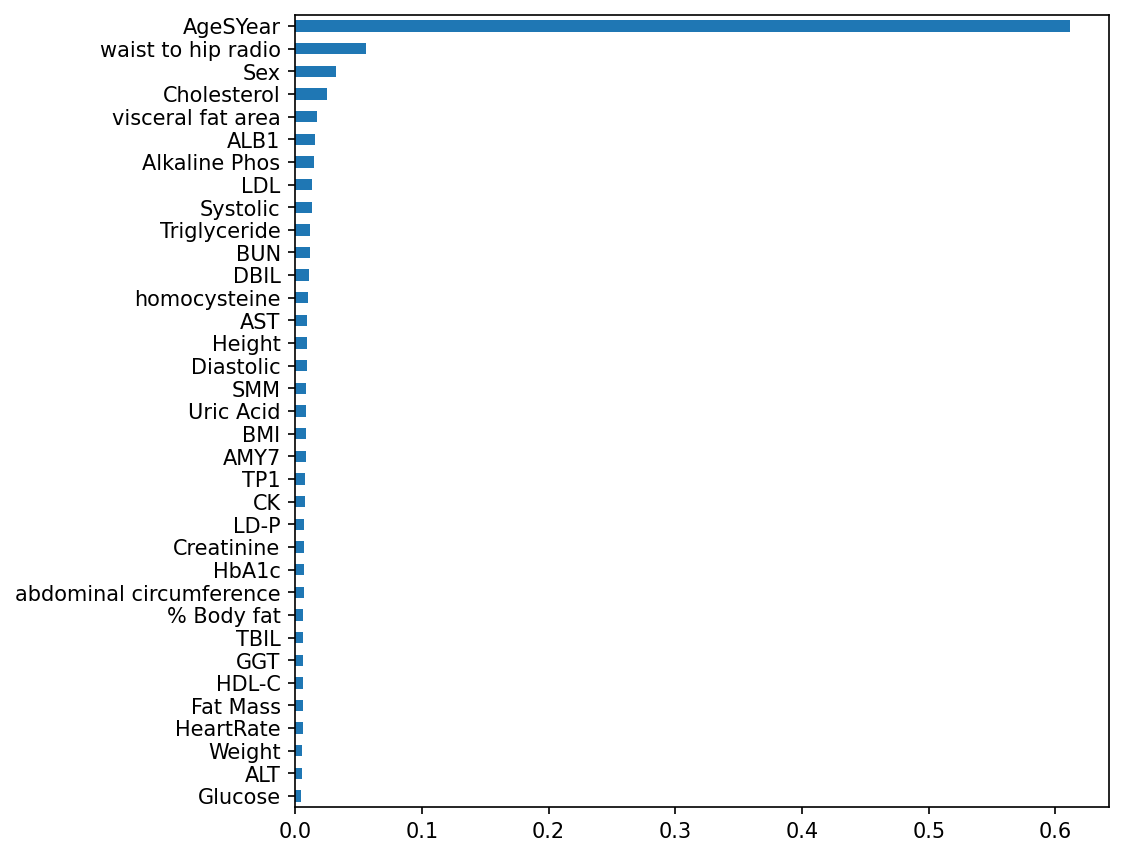

In [13]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A1

In [14]:
X=A1[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A1['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [15]:
Tree.feature_importances_

array([0.02071666, 0.62041984, 0.00922119, 0.01073276, 0.00661618,
       0.01150298, 0.00820233, 0.00764381, 0.00745185, 0.03749816,
       0.01842647, 0.007041  , 0.0060091 , 0.01315903, 0.02526209,
       0.01430017, 0.00689684, 0.01450243, 0.00907043, 0.00780584,
       0.01584467, 0.00896234, 0.01075668, 0.02189547, 0.00523819,
       0.00823734, 0.00450443, 0.00746466, 0.00674423, 0.00650547,
       0.01336146, 0.00644466, 0.00477864, 0.00969126, 0.00709133])

In [414]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Sex                        0.039540
AgeSYear                   0.606031
Weight                     0.005618
Height                     0.007989
BMI                        0.006793
SMM                        0.012883
Fat Mass                   0.006879
% Body fat                 0.008843
abdominal circumference    0.005995
waist to hip radio         0.048832
Systolic                   0.019008
Diastolic                  0.006456
HeartRate                  0.007259
visceral fat area          0.017736
Cholesterol                0.028189
Triglyceride               0.009794
HDL-C                      0.005863
LDL                        0.013985
homocysteine               0.012267
TP1                        0.005880
ALB1                       0.013632
TBIL                       0.005953
DBIL                       0.009203
Alkaline Phos              0.014953
ALT                        0.005872
AST                        0.006568
GGT                        0.005827
Glucose                    0

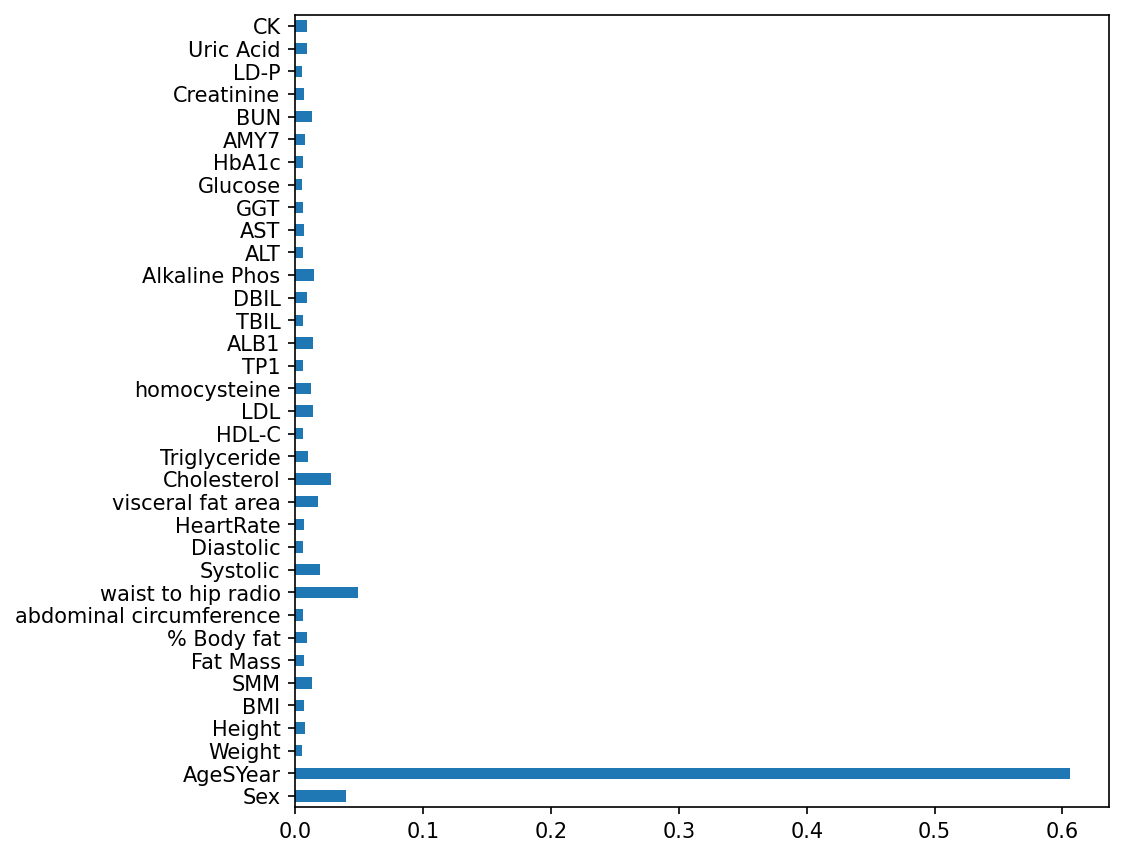

In [415]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A2

In [19]:
X=A2[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A2['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [20]:
Tree.feature_importances_

array([0.02132111, 0.62594724, 0.00799578, 0.00939854, 0.00619307,
       0.01159966, 0.00594835, 0.00584645, 0.0080234 , 0.02434359,
       0.01198289, 0.00676881, 0.00684215, 0.01142308, 0.04251062,
       0.01083844, 0.00526248, 0.01680944, 0.01092028, 0.00792077,
       0.0150416 , 0.00723251, 0.01106933, 0.02149429, 0.00610834,
       0.01328986, 0.00487947, 0.004306  , 0.008247  , 0.00945173,
       0.01074961, 0.00675321, 0.00659113, 0.00750617, 0.00938359])

In [21]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.004306
GGT                        0.004879
HDL-C                      0.005262
% Body fat                 0.005846
Fat Mass                   0.005948
ALT                        0.006108
BMI                        0.006193
LD-P                       0.006591
Creatinine                 0.006753
Diastolic                  0.006769
HeartRate                  0.006842
TBIL                       0.007233
Uric Acid                  0.007506
TP1                        0.007921
Weight                     0.007996
abdominal circumference    0.008023
HbA1c                      0.008247
CK                         0.009384
Height                     0.009399
AMY7                       0.009452
BUN                        0.010750
Triglyceride               0.010838
homocysteine               0.010920
DBIL                       0.011069
visceral fat area          0.011423
SMM                        0.011600
Systolic                   0.011983
AST                        0

In [22]:
Tree_im.sum()

1.0

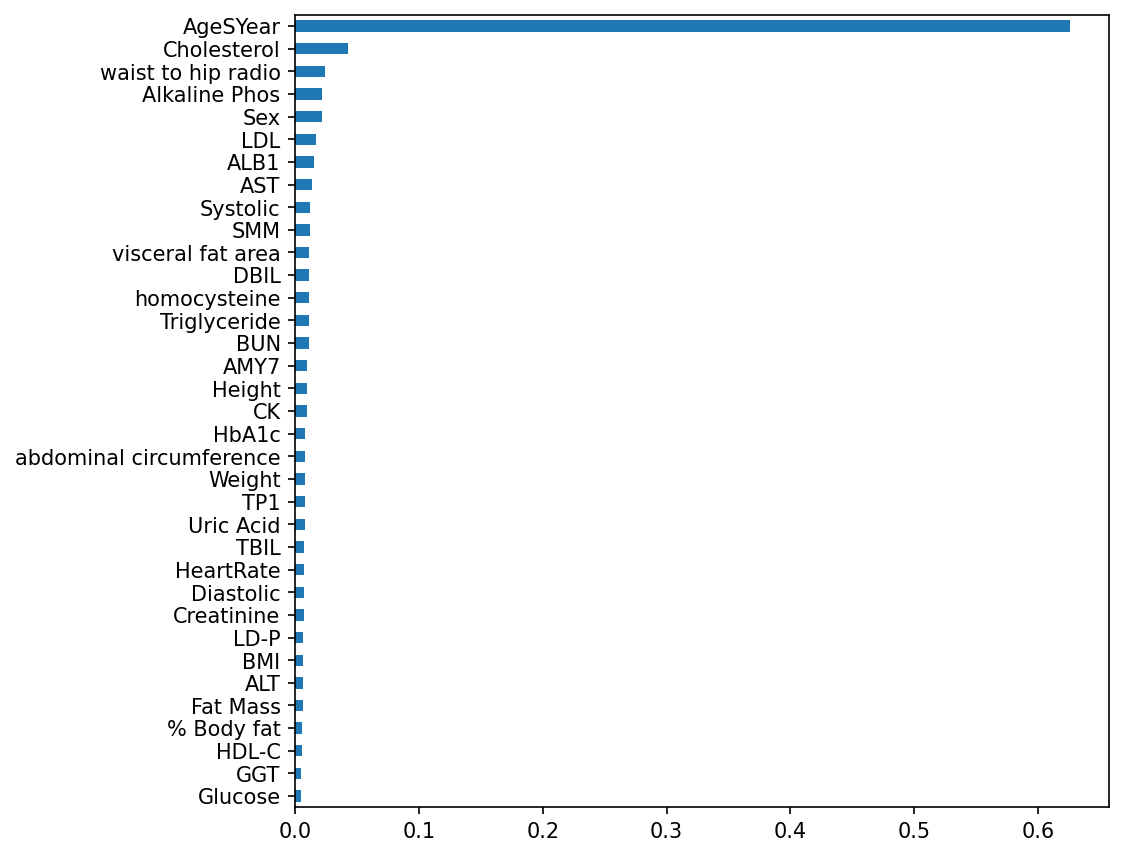

In [23]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A3

In [24]:
X=A3[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A3['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [25]:
Tree.feature_importances_

array([0.02808129, 0.61302239, 0.00856107, 0.01019764, 0.00660328,
       0.00962521, 0.00590781, 0.00847999, 0.01283075, 0.04376983,
       0.01677119, 0.00735939, 0.00826086, 0.02212254, 0.01508466,
       0.01124642, 0.00802533, 0.01305561, 0.01068898, 0.0083492 ,
       0.01801006, 0.00797409, 0.01212588, 0.0187115 , 0.00549373,
       0.00768322, 0.00441882, 0.00676306, 0.00520747, 0.00743556,
       0.00983407, 0.00501301, 0.00655854, 0.00887349, 0.00785405])

In [26]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

GGT                        0.004419
Creatinine                 0.005013
HbA1c                      0.005207
ALT                        0.005494
Fat Mass                   0.005908
LD-P                       0.006559
BMI                        0.006603
Glucose                    0.006763
Diastolic                  0.007359
AMY7                       0.007436
AST                        0.007683
CK                         0.007854
TBIL                       0.007974
HDL-C                      0.008025
HeartRate                  0.008261
TP1                        0.008349
% Body fat                 0.008480
Weight                     0.008561
Uric Acid                  0.008873
SMM                        0.009625
BUN                        0.009834
Height                     0.010198
homocysteine               0.010689
Triglyceride               0.011246
DBIL                       0.012126
abdominal circumference    0.012831
LDL                        0.013056
Cholesterol                0

In [27]:
Tree_im.sum()

1.0

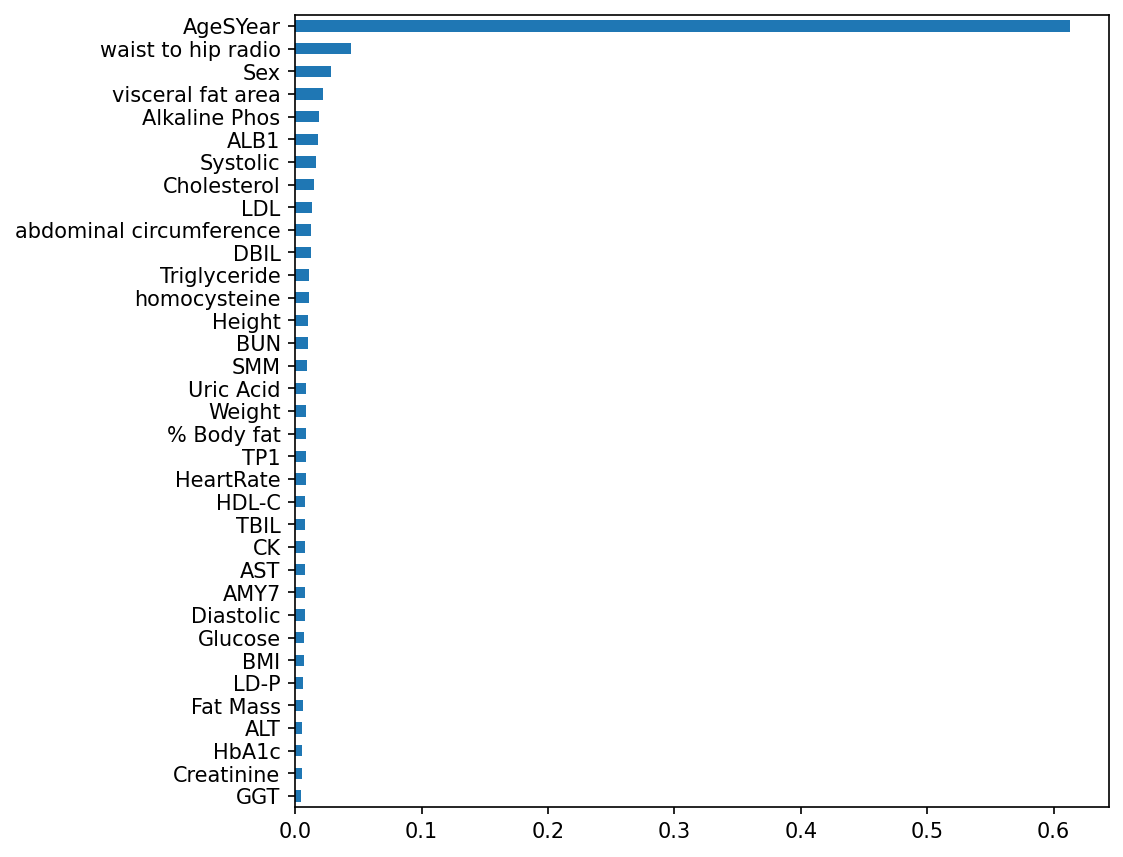

In [28]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A4

In [29]:
X=A4[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A4['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [30]:
Tree.feature_importances_

array([0.02419385, 0.64044396, 0.00519623, 0.01046536, 0.00650636,
       0.00900372, 0.00707129, 0.00649597, 0.00807595, 0.04216737,
       0.00986989, 0.00829709, 0.00518902, 0.01604082, 0.02090692,
       0.00900335, 0.00674075, 0.01342574, 0.0110925 , 0.00850745,
       0.01576178, 0.00551701, 0.01551435, 0.01488505, 0.00741752,
       0.00691491, 0.00426043, 0.00359781, 0.00777666, 0.0106426 ,
       0.00781165, 0.00552578, 0.00572577, 0.0099045 , 0.01005061])

In [31]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.003598
GGT                        0.004260
HeartRate                  0.005189
Weight                     0.005196
TBIL                       0.005517
Creatinine                 0.005526
LD-P                       0.005726
% Body fat                 0.006496
BMI                        0.006506
HDL-C                      0.006741
AST                        0.006915
Fat Mass                   0.007071
ALT                        0.007418
HbA1c                      0.007777
BUN                        0.007812
abdominal circumference    0.008076
Diastolic                  0.008297
TP1                        0.008507
Triglyceride               0.009003
SMM                        0.009004
Systolic                   0.009870
Uric Acid                  0.009905
CK                         0.010051
Height                     0.010465
AMY7                       0.010643
homocysteine               0.011092
LDL                        0.013426
Alkaline Phos              0

In [32]:
Tree_im.sum()

1.0000000000000002

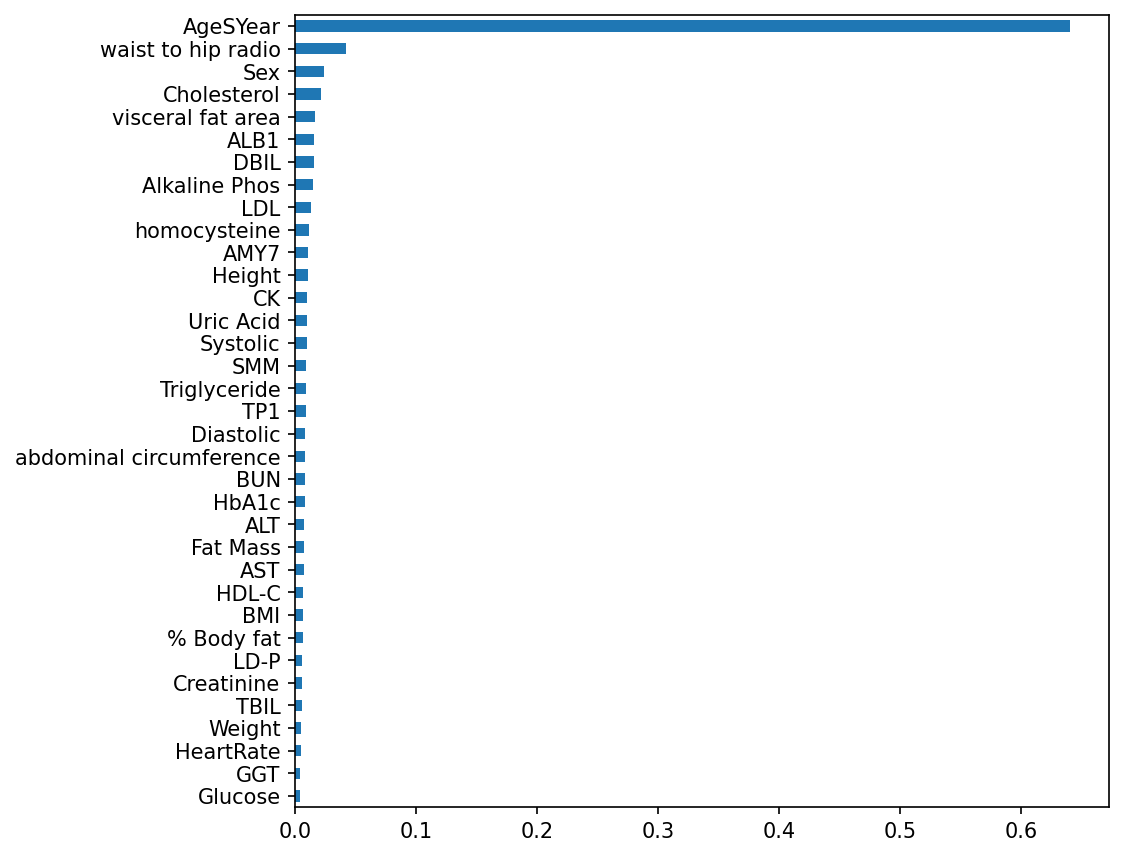

In [33]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A5

In [34]:
X=A5[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A5['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [35]:
Tree.feature_importances_

array([0.01597841, 0.62294235, 0.00664184, 0.00921101, 0.00528176,
       0.00894503, 0.00551487, 0.00381864, 0.01008642, 0.03792979,
       0.0116644 , 0.007881  , 0.00684668, 0.02187706, 0.02650654,
       0.01202427, 0.00668372, 0.01404422, 0.01234156, 0.0086009 ,
       0.01576187, 0.00771432, 0.01173558, 0.02038515, 0.00651154,
       0.0102885 , 0.00568292, 0.00555351, 0.00644829, 0.01355907,
       0.01060877, 0.00637467, 0.00636432, 0.01024151, 0.00794951])

In [36]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

% Body fat                 0.003819
BMI                        0.005282
Fat Mass                   0.005515
Glucose                    0.005554
GGT                        0.005683
LD-P                       0.006364
Creatinine                 0.006375
HbA1c                      0.006448
ALT                        0.006512
Weight                     0.006642
HDL-C                      0.006684
HeartRate                  0.006847
TBIL                       0.007714
Diastolic                  0.007881
CK                         0.007950
TP1                        0.008601
SMM                        0.008945
Height                     0.009211
abdominal circumference    0.010086
Uric Acid                  0.010242
AST                        0.010288
BUN                        0.010609
Systolic                   0.011664
DBIL                       0.011736
Triglyceride               0.012024
homocysteine               0.012342
AMY7                       0.013559
LDL                        0

In [37]:
Tree_im.sum()

1.0

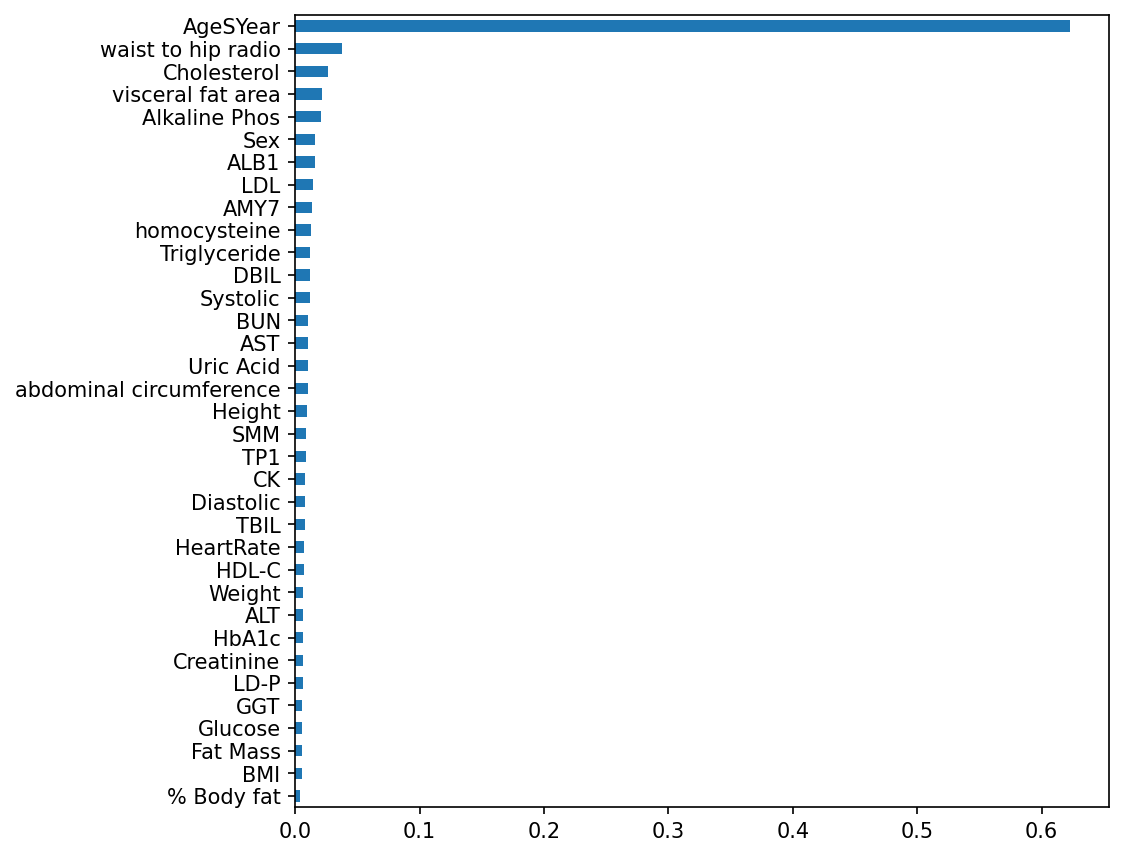

In [38]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A6

In [39]:
X=A6[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A6['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [40]:
Tree.feature_importances_

array([0.03990088, 0.62066277, 0.00997426, 0.00777535, 0.00502125,
       0.01091064, 0.00721931, 0.00740444, 0.00800067, 0.02783087,
       0.01952898, 0.009801  , 0.00608547, 0.01699785, 0.02439474,
       0.00939653, 0.00615342, 0.01841731, 0.01124044, 0.00867527,
       0.01604758, 0.0062268 , 0.01086174, 0.00978912, 0.00655118,
       0.00529281, 0.00753651, 0.0047763 , 0.00659119, 0.00805443,
       0.00996099, 0.00607544, 0.00707202, 0.00915784, 0.01061461])

In [41]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.004776
BMI                        0.005021
AST                        0.005293
Creatinine                 0.006075
HeartRate                  0.006085
HDL-C                      0.006153
TBIL                       0.006227
ALT                        0.006551
HbA1c                      0.006591
LD-P                       0.007072
Fat Mass                   0.007219
% Body fat                 0.007404
GGT                        0.007537
Height                     0.007775
abdominal circumference    0.008001
AMY7                       0.008054
TP1                        0.008675
Uric Acid                  0.009158
Triglyceride               0.009397
Alkaline Phos              0.009789
Diastolic                  0.009801
BUN                        0.009961
Weight                     0.009974
CK                         0.010615
DBIL                       0.010862
SMM                        0.010911
homocysteine               0.011240
ALB1                       0

In [42]:
Tree_im.sum()

1.0

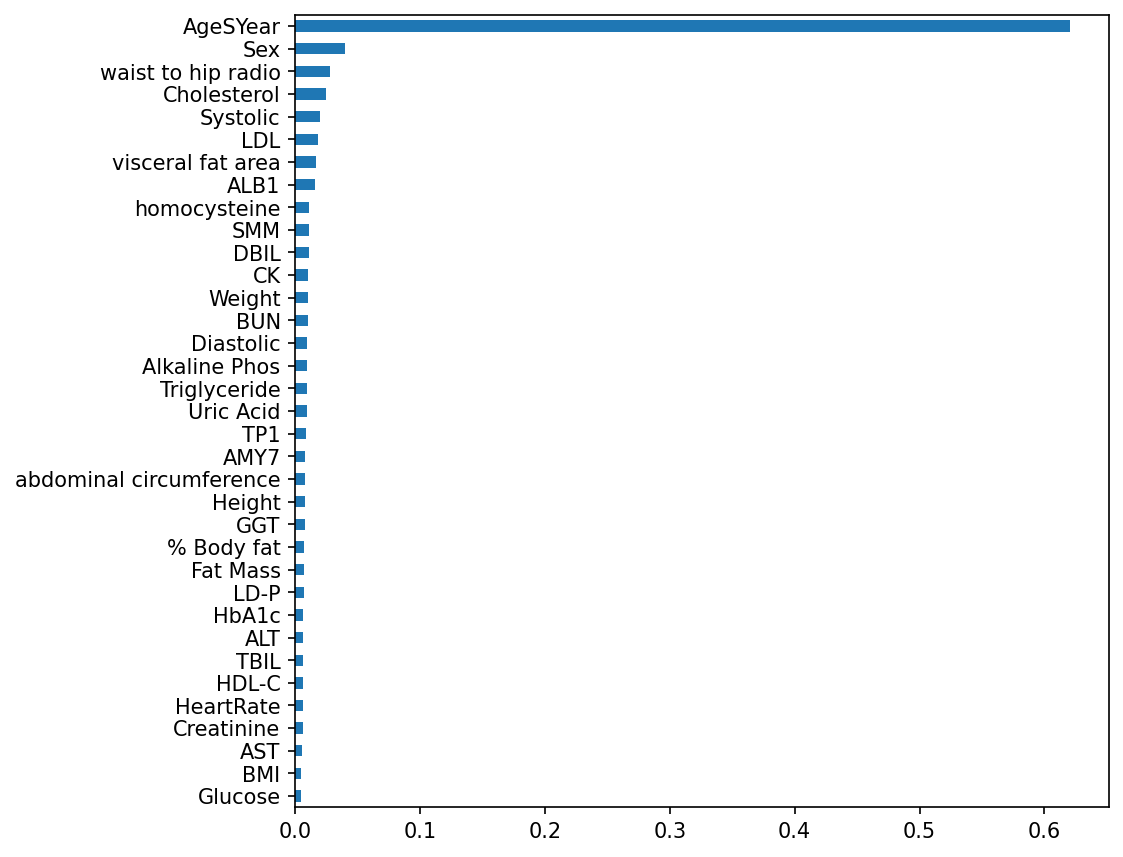

In [43]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A7

In [44]:
X=A7[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A7['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [45]:
Tree.feature_importances_

array([0.02018014, 0.58845095, 0.00465581, 0.00927678, 0.00716154,
       0.01189082, 0.00596238, 0.00638926, 0.01348306, 0.05803895,
       0.02001403, 0.008397  , 0.00883015, 0.0185694 , 0.0280836 ,
       0.01066506, 0.00580521, 0.01125384, 0.01173247, 0.00953604,
       0.01499858, 0.00898593, 0.0145166 , 0.01643811, 0.00770917,
       0.00897632, 0.00436867, 0.00434464, 0.00815345, 0.00931974,
       0.01176036, 0.00759753, 0.00546986, 0.00953529, 0.00944924])

In [46]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.004345
GGT                        0.004369
Weight                     0.004656
LD-P                       0.005470
HDL-C                      0.005805
Fat Mass                   0.005962
% Body fat                 0.006389
BMI                        0.007162
Creatinine                 0.007598
ALT                        0.007709
HbA1c                      0.008153
Diastolic                  0.008397
HeartRate                  0.008830
AST                        0.008976
TBIL                       0.008986
Height                     0.009277
AMY7                       0.009320
CK                         0.009449
Uric Acid                  0.009535
TP1                        0.009536
Triglyceride               0.010665
LDL                        0.011254
homocysteine               0.011732
BUN                        0.011760
SMM                        0.011891
abdominal circumference    0.013483
DBIL                       0.014517
ALB1                       0

In [47]:
Tree_im.sum()

1.0

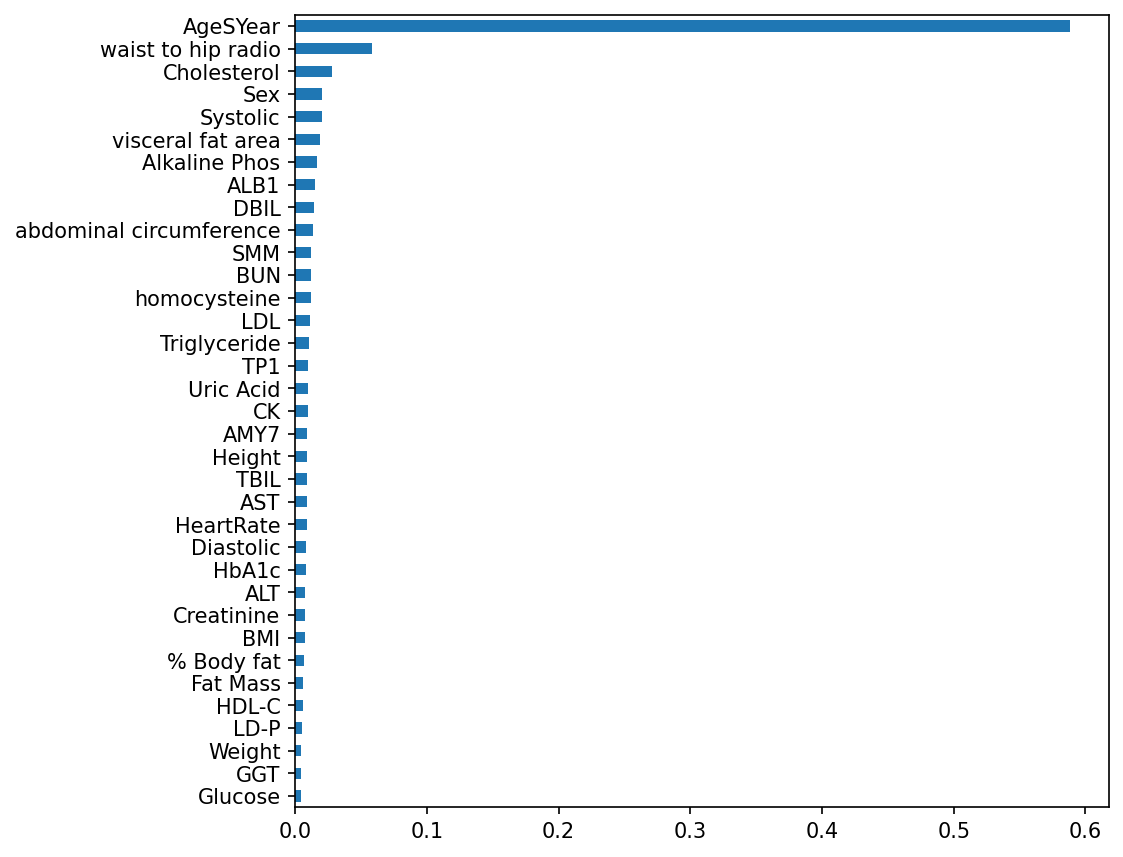

In [48]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A8

In [49]:
X=A8[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A7['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [50]:
Tree.feature_importances_

array([0.01233098, 0.37515778, 0.01195114, 0.01291639, 0.01399687,
       0.01334863, 0.01326608, 0.01710687, 0.01257519, 0.02250202,
       0.02283838, 0.0164962 , 0.01648456, 0.03866266, 0.02198004,
       0.022106  , 0.0255509 , 0.01403122, 0.02085693, 0.01627004,
       0.01849869, 0.01397344, 0.01778026, 0.0329012 , 0.01272231,
       0.02619381, 0.01115038, 0.03140172, 0.02077844, 0.03252467,
       0.01607448, 0.01105486, 0.00876089, 0.01618733, 0.00956862])

In [51]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

LD-P                       0.008761
CK                         0.009569
Creatinine                 0.011055
GGT                        0.011150
Weight                     0.011951
Sex                        0.012331
abdominal circumference    0.012575
ALT                        0.012722
Height                     0.012916
Fat Mass                   0.013266
SMM                        0.013349
TBIL                       0.013973
BMI                        0.013997
LDL                        0.014031
BUN                        0.016074
Uric Acid                  0.016187
TP1                        0.016270
HeartRate                  0.016485
Diastolic                  0.016496
% Body fat                 0.017107
DBIL                       0.017780
ALB1                       0.018499
HbA1c                      0.020778
homocysteine               0.020857
Cholesterol                0.021980
Triglyceride               0.022106
waist to hip radio         0.022502
Systolic                   0

In [52]:
Tree_im.sum()

1.0

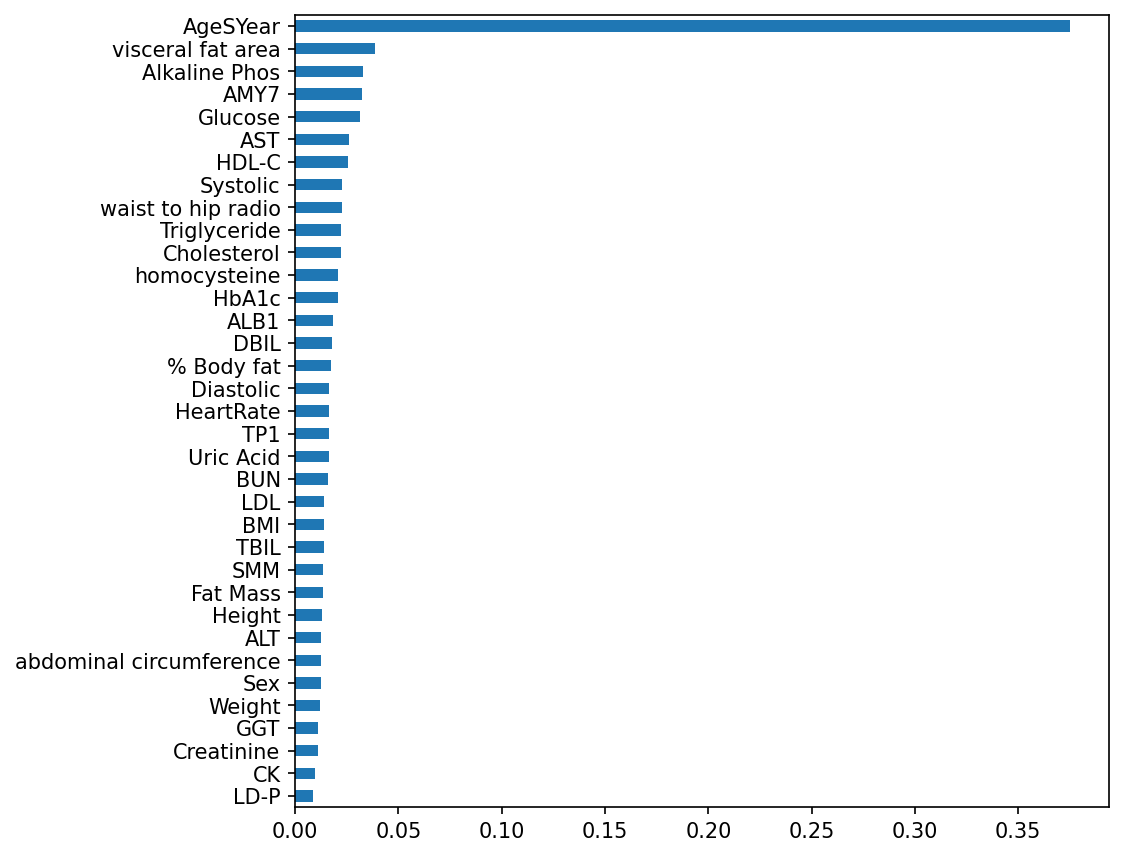

In [53]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A9

In [54]:
X=A9[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A9['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [55]:
Tree.feature_importances_

array([0.02902285, 0.59783246, 0.00872717, 0.01406133, 0.00861534,
       0.01227005, 0.00768569, 0.01159878, 0.00940031, 0.03828549,
       0.01977355, 0.00947563, 0.00585375, 0.016005  , 0.02453091,
       0.00921143, 0.00704673, 0.02099556, 0.00936626, 0.0085924 ,
       0.01502902, 0.00671242, 0.00959813, 0.01483346, 0.00620111,
       0.01015479, 0.00498143, 0.00561994, 0.00692324, 0.00783754,
       0.01084576, 0.00688514, 0.00735731, 0.00755153, 0.01111849])

In [56]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

GGT                        0.004981
Glucose                    0.005620
HeartRate                  0.005854
ALT                        0.006201
TBIL                       0.006712
Creatinine                 0.006885
HbA1c                      0.006923
HDL-C                      0.007047
LD-P                       0.007357
Uric Acid                  0.007552
Fat Mass                   0.007686
AMY7                       0.007838
TP1                        0.008592
BMI                        0.008615
Weight                     0.008727
Triglyceride               0.009211
homocysteine               0.009366
abdominal circumference    0.009400
Diastolic                  0.009476
DBIL                       0.009598
AST                        0.010155
BUN                        0.010846
CK                         0.011118
% Body fat                 0.011599
SMM                        0.012270
Height                     0.014061
Alkaline Phos              0.014833
ALB1                       0

In [57]:
Tree_im.sum()

1.0

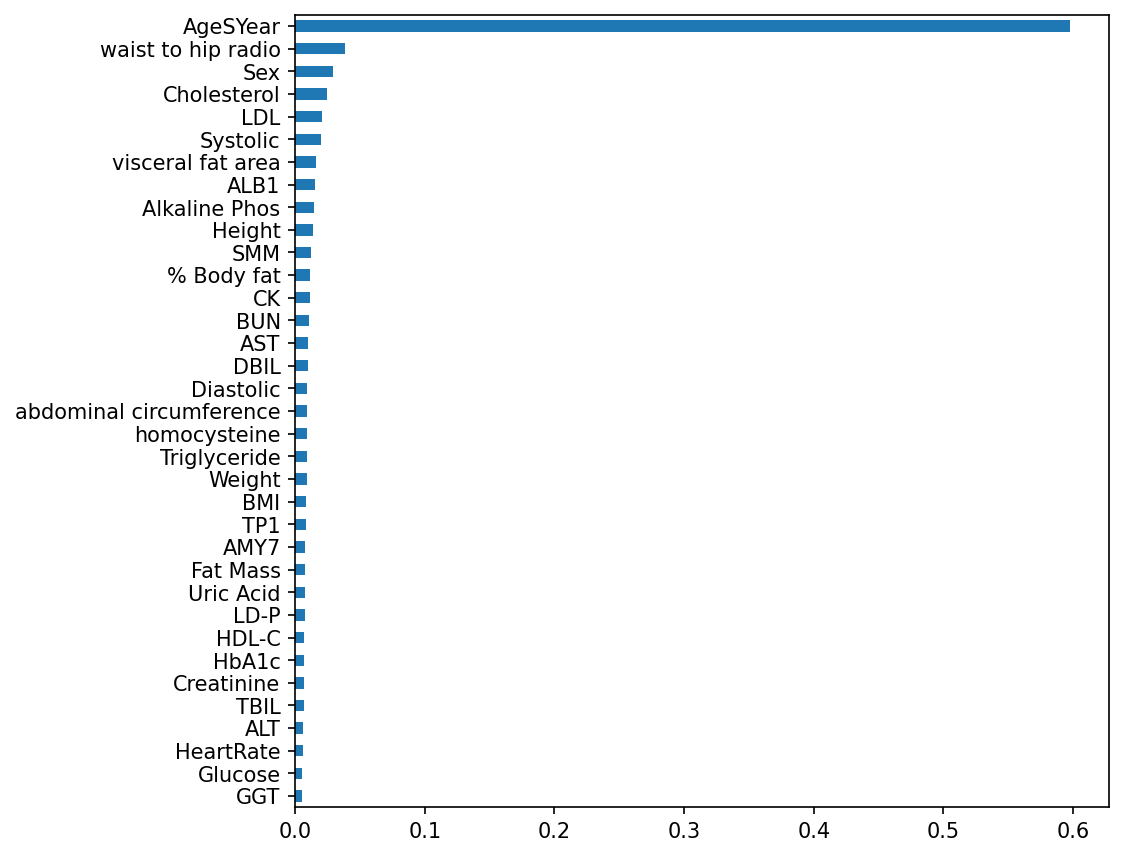

In [58]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A10

In [59]:
X=A10[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A10['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [60]:
Tree.feature_importances_

array([0.02218417, 0.62813818, 0.00552   , 0.00720896, 0.0077144 ,
       0.00873678, 0.00390326, 0.00582298, 0.00973984, 0.04258936,
       0.00852255, 0.00781905, 0.0054149 , 0.01683126, 0.0251712 ,
       0.01237479, 0.00556518, 0.01497521, 0.01230777, 0.01070924,
       0.01410564, 0.00660567, 0.01286097, 0.0190677 , 0.00653856,
       0.01030217, 0.00466167, 0.00479494, 0.00746786, 0.0067919 ,
       0.0126387 , 0.00652951, 0.00510658, 0.01216415, 0.00911493])

In [61]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Fat Mass                   0.003903
GGT                        0.004662
Glucose                    0.004795
LD-P                       0.005107
HeartRate                  0.005415
Weight                     0.005520
HDL-C                      0.005565
% Body fat                 0.005823
Creatinine                 0.006530
ALT                        0.006539
TBIL                       0.006606
AMY7                       0.006792
Height                     0.007209
HbA1c                      0.007468
BMI                        0.007714
Diastolic                  0.007819
Systolic                   0.008523
SMM                        0.008737
CK                         0.009115
abdominal circumference    0.009740
AST                        0.010302
TP1                        0.010709
Uric Acid                  0.012164
homocysteine               0.012308
Triglyceride               0.012375
BUN                        0.012639
DBIL                       0.012861
ALB1                       0

In [62]:
Tree_im.sum()

1.0

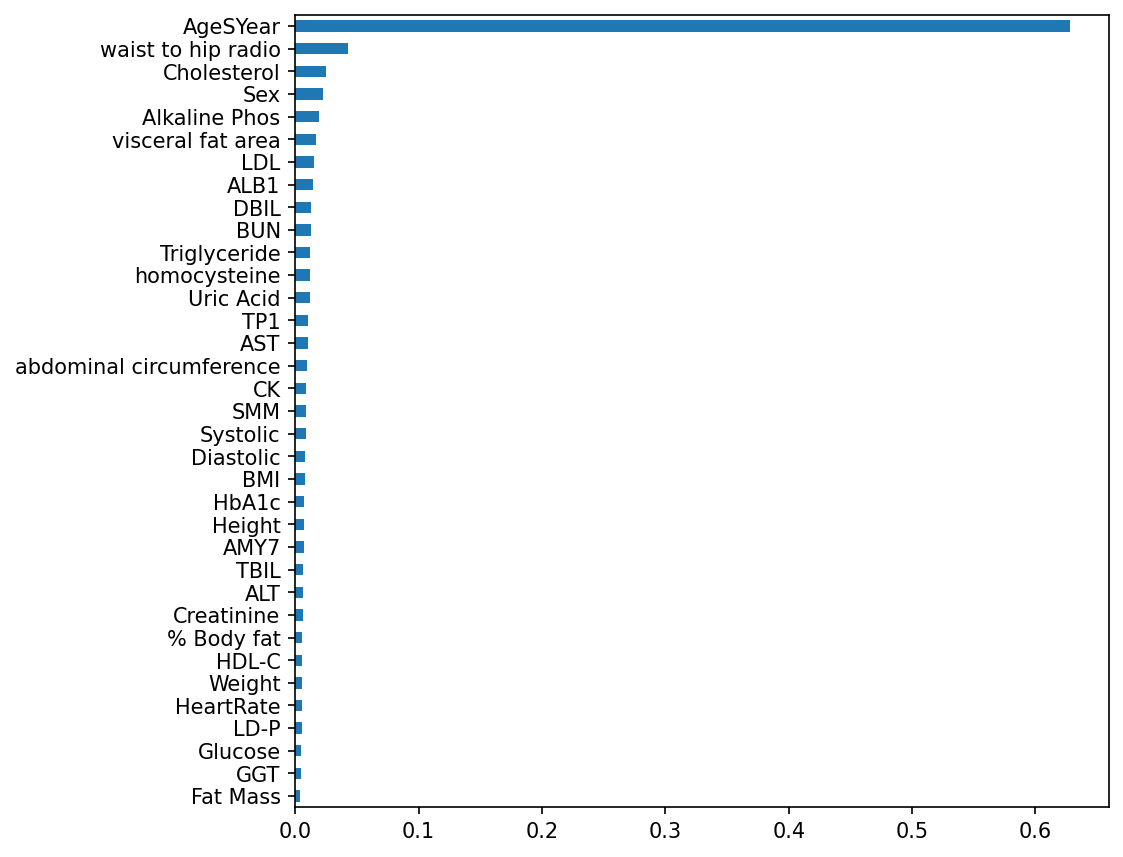

In [63]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A11

In [64]:
X=A11[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A11['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [65]:
Tree.feature_importances_

array([0.0288294 , 0.6470497 , 0.00790118, 0.00921924, 0.00675289,
       0.01195917, 0.00543293, 0.00641903, 0.00529437, 0.04264279,
       0.00839149, 0.00684642, 0.0084319 , 0.01300532, 0.01951854,
       0.00825771, 0.00661948, 0.00854839, 0.01380206, 0.00871767,
       0.01302237, 0.00793239, 0.00996743, 0.01468281, 0.00731824,
       0.00650574, 0.00542472, 0.00432157, 0.00580132, 0.00602346,
       0.01232909, 0.00584506, 0.0071031 , 0.00907842, 0.01100464])

In [66]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.004322
abdominal circumference    0.005294
GGT                        0.005425
Fat Mass                   0.005433
HbA1c                      0.005801
Creatinine                 0.005845
AMY7                       0.006023
% Body fat                 0.006419
AST                        0.006506
HDL-C                      0.006619
BMI                        0.006753
Diastolic                  0.006846
LD-P                       0.007103
ALT                        0.007318
Weight                     0.007901
TBIL                       0.007932
Triglyceride               0.008258
Systolic                   0.008391
HeartRate                  0.008432
LDL                        0.008548
TP1                        0.008718
Uric Acid                  0.009078
Height                     0.009219
DBIL                       0.009967
CK                         0.011005
SMM                        0.011959
BUN                        0.012329
visceral fat area          0

In [67]:
Tree_im.sum()

1.0

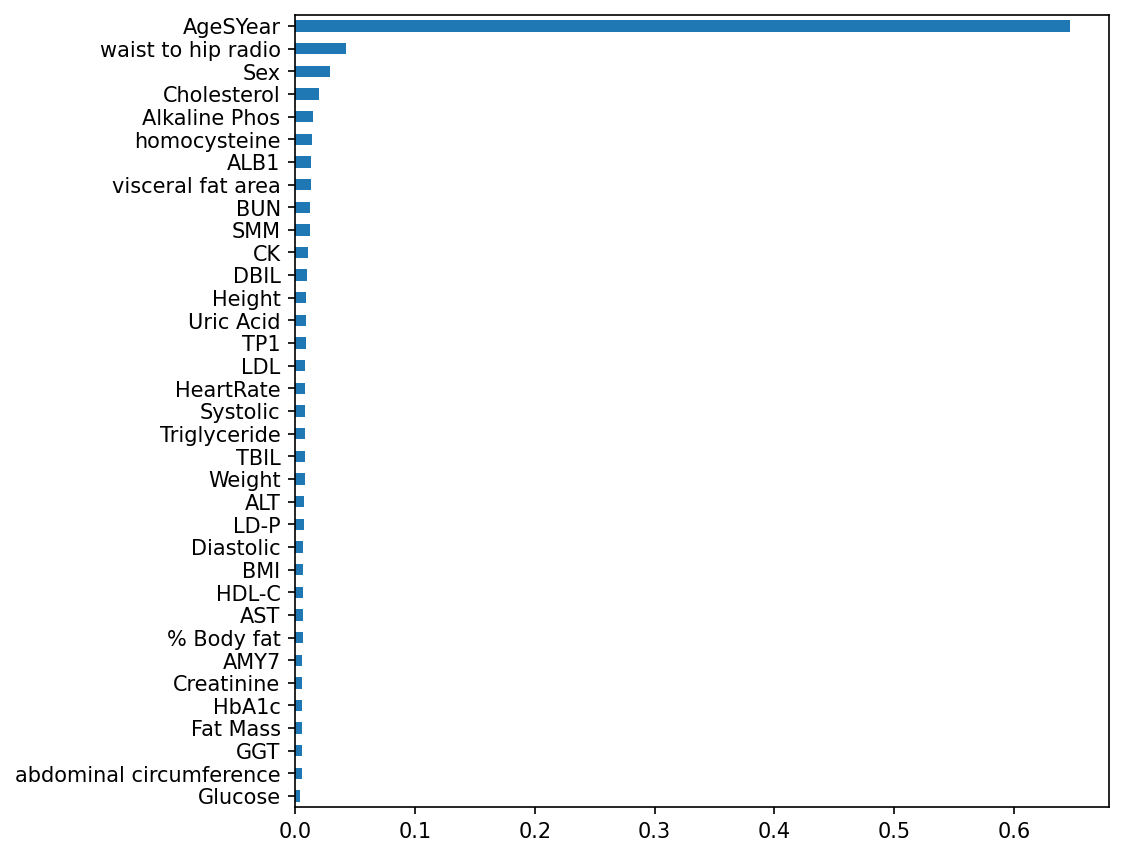

In [68]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A12

In [69]:
X=A12[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A12['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [70]:
Tree.feature_importances_

array([0.02526776, 0.62657113, 0.00647495, 0.00747208, 0.00559456,
       0.00806228, 0.00561376, 0.0073643 , 0.00746968, 0.04215533,
       0.0082683 , 0.00670552, 0.00556442, 0.02105695, 0.02981528,
       0.01130654, 0.00872739, 0.01257892, 0.01323563, 0.00808365,
       0.01405613, 0.00701956, 0.01063685, 0.01854916, 0.00916152,
       0.00799203, 0.00514984, 0.00602922, 0.00691395, 0.00740103,
       0.00966952, 0.00624915, 0.00700815, 0.00729186, 0.00948361])

In [71]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

GGT                        0.005150
HeartRate                  0.005564
BMI                        0.005595
Fat Mass                   0.005614
Glucose                    0.006029
Creatinine                 0.006249
Weight                     0.006475
Diastolic                  0.006706
HbA1c                      0.006914
LD-P                       0.007008
TBIL                       0.007020
Uric Acid                  0.007292
% Body fat                 0.007364
AMY7                       0.007401
abdominal circumference    0.007470
Height                     0.007472
AST                        0.007992
SMM                        0.008062
TP1                        0.008084
Systolic                   0.008268
HDL-C                      0.008727
ALT                        0.009162
CK                         0.009484
BUN                        0.009670
DBIL                       0.010637
Triglyceride               0.011307
LDL                        0.012579
homocysteine               0

In [72]:
Tree_im.sum()

1.0

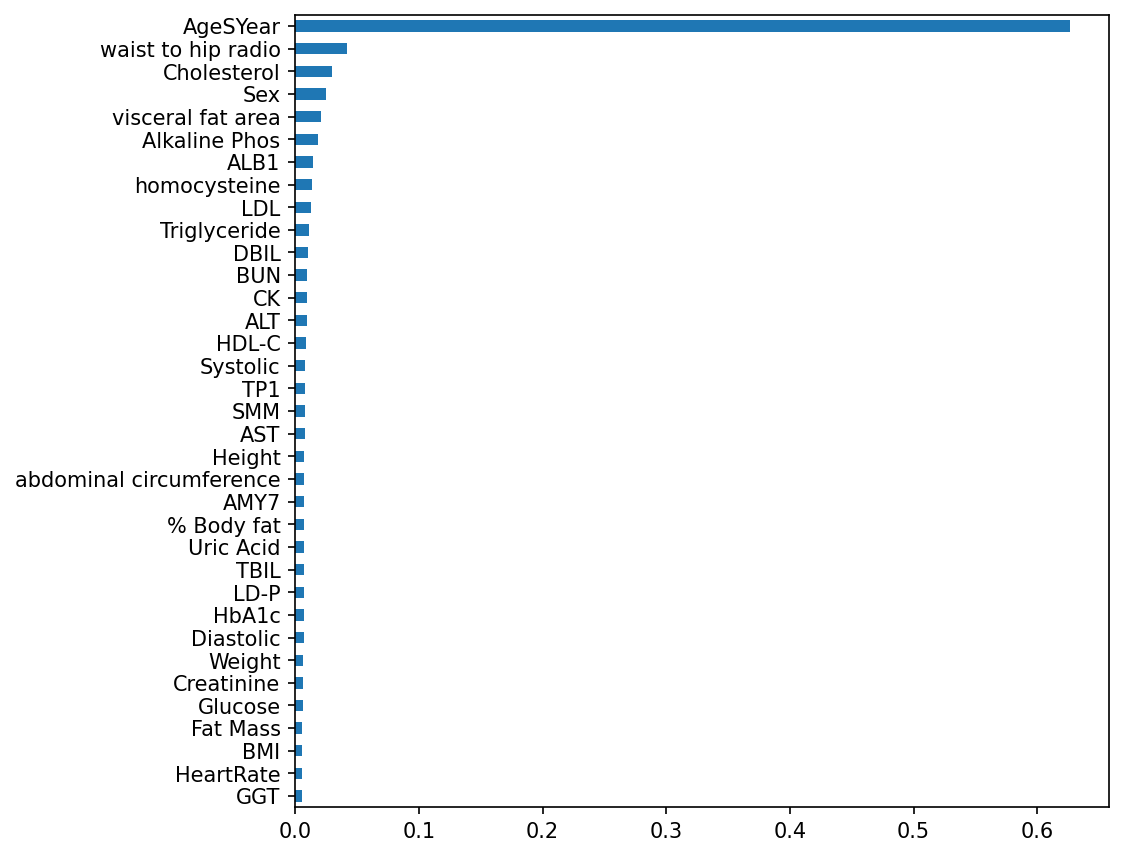

In [73]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A13

In [74]:
X=A13[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A13['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [75]:
Tree.feature_importances_

array([0.02153213, 0.60895073, 0.00707962, 0.01032415, 0.00768654,
       0.01032625, 0.00511035, 0.00618274, 0.00709676, 0.04418127,
       0.0099656 , 0.00875846, 0.01203847, 0.02217491, 0.03151238,
       0.00926185, 0.00750372, 0.0128549 , 0.01383849, 0.00749964,
       0.01435169, 0.00738293, 0.01123554, 0.01559145, 0.00722235,
       0.00881797, 0.00706272, 0.0050536 , 0.00612866, 0.01007994,
       0.00955643, 0.00868623, 0.00784801, 0.01072527, 0.00637824])

In [76]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.005054
Fat Mass                   0.005110
HbA1c                      0.006129
% Body fat                 0.006183
CK                         0.006378
GGT                        0.007063
Weight                     0.007080
abdominal circumference    0.007097
ALT                        0.007222
TBIL                       0.007383
TP1                        0.007500
HDL-C                      0.007504
BMI                        0.007687
LD-P                       0.007848
Creatinine                 0.008686
Diastolic                  0.008758
AST                        0.008818
Triglyceride               0.009262
BUN                        0.009556
Systolic                   0.009966
AMY7                       0.010080
Height                     0.010324
SMM                        0.010326
Uric Acid                  0.010725
DBIL                       0.011236
HeartRate                  0.012038
LDL                        0.012855
homocysteine               0

In [77]:
Tree_im.sum()

1.0

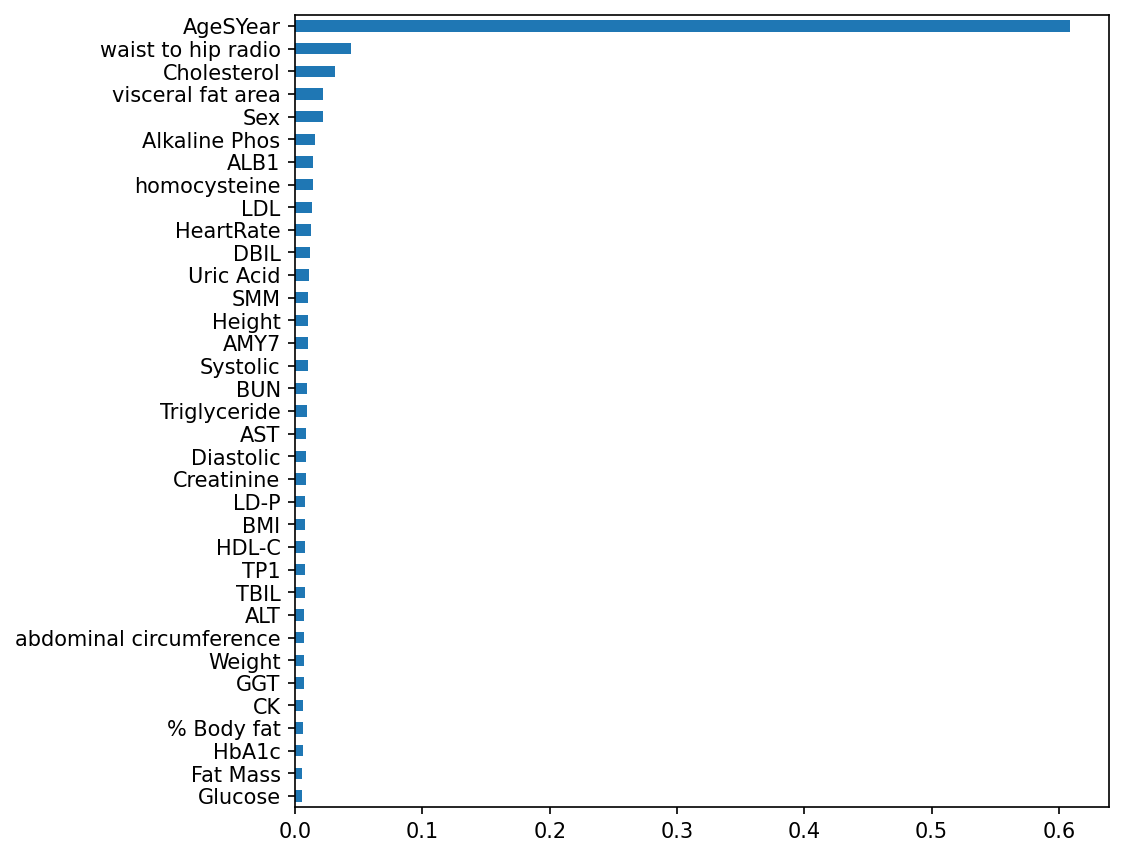

In [78]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A14

In [79]:
X=A14[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A14['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [80]:
Tree.feature_importances_

array([0.03160437, 0.63474523, 0.00734205, 0.00973471, 0.00565401,
       0.01021598, 0.006226  , 0.00834627, 0.0073944 , 0.0313448 ,
       0.02265831, 0.00696137, 0.00716017, 0.01101813, 0.01870524,
       0.00968266, 0.00688088, 0.01157616, 0.01687481, 0.00729606,
       0.01207216, 0.00674719, 0.00892623, 0.01488444, 0.00559575,
       0.00859097, 0.00627611, 0.00636838, 0.00784512, 0.00817206,
       0.01224365, 0.00470943, 0.00604339, 0.01060184, 0.00950168])

In [81]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Creatinine                 0.004709
ALT                        0.005596
BMI                        0.005654
LD-P                       0.006043
Fat Mass                   0.006226
GGT                        0.006276
Glucose                    0.006368
TBIL                       0.006747
HDL-C                      0.006881
Diastolic                  0.006961
HeartRate                  0.007160
TP1                        0.007296
Weight                     0.007342
abdominal circumference    0.007394
HbA1c                      0.007845
AMY7                       0.008172
% Body fat                 0.008346
AST                        0.008591
DBIL                       0.008926
CK                         0.009502
Triglyceride               0.009683
Height                     0.009735
SMM                        0.010216
Uric Acid                  0.010602
visceral fat area          0.011018
LDL                        0.011576
ALB1                       0.012072
BUN                        0

In [82]:
Tree_im.sum()

1.0

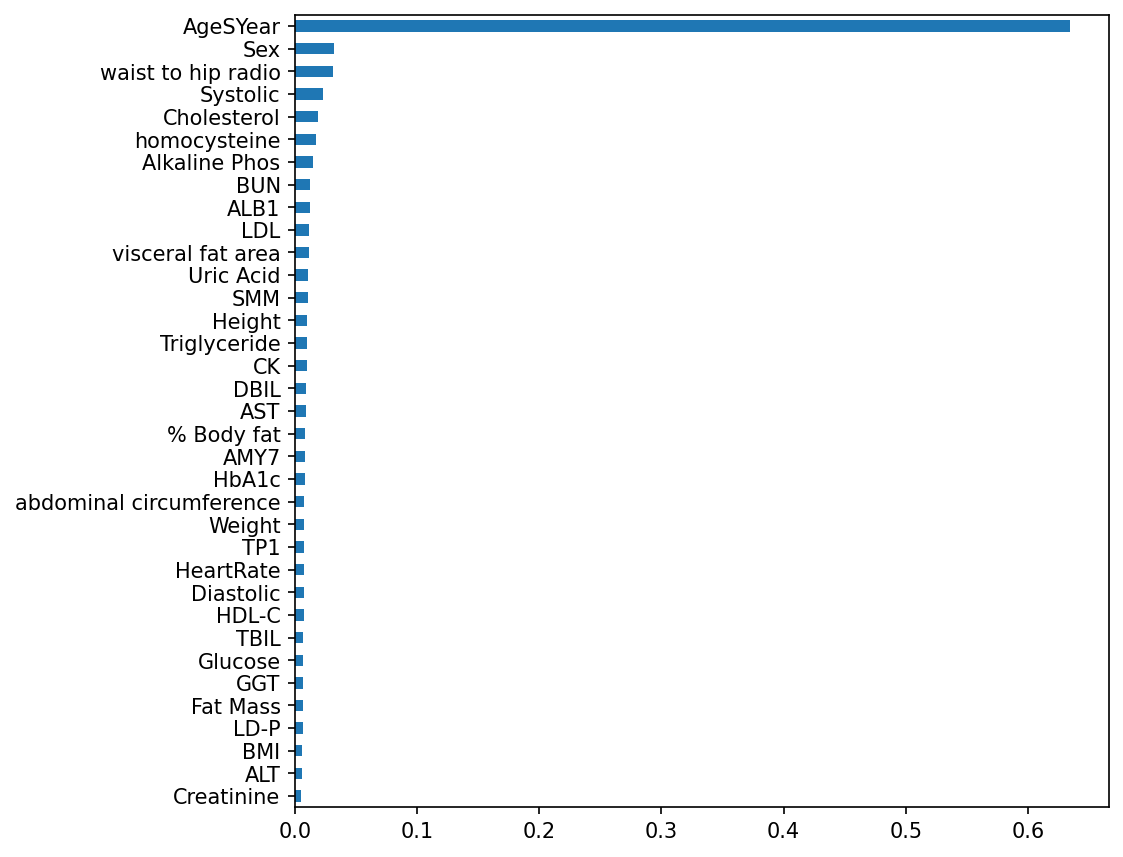

In [83]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A15

In [84]:
X=A15[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A15['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [85]:
Tree.feature_importances_

array([0.03822584, 0.59042745, 0.00738017, 0.00959285, 0.00777404,
       0.01449143, 0.00650972, 0.00657706, 0.00669874, 0.04758439,
       0.017874  , 0.01075088, 0.00621703, 0.00986788, 0.02617489,
       0.0106203 , 0.00626424, 0.01456705, 0.01405987, 0.00932671,
       0.01545055, 0.00544118, 0.01061227, 0.01628439, 0.00947016,
       0.0084356 , 0.0051763 , 0.00599927, 0.0077613 , 0.00958711,
       0.01016587, 0.00696676, 0.0079296 , 0.00833386, 0.01140123])

In [86]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

GGT                        0.005176
TBIL                       0.005441
Glucose                    0.005999
HeartRate                  0.006217
HDL-C                      0.006264
Fat Mass                   0.006510
% Body fat                 0.006577
abdominal circumference    0.006699
Creatinine                 0.006967
Weight                     0.007380
HbA1c                      0.007761
BMI                        0.007774
LD-P                       0.007930
Uric Acid                  0.008334
AST                        0.008436
TP1                        0.009327
ALT                        0.009470
AMY7                       0.009587
Height                     0.009593
visceral fat area          0.009868
BUN                        0.010166
DBIL                       0.010612
Triglyceride               0.010620
Diastolic                  0.010751
CK                         0.011401
homocysteine               0.014060
SMM                        0.014491
LDL                        0

In [87]:
Tree_im.sum()

1.0

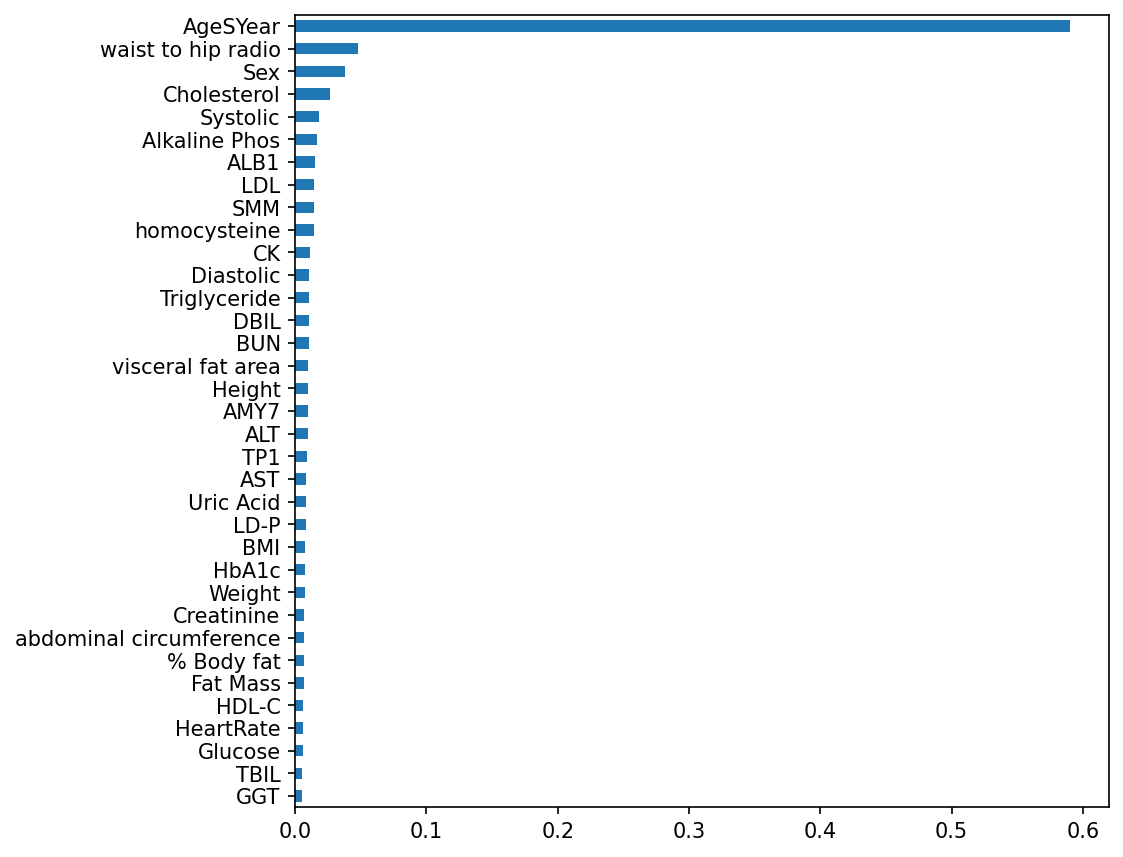

In [88]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A16

In [89]:
X=A16[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A16['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [90]:
Tree.feature_importances_

array([0.02892733, 0.63665557, 0.00468713, 0.00888581, 0.00651786,
       0.01173723, 0.00608441, 0.00619658, 0.00818569, 0.0547461 ,
       0.01389516, 0.00695609, 0.00630763, 0.02050322, 0.02144852,
       0.00728225, 0.00577987, 0.01101172, 0.00834137, 0.00658695,
       0.01273479, 0.00476121, 0.01058248, 0.01339383, 0.00739441,
       0.00940817, 0.0035391 , 0.00439695, 0.00605129, 0.01324354,
       0.00800223, 0.00545064, 0.00547467, 0.00869262, 0.00613757])

In [91]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

GGT                        0.003539
Glucose                    0.004397
Weight                     0.004687
TBIL                       0.004761
Creatinine                 0.005451
LD-P                       0.005475
HDL-C                      0.005780
HbA1c                      0.006051
Fat Mass                   0.006084
CK                         0.006138
% Body fat                 0.006197
HeartRate                  0.006308
BMI                        0.006518
TP1                        0.006587
Diastolic                  0.006956
Triglyceride               0.007282
ALT                        0.007394
BUN                        0.008002
abdominal circumference    0.008186
homocysteine               0.008341
Uric Acid                  0.008693
Height                     0.008886
AST                        0.009408
DBIL                       0.010582
LDL                        0.011012
SMM                        0.011737
ALB1                       0.012735
AMY7                       0

In [92]:
Tree_im.sum()

1.0000000000000002

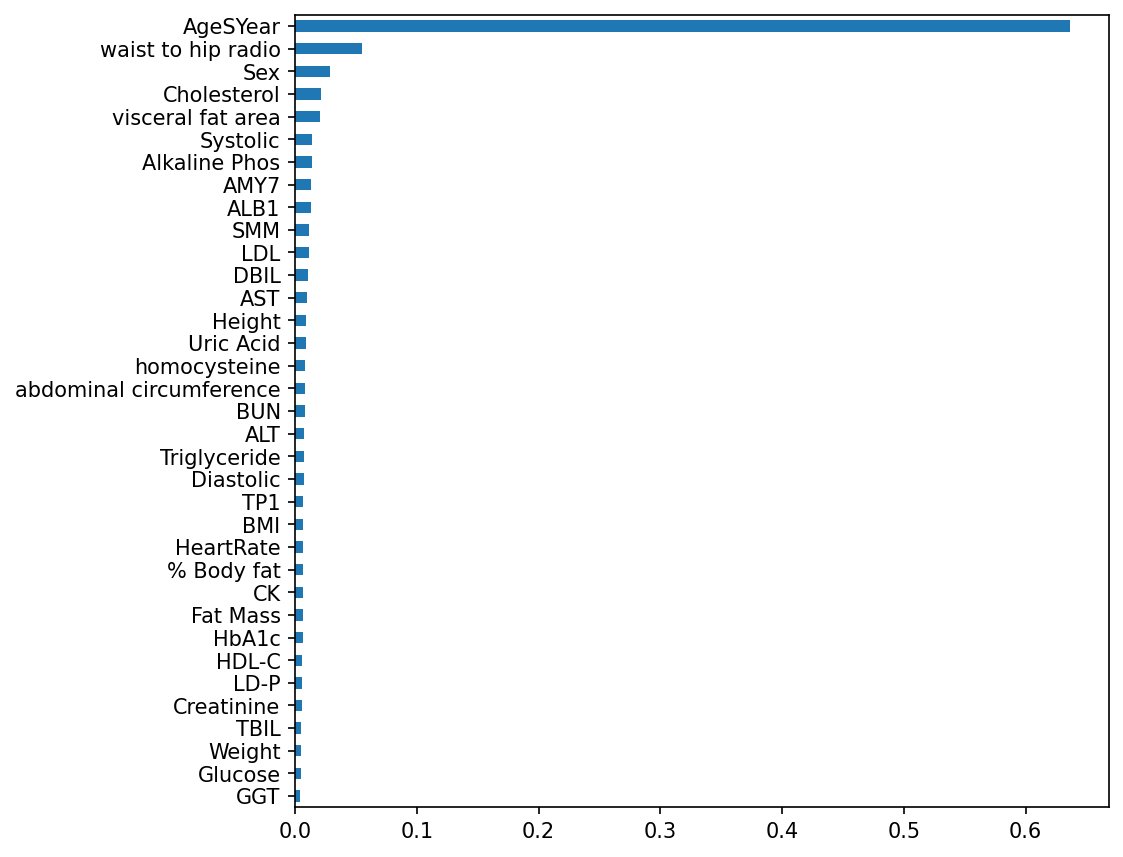

In [93]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A17

In [94]:
X=A17[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A17['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [95]:
Tree.feature_importances_

array([0.02795103, 0.58976367, 0.00519943, 0.00979739, 0.00699375,
       0.00766982, 0.00421476, 0.00560694, 0.01050172, 0.04357972,
       0.01771722, 0.00999408, 0.0067818 , 0.02868617, 0.01922654,
       0.01446935, 0.00757068, 0.01271761, 0.01420104, 0.00780267,
       0.01769471, 0.00753786, 0.01246803, 0.01466246, 0.00760099,
       0.00888048, 0.00726402, 0.00679454, 0.00684966, 0.0093721 ,
       0.0117316 , 0.00948549, 0.00644968, 0.01155733, 0.01120565])

In [96]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Fat Mass                   0.004215
Weight                     0.005199
% Body fat                 0.005607
LD-P                       0.006450
HeartRate                  0.006782
Glucose                    0.006795
HbA1c                      0.006850
BMI                        0.006994
GGT                        0.007264
TBIL                       0.007538
HDL-C                      0.007571
ALT                        0.007601
SMM                        0.007670
TP1                        0.007803
AST                        0.008880
AMY7                       0.009372
Creatinine                 0.009485
Height                     0.009797
Diastolic                  0.009994
abdominal circumference    0.010502
CK                         0.011206
Uric Acid                  0.011557
BUN                        0.011732
DBIL                       0.012468
LDL                        0.012718
homocysteine               0.014201
Triglyceride               0.014469
Alkaline Phos              0

In [97]:
Tree_im.sum()

0.9999999999999999

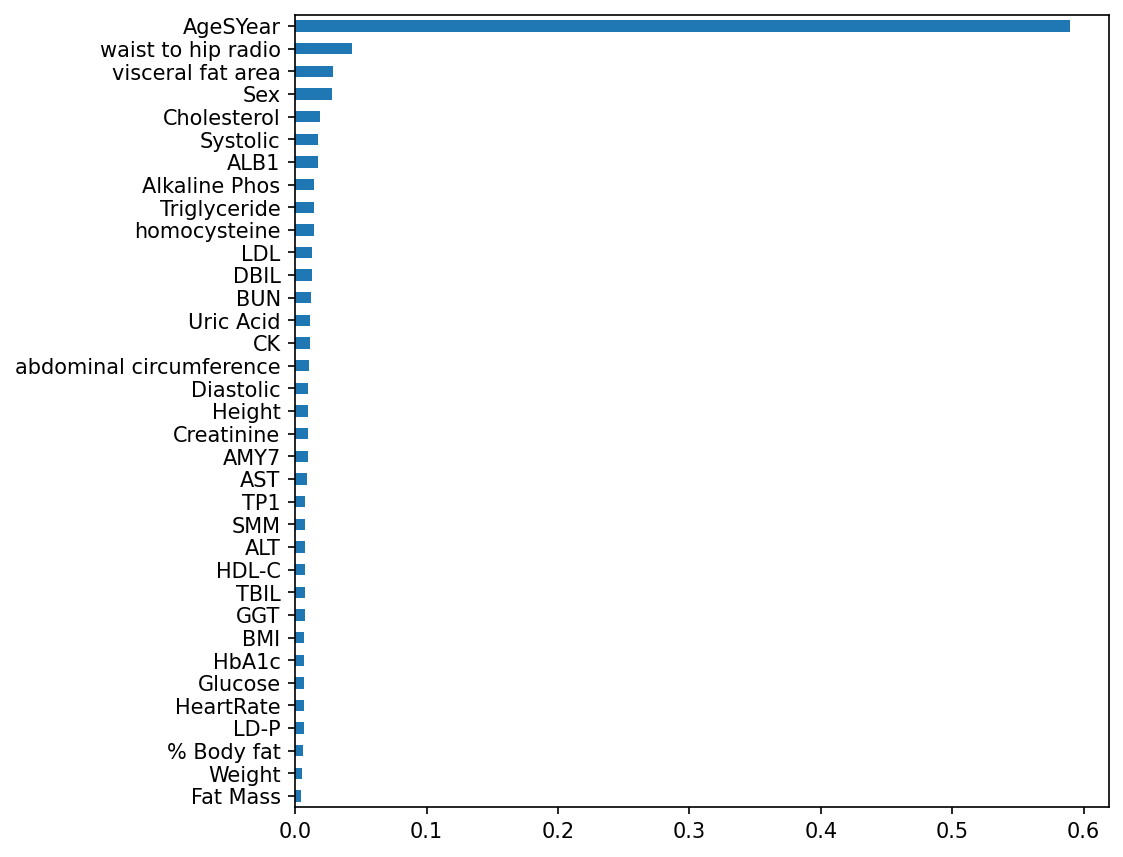

In [98]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A18

In [99]:
X=A18[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A18['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [100]:
Tree.feature_importances_

array([0.03063601, 0.61156077, 0.00598856, 0.00944532, 0.00847114,
       0.01472742, 0.00595414, 0.00600823, 0.00705149, 0.03460513,
       0.01106837, 0.00771256, 0.00745612, 0.02653612, 0.01512928,
       0.01112202, 0.00905482, 0.01323721, 0.0109736 , 0.00919079,
       0.01570725, 0.00795465, 0.00899266, 0.01417308, 0.00683144,
       0.00975367, 0.00486056, 0.00395352, 0.01157605, 0.01221191,
       0.01038687, 0.00725566, 0.00728397, 0.01326258, 0.00986703])

In [101]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.003954
GGT                        0.004861
Fat Mass                   0.005954
Weight                     0.005989
% Body fat                 0.006008
ALT                        0.006831
abdominal circumference    0.007051
Creatinine                 0.007256
LD-P                       0.007284
HeartRate                  0.007456
Diastolic                  0.007713
TBIL                       0.007955
BMI                        0.008471
DBIL                       0.008993
HDL-C                      0.009055
TP1                        0.009191
Height                     0.009445
AST                        0.009754
CK                         0.009867
BUN                        0.010387
homocysteine               0.010974
Systolic                   0.011068
Triglyceride               0.011122
HbA1c                      0.011576
AMY7                       0.012212
LDL                        0.013237
Uric Acid                  0.013263
Alkaline Phos              0

In [102]:
Tree_im.sum()

1.0

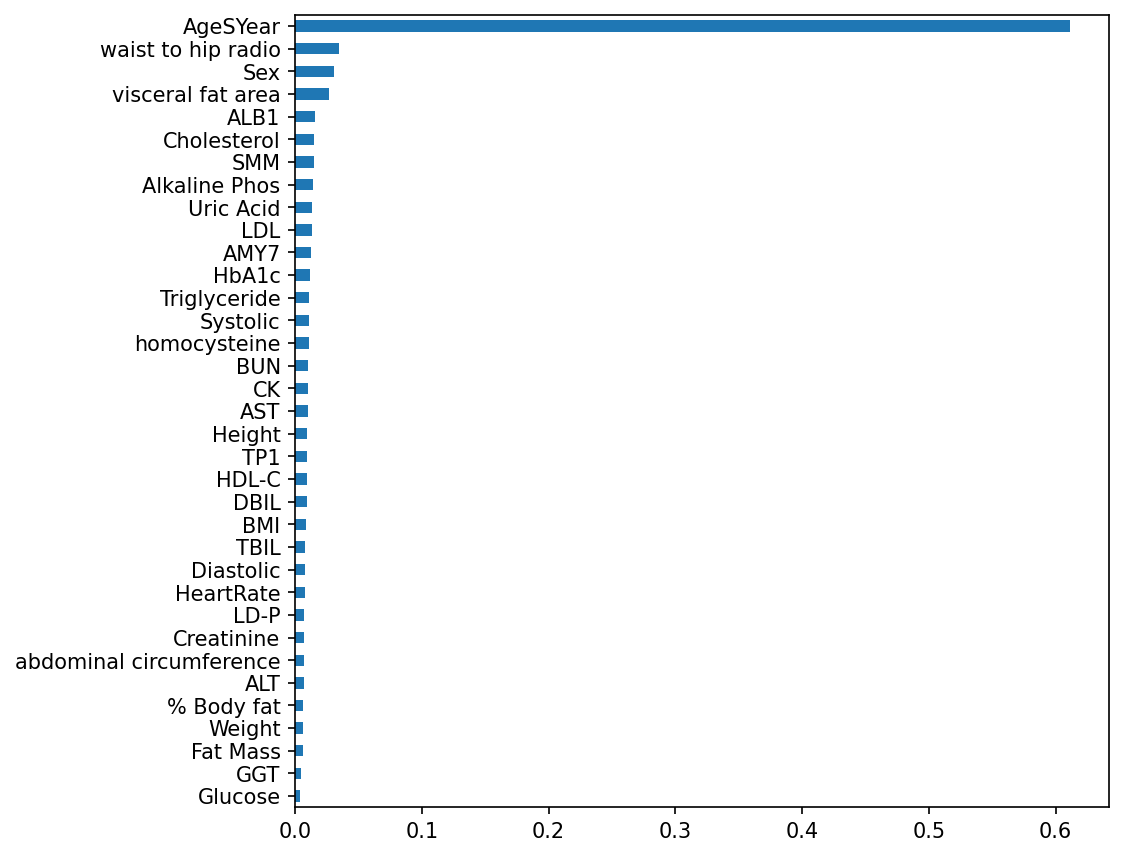

In [103]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A19

In [104]:
X=A19[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A19['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [105]:
Tree.feature_importances_

array([0.02981964, 0.62636152, 0.00789456, 0.00898698, 0.00655083,
       0.01274273, 0.00447519, 0.00471814, 0.00927931, 0.03069537,
       0.01800133, 0.00995325, 0.00802307, 0.02022703, 0.01876197,
       0.01210993, 0.0069741 , 0.01295916, 0.01339362, 0.00667105,
       0.01420897, 0.00671422, 0.01312752, 0.0185627 , 0.00490505,
       0.00728872, 0.00538793, 0.00542029, 0.00604127, 0.00904454,
       0.01087002, 0.00513179, 0.00762053, 0.00918699, 0.00789068])

In [106]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Fat Mass                   0.004475
% Body fat                 0.004718
ALT                        0.004905
Creatinine                 0.005132
GGT                        0.005388
Glucose                    0.005420
HbA1c                      0.006041
BMI                        0.006551
TP1                        0.006671
TBIL                       0.006714
HDL-C                      0.006974
AST                        0.007289
LD-P                       0.007621
CK                         0.007891
Weight                     0.007895
HeartRate                  0.008023
Height                     0.008987
AMY7                       0.009045
Uric Acid                  0.009187
abdominal circumference    0.009279
Diastolic                  0.009953
BUN                        0.010870
Triglyceride               0.012110
SMM                        0.012743
LDL                        0.012959
DBIL                       0.013128
homocysteine               0.013394
ALB1                       0

In [107]:
Tree_im.sum()

0.9999999999999999

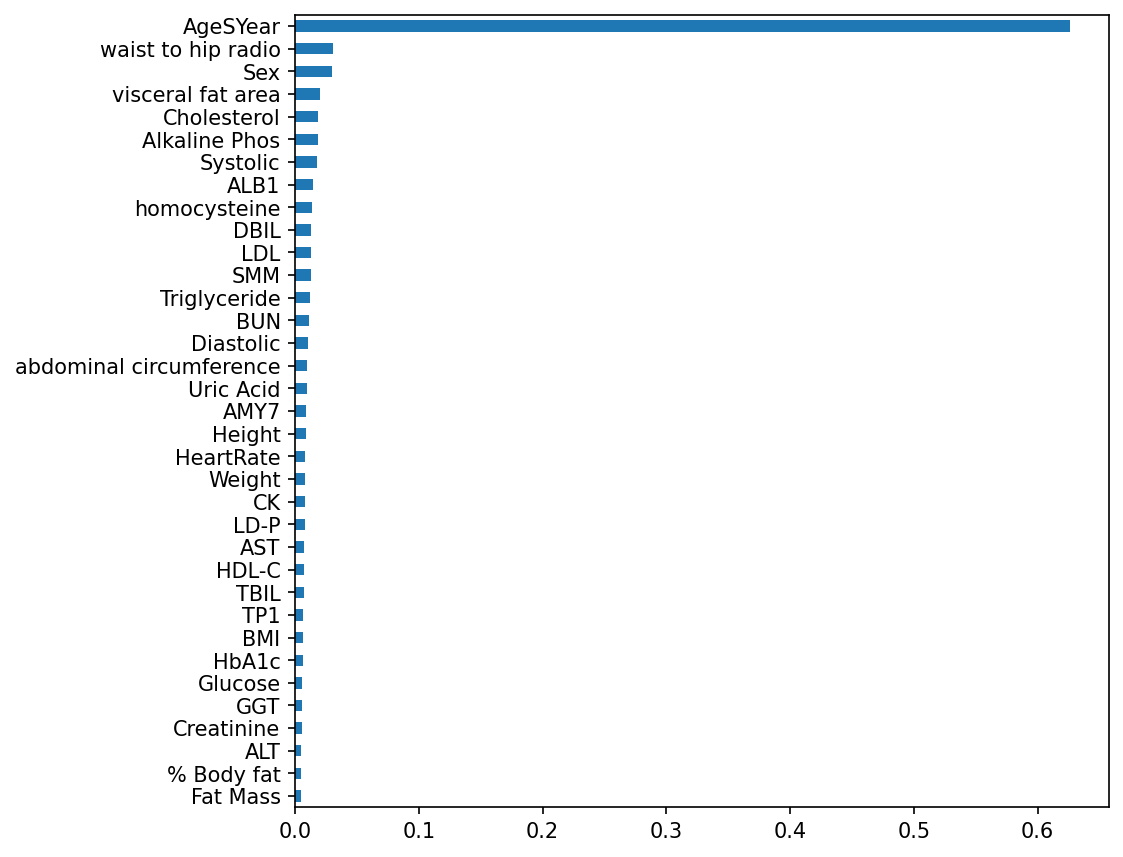

In [108]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A20

In [109]:
X=A20[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A20['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [110]:
Tree.feature_importances_

array([0.02570479, 0.64553806, 0.00434502, 0.01215669, 0.00510535,
       0.01136033, 0.00399855, 0.00570822, 0.00549037, 0.02972468,
       0.01261489, 0.00739566, 0.00662132, 0.0117994 , 0.03594344,
       0.0106366 , 0.00500056, 0.01699094, 0.01487735, 0.00633836,
       0.01384314, 0.00662764, 0.00847662, 0.01050239, 0.00595968,
       0.00941848, 0.0051757 , 0.00329745, 0.00632023, 0.00613204,
       0.01168729, 0.01039462, 0.00618407, 0.00982365, 0.00880641])

In [111]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.003297
Fat Mass                   0.003999
Weight                     0.004345
HDL-C                      0.005001
BMI                        0.005105
GGT                        0.005176
abdominal circumference    0.005490
% Body fat                 0.005708
ALT                        0.005960
AMY7                       0.006132
LD-P                       0.006184
HbA1c                      0.006320
TP1                        0.006338
HeartRate                  0.006621
TBIL                       0.006628
Diastolic                  0.007396
DBIL                       0.008477
CK                         0.008806
AST                        0.009418
Uric Acid                  0.009824
Creatinine                 0.010395
Alkaline Phos              0.010502
Triglyceride               0.010637
SMM                        0.011360
BUN                        0.011687
visceral fat area          0.011799
Height                     0.012157
Systolic                   0

In [112]:
Tree_im.sum()

1.0

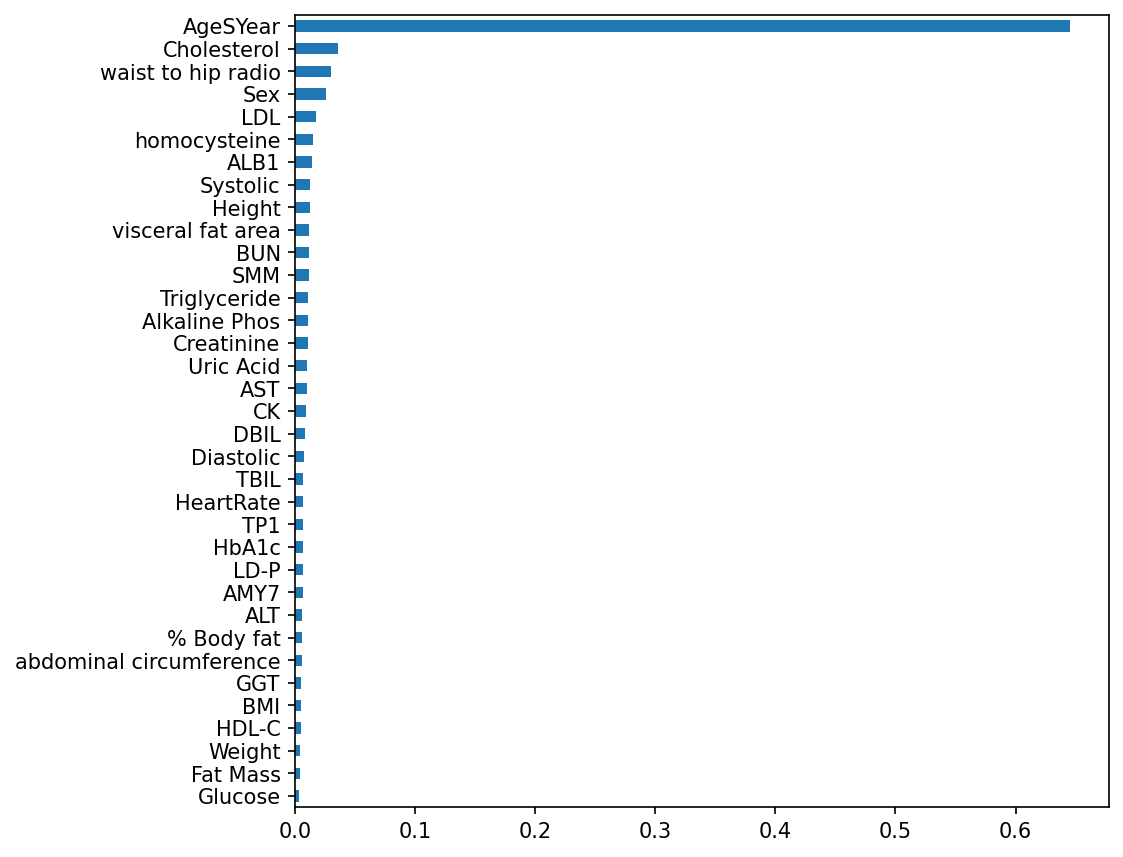

In [113]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A21

In [114]:
X=A21[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A21['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [115]:
Tree.feature_importances_

array([0.03168946, 0.55355838, 0.00743649, 0.01188507, 0.0091113 ,
       0.01174519, 0.00566707, 0.00597838, 0.0084744 , 0.07922764,
       0.0181011 , 0.00782633, 0.00852784, 0.02326994, 0.02306611,
       0.00923069, 0.00791825, 0.01239034, 0.01288158, 0.00875896,
       0.01493896, 0.0087511 , 0.00950501, 0.01691448, 0.00977321,
       0.00721112, 0.0048711 , 0.00477363, 0.01058014, 0.00906947,
       0.01395727, 0.00717009, 0.00627703, 0.01064547, 0.00881742])

In [116]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.004774
GGT                        0.004871
Fat Mass                   0.005667
% Body fat                 0.005978
LD-P                       0.006277
Creatinine                 0.007170
AST                        0.007211
Weight                     0.007436
Diastolic                  0.007826
HDL-C                      0.007918
abdominal circumference    0.008474
HeartRate                  0.008528
TBIL                       0.008751
TP1                        0.008759
CK                         0.008817
AMY7                       0.009069
BMI                        0.009111
Triglyceride               0.009231
DBIL                       0.009505
ALT                        0.009773
HbA1c                      0.010580
Uric Acid                  0.010645
SMM                        0.011745
Height                     0.011885
LDL                        0.012390
homocysteine               0.012882
BUN                        0.013957
ALB1                       0

In [117]:
Tree_im.sum()

1.0

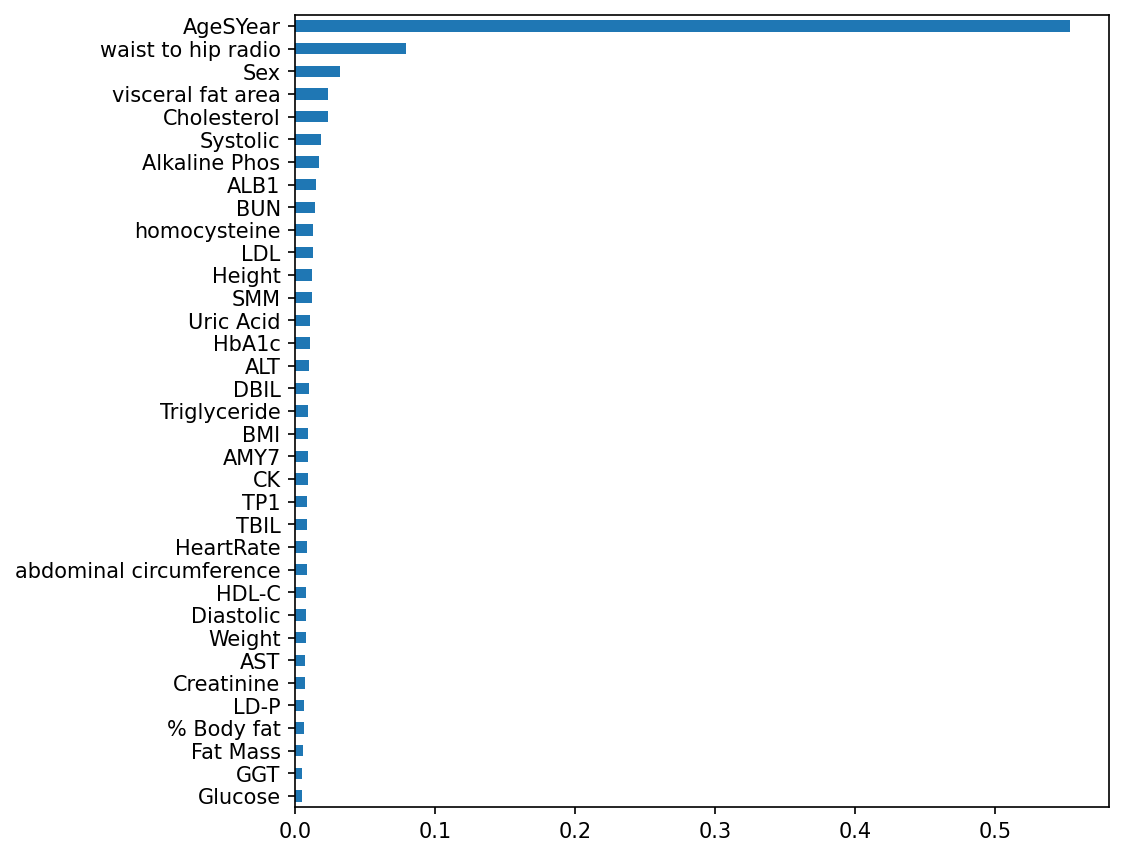

In [118]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A22

In [119]:
X=A22[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A22['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [120]:
Tree.feature_importances_

array([0.02329263, 0.59728019, 0.00637731, 0.01018727, 0.00754806,
       0.01114396, 0.0045086 , 0.00467723, 0.00957372, 0.06051051,
       0.01110116, 0.01061228, 0.00503543, 0.01807631, 0.02015559,
       0.01174341, 0.00934607, 0.01116825, 0.01002121, 0.00900835,
       0.01535074, 0.00909145, 0.01188329, 0.01755838, 0.00917702,
       0.00965714, 0.00513189, 0.00562344, 0.00675583, 0.00913786,
       0.01045368, 0.00962419, 0.00730465, 0.00916857, 0.01271433])

In [121]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Fat Mass                   0.004509
% Body fat                 0.004677
HeartRate                  0.005035
GGT                        0.005132
Glucose                    0.005623
Weight                     0.006377
HbA1c                      0.006756
LD-P                       0.007305
BMI                        0.007548
TP1                        0.009008
TBIL                       0.009091
AMY7                       0.009138
Uric Acid                  0.009169
ALT                        0.009177
HDL-C                      0.009346
abdominal circumference    0.009574
Creatinine                 0.009624
AST                        0.009657
homocysteine               0.010021
Height                     0.010187
BUN                        0.010454
Diastolic                  0.010612
Systolic                   0.011101
SMM                        0.011144
LDL                        0.011168
Triglyceride               0.011743
DBIL                       0.011883
CK                         0

In [122]:
Tree_im.sum()

0.9999999999999999

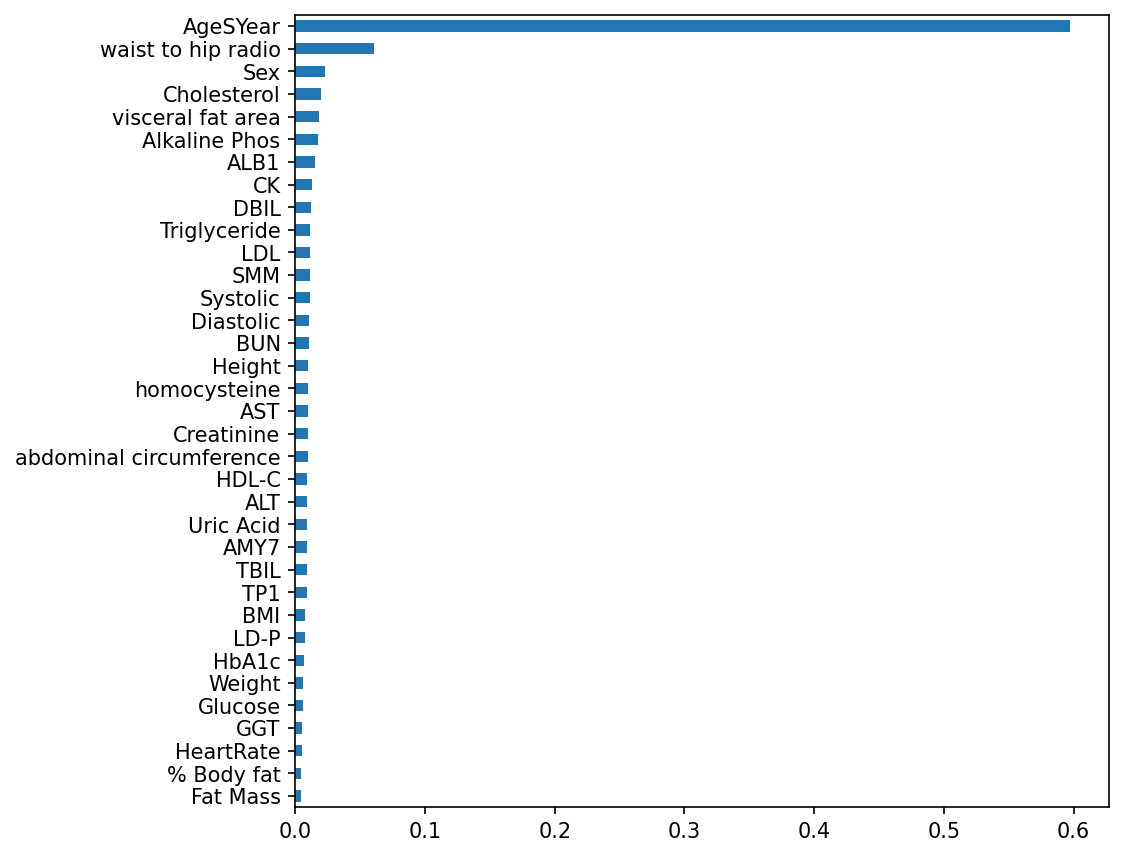

In [123]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A23

In [124]:
X=A23[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A23['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [125]:
Tree.feature_importances_

array([0.03094001, 0.61882606, 0.00772112, 0.00794135, 0.0108758 ,
       0.01088618, 0.0039369 , 0.00615358, 0.00887403, 0.04289826,
       0.01315376, 0.00824326, 0.00675115, 0.02507442, 0.01487887,
       0.00931682, 0.00627731, 0.00937315, 0.01095719, 0.00767316,
       0.01449908, 0.00844283, 0.01155111, 0.01879208, 0.0063296 ,
       0.00806709, 0.00512112, 0.00445856, 0.00706737, 0.00965347,
       0.01375533, 0.00748658, 0.0083184 , 0.00769537, 0.00800963])

In [126]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Fat Mass                   0.003937
Glucose                    0.004459
GGT                        0.005121
% Body fat                 0.006154
HDL-C                      0.006277
ALT                        0.006330
HeartRate                  0.006751
HbA1c                      0.007067
Creatinine                 0.007487
TP1                        0.007673
Uric Acid                  0.007695
Weight                     0.007721
Height                     0.007941
CK                         0.008010
AST                        0.008067
Diastolic                  0.008243
LD-P                       0.008318
TBIL                       0.008443
abdominal circumference    0.008874
Triglyceride               0.009317
LDL                        0.009373
AMY7                       0.009653
BMI                        0.010876
SMM                        0.010886
homocysteine               0.010957
DBIL                       0.011551
Systolic                   0.013154
BUN                        0

In [127]:
Tree_im.sum()

1.0

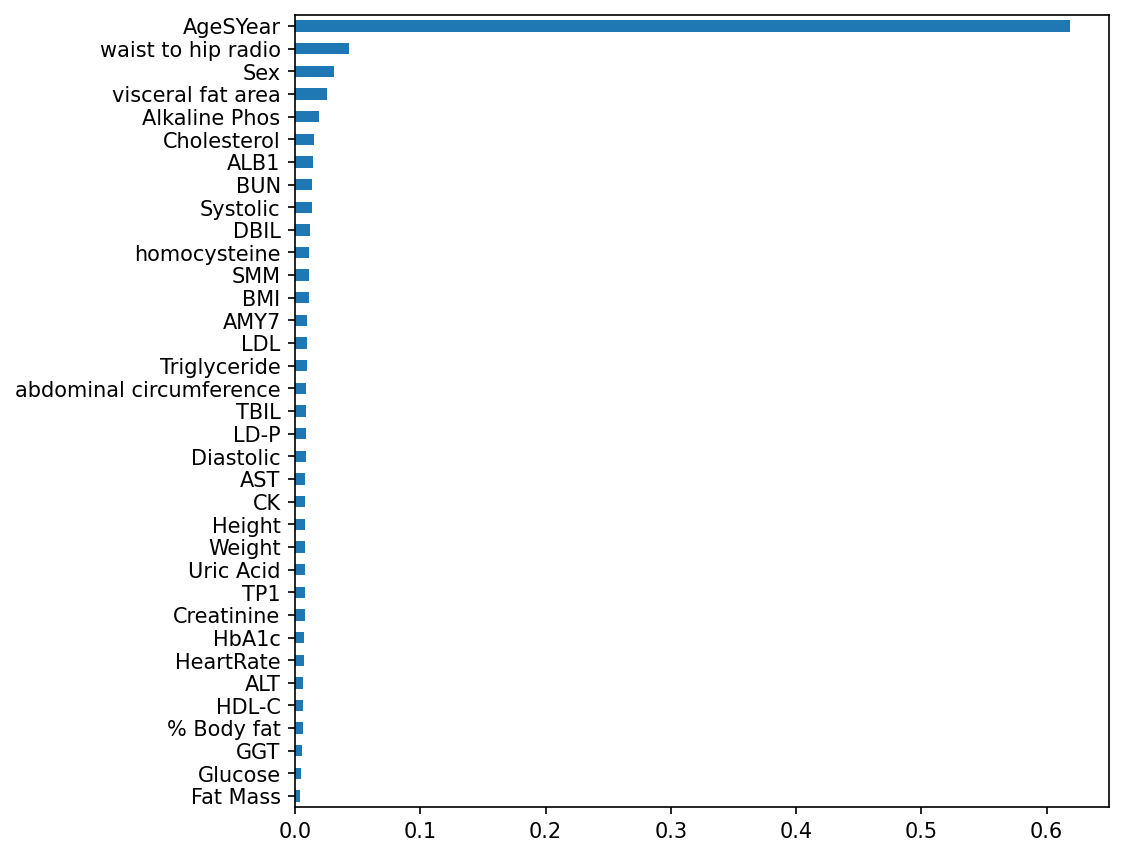

In [128]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A24

In [129]:
X=A24[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A24['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [130]:
Tree.feature_importances_

array([0.03519559, 0.60181366, 0.01088525, 0.00960245, 0.00715295,
       0.01341091, 0.00652934, 0.0041795 , 0.00820619, 0.03095562,
       0.01332955, 0.00922656, 0.00754636, 0.02822698, 0.03335224,
       0.01028228, 0.00533286, 0.0195283 , 0.00859177, 0.00821399,
       0.01821132, 0.00705239, 0.01205777, 0.01299685, 0.00584473,
       0.00752926, 0.00569381, 0.00592385, 0.00618019, 0.00735551,
       0.0081956 , 0.00763354, 0.00613937, 0.00638161, 0.01124185])

In [131]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

% Body fat                 0.004179
HDL-C                      0.005333
GGT                        0.005694
ALT                        0.005845
Glucose                    0.005924
LD-P                       0.006139
HbA1c                      0.006180
Uric Acid                  0.006382
Fat Mass                   0.006529
TBIL                       0.007052
BMI                        0.007153
AMY7                       0.007356
AST                        0.007529
HeartRate                  0.007546
Creatinine                 0.007634
BUN                        0.008196
abdominal circumference    0.008206
TP1                        0.008214
homocysteine               0.008592
Diastolic                  0.009227
Height                     0.009602
Triglyceride               0.010282
Weight                     0.010885
CK                         0.011242
DBIL                       0.012058
Alkaline Phos              0.012997
Systolic                   0.013330
SMM                        0

In [132]:
Tree_im.sum()

1.0

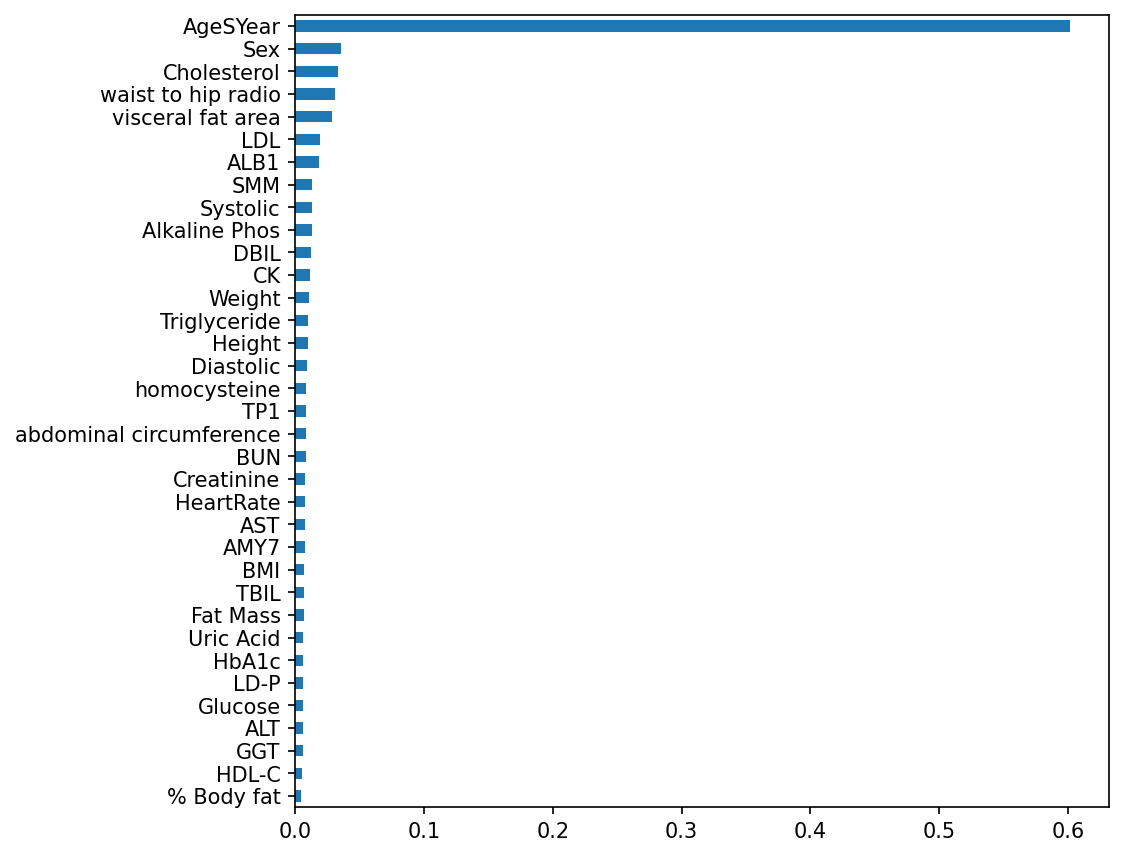

In [133]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A25

In [134]:
X=A25[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A25['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [135]:
Tree.feature_importances_

array([0.02841188, 0.58146193, 0.00600135, 0.01106386, 0.00917372,
       0.01165455, 0.00697471, 0.00795   , 0.00986698, 0.06174352,
       0.01028105, 0.00849901, 0.0070232 , 0.0147088 , 0.02891926,
       0.01120497, 0.00546211, 0.01421728, 0.01210777, 0.01042372,
       0.01805841, 0.00937258, 0.01406055, 0.0131004 , 0.00731253,
       0.0080911 , 0.00472036, 0.00572895, 0.00840287, 0.00654632,
       0.01527576, 0.00616485, 0.0069541 , 0.00913101, 0.00993055])

In [136]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

GGT                        0.004720
HDL-C                      0.005462
Glucose                    0.005729
Weight                     0.006001
Creatinine                 0.006165
AMY7                       0.006546
LD-P                       0.006954
Fat Mass                   0.006975
HeartRate                  0.007023
ALT                        0.007313
% Body fat                 0.007950
AST                        0.008091
HbA1c                      0.008403
Diastolic                  0.008499
Uric Acid                  0.009131
BMI                        0.009174
TBIL                       0.009373
abdominal circumference    0.009867
CK                         0.009931
Systolic                   0.010281
TP1                        0.010424
Height                     0.011064
Triglyceride               0.011205
SMM                        0.011655
homocysteine               0.012108
Alkaline Phos              0.013100
DBIL                       0.014061
LDL                        0

In [137]:
Tree_im.sum()

0.9999999999999999

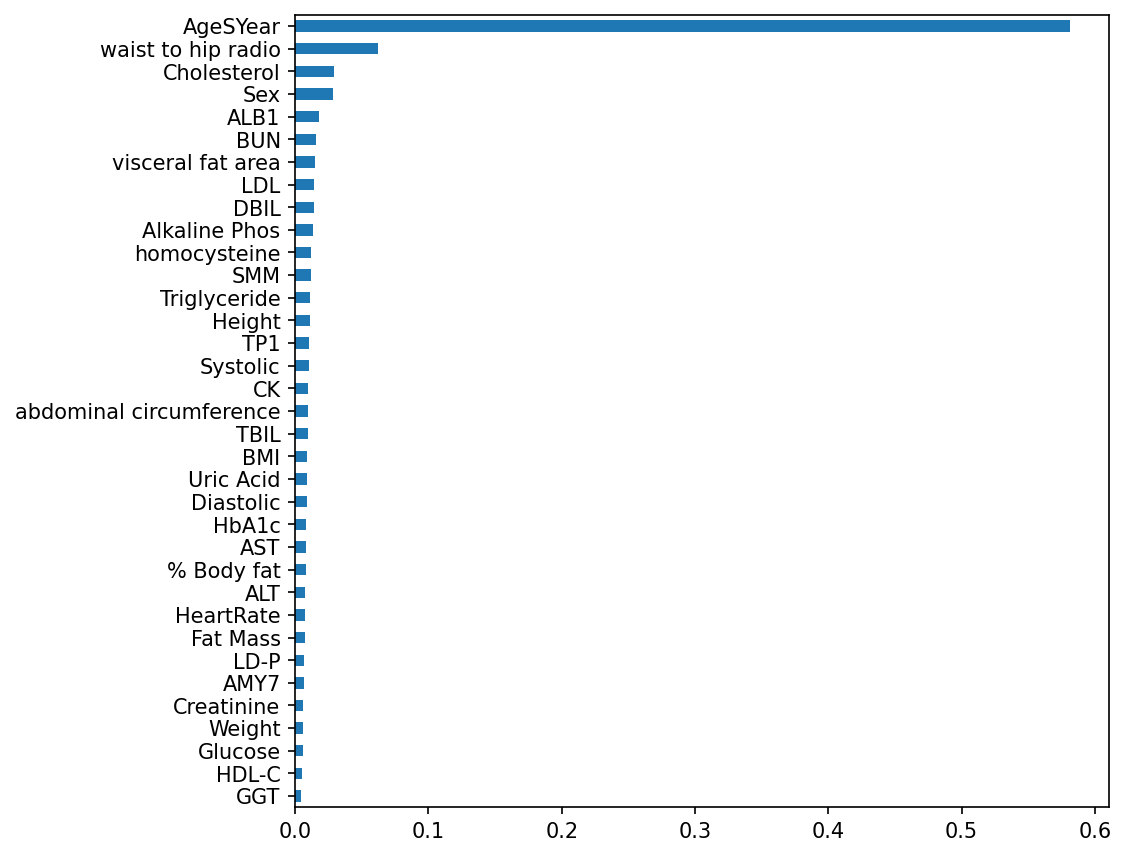

In [138]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A26

In [139]:
X=A26[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A26['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [140]:
Tree.feature_importances_

array([0.02728178, 0.58993805, 0.00502401, 0.00754082, 0.00658087,
       0.01208076, 0.00582385, 0.00621838, 0.00812815, 0.04306457,
       0.01221469, 0.00790869, 0.00964062, 0.03245896, 0.03335104,
       0.01188287, 0.00725306, 0.01030105, 0.01336245, 0.01050941,
       0.01560109, 0.00614739, 0.01100498, 0.01189405, 0.00810523,
       0.00815797, 0.00538829, 0.00580315, 0.0073819 , 0.01069844,
       0.0162244 , 0.00624034, 0.00758405, 0.00824441, 0.0109602 ])

In [141]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Weight                     0.005024
GGT                        0.005388
Glucose                    0.005803
Fat Mass                   0.005824
TBIL                       0.006147
% Body fat                 0.006218
Creatinine                 0.006240
BMI                        0.006581
HDL-C                      0.007253
HbA1c                      0.007382
Height                     0.007541
LD-P                       0.007584
Diastolic                  0.007909
ALT                        0.008105
abdominal circumference    0.008128
AST                        0.008158
Uric Acid                  0.008244
HeartRate                  0.009641
LDL                        0.010301
TP1                        0.010509
AMY7                       0.010698
CK                         0.010960
DBIL                       0.011005
Triglyceride               0.011883
Alkaline Phos              0.011894
SMM                        0.012081
Systolic                   0.012215
homocysteine               0

In [142]:
Tree_im.sum()

0.9999999999999998

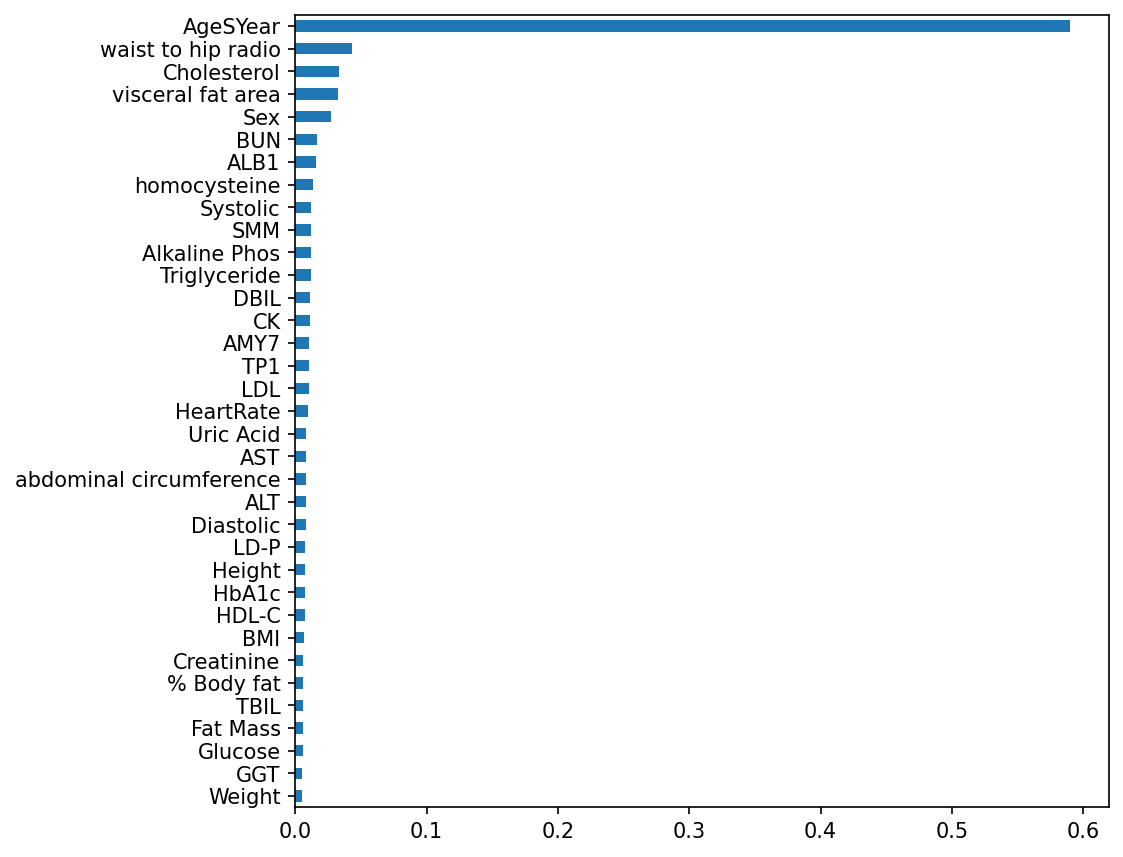

In [143]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A27

In [144]:
X=A27[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A27['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [145]:
Tree.feature_importances_

array([0.02396609, 0.59771185, 0.0065477 , 0.01248296, 0.00603763,
       0.01211794, 0.00587804, 0.00922274, 0.00643157, 0.03350114,
       0.01269904, 0.00790412, 0.00569842, 0.01355493, 0.05097348,
       0.00869405, 0.00649608, 0.01697291, 0.01571085, 0.00860443,
       0.01484248, 0.00739485, 0.01171963, 0.01656123, 0.00679833,
       0.0061183 , 0.005362  , 0.00604956, 0.00751503, 0.00843033,
       0.01359022, 0.00696548, 0.00753543, 0.01209109, 0.00782004])

In [146]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

GGT                        0.005362
HeartRate                  0.005698
Fat Mass                   0.005878
BMI                        0.006038
Glucose                    0.006050
AST                        0.006118
abdominal circumference    0.006432
HDL-C                      0.006496
Weight                     0.006548
ALT                        0.006798
Creatinine                 0.006965
TBIL                       0.007395
HbA1c                      0.007515
LD-P                       0.007535
CK                         0.007820
Diastolic                  0.007904
AMY7                       0.008430
TP1                        0.008604
Triglyceride               0.008694
% Body fat                 0.009223
DBIL                       0.011720
Uric Acid                  0.012091
SMM                        0.012118
Height                     0.012483
Systolic                   0.012699
visceral fat area          0.013555
BUN                        0.013590
ALB1                       0

In [147]:
Tree_im.sum()

1.0000000000000002

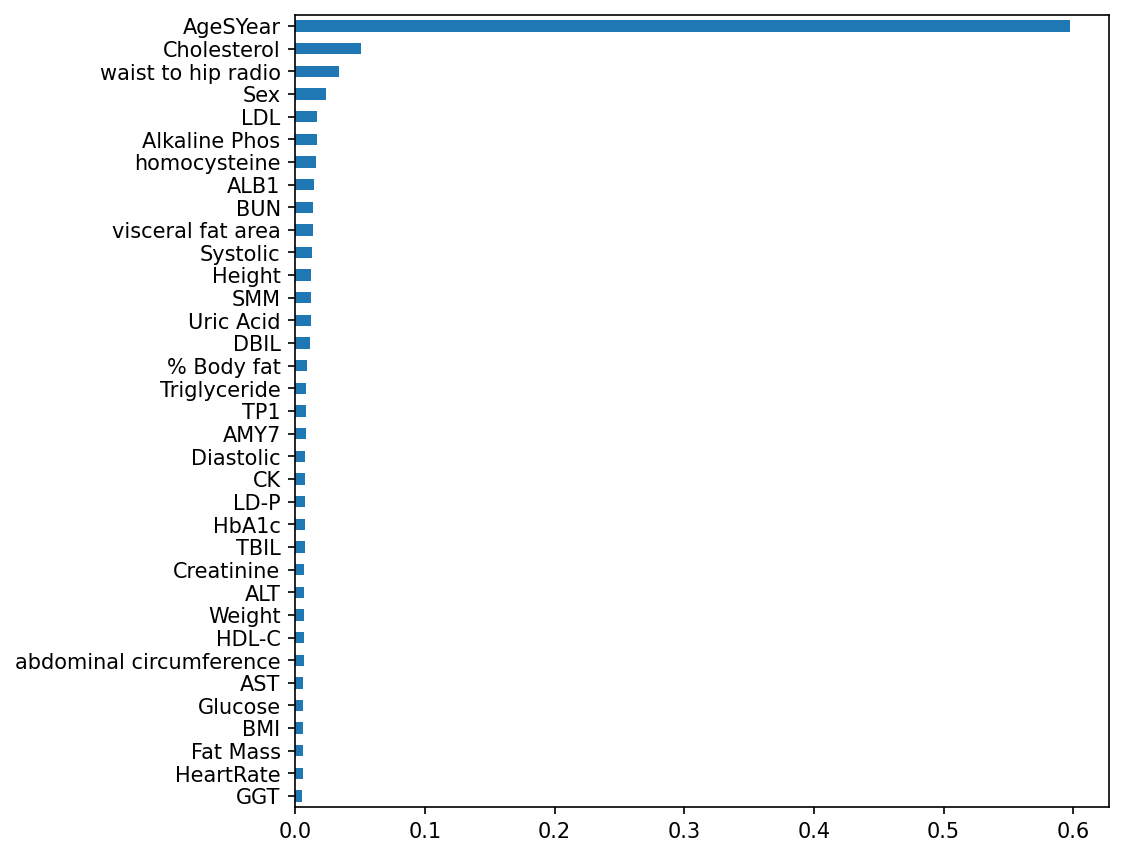

In [148]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A28

In [149]:
X=A28[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A28['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [150]:
Tree.feature_importances_

array([0.03787401, 0.55438876, 0.0080562 , 0.01112115, 0.00653893,
       0.01073249, 0.00492153, 0.0072245 , 0.01079316, 0.05507562,
       0.02004859, 0.00781198, 0.01156248, 0.02868169, 0.02578939,
       0.01307396, 0.00871555, 0.01773659, 0.01186826, 0.01047052,
       0.01873413, 0.00853815, 0.00712088, 0.0115371 , 0.00720703,
       0.00956656, 0.00490785, 0.0047258 , 0.00888197, 0.01074399,
       0.01064895, 0.00690136, 0.0068518 , 0.01089647, 0.01025265])

In [151]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.004726
GGT                        0.004908
Fat Mass                   0.004922
BMI                        0.006539
LD-P                       0.006852
Creatinine                 0.006901
DBIL                       0.007121
ALT                        0.007207
% Body fat                 0.007224
Diastolic                  0.007812
Weight                     0.008056
TBIL                       0.008538
HDL-C                      0.008716
HbA1c                      0.008882
AST                        0.009567
CK                         0.010253
TP1                        0.010471
BUN                        0.010649
SMM                        0.010732
AMY7                       0.010744
abdominal circumference    0.010793
Uric Acid                  0.010896
Height                     0.011121
Alkaline Phos              0.011537
HeartRate                  0.011562
homocysteine               0.011868
Triglyceride               0.013074
LDL                        0

In [152]:
Tree_im.sum()

1.0

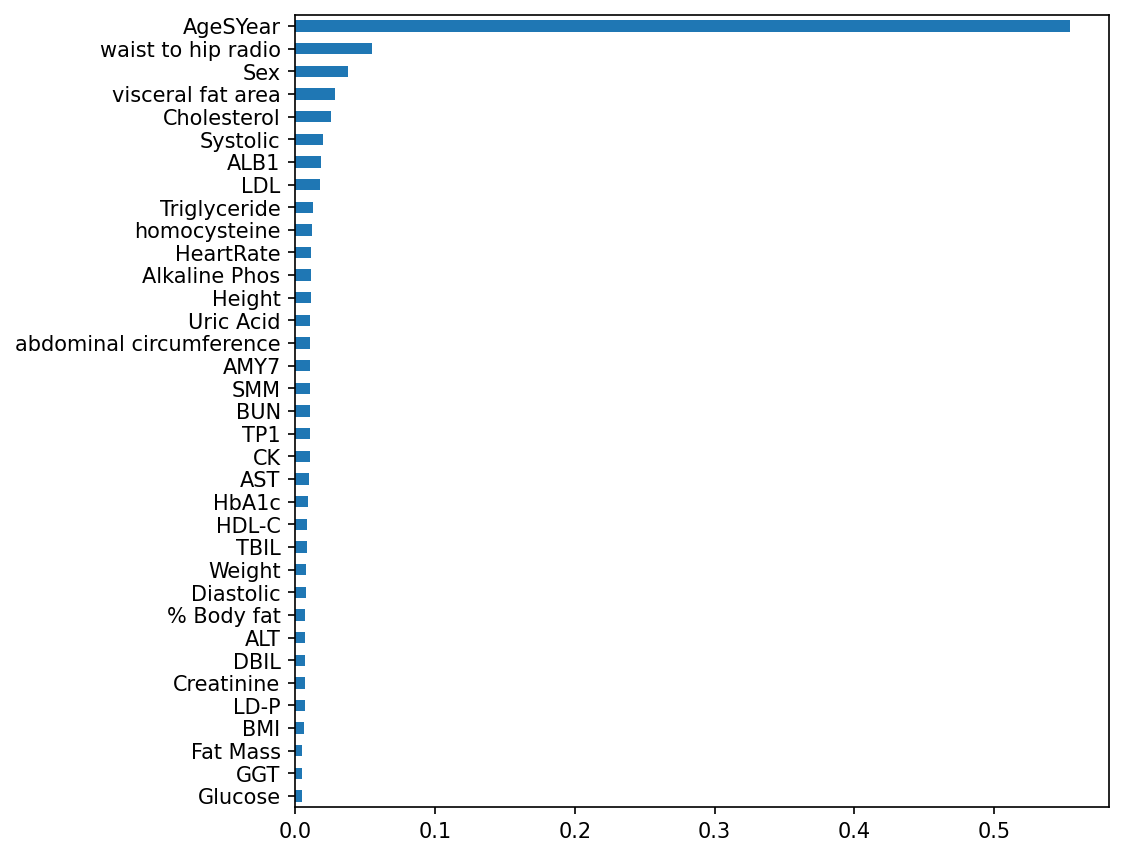

In [153]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A29

In [154]:
X=A29[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A29['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [155]:
Tree.feature_importances_

array([0.01626834, 0.62694724, 0.0071551 , 0.01022954, 0.00499085,
       0.00953927, 0.00447671, 0.00623242, 0.00779475, 0.04952961,
       0.00887432, 0.00779004, 0.0093496 , 0.01555057, 0.03050777,
       0.01342425, 0.00653641, 0.00805862, 0.00970239, 0.00902275,
       0.01461104, 0.00776413, 0.00916624, 0.01324049, 0.00704781,
       0.0116216 , 0.00609187, 0.00485022, 0.00830718, 0.00601143,
       0.01552451, 0.00937424, 0.00618248, 0.008934  , 0.00929221])

In [156]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Fat Mass                   0.004477
Glucose                    0.004850
BMI                        0.004991
AMY7                       0.006011
GGT                        0.006092
LD-P                       0.006182
% Body fat                 0.006232
HDL-C                      0.006536
ALT                        0.007048
Weight                     0.007155
TBIL                       0.007764
Diastolic                  0.007790
abdominal circumference    0.007795
LDL                        0.008059
HbA1c                      0.008307
Systolic                   0.008874
Uric Acid                  0.008934
TP1                        0.009023
DBIL                       0.009166
CK                         0.009292
HeartRate                  0.009350
Creatinine                 0.009374
SMM                        0.009539
homocysteine               0.009702
Height                     0.010230
AST                        0.011622
Alkaline Phos              0.013240
Triglyceride               0

In [157]:
Tree_im.sum()

1.0

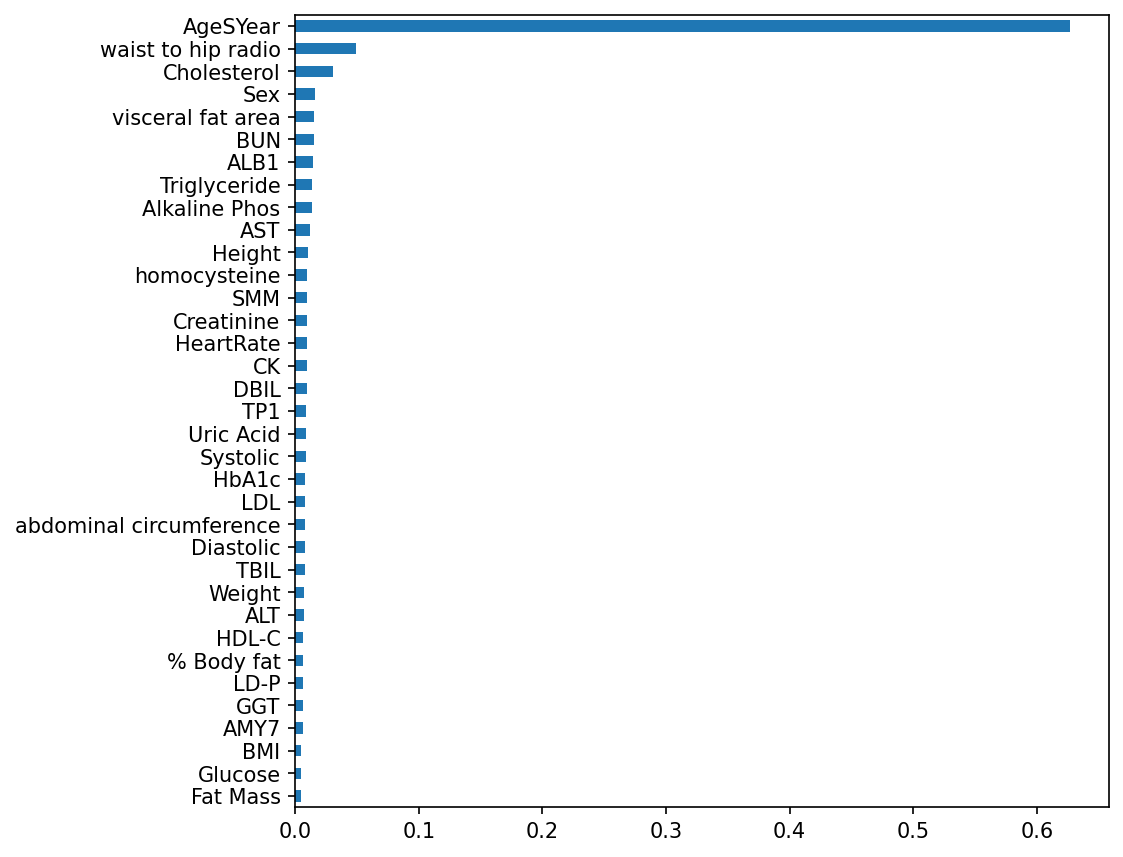

In [158]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

##A30

In [159]:
X=A30[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A30['telomere length (kb)']
Tree = ExtraTreesRegressor()
Tree = Tree.fit(X,y)

In [160]:
Tree.feature_importances_

array([0.03953956, 0.60603057, 0.00561839, 0.00798896, 0.00679279,
       0.01288256, 0.00687867, 0.00884292, 0.00599456, 0.04883167,
       0.0190078 , 0.00645586, 0.00725903, 0.01773602, 0.02818876,
       0.00979446, 0.00586315, 0.01398542, 0.01226704, 0.00588028,
       0.01363158, 0.00595314, 0.00920318, 0.01495262, 0.00587214,
       0.00656769, 0.00582682, 0.00501658, 0.0057901 , 0.00727473,
       0.01325686, 0.00653424, 0.00557736, 0.00913874, 0.00956575])

In [161]:
Tree_im=pd.Series(Tree.feature_importances_,index=X.columns).sort_values(ascending=True)
Tree_im

Glucose                    0.005017
LD-P                       0.005577
Weight                     0.005618
HbA1c                      0.005790
GGT                        0.005827
HDL-C                      0.005863
ALT                        0.005872
TP1                        0.005880
TBIL                       0.005953
abdominal circumference    0.005995
Diastolic                  0.006456
Creatinine                 0.006534
AST                        0.006568
BMI                        0.006793
Fat Mass                   0.006879
HeartRate                  0.007259
AMY7                       0.007275
Height                     0.007989
% Body fat                 0.008843
Uric Acid                  0.009139
DBIL                       0.009203
CK                         0.009566
Triglyceride               0.009794
homocysteine               0.012267
SMM                        0.012883
BUN                        0.013257
ALB1                       0.013632
LDL                        0

In [162]:
Tree_im.sum()

1.0

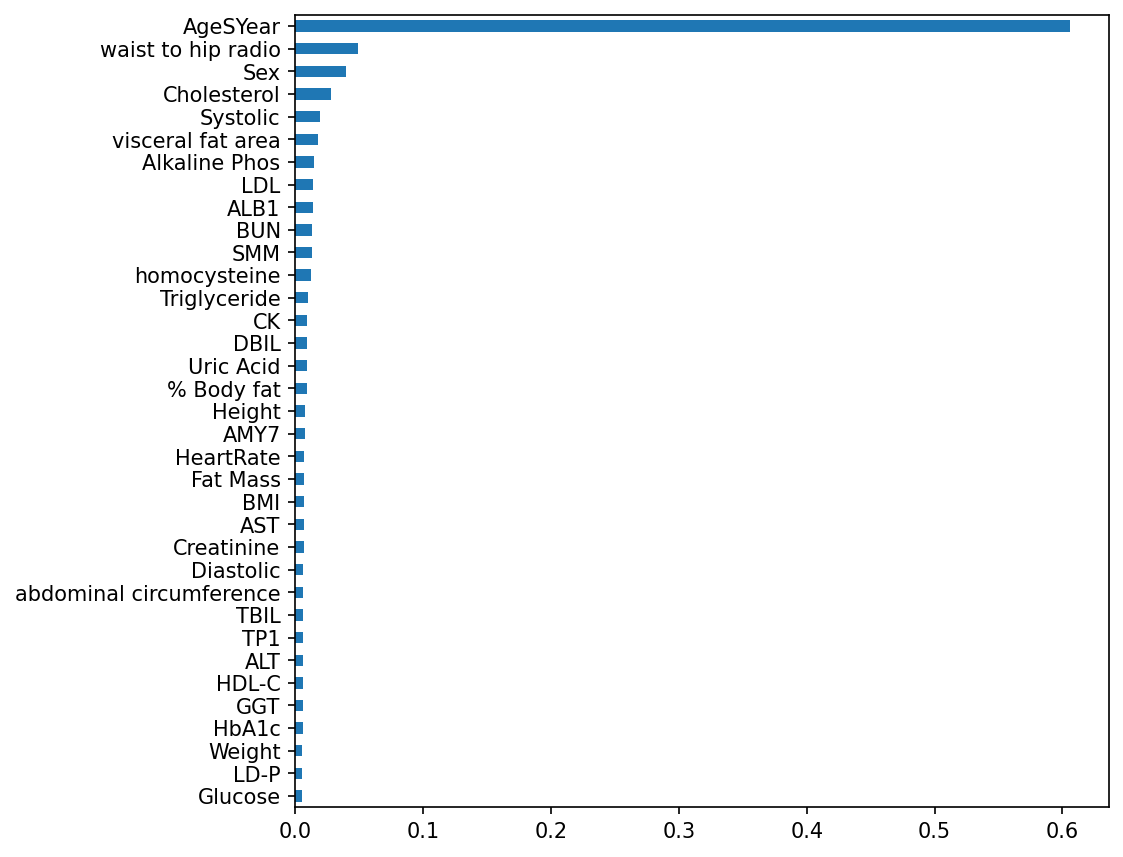

In [163]:
figure(figsize=(7, 7), dpi=150)
Tree_im.plot(kind='barh')

#RandomForestRegressor

##data

In [164]:
X=data[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=data['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [165]:
Forest.feature_importances_

array([0.00457408, 0.71812606, 0.00558666, 0.01306993, 0.002705  ,
       0.01259455, 0.00227826, 0.00513733, 0.00818715, 0.00630518,
       0.01317332, 0.00528546, 0.00572045, 0.00706661, 0.00862982,
       0.01538878, 0.00561679, 0.00667052, 0.02000918, 0.00961239,
       0.02054365, 0.00684868, 0.00603374, 0.01707498, 0.0063206 ,
       0.00655216, 0.00458199, 0.00241604, 0.00714935, 0.00895869,
       0.00610482, 0.00249685, 0.010186  , 0.01248954, 0.00650537])

In [166]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Fat Mass                   0.002278
Glucose                    0.002416
Creatinine                 0.002497
BMI                        0.002705
Sex                        0.004574
GGT                        0.004582
% Body fat                 0.005137
Diastolic                  0.005285
Weight                     0.005587
HDL-C                      0.005617
HeartRate                  0.005720
DBIL                       0.006034
BUN                        0.006105
waist to hip radio         0.006305
ALT                        0.006321
CK                         0.006505
AST                        0.006552
LDL                        0.006671
TBIL                       0.006849
visceral fat area          0.007067
HbA1c                      0.007149
abdominal circumference    0.008187
Cholesterol                0.008630
AMY7                       0.008959
TP1                        0.009612
LD-P                       0.010186
Uric Acid                  0.012490
SMM                        0

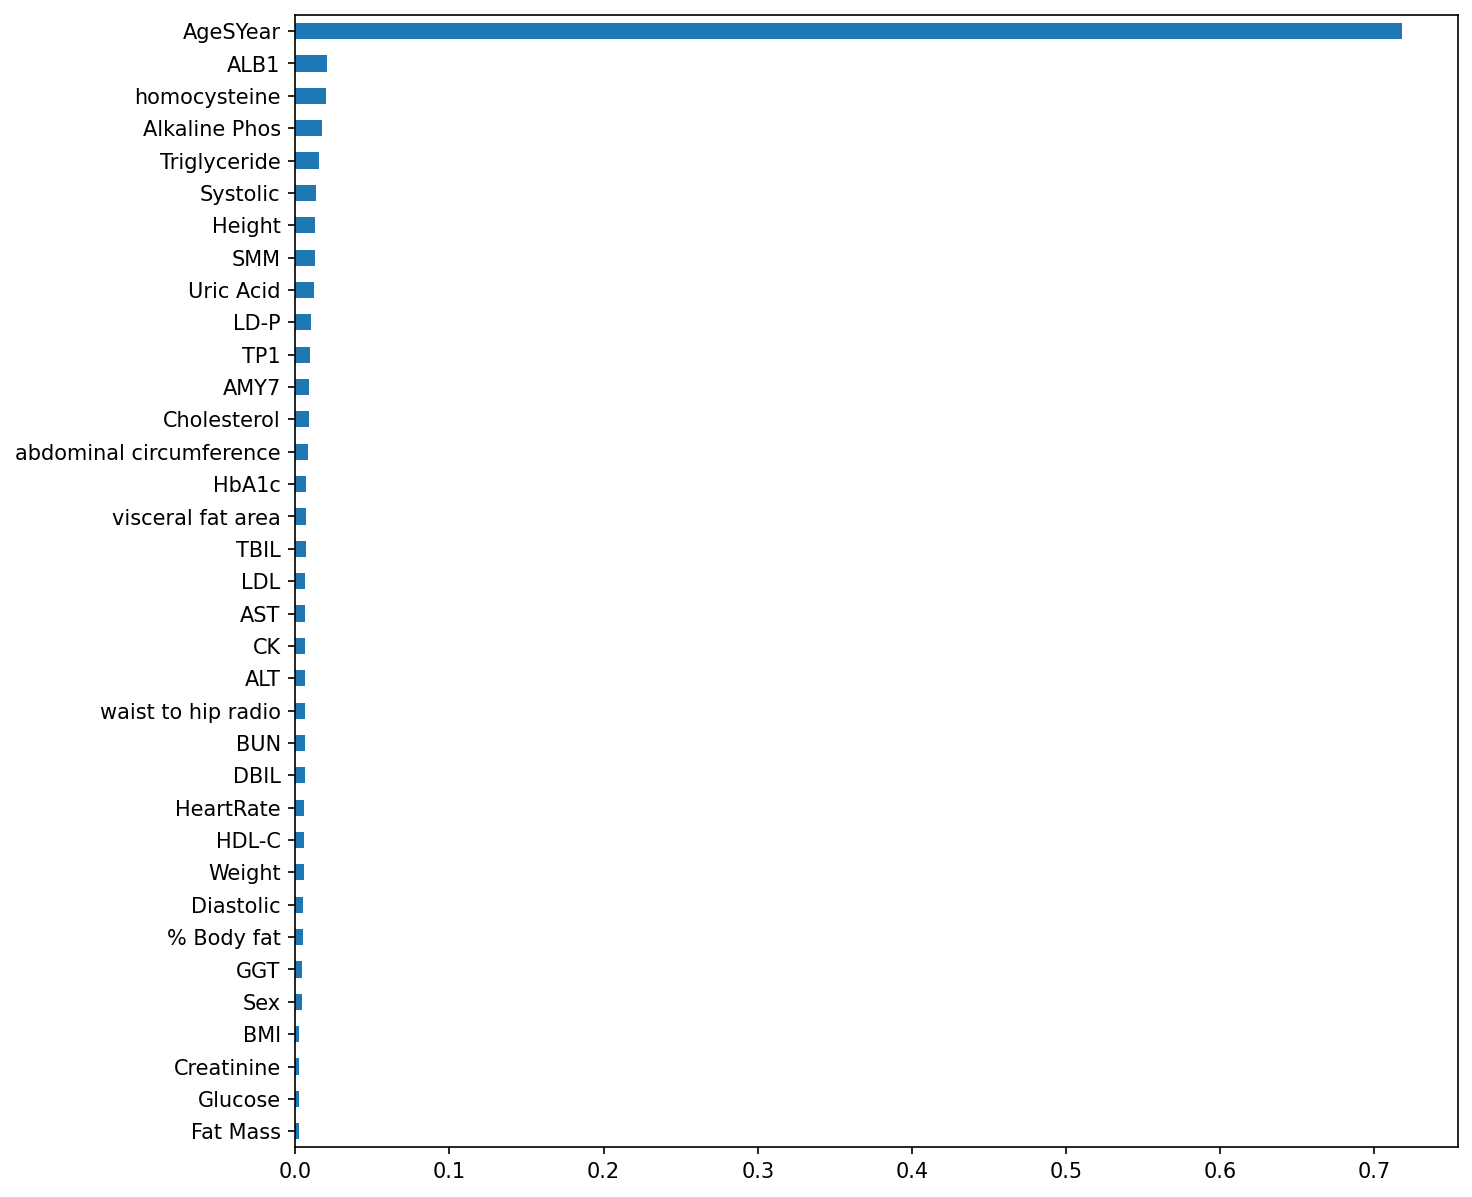

In [167]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A1

In [168]:
X=A1[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A1['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [169]:
Forest.feature_importances_

array([2.10668225e-04, 7.45017799e-01, 5.35847316e-03, 1.36868099e-02,
       2.92206354e-03, 1.09285942e-02, 2.89765132e-03, 5.47415161e-03,
       4.12569528e-03, 3.97423753e-03, 6.46539188e-03, 2.65646901e-03,
       4.69798196e-03, 1.02798538e-02, 6.71548596e-03, 1.92775234e-02,
       4.13214433e-03, 3.88342545e-03, 1.43956689e-02, 7.99859750e-03,
       3.28669203e-02, 4.57291995e-03, 4.13394528e-03, 2.51967042e-02,
       2.74509899e-03, 4.50026172e-03, 2.85723411e-03, 2.27323362e-03,
       4.67652698e-03, 6.02835732e-03, 4.30745779e-03, 4.29854199e-03,
       9.47818765e-03, 9.24170222e-03, 7.72422168e-03])

In [170]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.000211
Glucose                    0.002273
Diastolic                  0.002656
ALT                        0.002745
GGT                        0.002857
Fat Mass                   0.002898
BMI                        0.002922
LDL                        0.003883
waist to hip radio         0.003974
abdominal circumference    0.004126
HDL-C                      0.004132
DBIL                       0.004134
Creatinine                 0.004299
BUN                        0.004307
AST                        0.004500
TBIL                       0.004573
HbA1c                      0.004677
HeartRate                  0.004698
Weight                     0.005358
% Body fat                 0.005474
AMY7                       0.006028
Systolic                   0.006465
Cholesterol                0.006715
CK                         0.007724
TP1                        0.007999
Uric Acid                  0.009242
LD-P                       0.009478
visceral fat area          0

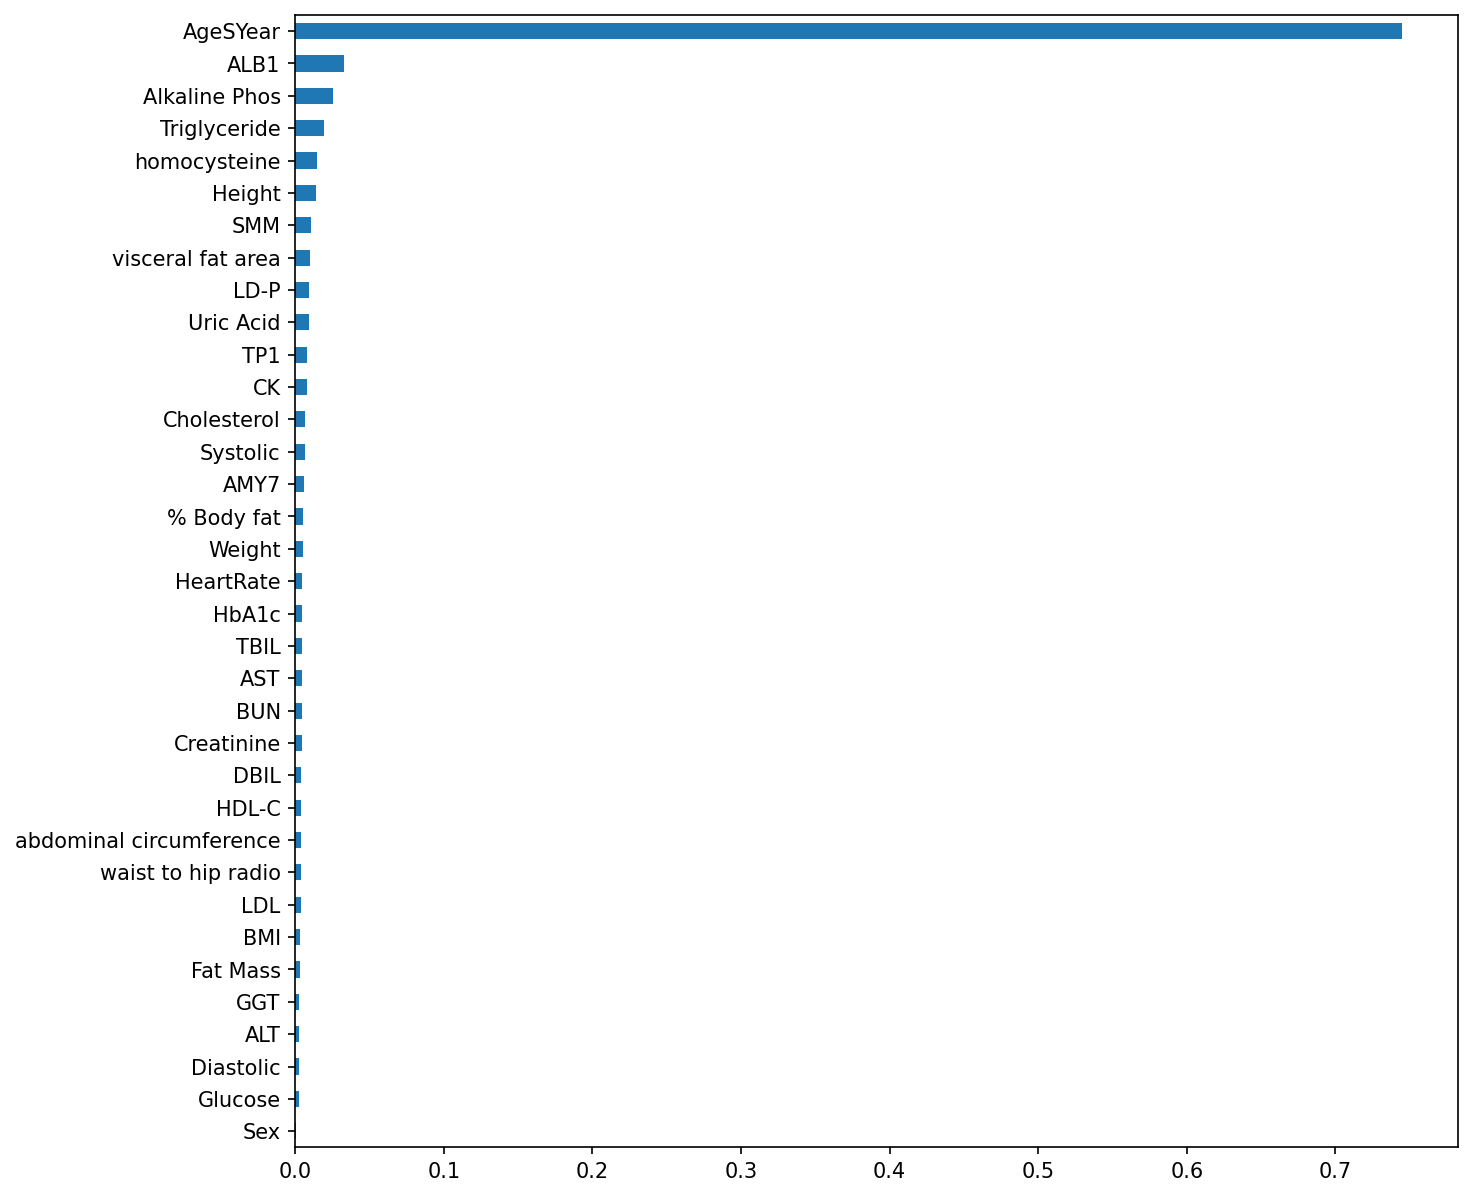

In [171]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A2

In [172]:
X=A2[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A2['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [173]:
Forest.feature_importances_

array([1.62880874e-04, 7.33439572e-01, 8.10115918e-03, 9.99274734e-03,
       2.95089579e-03, 1.10870567e-02, 2.57823401e-03, 3.32354692e-03,
       3.99268667e-03, 2.05158022e-03, 8.73670772e-03, 3.96436207e-03,
       5.59982161e-03, 7.91240023e-03, 9.57074484e-03, 1.51225847e-02,
       5.16705078e-03, 3.73958269e-03, 1.55406133e-02, 8.92305748e-03,
       1.51875516e-02, 5.97521279e-03, 6.57912209e-03, 2.98303108e-02,
       5.77056841e-03, 1.91763339e-02, 3.35137089e-03, 3.40830753e-03,
       6.26836692e-03, 6.87711971e-03, 6.69219142e-03, 2.41786907e-03,
       6.15455691e-03, 1.43547273e-02, 5.99910612e-03])

In [174]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.000163
waist to hip radio         0.002052
Creatinine                 0.002418
Fat Mass                   0.002578
BMI                        0.002951
% Body fat                 0.003324
GGT                        0.003351
Glucose                    0.003408
LDL                        0.003740
Diastolic                  0.003964
abdominal circumference    0.003993
HDL-C                      0.005167
HeartRate                  0.005600
ALT                        0.005771
TBIL                       0.005975
CK                         0.005999
LD-P                       0.006155
HbA1c                      0.006268
DBIL                       0.006579
BUN                        0.006692
AMY7                       0.006877
visceral fat area          0.007912
Weight                     0.008101
Systolic                   0.008737
TP1                        0.008923
Cholesterol                0.009571
Height                     0.009993
SMM                        0

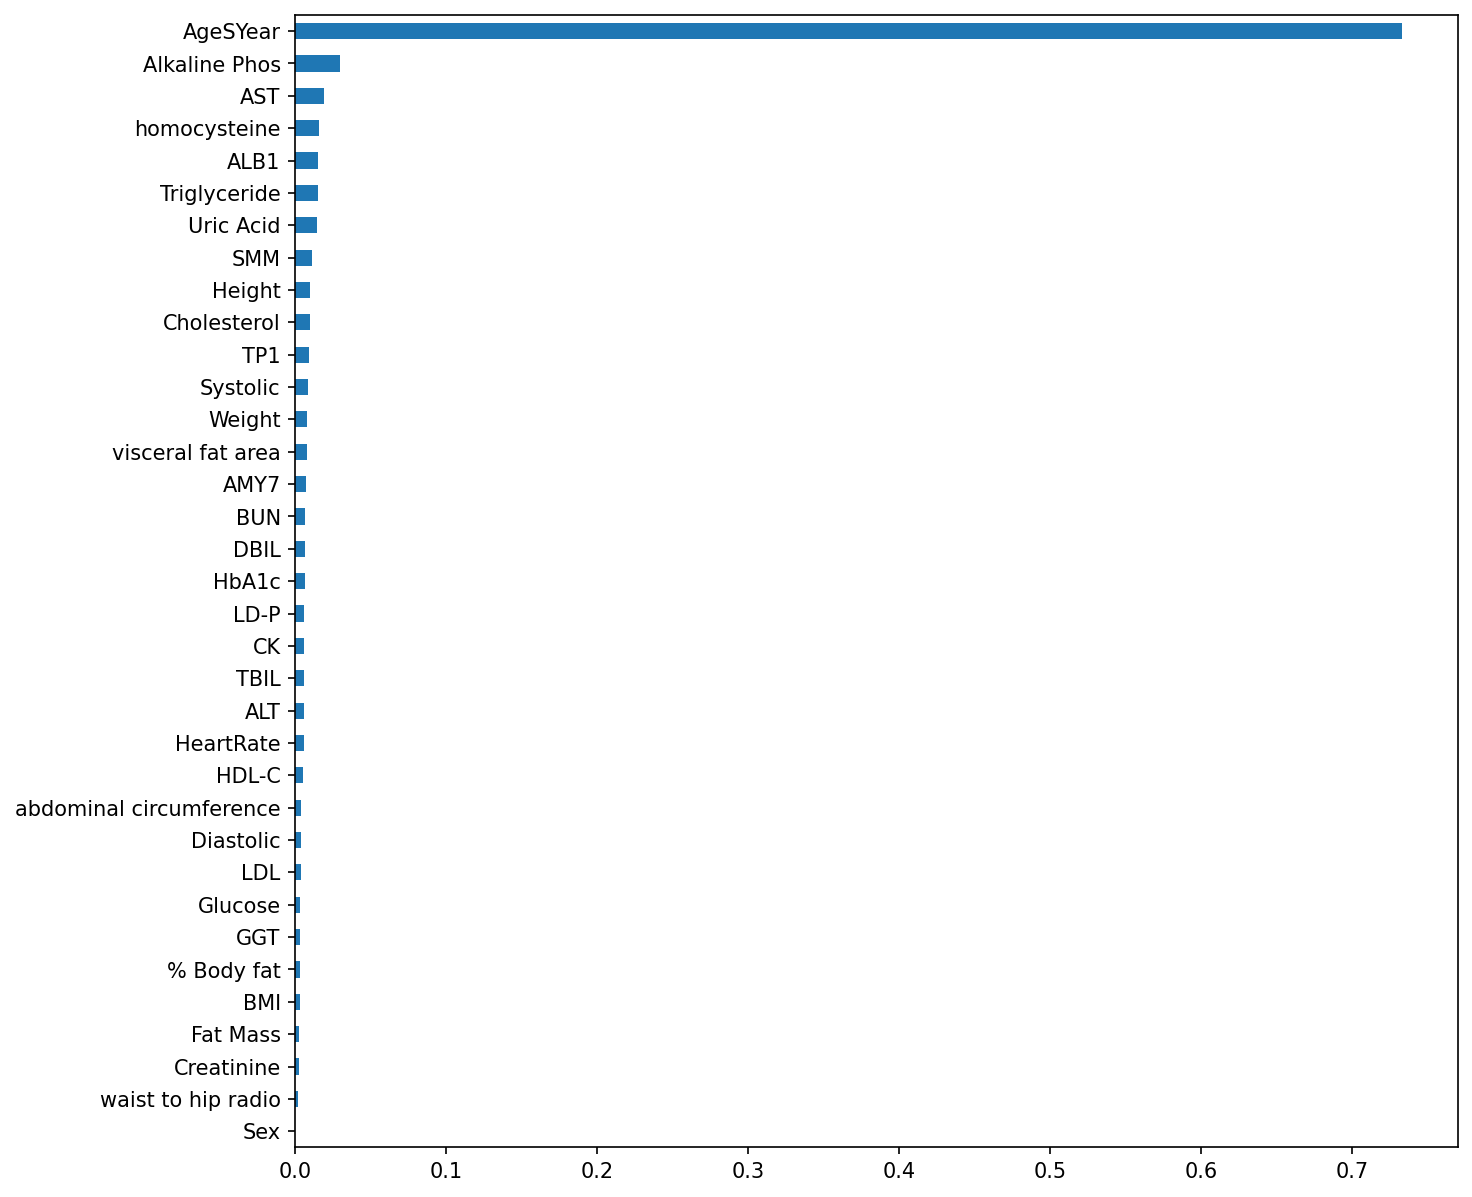

In [175]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A3

In [176]:
X=A3[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A3['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [177]:
Forest.feature_importances_

array([0.00164805, 0.73200087, 0.00582761, 0.01902018, 0.0040771 ,
       0.01062419, 0.00364534, 0.00326763, 0.01008256, 0.01199963,
       0.00984768, 0.00499978, 0.0048752 , 0.01153247, 0.00586337,
       0.02488124, 0.00535106, 0.00316319, 0.01196479, 0.00767327,
       0.02242142, 0.00553707, 0.00628812, 0.02144321, 0.00295332,
       0.00640263, 0.00351588, 0.00253089, 0.00352992, 0.00510547,
       0.00528706, 0.00184312, 0.00594668, 0.01075621, 0.00409383])

In [178]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.001648
Creatinine                 0.001843
Glucose                    0.002531
ALT                        0.002953
LDL                        0.003163
% Body fat                 0.003268
GGT                        0.003516
HbA1c                      0.003530
Fat Mass                   0.003645
BMI                        0.004077
CK                         0.004094
HeartRate                  0.004875
Diastolic                  0.005000
AMY7                       0.005105
BUN                        0.005287
HDL-C                      0.005351
TBIL                       0.005537
Weight                     0.005828
Cholesterol                0.005863
LD-P                       0.005947
DBIL                       0.006288
AST                        0.006403
TP1                        0.007673
Systolic                   0.009848
abdominal circumference    0.010083
SMM                        0.010624
Uric Acid                  0.010756
visceral fat area          0

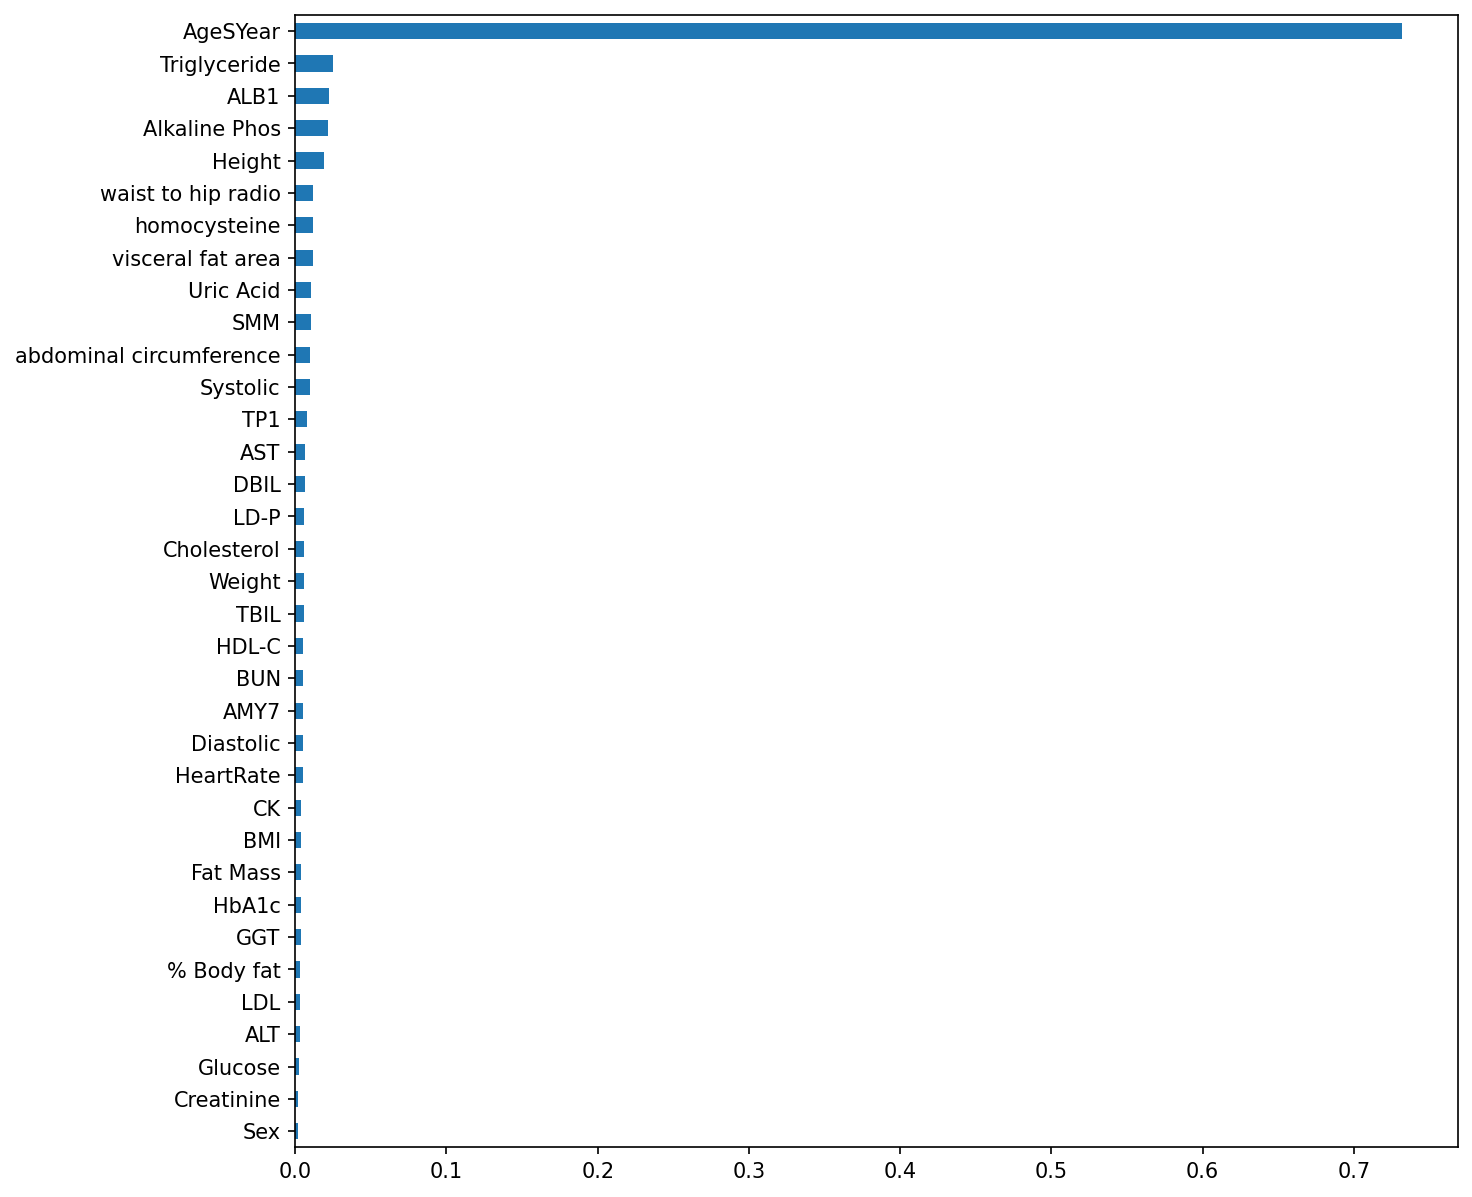

In [179]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A4

In [180]:
X=A4[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A4['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [181]:
Forest.feature_importances_

array([0.00166551, 0.74890025, 0.00497498, 0.00624344, 0.00395166,
       0.00930567, 0.00382447, 0.00535195, 0.00601568, 0.00110378,
       0.00817636, 0.00551882, 0.0058845 , 0.0061225 , 0.00407558,
       0.01297445, 0.00576198, 0.00421446, 0.01710312, 0.00629192,
       0.01915176, 0.00567608, 0.00460863, 0.03310886, 0.00317693,
       0.00363514, 0.003913  , 0.00264331, 0.0102395 , 0.01153985,
       0.00550808, 0.00153362, 0.00536128, 0.01716021, 0.00528267])

In [182]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

waist to hip radio         0.001104
Creatinine                 0.001534
Sex                        0.001666
Glucose                    0.002643
ALT                        0.003177
AST                        0.003635
Fat Mass                   0.003824
GGT                        0.003913
BMI                        0.003952
Cholesterol                0.004076
LDL                        0.004214
DBIL                       0.004609
Weight                     0.004975
CK                         0.005283
% Body fat                 0.005352
LD-P                       0.005361
BUN                        0.005508
Diastolic                  0.005519
TBIL                       0.005676
HDL-C                      0.005762
HeartRate                  0.005884
abdominal circumference    0.006016
visceral fat area          0.006122
Height                     0.006243
TP1                        0.006292
Systolic                   0.008176
SMM                        0.009306
HbA1c                      0

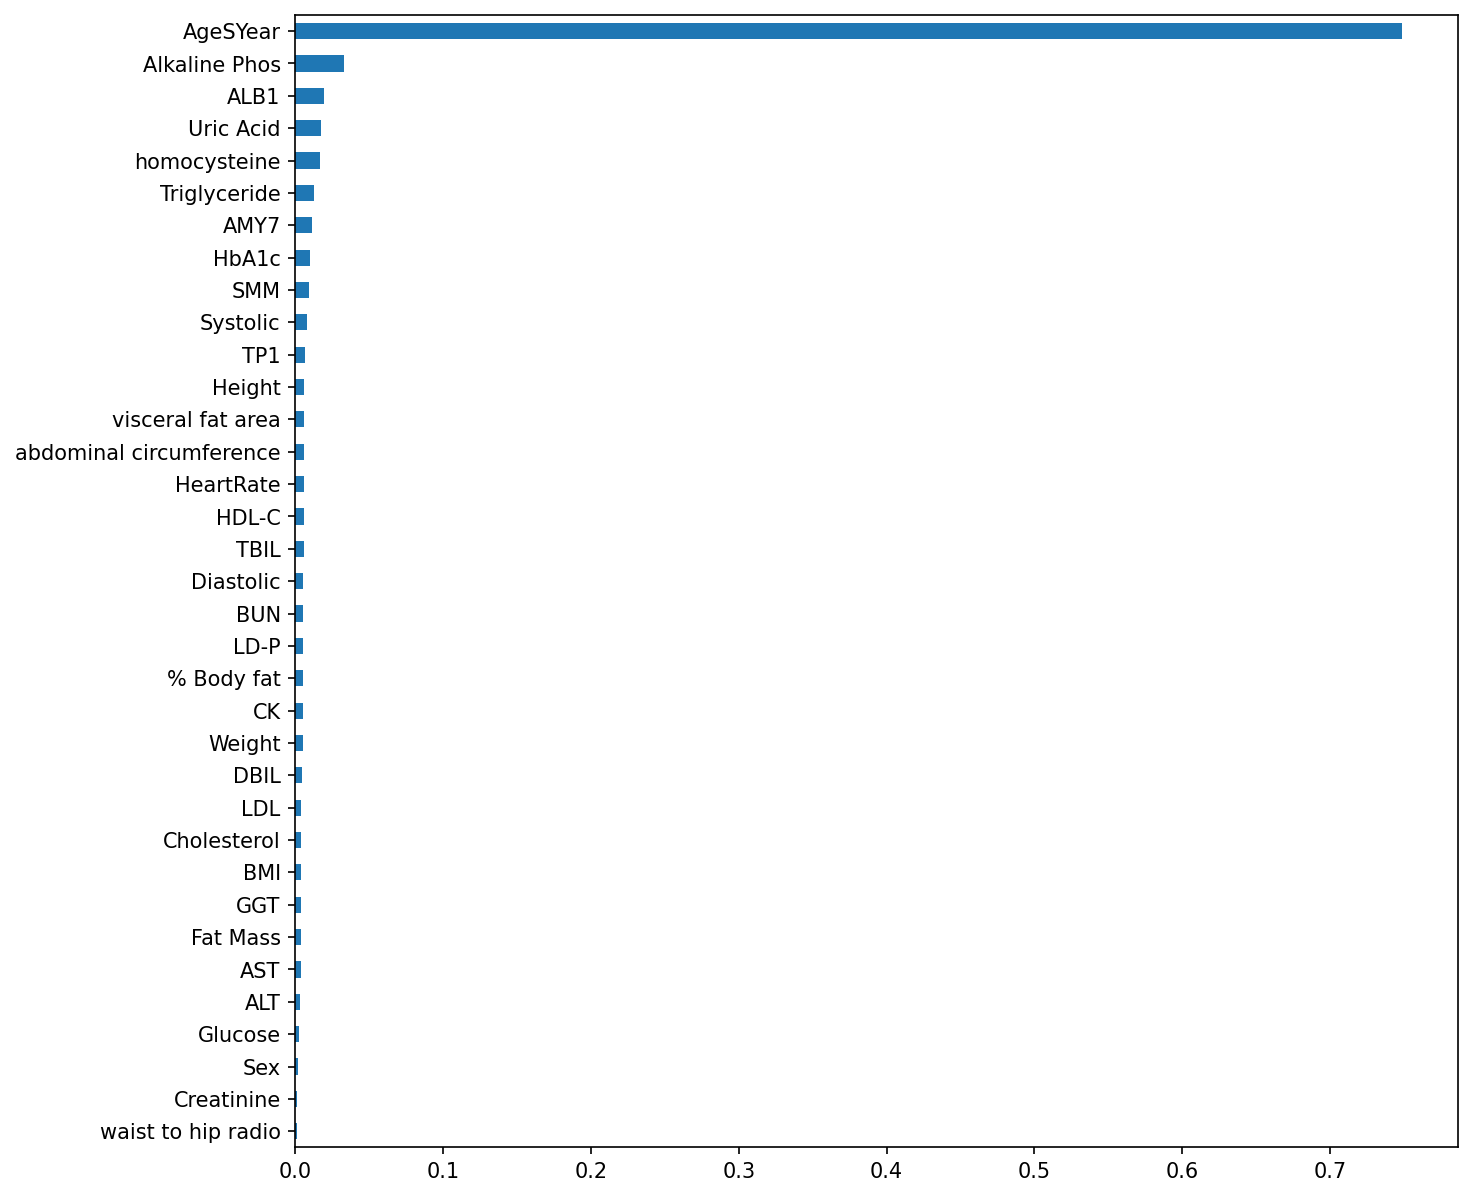

In [183]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A5

In [184]:
X=A5[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A5['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [185]:
Forest.feature_importances_

array([0.0011497 , 0.73560392, 0.00587039, 0.01805199, 0.00264597,
       0.01052991, 0.00248996, 0.00518816, 0.00167962, 0.00231721,
       0.01180838, 0.00633979, 0.00575916, 0.00919602, 0.0120483 ,
       0.02375766, 0.00660073, 0.00585874, 0.01802708, 0.00698277,
       0.01735762, 0.0068478 , 0.00704314, 0.01970686, 0.00313211,
       0.00473324, 0.00453195, 0.0029055 , 0.00458762, 0.0059482 ,
       0.00541535, 0.00191307, 0.0068066 , 0.0119646 , 0.00520086])

In [186]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.001150
abdominal circumference    0.001680
Creatinine                 0.001913
waist to hip radio         0.002317
Fat Mass                   0.002490
BMI                        0.002646
Glucose                    0.002906
ALT                        0.003132
GGT                        0.004532
HbA1c                      0.004588
AST                        0.004733
% Body fat                 0.005188
CK                         0.005201
BUN                        0.005415
HeartRate                  0.005759
LDL                        0.005859
Weight                     0.005870
AMY7                       0.005948
Diastolic                  0.006340
HDL-C                      0.006601
LD-P                       0.006807
TBIL                       0.006848
TP1                        0.006983
DBIL                       0.007043
visceral fat area          0.009196
SMM                        0.010530
Systolic                   0.011808
Uric Acid                  0

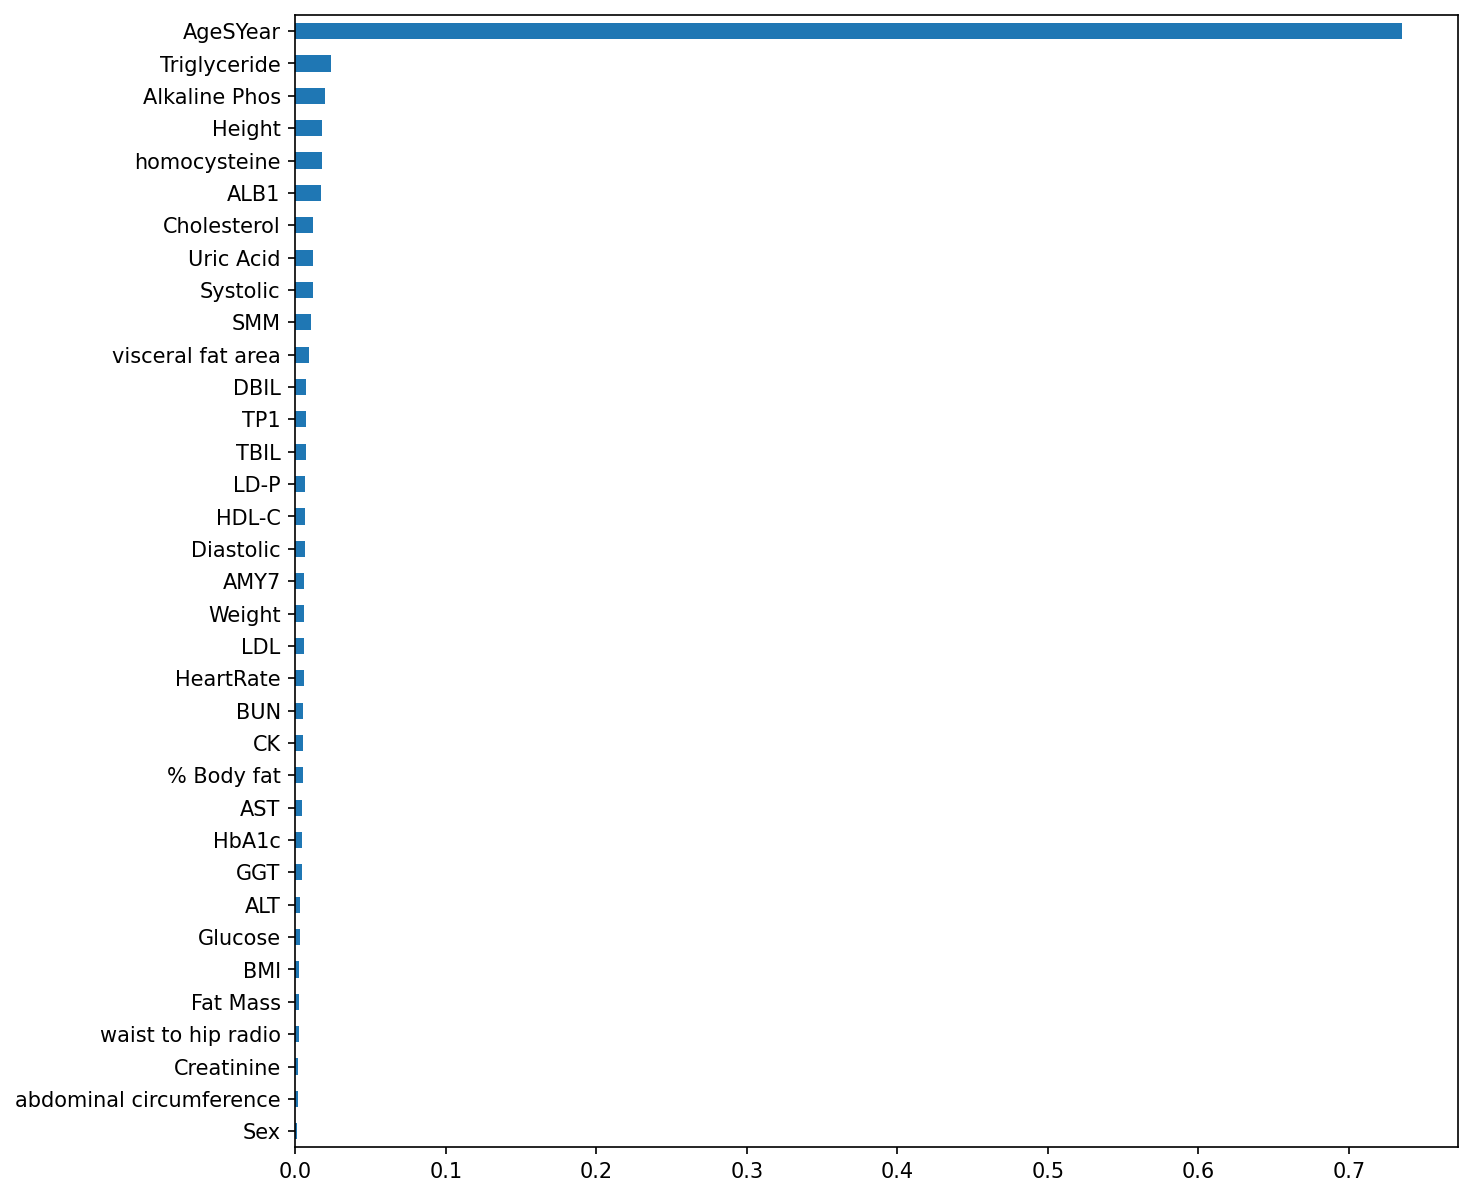

In [187]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A6

In [188]:
X=A6[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A6['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [189]:
Forest.feature_importances_

array([0.00683341, 0.73628443, 0.0068488 , 0.00845156, 0.0023021 ,
       0.02592066, 0.0026422 , 0.00228203, 0.00682729, 0.0043937 ,
       0.00716107, 0.00439912, 0.00594923, 0.00613093, 0.00578168,
       0.012104  , 0.00448575, 0.00531958, 0.02101404, 0.00990773,
       0.02105707, 0.00840224, 0.00571049, 0.00934962, 0.00561473,
       0.00459075, 0.00759534, 0.0040765 , 0.00732328, 0.01223096,
       0.00415056, 0.00095302, 0.00609389, 0.00811557, 0.00969668])

In [190]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Creatinine                 0.000953
% Body fat                 0.002282
BMI                        0.002302
Fat Mass                   0.002642
Glucose                    0.004077
BUN                        0.004151
waist to hip radio         0.004394
Diastolic                  0.004399
HDL-C                      0.004486
AST                        0.004591
LDL                        0.005320
ALT                        0.005615
DBIL                       0.005710
Cholesterol                0.005782
HeartRate                  0.005949
LD-P                       0.006094
visceral fat area          0.006131
abdominal circumference    0.006827
Sex                        0.006833
Weight                     0.006849
Systolic                   0.007161
HbA1c                      0.007323
GGT                        0.007595
Uric Acid                  0.008116
TBIL                       0.008402
Height                     0.008452
Alkaline Phos              0.009350
CK                         0

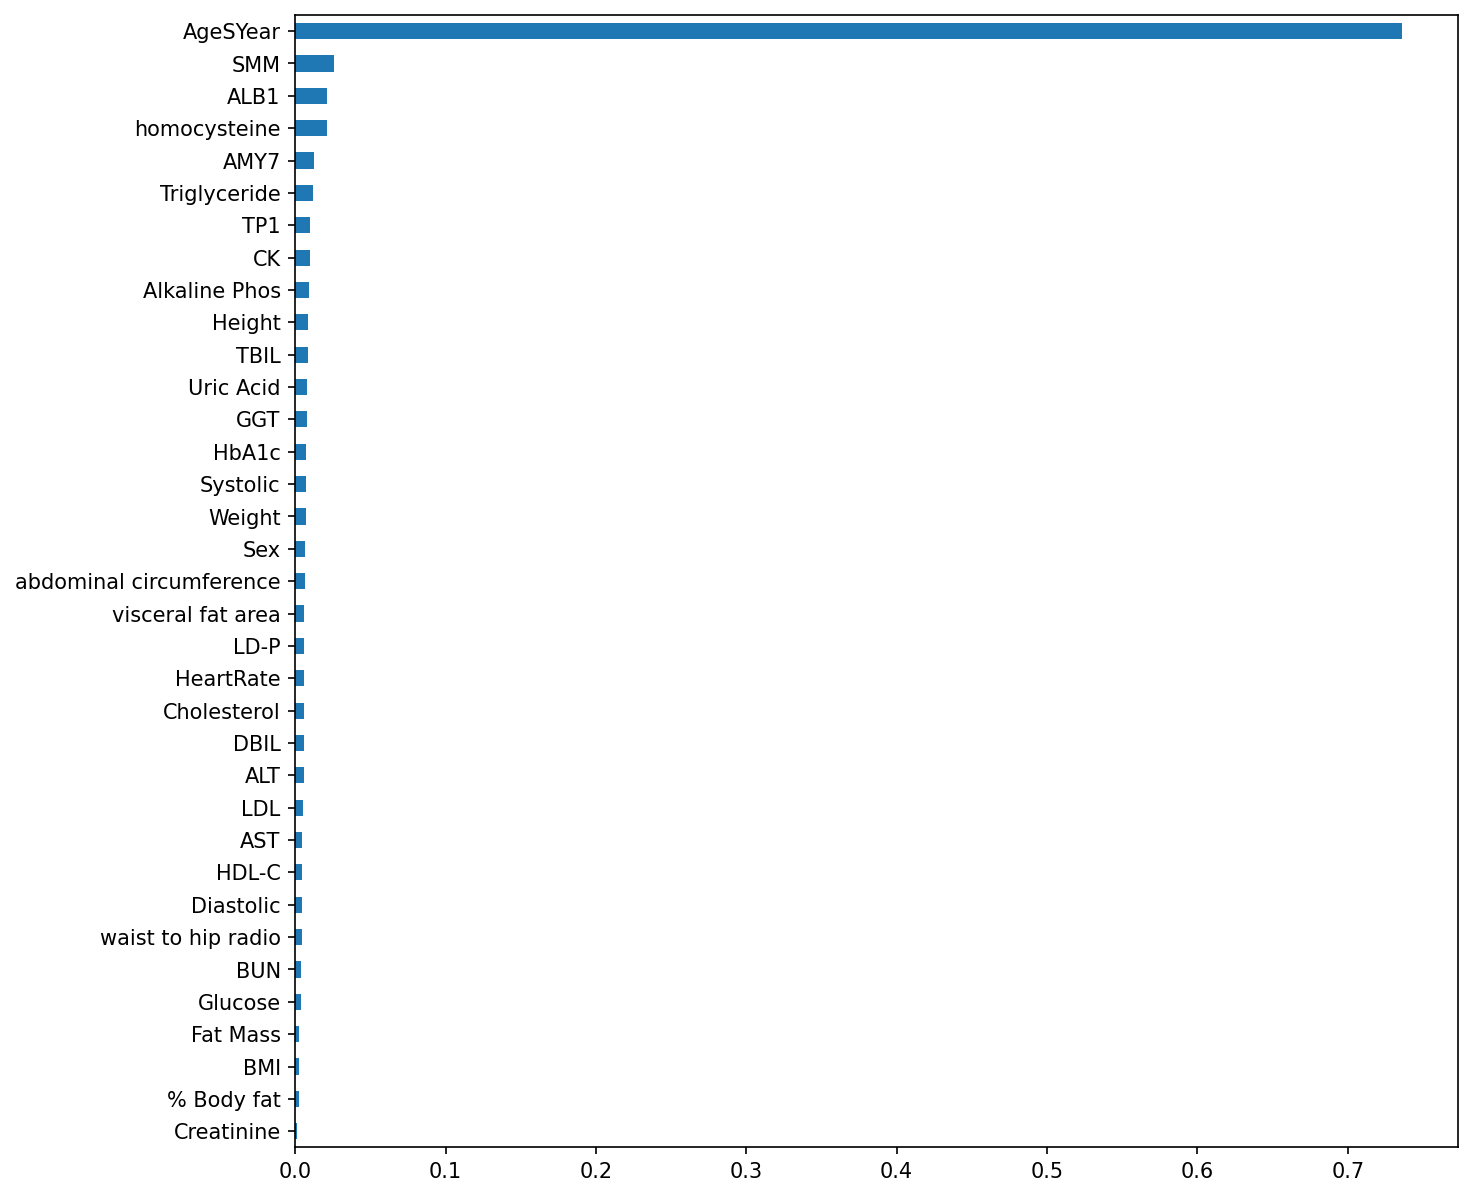

In [191]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A7

In [192]:
X=A7[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A7['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [193]:
Forest.feature_importances_

array([0.00098896, 0.74264625, 0.0035805 , 0.00980207, 0.00405035,
       0.00955039, 0.00178596, 0.0052519 , 0.00362874, 0.00313811,
       0.00738364, 0.00502517, 0.00478814, 0.00506441, 0.00428842,
       0.01723733, 0.00469345, 0.00280853, 0.01813335, 0.01332222,
       0.02413777, 0.00849078, 0.00323553, 0.02834393, 0.00420524,
       0.00433739, 0.00496981, 0.00323264, 0.0055248 , 0.00719298,
       0.00336212, 0.00316579, 0.00834957, 0.01907858, 0.00520519])

In [194]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.000989
Fat Mass                   0.001786
LDL                        0.002809
waist to hip radio         0.003138
Creatinine                 0.003166
Glucose                    0.003233
DBIL                       0.003236
BUN                        0.003362
Weight                     0.003580
abdominal circumference    0.003629
BMI                        0.004050
ALT                        0.004205
Cholesterol                0.004288
AST                        0.004337
HDL-C                      0.004693
HeartRate                  0.004788
GGT                        0.004970
Diastolic                  0.005025
visceral fat area          0.005064
CK                         0.005205
% Body fat                 0.005252
HbA1c                      0.005525
AMY7                       0.007193
Systolic                   0.007384
LD-P                       0.008350
TBIL                       0.008491
SMM                        0.009550
Height                     0

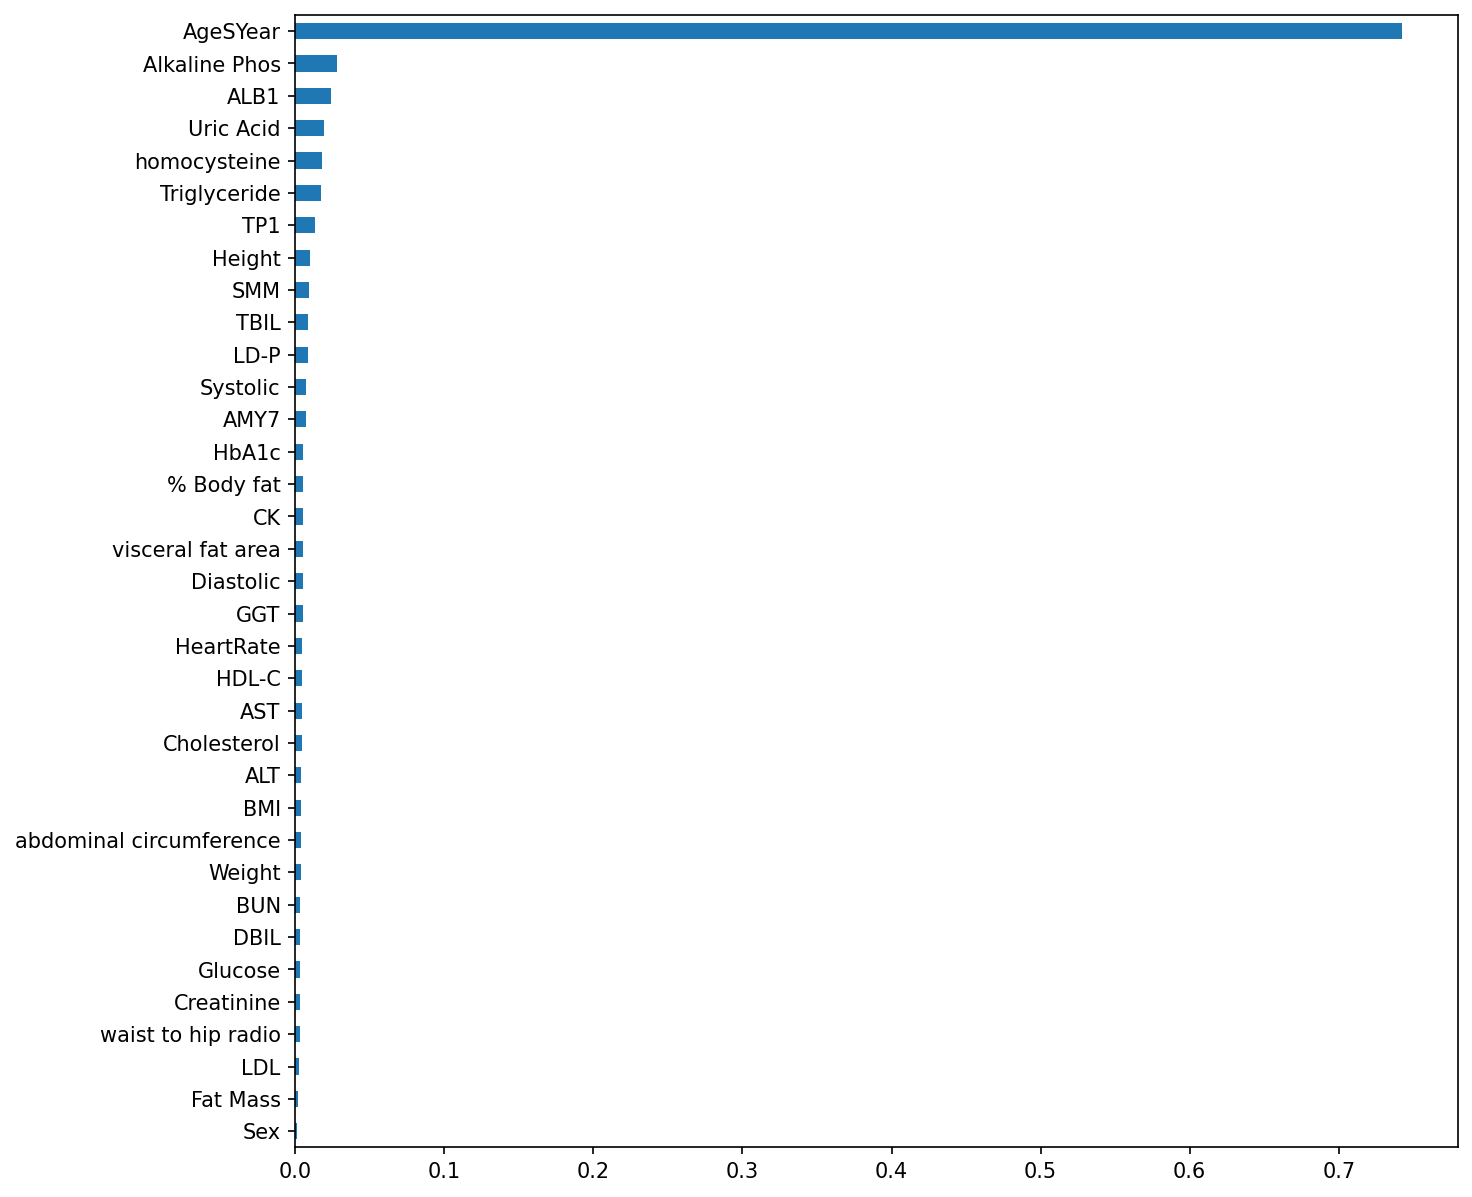

In [195]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A8

In [196]:
X=A8[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A8['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [197]:
Forest.feature_importances_

array([0.00306722, 0.71308804, 0.00519516, 0.01067912, 0.00258957,
       0.01211552, 0.00227011, 0.00610118, 0.00911607, 0.00244266,
       0.01627744, 0.00542461, 0.00590492, 0.00708615, 0.00665865,
       0.01686823, 0.00606801, 0.00637091, 0.03886206, 0.00730582,
       0.00993969, 0.00815872, 0.00735086, 0.02122898, 0.00568413,
       0.0046243 , 0.0050074 , 0.00239049, 0.00470695, 0.00956431,
       0.0096542 , 0.00317811, 0.00815589, 0.00972249, 0.00714203])

In [198]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Fat Mass                   0.002270
Glucose                    0.002390
waist to hip radio         0.002443
BMI                        0.002590
Sex                        0.003067
Creatinine                 0.003178
AST                        0.004624
HbA1c                      0.004707
GGT                        0.005007
Weight                     0.005195
Diastolic                  0.005425
ALT                        0.005684
HeartRate                  0.005905
HDL-C                      0.006068
% Body fat                 0.006101
LDL                        0.006371
Cholesterol                0.006659
visceral fat area          0.007086
CK                         0.007142
TP1                        0.007306
DBIL                       0.007351
LD-P                       0.008156
TBIL                       0.008159
abdominal circumference    0.009116
AMY7                       0.009564
BUN                        0.009654
Uric Acid                  0.009722
ALB1                       0

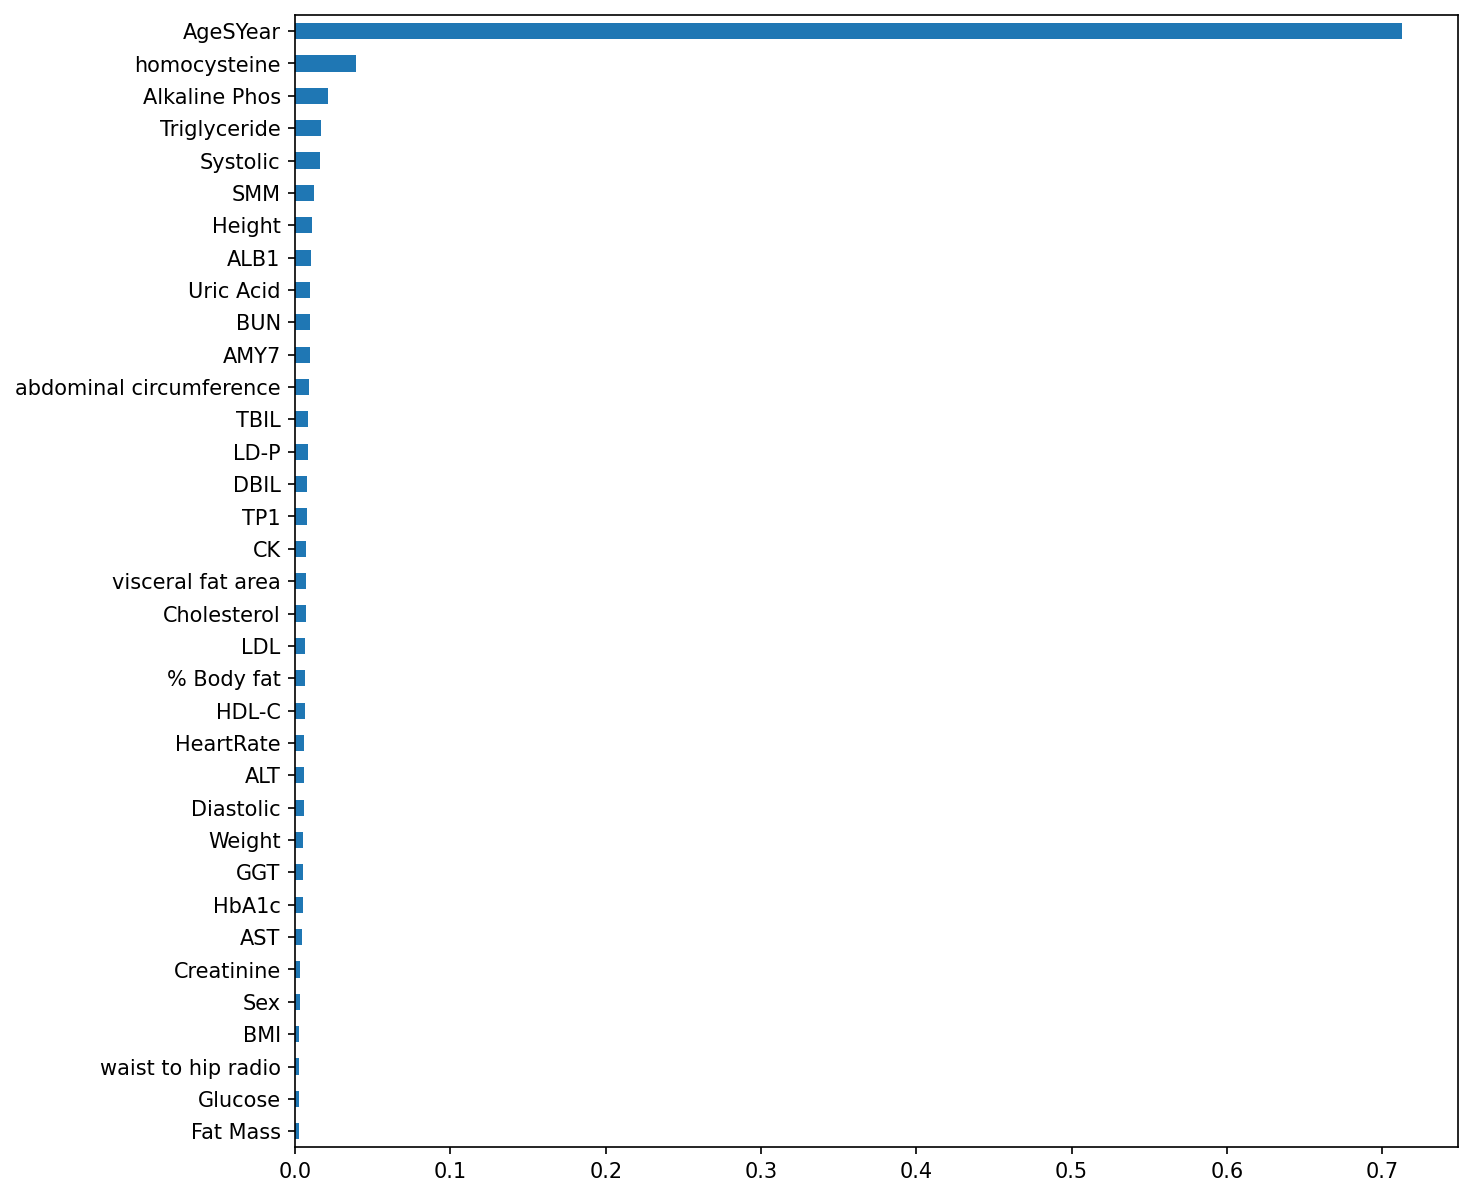

In [199]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A9

In [200]:
X=A9[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A9['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [201]:
Forest.feature_importances_

array([0.00344284, 0.72070532, 0.00657454, 0.00890428, 0.00311168,
       0.01153701, 0.00386018, 0.00732893, 0.0093057 , 0.00375026,
       0.00892478, 0.00819983, 0.00485077, 0.00369792, 0.00716044,
       0.01275669, 0.00558455, 0.00667385, 0.0271452 , 0.01017207,
       0.01670002, 0.0080741 , 0.00636622, 0.02266382, 0.00508492,
       0.00753395, 0.0037445 , 0.0039254 , 0.00533296, 0.00772332,
       0.00627191, 0.00168066, 0.00886869, 0.01545985, 0.00688284])

In [202]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Creatinine                 0.001681
BMI                        0.003112
Sex                        0.003443
visceral fat area          0.003698
GGT                        0.003744
waist to hip radio         0.003750
Fat Mass                   0.003860
Glucose                    0.003925
HeartRate                  0.004851
ALT                        0.005085
HbA1c                      0.005333
HDL-C                      0.005585
BUN                        0.006272
DBIL                       0.006366
Weight                     0.006575
LDL                        0.006674
CK                         0.006883
Cholesterol                0.007160
% Body fat                 0.007329
AST                        0.007534
AMY7                       0.007723
TBIL                       0.008074
Diastolic                  0.008200
LD-P                       0.008869
Height                     0.008904
Systolic                   0.008925
abdominal circumference    0.009306
TP1                        0

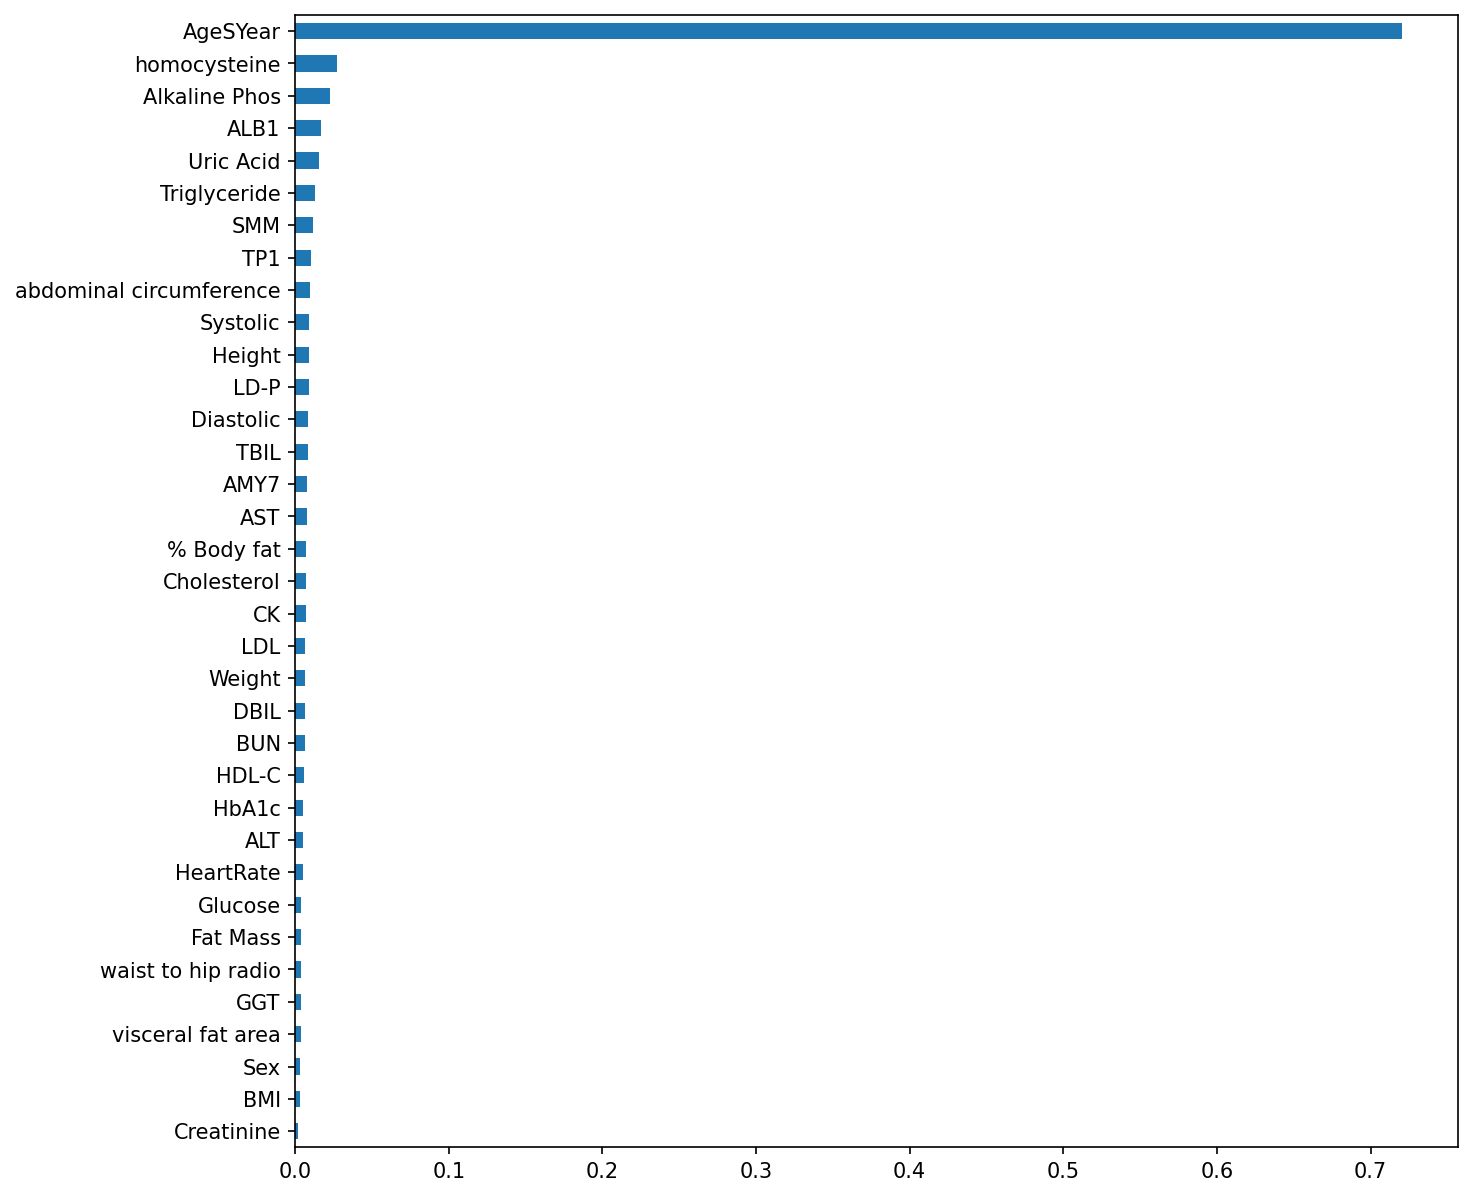

In [203]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A10

In [204]:
X=A10[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A10['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [205]:
Forest.feature_importances_

array([0.00166219, 0.72755841, 0.0028643 , 0.01139213, 0.0038683 ,
       0.0096349 , 0.00192058, 0.00401568, 0.00592508, 0.00290365,
       0.00796432, 0.00470842, 0.00434299, 0.01100822, 0.00353015,
       0.01300189, 0.00552999, 0.00538073, 0.0186727 , 0.01660941,
       0.02384077, 0.00563994, 0.00524092, 0.03316413, 0.00220691,
       0.00511408, 0.00264729, 0.00238368, 0.00437454, 0.00857451,
       0.00596966, 0.00395146, 0.01496724, 0.01153155, 0.0078993 ])

In [206]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.001662
Fat Mass                   0.001921
ALT                        0.002207
Glucose                    0.002384
GGT                        0.002647
Weight                     0.002864
waist to hip radio         0.002904
Cholesterol                0.003530
BMI                        0.003868
Creatinine                 0.003951
% Body fat                 0.004016
HeartRate                  0.004343
HbA1c                      0.004375
Diastolic                  0.004708
AST                        0.005114
DBIL                       0.005241
LDL                        0.005381
HDL-C                      0.005530
TBIL                       0.005640
abdominal circumference    0.005925
BUN                        0.005970
CK                         0.007899
Systolic                   0.007964
AMY7                       0.008575
SMM                        0.009635
visceral fat area          0.011008
Height                     0.011392
Uric Acid                  0

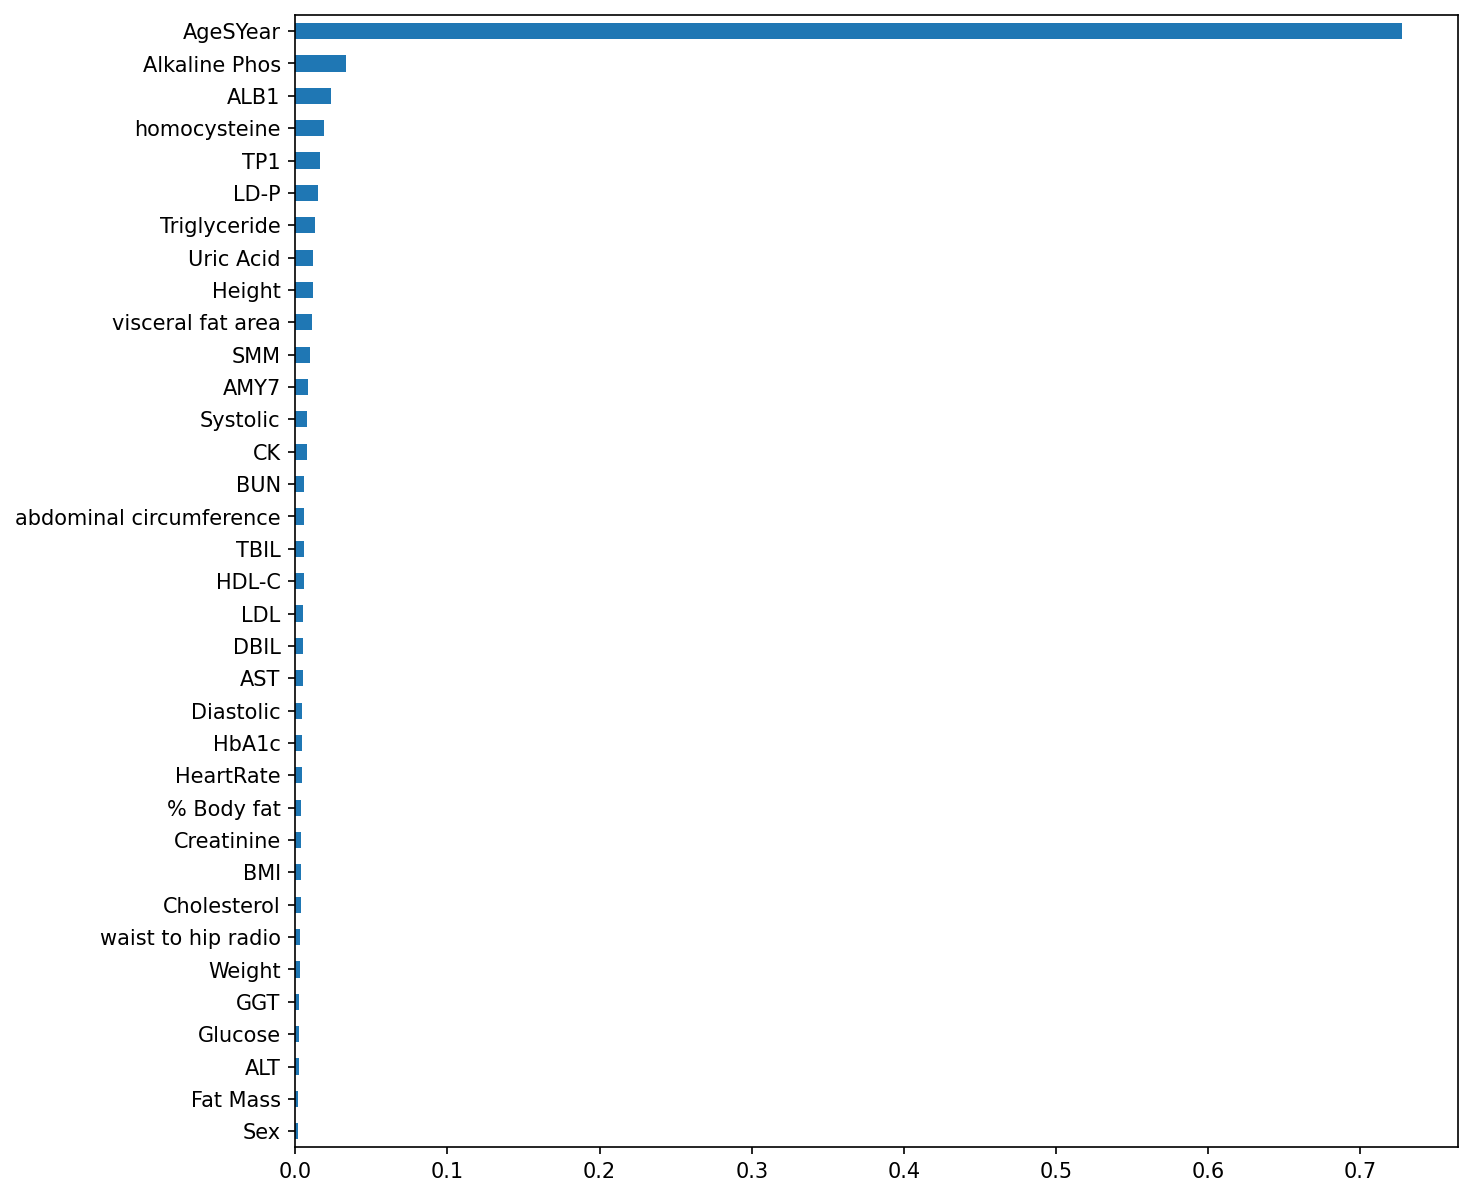

In [207]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A11

In [208]:
X=A11[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A11['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [209]:
Forest.feature_importances_

array([0.00230477, 0.74983187, 0.00533256, 0.00664813, 0.00195397,
       0.01681989, 0.00174285, 0.00411777, 0.00593357, 0.00207272,
       0.00833958, 0.00582068, 0.00465734, 0.00413781, 0.00559596,
       0.01879618, 0.00513938, 0.00370731, 0.02075252, 0.01186889,
       0.01289998, 0.00416119, 0.00418311, 0.01816035, 0.00552153,
       0.00566007, 0.00421376, 0.00269841, 0.00633415, 0.00701976,
       0.00516288, 0.00203596, 0.00996974, 0.01777677, 0.00862861])

In [210]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Fat Mass                   0.001743
BMI                        0.001954
Creatinine                 0.002036
waist to hip radio         0.002073
Sex                        0.002305
Glucose                    0.002698
LDL                        0.003707
% Body fat                 0.004118
visceral fat area          0.004138
TBIL                       0.004161
DBIL                       0.004183
GGT                        0.004214
HeartRate                  0.004657
HDL-C                      0.005139
BUN                        0.005163
Weight                     0.005333
ALT                        0.005522
Cholesterol                0.005596
AST                        0.005660
Diastolic                  0.005821
abdominal circumference    0.005934
HbA1c                      0.006334
Height                     0.006648
AMY7                       0.007020
Systolic                   0.008340
CK                         0.008629
LD-P                       0.009970
TP1                        0

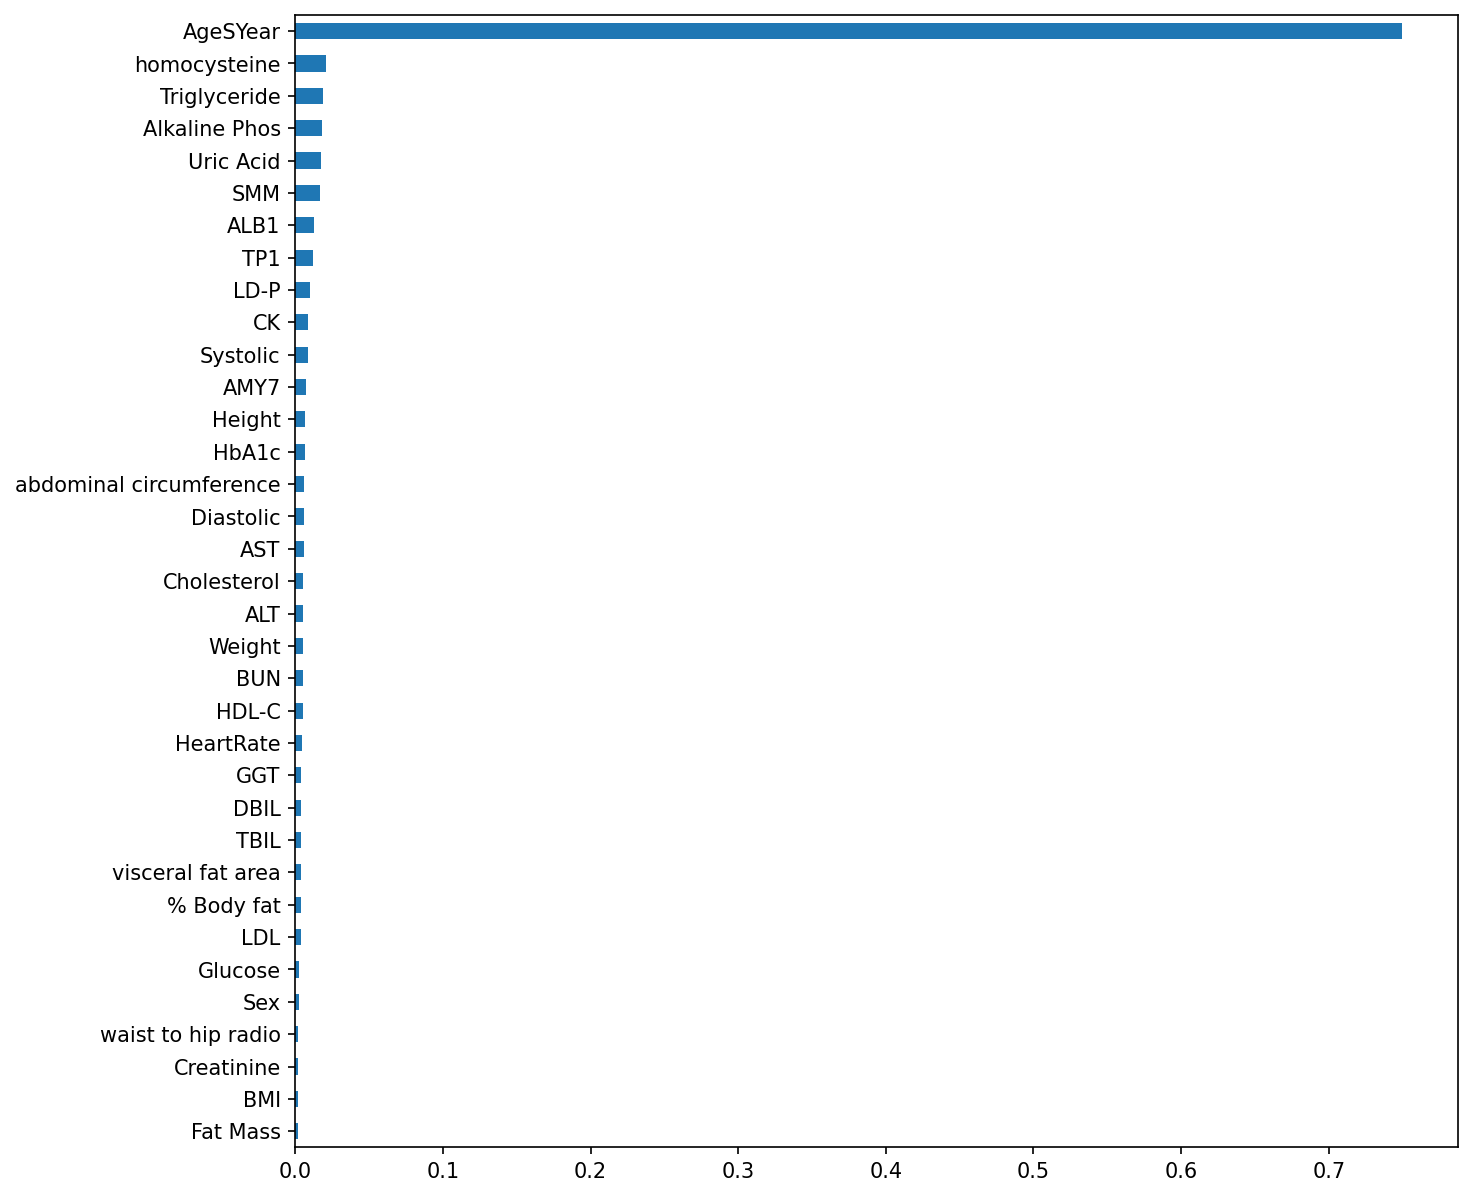

In [211]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A12

In [212]:
X=A12[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A12['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [213]:
Forest.feature_importances_

array([0.00092291, 0.73275973, 0.00679603, 0.00457873, 0.002636  ,
       0.01055846, 0.00430014, 0.00625533, 0.00573132, 0.00457933,
       0.00758221, 0.00328729, 0.00483219, 0.00622943, 0.00955914,
       0.01450631, 0.00692339, 0.00648884, 0.02285658, 0.01020918,
       0.02660275, 0.00831517, 0.00539338, 0.0202016 , 0.00590162,
       0.00538852, 0.00506386, 0.0037093 , 0.00506438, 0.00436101,
       0.00673235, 0.00364807, 0.01039941, 0.01055623, 0.00706983])

In [214]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.000923
BMI                        0.002636
Diastolic                  0.003287
Creatinine                 0.003648
Glucose                    0.003709
Fat Mass                   0.004300
AMY7                       0.004361
Height                     0.004579
waist to hip radio         0.004579
HeartRate                  0.004832
GGT                        0.005064
HbA1c                      0.005064
AST                        0.005389
DBIL                       0.005393
abdominal circumference    0.005731
ALT                        0.005902
visceral fat area          0.006229
% Body fat                 0.006255
LDL                        0.006489
BUN                        0.006732
Weight                     0.006796
HDL-C                      0.006923
CK                         0.007070
Systolic                   0.007582
TBIL                       0.008315
Cholesterol                0.009559
TP1                        0.010209
LD-P                       0

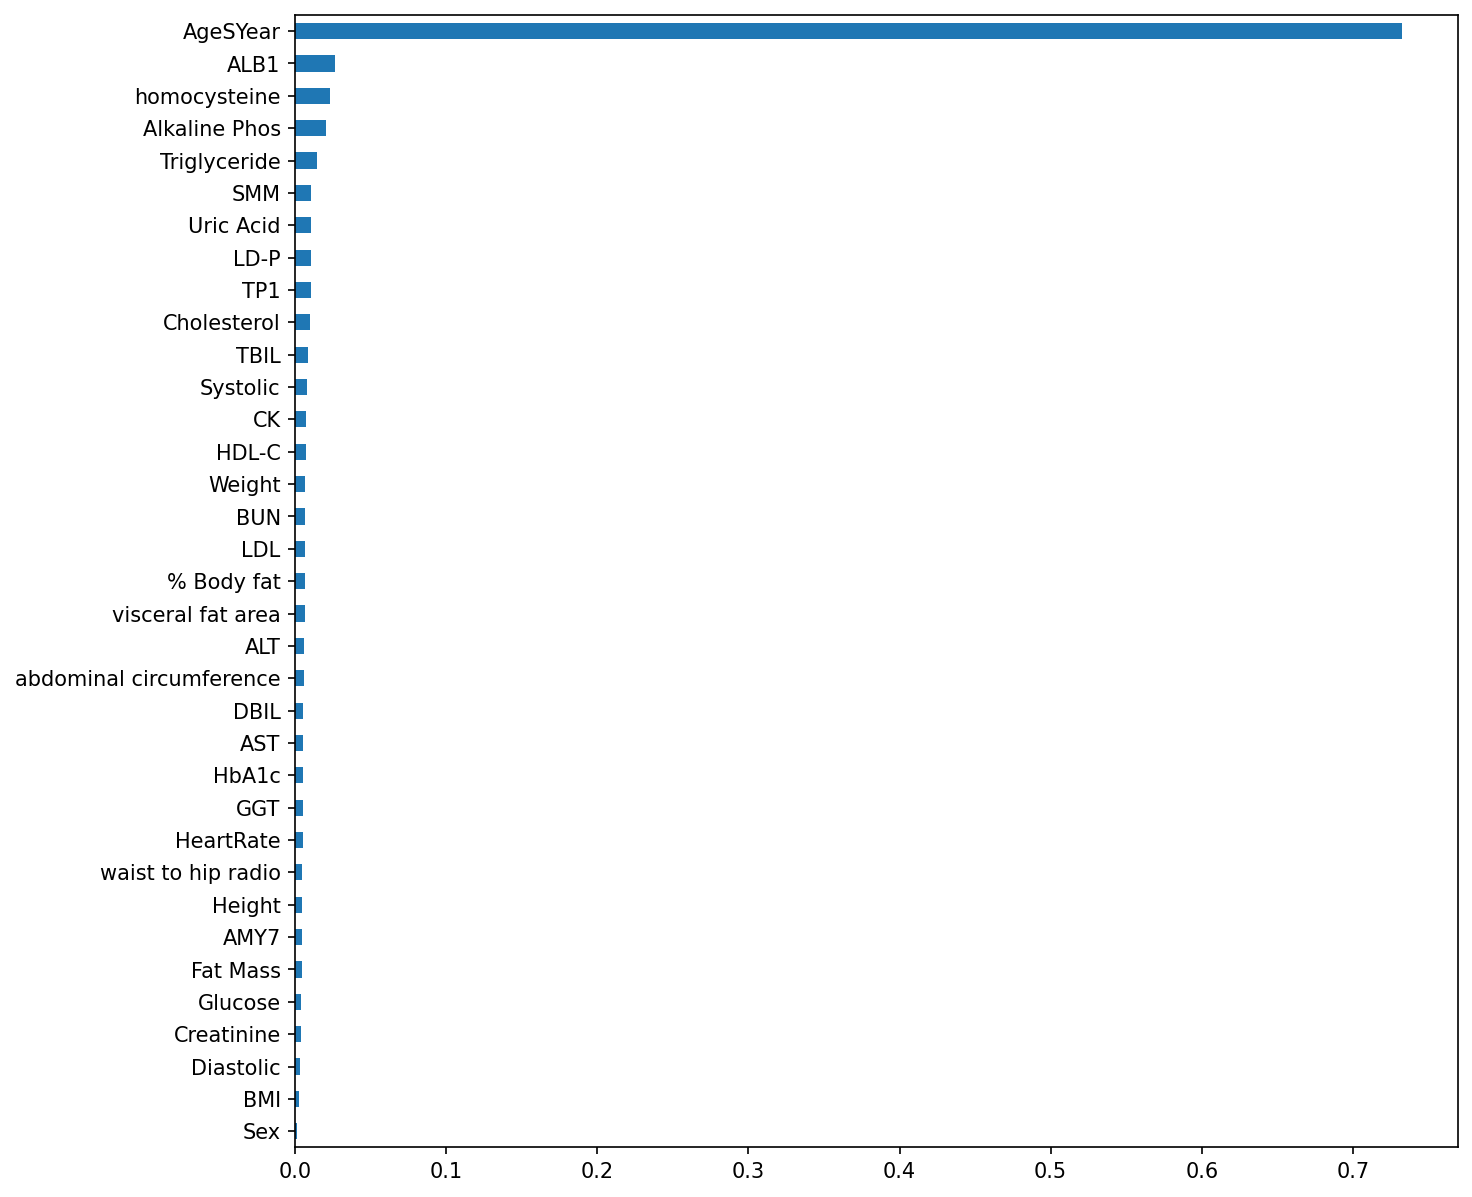

In [215]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A13

In [216]:
X=A13[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A13['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [217]:
Forest.feature_importances_

array([0.00077342, 0.72823956, 0.00233775, 0.00883742, 0.00429294,
       0.00971076, 0.00324149, 0.00935373, 0.00345521, 0.00444298,
       0.00708747, 0.00329798, 0.00658766, 0.00373642, 0.00322773,
       0.02140726, 0.0041631 , 0.00295111, 0.03886411, 0.00815585,
       0.01944409, 0.00483586, 0.00630357, 0.0292094 , 0.00310918,
       0.00533726, 0.00496557, 0.00250983, 0.00479589, 0.00607211,
       0.00535431, 0.0017983 , 0.01137341, 0.01524506, 0.00548221])

In [218]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.000773
Creatinine                 0.001798
Weight                     0.002338
Glucose                    0.002510
LDL                        0.002951
ALT                        0.003109
Cholesterol                0.003228
Fat Mass                   0.003241
Diastolic                  0.003298
abdominal circumference    0.003455
visceral fat area          0.003736
HDL-C                      0.004163
BMI                        0.004293
waist to hip radio         0.004443
HbA1c                      0.004796
TBIL                       0.004836
GGT                        0.004966
AST                        0.005337
BUN                        0.005354
CK                         0.005482
AMY7                       0.006072
DBIL                       0.006304
HeartRate                  0.006588
Systolic                   0.007087
TP1                        0.008156
Height                     0.008837
% Body fat                 0.009354
SMM                        0

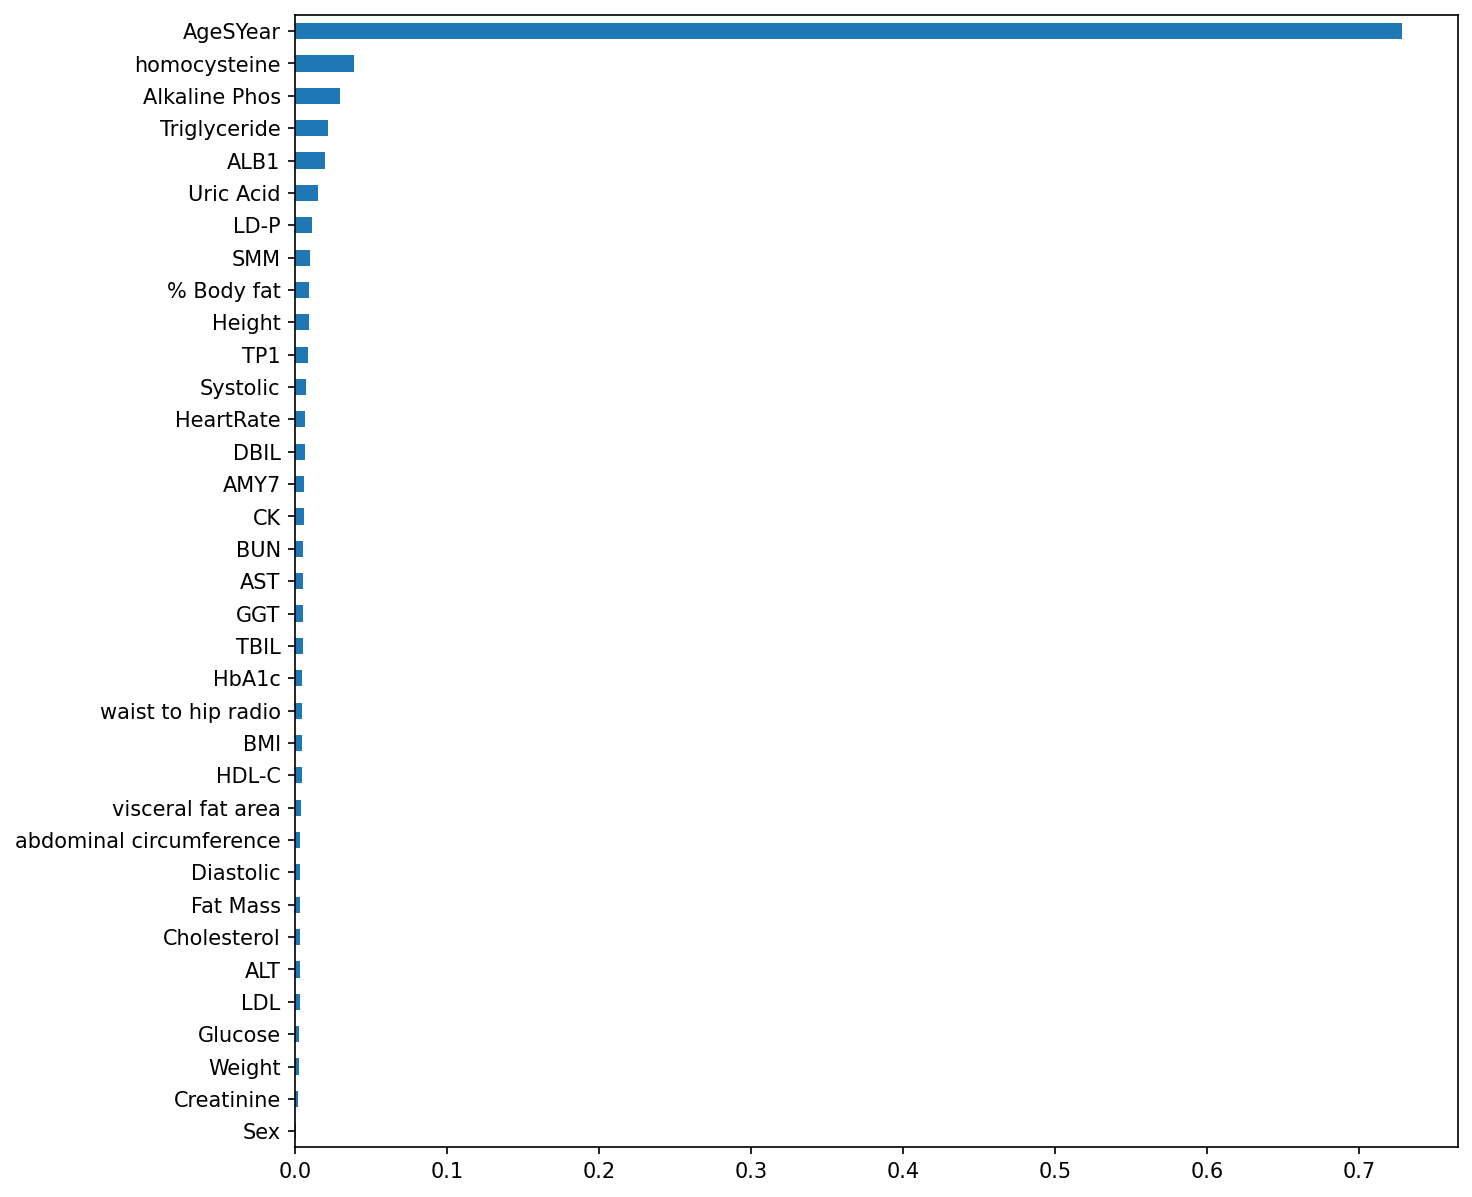

In [219]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A14

In [220]:
X=A14[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A14['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [221]:
Forest.feature_importances_

array([0.00281667, 0.72805649, 0.00488672, 0.00921691, 0.003381  ,
       0.01436675, 0.00758258, 0.00429269, 0.00452763, 0.00114043,
       0.01013762, 0.00556499, 0.00682921, 0.00327065, 0.00531582,
       0.01402596, 0.00704706, 0.0040326 , 0.03335918, 0.00735301,
       0.0134247 , 0.00459866, 0.00365025, 0.02257847, 0.00553293,
       0.00771464, 0.0051982 , 0.00189492, 0.00763126, 0.00416906,
       0.00626072, 0.00228566, 0.01147943, 0.01904322, 0.00733389])

In [222]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

waist to hip radio         0.001140
Glucose                    0.001895
Creatinine                 0.002286
Sex                        0.002817
visceral fat area          0.003271
BMI                        0.003381
DBIL                       0.003650
LDL                        0.004033
AMY7                       0.004169
% Body fat                 0.004293
abdominal circumference    0.004528
TBIL                       0.004599
Weight                     0.004887
GGT                        0.005198
Cholesterol                0.005316
ALT                        0.005533
Diastolic                  0.005565
BUN                        0.006261
HeartRate                  0.006829
HDL-C                      0.007047
CK                         0.007334
TP1                        0.007353
Fat Mass                   0.007583
HbA1c                      0.007631
AST                        0.007715
Height                     0.009217
Systolic                   0.010138
LD-P                       0

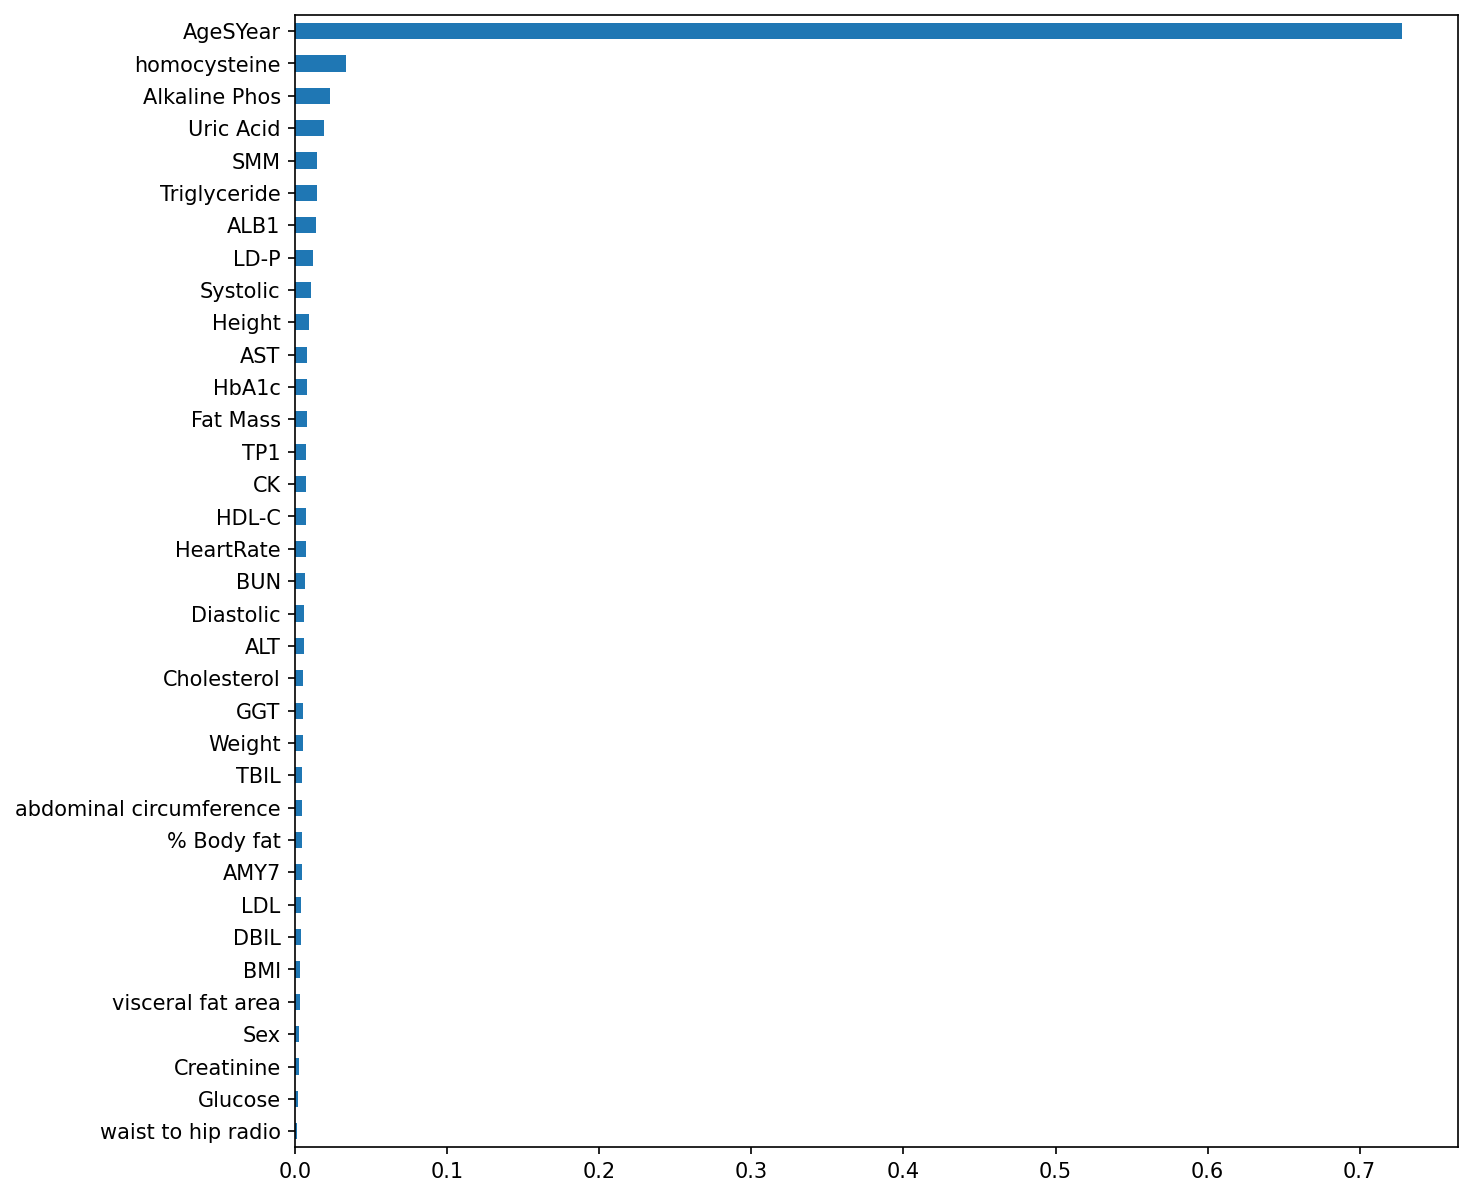

In [223]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A15

In [224]:
X=A15[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A15['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [225]:
Forest.feature_importances_

array([0.00255206, 0.72173802, 0.00604574, 0.0089897 , 0.00254236,
       0.01465468, 0.00354158, 0.00528083, 0.00617677, 0.00143335,
       0.0134292 , 0.00701514, 0.00919468, 0.0030162 , 0.00946932,
       0.01110733, 0.00814841, 0.00409587, 0.02155604, 0.01210219,
       0.0157698 , 0.00805961, 0.00561882, 0.01786195, 0.00578113,
       0.0056797 , 0.00581598, 0.00391586, 0.00493766, 0.01184152,
       0.00550837, 0.00416181, 0.01010656, 0.01333361, 0.00951815])

In [226]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

waist to hip radio         0.001433
BMI                        0.002542
Sex                        0.002552
visceral fat area          0.003016
Fat Mass                   0.003542
Glucose                    0.003916
LDL                        0.004096
Creatinine                 0.004162
HbA1c                      0.004938
% Body fat                 0.005281
BUN                        0.005508
DBIL                       0.005619
AST                        0.005680
ALT                        0.005781
GGT                        0.005816
Weight                     0.006046
abdominal circumference    0.006177
Diastolic                  0.007015
TBIL                       0.008060
HDL-C                      0.008148
Height                     0.008990
HeartRate                  0.009195
Cholesterol                0.009469
CK                         0.009518
LD-P                       0.010107
Triglyceride               0.011107
AMY7                       0.011842
TP1                        0

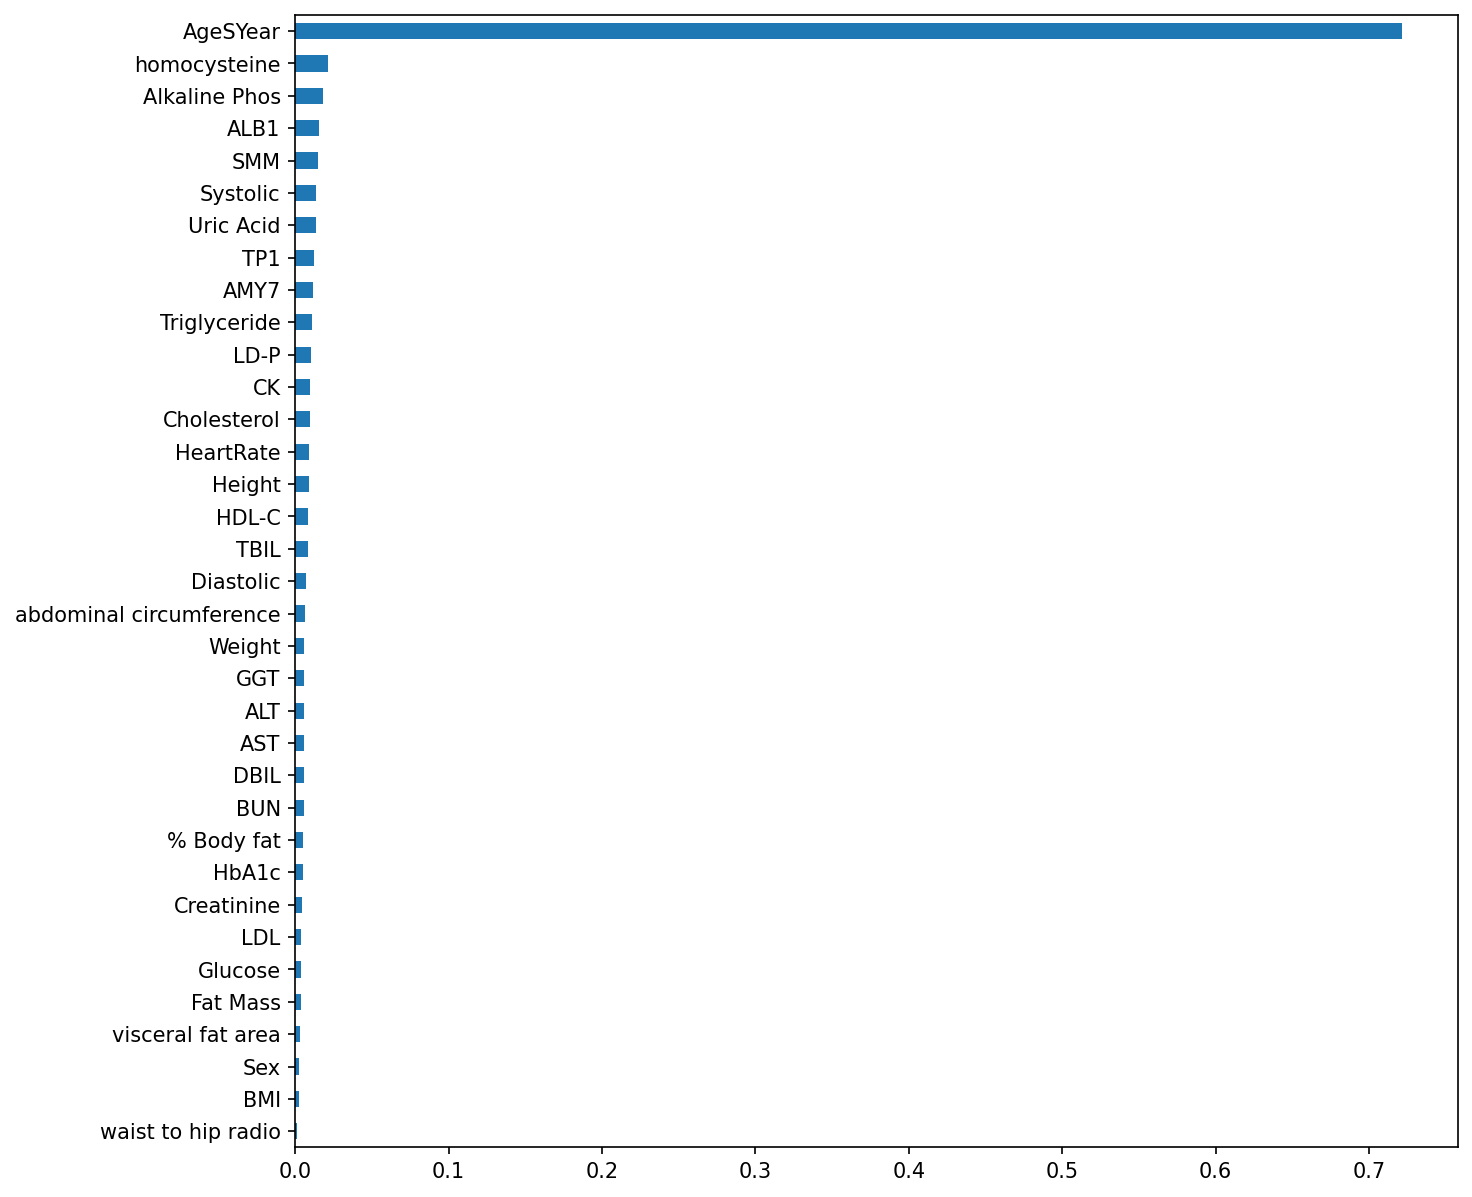

In [227]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A16

In [228]:
X=A16[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A16['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [229]:
Forest.feature_importances_

array([0.00172254, 0.75876337, 0.00761072, 0.00695513, 0.00296501,
       0.01224501, 0.0021841 , 0.00296838, 0.00458225, 0.00661047,
       0.00608098, 0.00272164, 0.00282061, 0.00783495, 0.00843873,
       0.01322712, 0.00534512, 0.00653233, 0.01535047, 0.00437502,
       0.01576916, 0.00504814, 0.01016946, 0.02801818, 0.00428719,
       0.00655415, 0.00277886, 0.00241748, 0.00513593, 0.00692674,
       0.00609614, 0.00190827, 0.00765233, 0.01251655, 0.00538749])

In [230]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.001723
Creatinine                 0.001908
Fat Mass                   0.002184
Glucose                    0.002417
Diastolic                  0.002722
GGT                        0.002779
HeartRate                  0.002821
BMI                        0.002965
% Body fat                 0.002968
ALT                        0.004287
TP1                        0.004375
abdominal circumference    0.004582
TBIL                       0.005048
HbA1c                      0.005136
HDL-C                      0.005345
CK                         0.005387
Systolic                   0.006081
BUN                        0.006096
LDL                        0.006532
AST                        0.006554
waist to hip radio         0.006610
AMY7                       0.006927
Height                     0.006955
Weight                     0.007611
LD-P                       0.007652
visceral fat area          0.007835
Cholesterol                0.008439
DBIL                       0

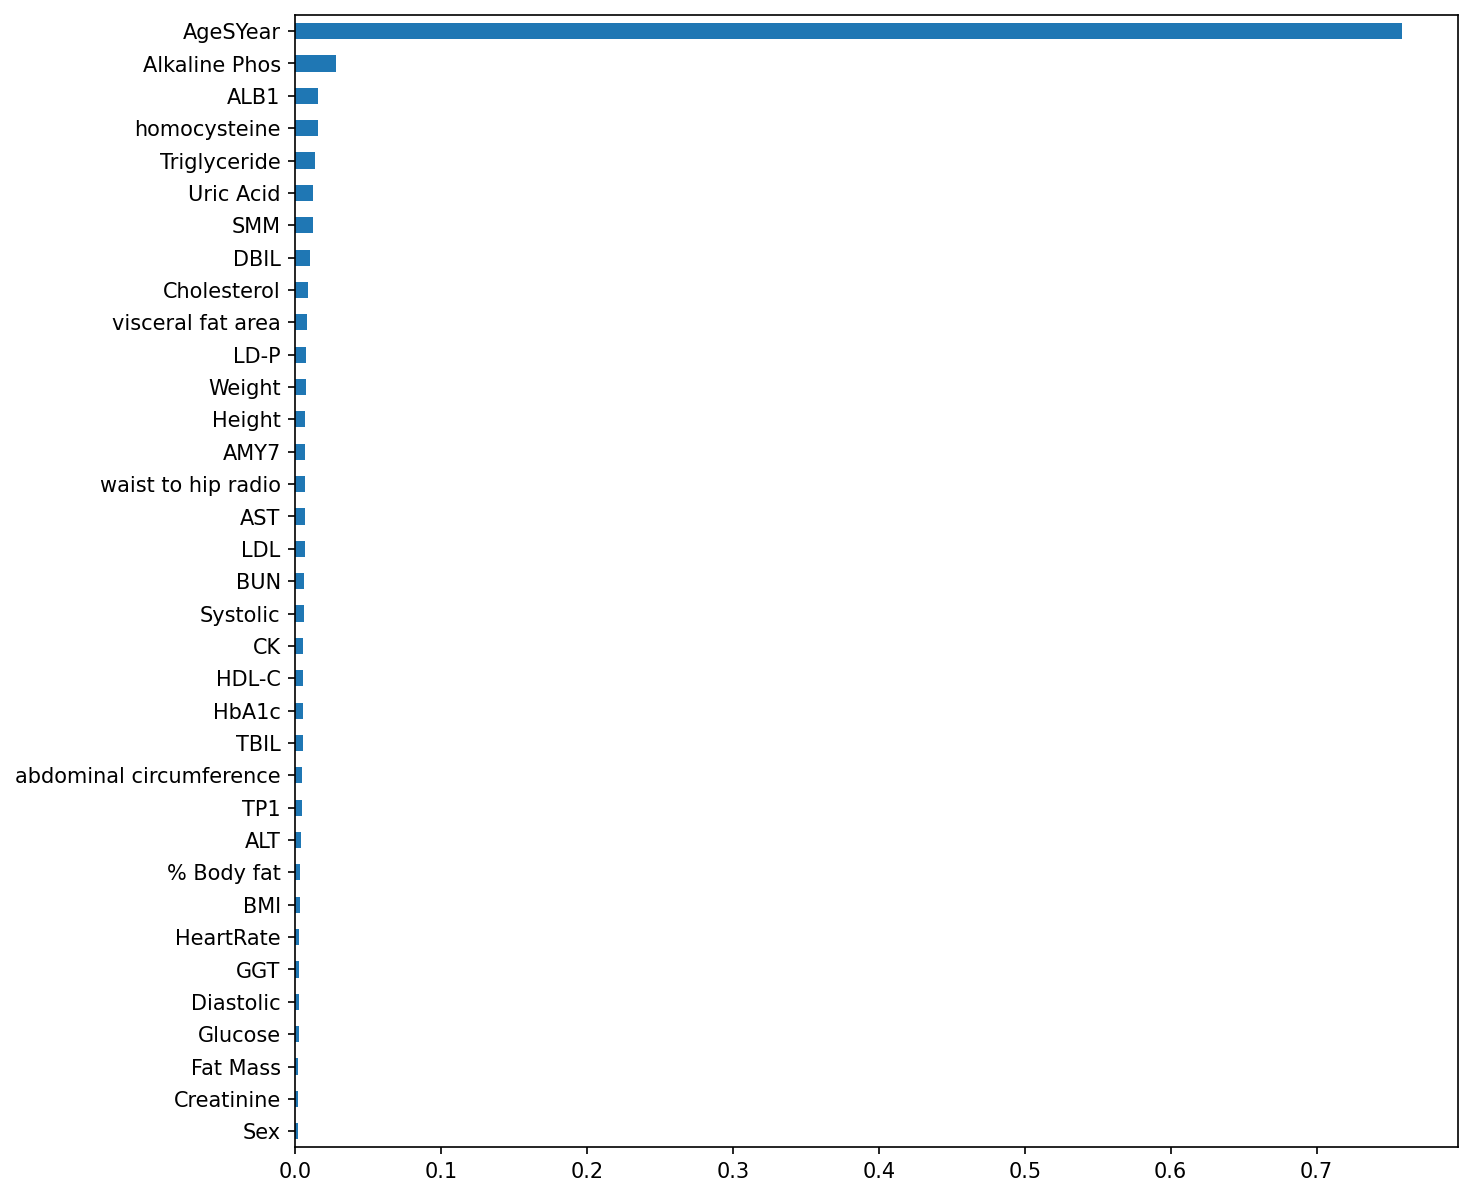

In [231]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A17

In [232]:
X=A17[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A17['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [233]:
Forest.feature_importances_

array([0.00429709, 0.714408  , 0.01041632, 0.01177835, 0.00300826,
       0.01059521, 0.00277406, 0.00701834, 0.00441657, 0.00339772,
       0.01571031, 0.00614337, 0.00407481, 0.00484458, 0.00625083,
       0.02450989, 0.00400216, 0.00568376, 0.02177225, 0.01131984,
       0.02135993, 0.01039656, 0.00415442, 0.0206225 , 0.00489013,
       0.00511608, 0.00557329, 0.00210188, 0.00482491, 0.01251466,
       0.00271098, 0.00315132, 0.00588272, 0.01395374, 0.00632516])

In [234]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Glucose                    0.002102
BUN                        0.002711
Fat Mass                   0.002774
BMI                        0.003008
Creatinine                 0.003151
waist to hip radio         0.003398
HDL-C                      0.004002
HeartRate                  0.004075
DBIL                       0.004154
Sex                        0.004297
abdominal circumference    0.004417
HbA1c                      0.004825
visceral fat area          0.004845
ALT                        0.004890
AST                        0.005116
GGT                        0.005573
LDL                        0.005684
LD-P                       0.005883
Diastolic                  0.006143
Cholesterol                0.006251
CK                         0.006325
% Body fat                 0.007018
TBIL                       0.010397
Weight                     0.010416
SMM                        0.010595
TP1                        0.011320
Height                     0.011778
AMY7                       0

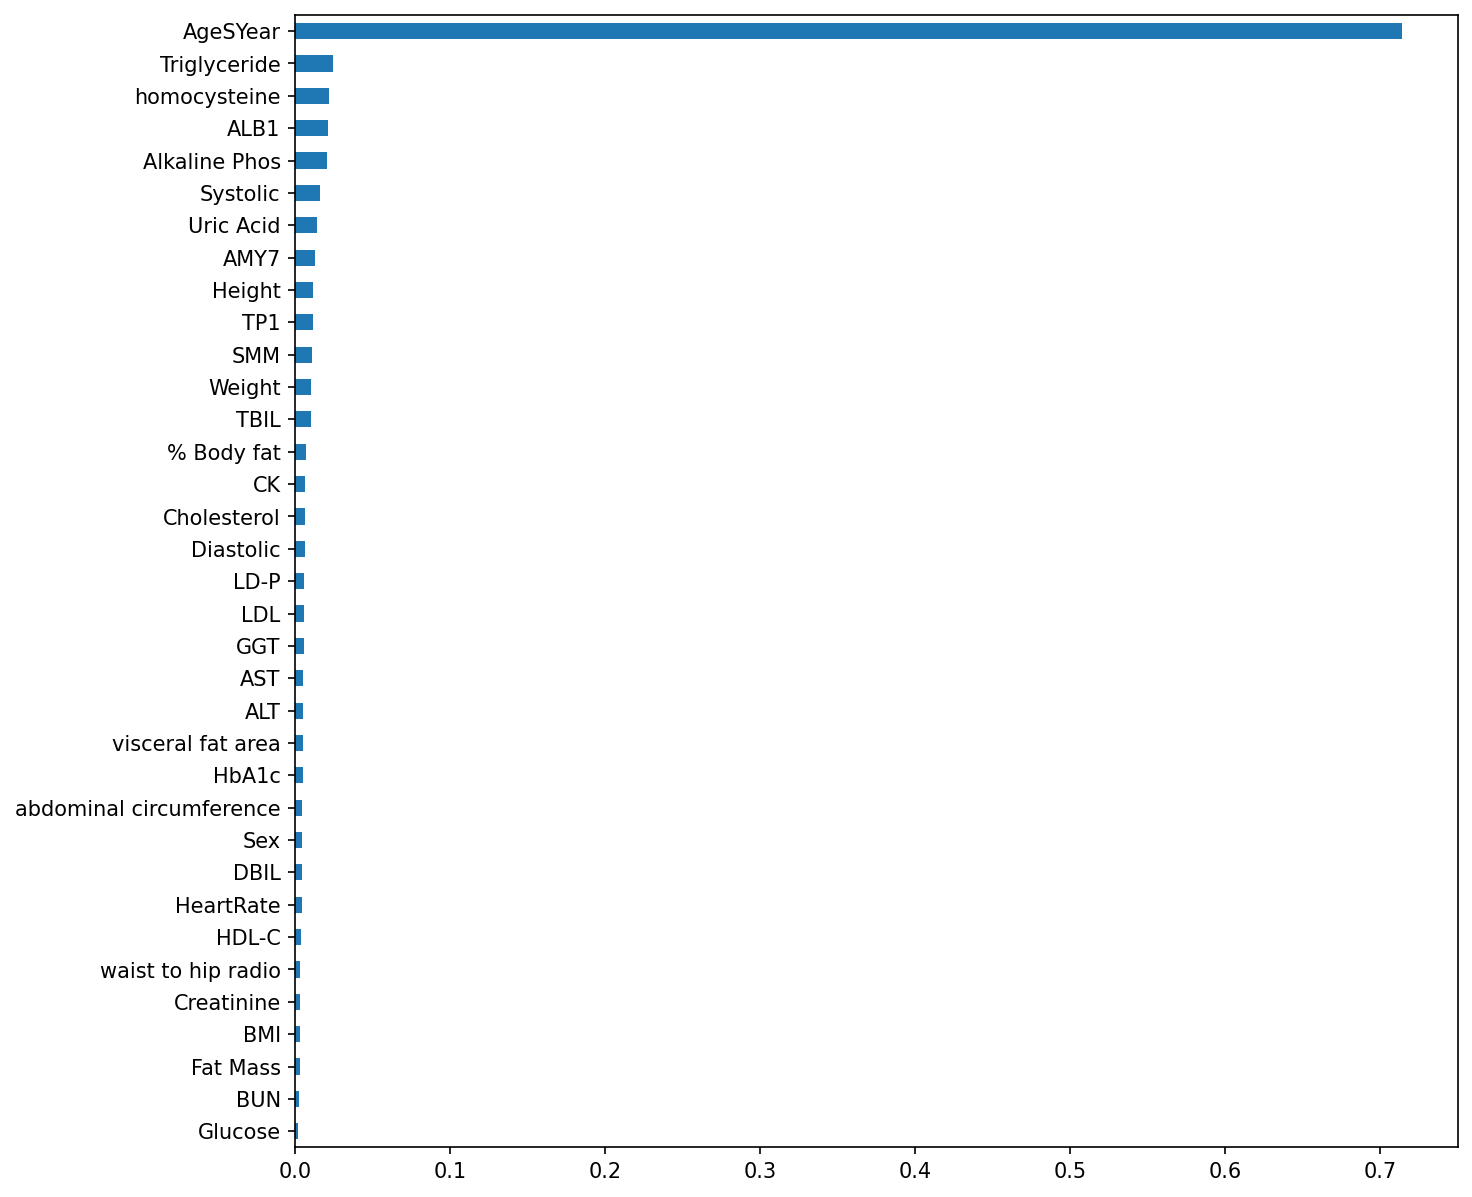

In [235]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A18

In [236]:
X=A18[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A18['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [237]:
Forest.feature_importances_

array([5.48916724e-04, 7.35301592e-01, 3.55522685e-03, 7.78078116e-03,
       5.24560811e-03, 9.17118350e-03, 2.39397391e-03, 6.85249310e-03,
       2.08423987e-03, 1.82495495e-03, 7.63904384e-03, 3.55548199e-03,
       4.10349891e-03, 3.63750240e-03, 3.99515125e-03, 2.11743315e-02,
       4.94558783e-03, 3.92831918e-03, 2.51036236e-02, 1.21910401e-02,
       2.31314408e-02, 9.56625479e-03, 4.81190392e-03, 1.35327541e-02,
       4.13885619e-03, 5.84773882e-03, 7.76510966e-03, 2.26910893e-03,
       1.30150437e-02, 4.09365149e-03, 2.99669803e-03, 2.14189698e-03,
       5.80726518e-03, 2.67515359e-02, 9.09819056e-03])

In [238]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.000549
waist to hip radio         0.001825
abdominal circumference    0.002084
Creatinine                 0.002142
Glucose                    0.002269
Fat Mass                   0.002394
BUN                        0.002997
Weight                     0.003555
Diastolic                  0.003555
visceral fat area          0.003638
LDL                        0.003928
Cholesterol                0.003995
AMY7                       0.004094
HeartRate                  0.004103
ALT                        0.004139
DBIL                       0.004812
HDL-C                      0.004946
BMI                        0.005246
LD-P                       0.005807
AST                        0.005848
% Body fat                 0.006852
Systolic                   0.007639
GGT                        0.007765
Height                     0.007781
CK                         0.009098
SMM                        0.009171
TBIL                       0.009566
TP1                        0

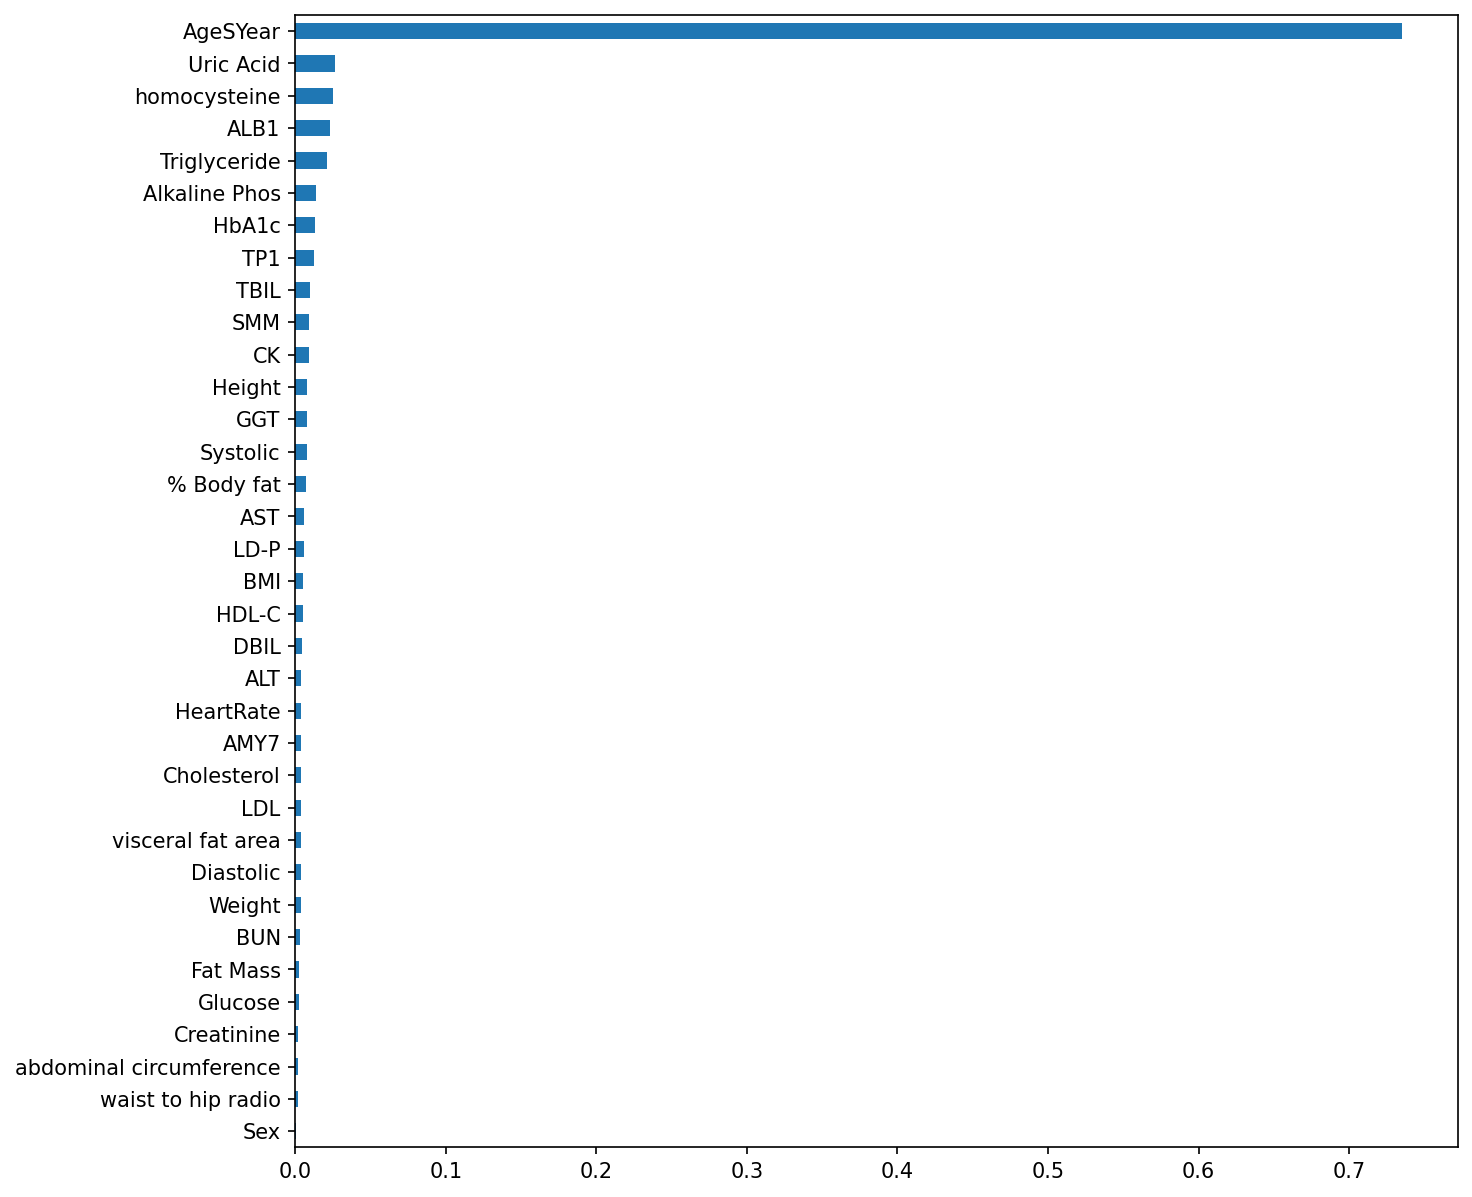

In [239]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A19

In [240]:
X=A19[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A19['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [241]:
Forest.feature_importances_

array([0.00278857, 0.7386917 , 0.00387164, 0.01015101, 0.00220852,
       0.01381288, 0.00237533, 0.00370744, 0.00551957, 0.0026776 ,
       0.00883677, 0.00728671, 0.00324284, 0.0059099 , 0.00436585,
       0.01713221, 0.00774449, 0.00439509, 0.03190987, 0.00734883,
       0.0217924 , 0.00629474, 0.0079502 , 0.01750338, 0.00261916,
       0.00636096, 0.00449769, 0.00234475, 0.00792976, 0.0077926 ,
       0.00609265, 0.00168624, 0.00662336, 0.01204048, 0.0044948 ])

In [242]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Creatinine                 0.001686
BMI                        0.002209
Glucose                    0.002345
Fat Mass                   0.002375
ALT                        0.002619
waist to hip radio         0.002678
Sex                        0.002789
HeartRate                  0.003243
% Body fat                 0.003707
Weight                     0.003872
Cholesterol                0.004366
LDL                        0.004395
CK                         0.004495
GGT                        0.004498
abdominal circumference    0.005520
visceral fat area          0.005910
BUN                        0.006093
TBIL                       0.006295
AST                        0.006361
LD-P                       0.006623
Diastolic                  0.007287
TP1                        0.007349
HDL-C                      0.007744
AMY7                       0.007793
HbA1c                      0.007930
DBIL                       0.007950
Systolic                   0.008837
Height                     0

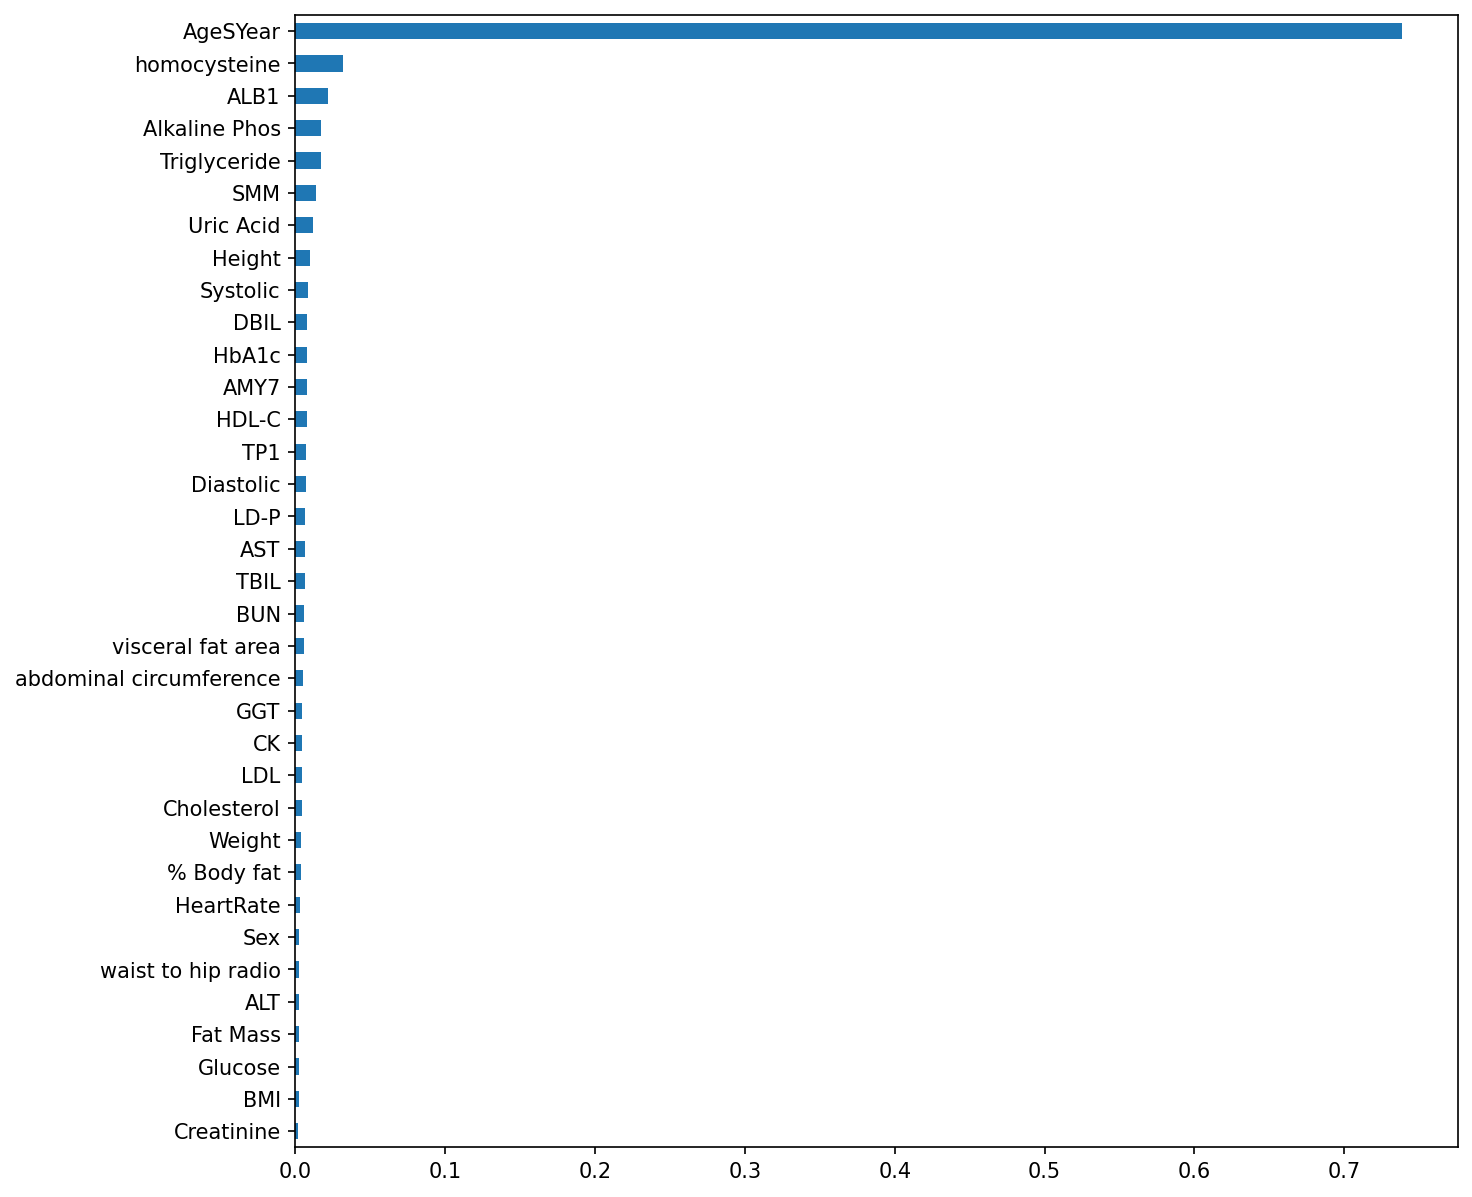

In [243]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A20

In [244]:
X=A20[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A20['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [245]:
Forest.feature_importances_

array([0.00201178, 0.75530815, 0.00399456, 0.01074638, 0.00256554,
       0.00995648, 0.00289152, 0.00289737, 0.00318579, 0.00194937,
       0.01058189, 0.00665096, 0.00496008, 0.00557195, 0.00555885,
       0.02142721, 0.00603744, 0.00347696, 0.01817269, 0.00754057,
       0.01896627, 0.00789624, 0.00360957, 0.01230766, 0.00456147,
       0.00574519, 0.00421302, 0.00360053, 0.00379028, 0.01386296,
       0.00595576, 0.00332187, 0.00893766, 0.01122132, 0.00652465])

In [246]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

waist to hip radio         0.001949
Sex                        0.002012
BMI                        0.002566
Fat Mass                   0.002892
% Body fat                 0.002897
abdominal circumference    0.003186
Creatinine                 0.003322
LDL                        0.003477
Glucose                    0.003601
DBIL                       0.003610
HbA1c                      0.003790
Weight                     0.003995
GGT                        0.004213
ALT                        0.004561
HeartRate                  0.004960
Cholesterol                0.005559
visceral fat area          0.005572
AST                        0.005745
BUN                        0.005956
HDL-C                      0.006037
CK                         0.006525
Diastolic                  0.006651
TP1                        0.007541
TBIL                       0.007896
LD-P                       0.008938
SMM                        0.009956
Systolic                   0.010582
Height                     0

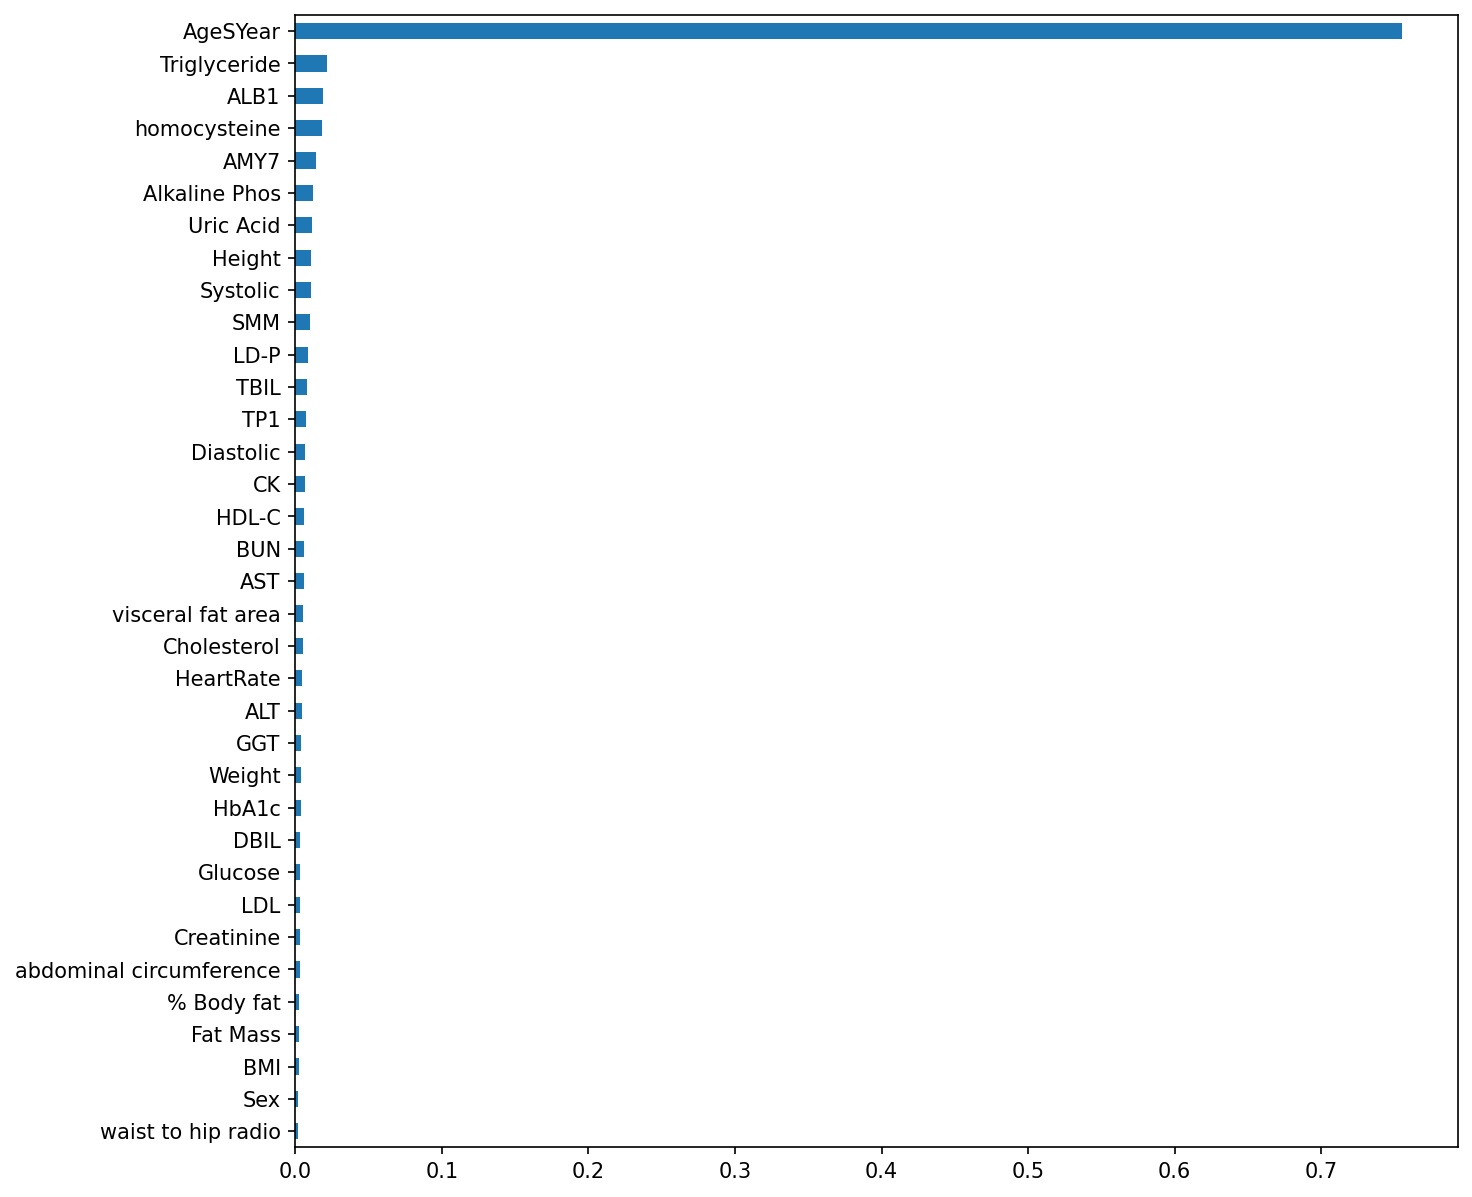

In [247]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A21

In [248]:
X=A21[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A21['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [249]:
Forest.feature_importances_

array([0.00265151, 0.69566776, 0.00460209, 0.00998698, 0.0036934 ,
       0.0130136 , 0.00292329, 0.00450432, 0.00487727, 0.00772917,
       0.01456721, 0.00580839, 0.00576083, 0.00906139, 0.00486394,
       0.0136121 , 0.00628798, 0.00374995, 0.0357769 , 0.00953879,
       0.02397866, 0.00907114, 0.00667278, 0.01448419, 0.00529729,
       0.00781027, 0.00731293, 0.00251897, 0.00707628, 0.01273674,
       0.00643253, 0.00676173, 0.00992737, 0.01570547, 0.00553678])

In [250]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Glucose                    0.002519
Sex                        0.002652
Fat Mass                   0.002923
BMI                        0.003693
LDL                        0.003750
% Body fat                 0.004504
Weight                     0.004602
Cholesterol                0.004864
abdominal circumference    0.004877
ALT                        0.005297
CK                         0.005537
HeartRate                  0.005761
Diastolic                  0.005808
HDL-C                      0.006288
BUN                        0.006433
DBIL                       0.006673
Creatinine                 0.006762
HbA1c                      0.007076
GGT                        0.007313
waist to hip radio         0.007729
AST                        0.007810
visceral fat area          0.009061
TBIL                       0.009071
TP1                        0.009539
LD-P                       0.009927
Height                     0.009987
AMY7                       0.012737
SMM                        0

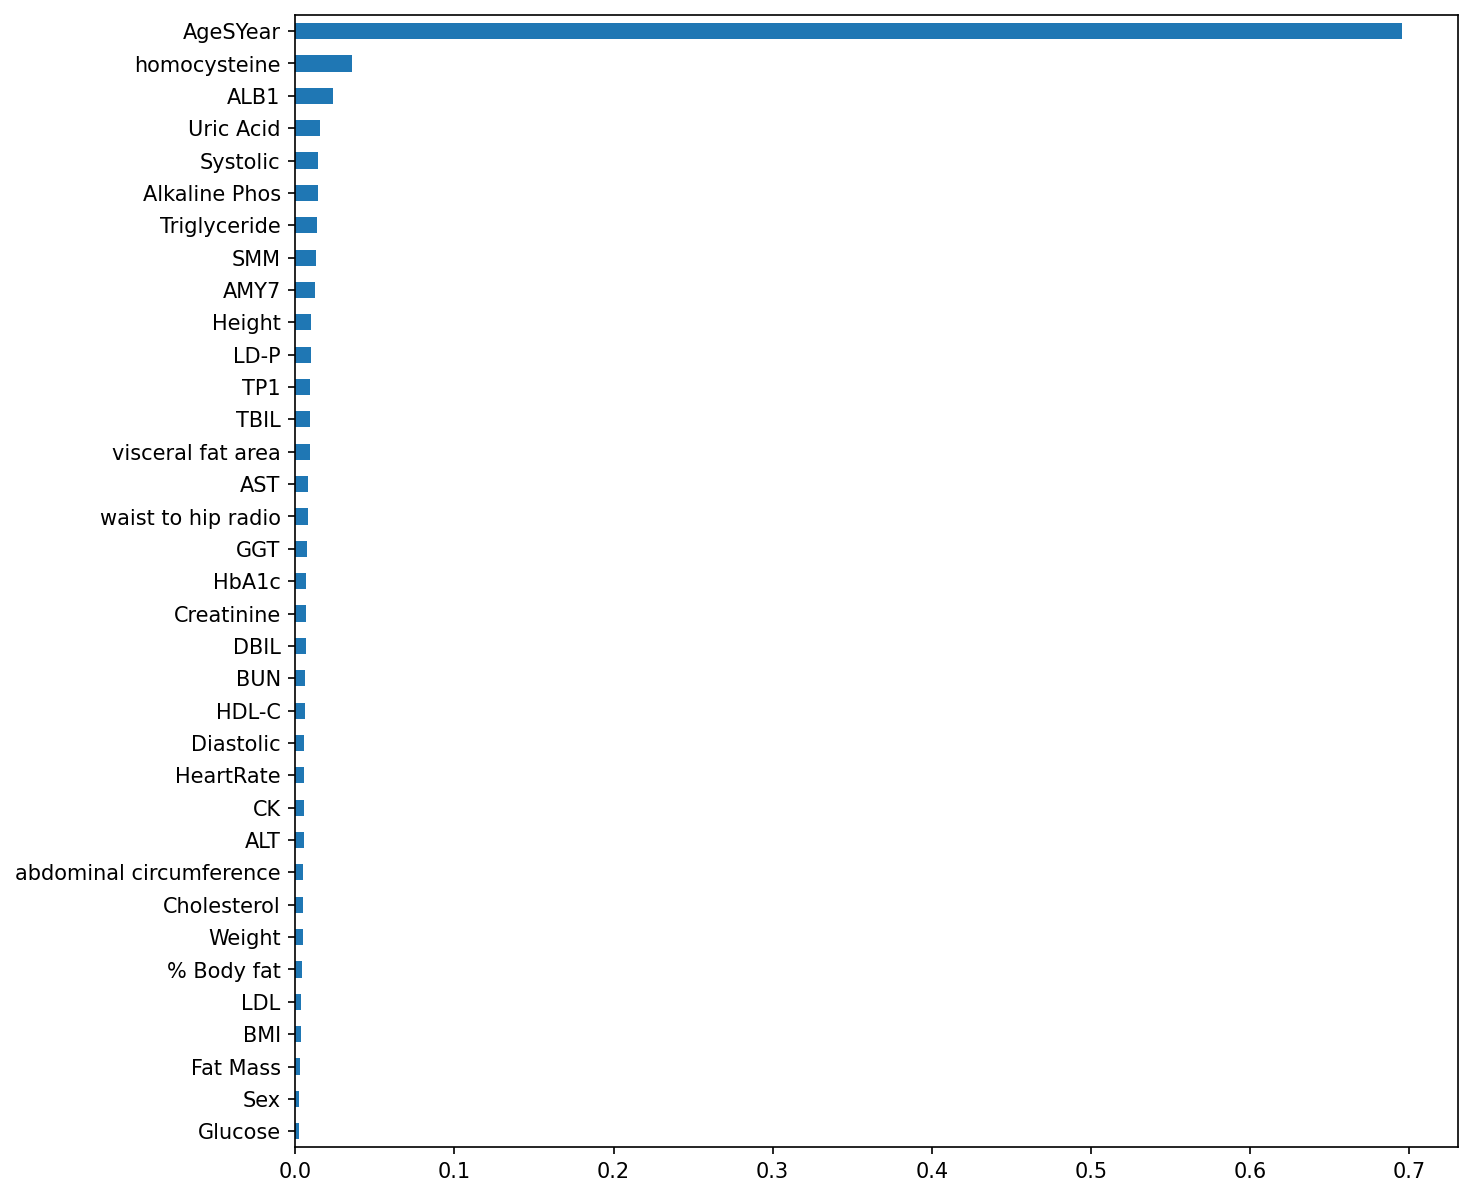

In [251]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A22

In [252]:
X=A22[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A22['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [253]:
Forest.feature_importances_

array([0.00107831, 0.73665245, 0.00503066, 0.00760426, 0.00392652,
       0.01088731, 0.00186681, 0.00278838, 0.00244486, 0.00435189,
       0.00926625, 0.00338831, 0.00474244, 0.00340711, 0.0029995 ,
       0.02738031, 0.00814448, 0.00451789, 0.01503683, 0.00840857,
       0.02560098, 0.0066551 , 0.00511857, 0.0302818 , 0.00273206,
       0.00696622, 0.00692164, 0.00255326, 0.00545849, 0.00401391,
       0.00532818, 0.00317199, 0.01252528, 0.0110832 , 0.00766621])

In [254]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.001078
Fat Mass                   0.001867
abdominal circumference    0.002445
Glucose                    0.002553
ALT                        0.002732
% Body fat                 0.002788
Cholesterol                0.002999
Creatinine                 0.003172
Diastolic                  0.003388
visceral fat area          0.003407
BMI                        0.003927
AMY7                       0.004014
waist to hip radio         0.004352
LDL                        0.004518
HeartRate                  0.004742
Weight                     0.005031
DBIL                       0.005119
BUN                        0.005328
HbA1c                      0.005458
TBIL                       0.006655
GGT                        0.006922
AST                        0.006966
Height                     0.007604
CK                         0.007666
HDL-C                      0.008144
TP1                        0.008409
Systolic                   0.009266
SMM                        0

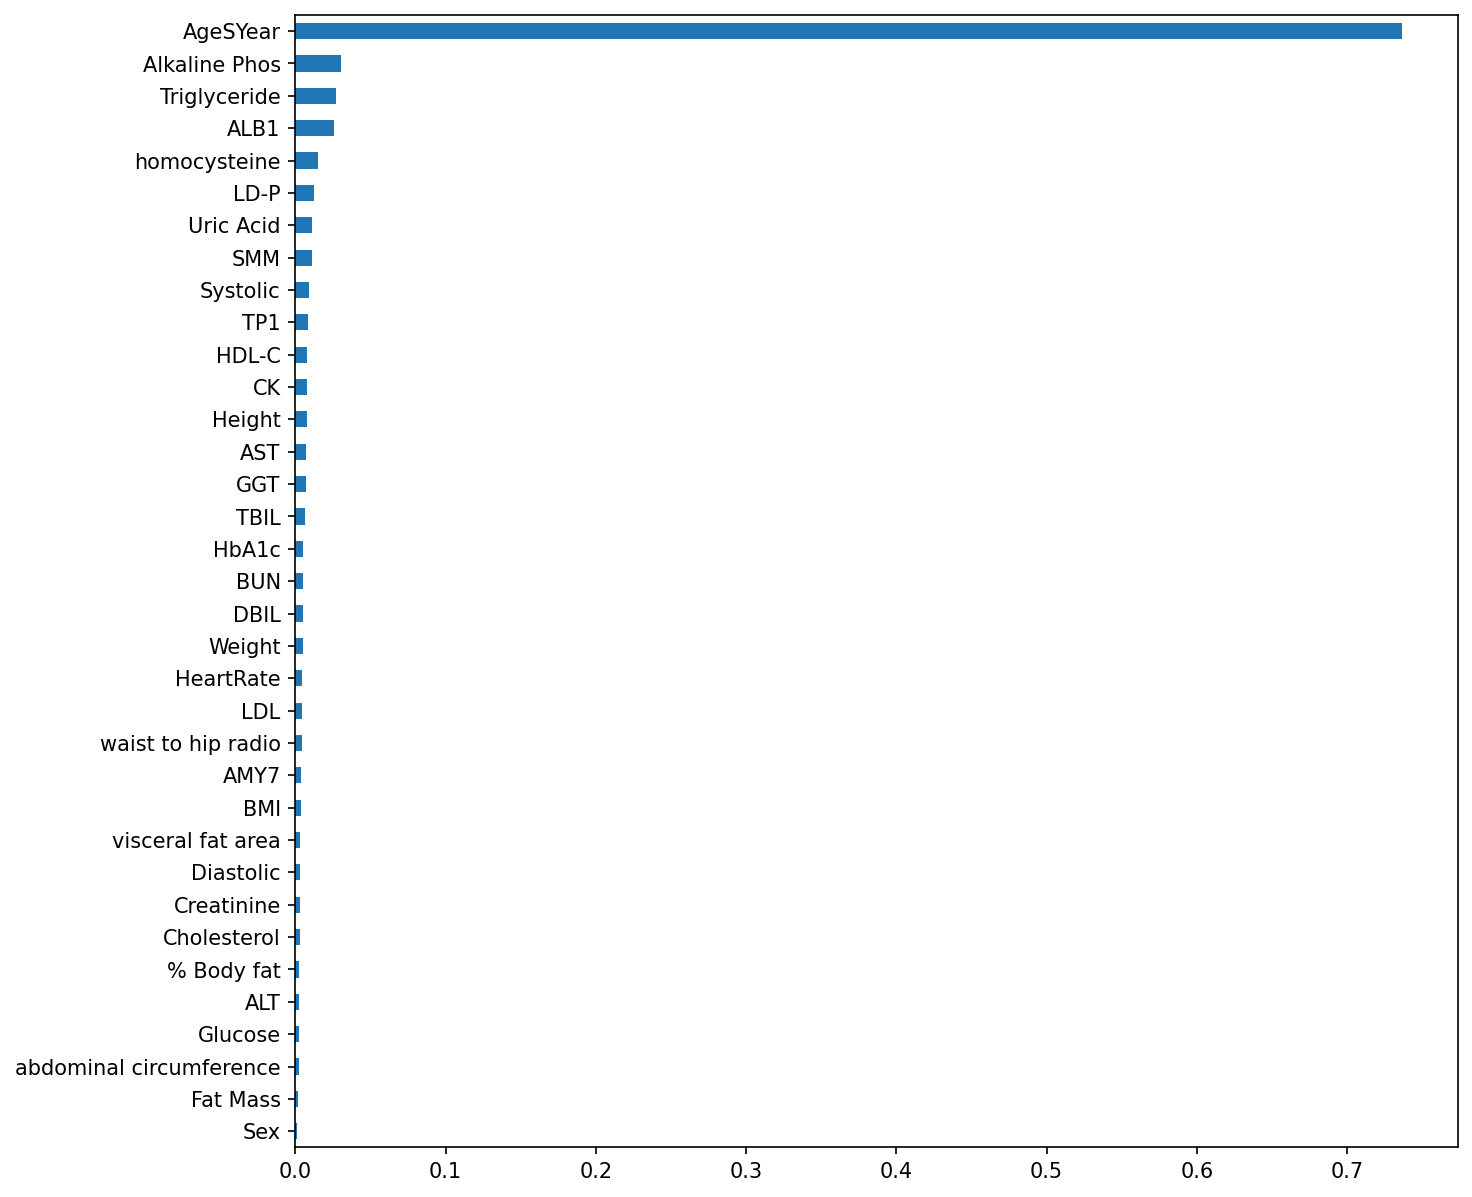

In [255]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A23

In [256]:
X=A23[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A23['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [257]:
Forest.feature_importances_

array([3.53133680e-04, 7.25193937e-01, 3.29102278e-03, 1.11002769e-02,
       4.89967770e-03, 1.21119233e-02, 1.99068732e-03, 4.13103691e-03,
       7.88527742e-03, 4.07718840e-03, 1.46299444e-02, 7.93503062e-03,
       5.11912251e-03, 5.09949237e-03, 5.95894028e-03, 1.73004476e-02,
       6.07995885e-03, 3.58049368e-03, 1.74603824e-02, 7.80116668e-03,
       1.42731936e-02, 7.45264583e-03, 7.51130954e-03, 2.25529665e-02,
       4.98340880e-03, 4.43646657e-03, 3.77118049e-03, 3.04804029e-03,
       8.00952592e-03, 1.01850789e-02, 7.41695237e-03, 4.29862782e-03,
       8.95309946e-03, 1.95064933e-02, 7.60186971e-03])

In [258]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.000353
Fat Mass                   0.001991
Glucose                    0.003048
Weight                     0.003291
LDL                        0.003580
GGT                        0.003771
waist to hip radio         0.004077
% Body fat                 0.004131
Creatinine                 0.004299
AST                        0.004436
BMI                        0.004900
ALT                        0.004983
visceral fat area          0.005099
HeartRate                  0.005119
Cholesterol                0.005959
HDL-C                      0.006080
BUN                        0.007417
TBIL                       0.007453
DBIL                       0.007511
CK                         0.007602
TP1                        0.007801
abdominal circumference    0.007885
Diastolic                  0.007935
HbA1c                      0.008010
LD-P                       0.008953
AMY7                       0.010185
Height                     0.011100
SMM                        0

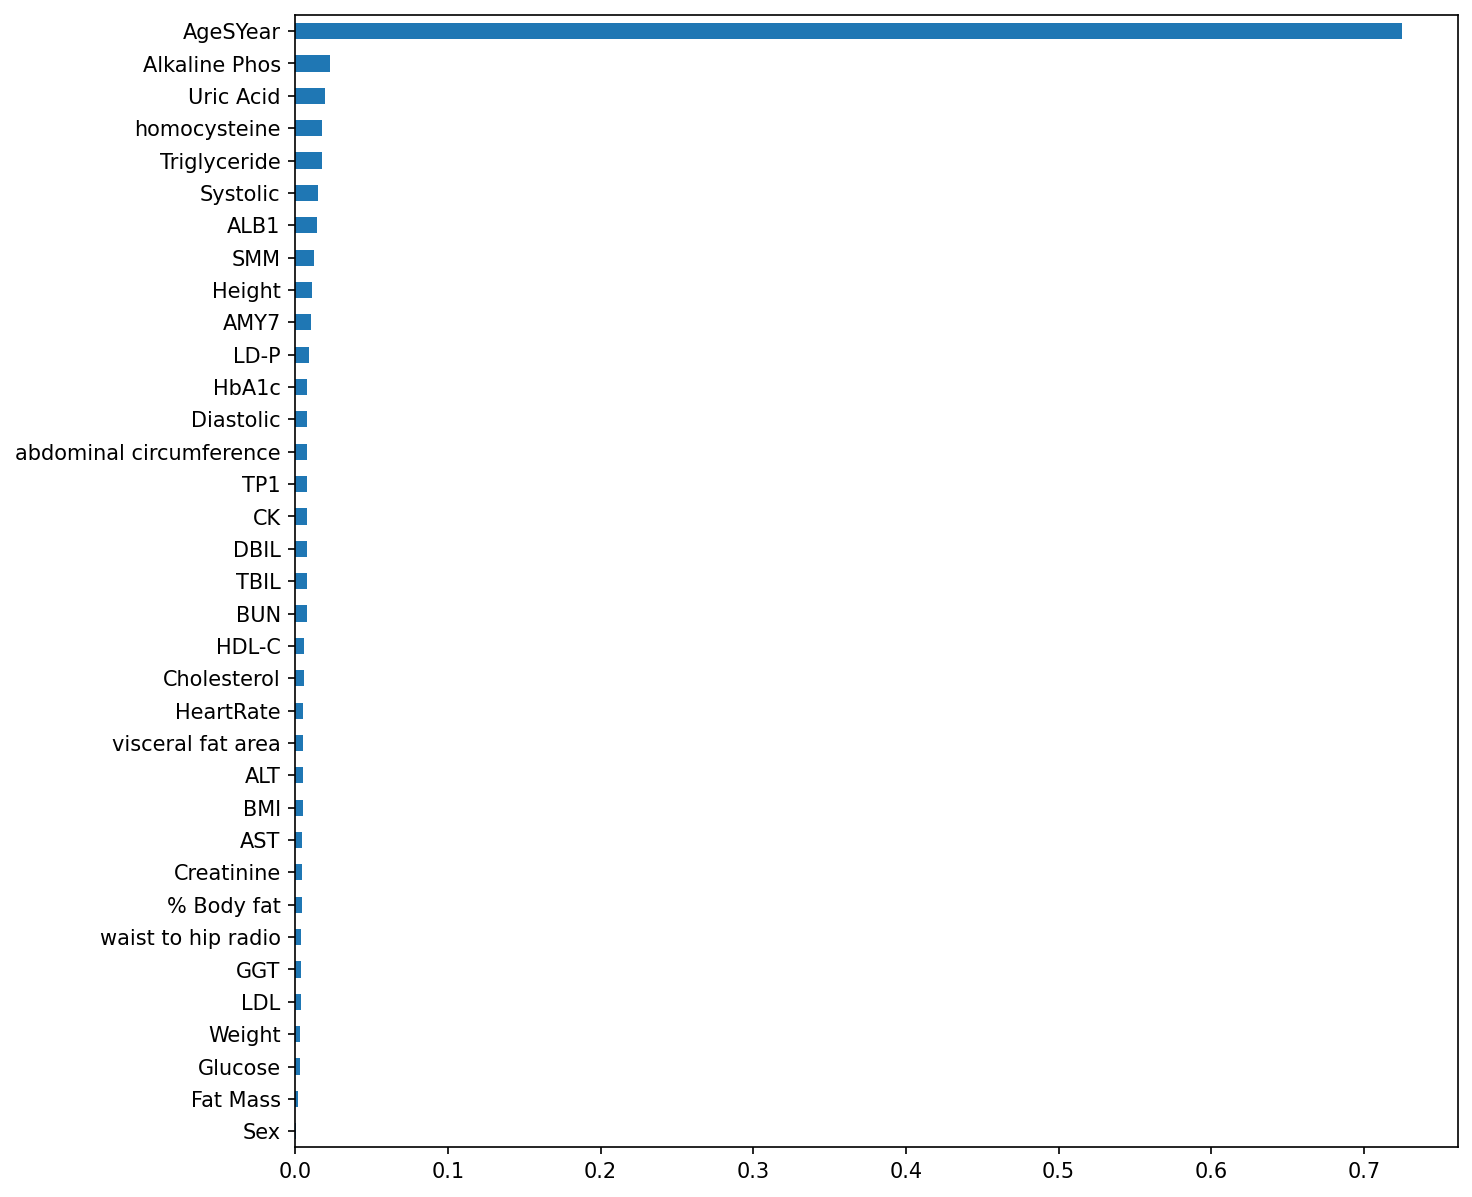

In [259]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A24

In [260]:
X=A24[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A24['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [261]:
Forest.feature_importances_

array([0.0032361 , 0.7385184 , 0.00726047, 0.01788648, 0.00397273,
       0.01579349, 0.00150174, 0.00402044, 0.00493056, 0.00245143,
       0.00654517, 0.00440329, 0.00435858, 0.0050467 , 0.00759718,
       0.01893695, 0.0042052 , 0.00436785, 0.02197777, 0.01164723,
       0.02701599, 0.00660236, 0.00508922, 0.01170994, 0.00372512,
       0.00626626, 0.00424474, 0.00170143, 0.0045715 , 0.0107237 ,
       0.00257888, 0.00384425, 0.00766905, 0.00786677, 0.00773304])

In [262]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Fat Mass                   0.001502
Glucose                    0.001701
waist to hip radio         0.002451
BUN                        0.002579
Sex                        0.003236
ALT                        0.003725
Creatinine                 0.003844
BMI                        0.003973
% Body fat                 0.004020
HDL-C                      0.004205
GGT                        0.004245
HeartRate                  0.004359
LDL                        0.004368
Diastolic                  0.004403
HbA1c                      0.004571
abdominal circumference    0.004931
visceral fat area          0.005047
DBIL                       0.005089
AST                        0.006266
Systolic                   0.006545
TBIL                       0.006602
Weight                     0.007260
Cholesterol                0.007597
LD-P                       0.007669
CK                         0.007733
Uric Acid                  0.007867
AMY7                       0.010724
TP1                        0

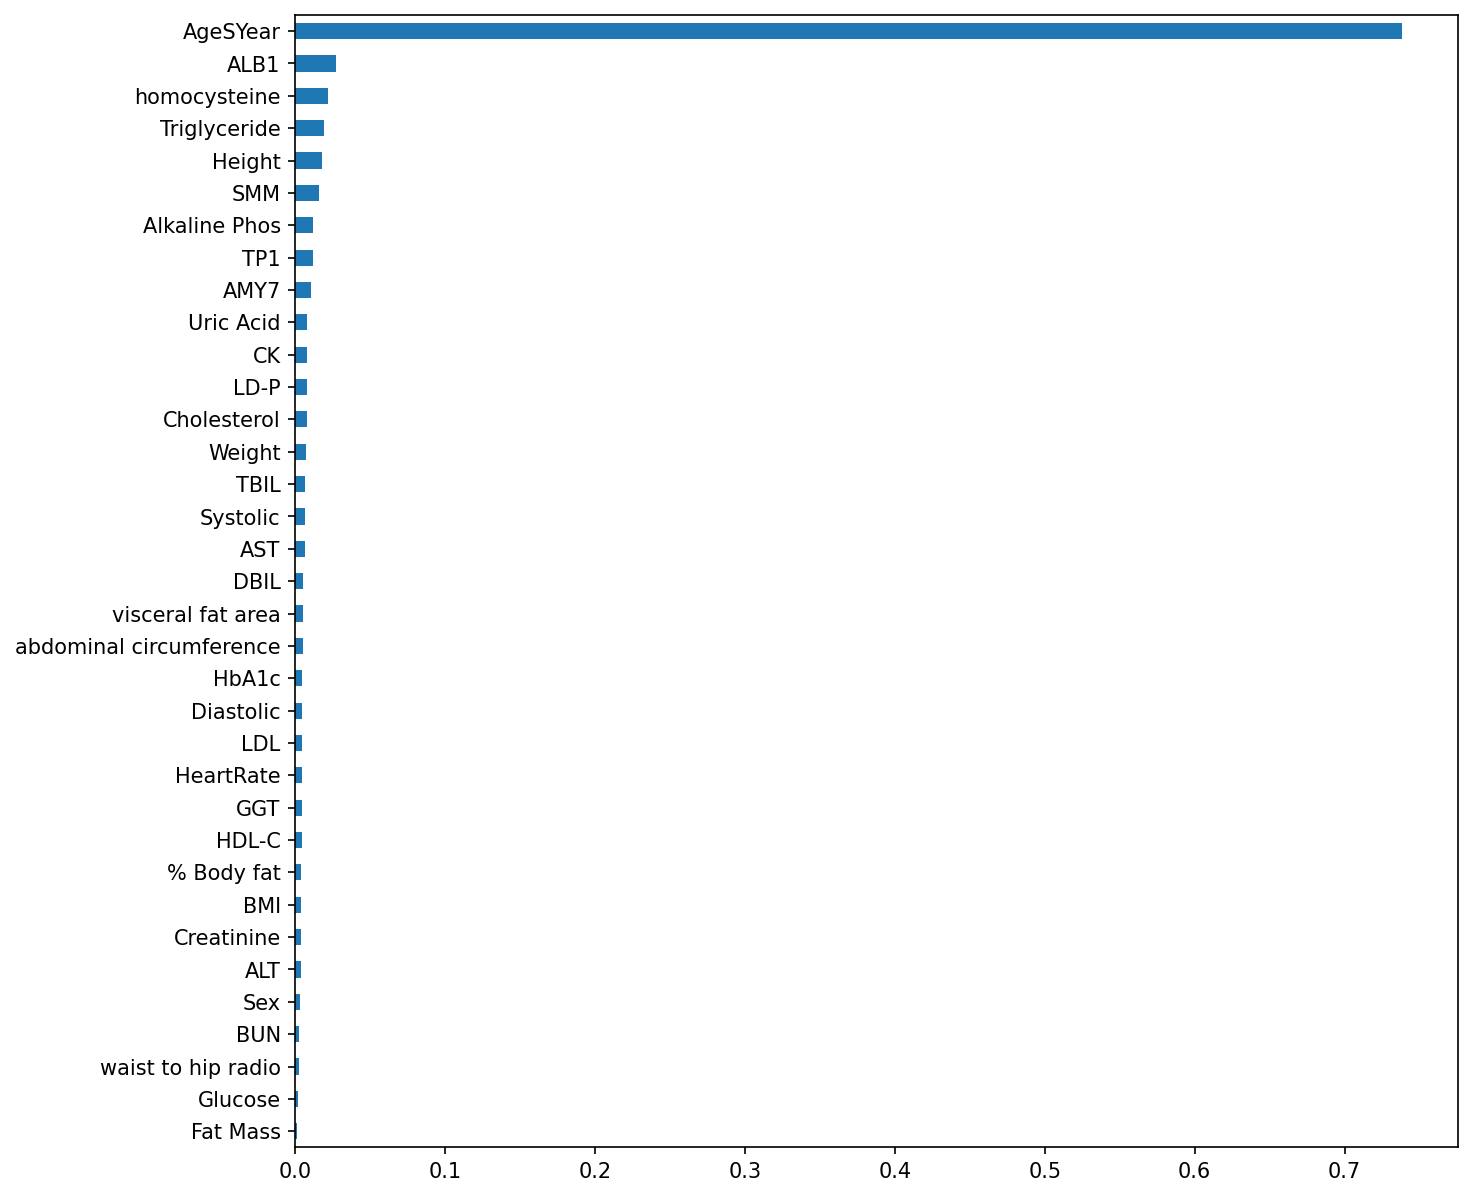

In [263]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A25

In [264]:
X=A25[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A25['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [265]:
Forest.feature_importances_

array([0.00135937, 0.71287449, 0.0071217 , 0.00631961, 0.00463314,
       0.01138866, 0.00309168, 0.00380849, 0.00576764, 0.00838628,
       0.01011818, 0.00630256, 0.00539856, 0.01524778, 0.00629469,
       0.01061435, 0.00482013, 0.00583719, 0.03413099, 0.01683456,
       0.01627816, 0.00729329, 0.0048267 , 0.009789  , 0.00491574,
       0.00695169, 0.00415894, 0.00366995, 0.01088351, 0.00526053,
       0.00649213, 0.00278194, 0.01283942, 0.01188011, 0.01162884])

In [266]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.001359
Creatinine                 0.002782
Fat Mass                   0.003092
Glucose                    0.003670
% Body fat                 0.003808
GGT                        0.004159
BMI                        0.004633
HDL-C                      0.004820
DBIL                       0.004827
ALT                        0.004916
AMY7                       0.005261
HeartRate                  0.005399
abdominal circumference    0.005768
LDL                        0.005837
Cholesterol                0.006295
Diastolic                  0.006303
Height                     0.006320
BUN                        0.006492
AST                        0.006952
Weight                     0.007122
TBIL                       0.007293
waist to hip radio         0.008386
Alkaline Phos              0.009789
Systolic                   0.010118
Triglyceride               0.010614
HbA1c                      0.010884
SMM                        0.011389
CK                         0

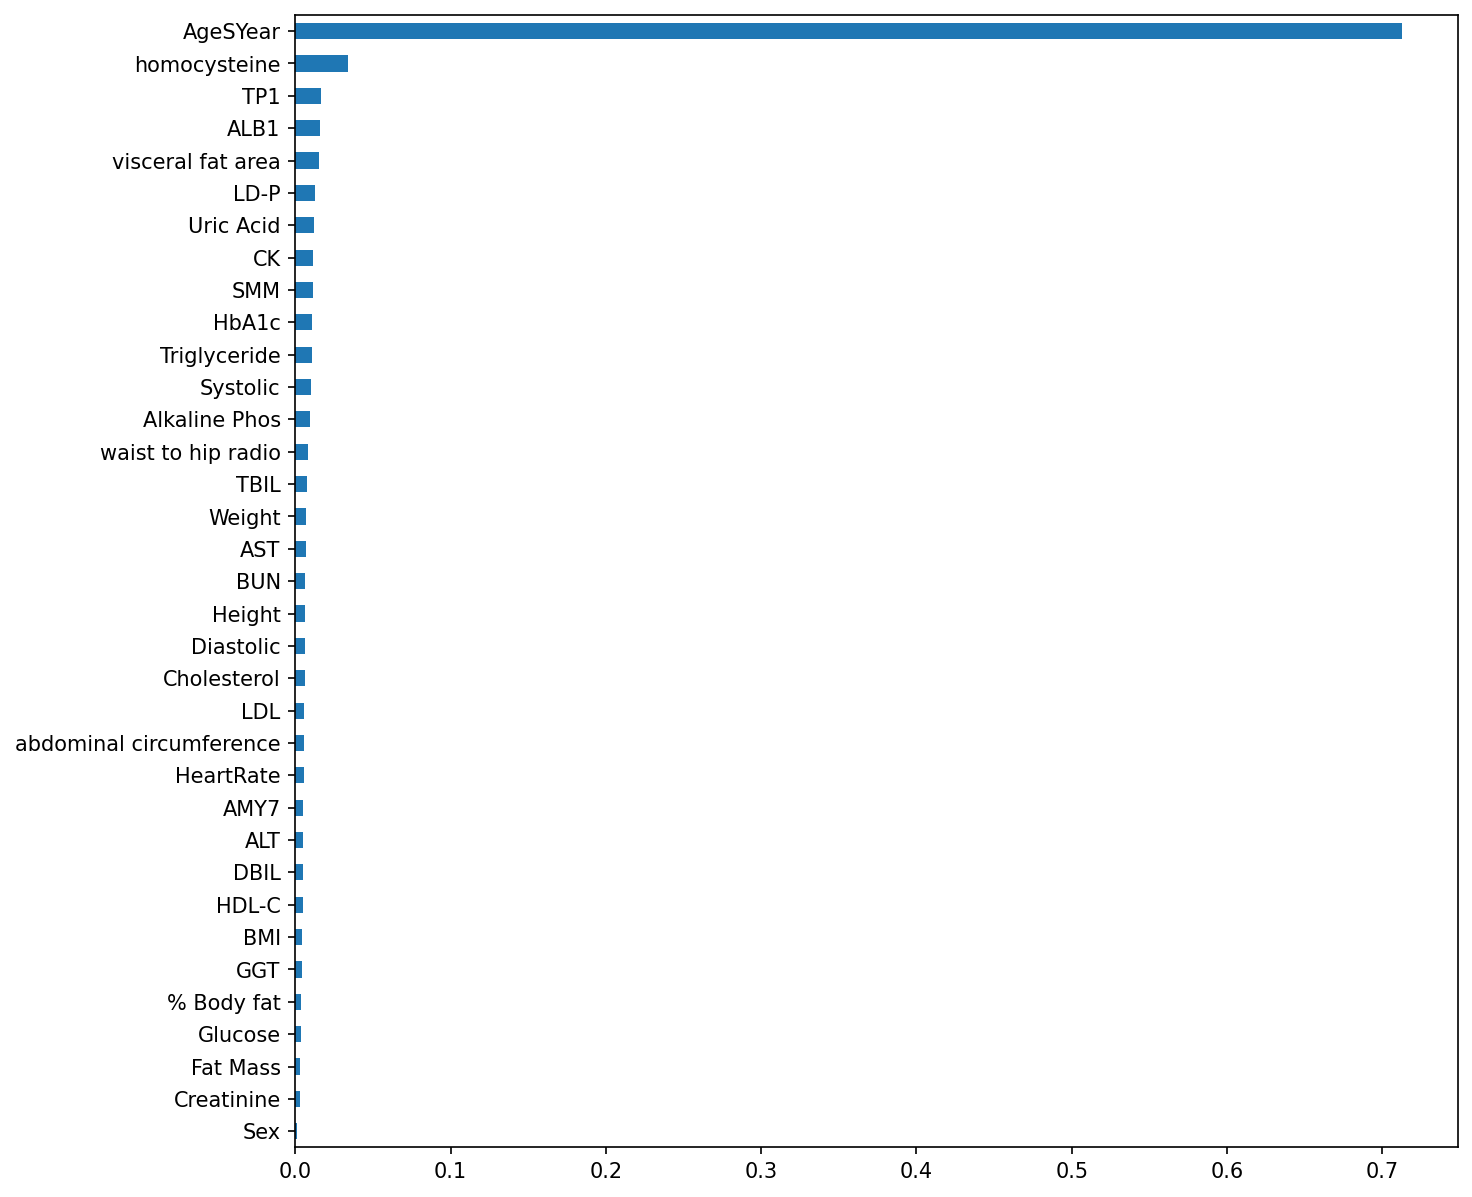

In [267]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A26

In [268]:
X=A26[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A26['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [269]:
Forest.feature_importances_

array([0.00074332, 0.72788763, 0.00288487, 0.0070042 , 0.00290134,
       0.0070191 , 0.00310863, 0.00231524, 0.00309464, 0.00187702,
       0.01012067, 0.00297572, 0.00549979, 0.00569316, 0.0099742 ,
       0.01406859, 0.0041081 , 0.00854907, 0.02133824, 0.02061631,
       0.02858967, 0.00648629, 0.00979614, 0.01221989, 0.00448132,
       0.00829346, 0.00411133, 0.0037527 , 0.00839259, 0.0114071 ,
       0.00848255, 0.0036904 , 0.00645364, 0.01096338, 0.01109971])

In [270]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.000743
waist to hip radio         0.001877
% Body fat                 0.002315
Weight                     0.002885
BMI                        0.002901
Diastolic                  0.002976
abdominal circumference    0.003095
Fat Mass                   0.003109
Creatinine                 0.003690
Glucose                    0.003753
HDL-C                      0.004108
GGT                        0.004111
ALT                        0.004481
HeartRate                  0.005500
visceral fat area          0.005693
LD-P                       0.006454
TBIL                       0.006486
Height                     0.007004
SMM                        0.007019
AST                        0.008293
HbA1c                      0.008393
BUN                        0.008483
LDL                        0.008549
DBIL                       0.009796
Cholesterol                0.009974
Systolic                   0.010121
Uric Acid                  0.010963
CK                         0

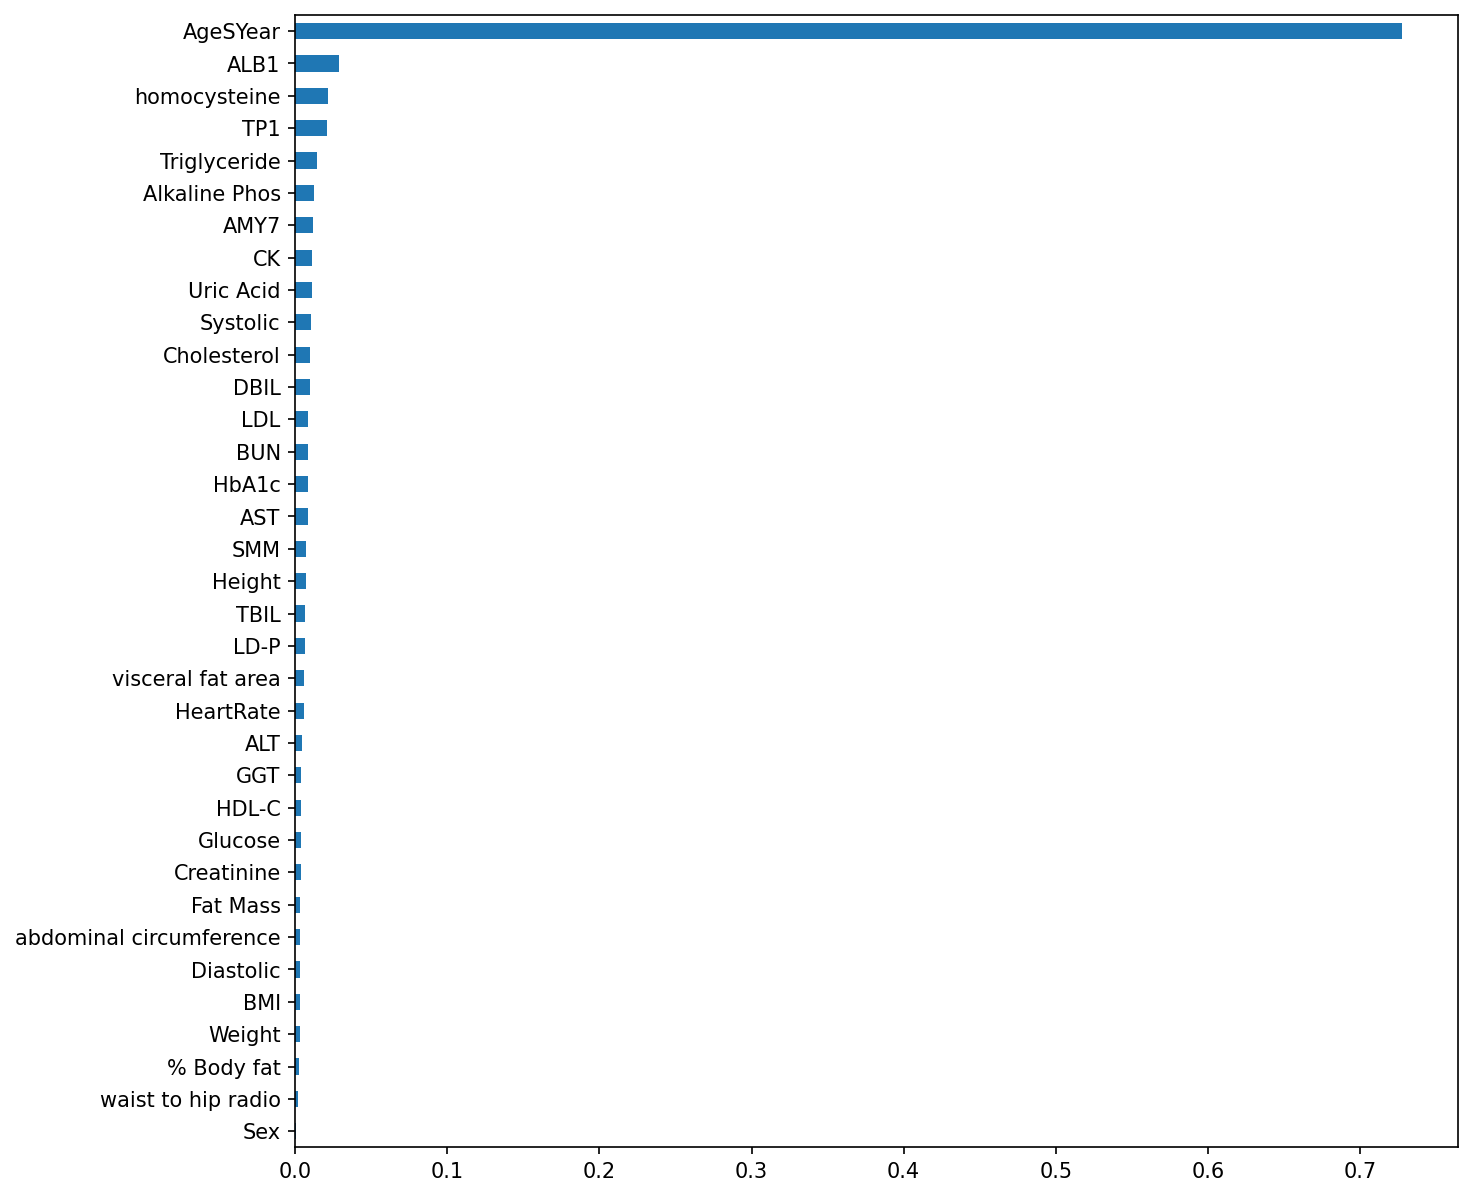

In [271]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A27

In [272]:
X=A27[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A27['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [273]:
Forest.feature_importances_

array([4.68079923e-04, 7.40474584e-01, 6.37282886e-03, 1.05477580e-02,
       2.70115974e-03, 7.08545422e-03, 5.11104356e-03, 6.31276780e-03,
       4.12170393e-03, 3.43440015e-03, 6.97312554e-03, 3.56208499e-03,
       4.65605416e-03, 6.45782493e-03, 6.93406800e-03, 1.40841152e-02,
       5.83416309e-03, 4.00029772e-03, 2.12524397e-02, 1.19738596e-02,
       1.59707029e-02, 1.06216950e-02, 4.12928483e-03, 2.96534572e-02,
       2.73605829e-03, 4.17029309e-03, 4.24389980e-03, 2.06013333e-03,
       4.93718033e-03, 7.09184348e-03, 3.84665227e-03, 4.05989935e-03,
       7.72881163e-03, 1.87763601e-02, 7.61591529e-03])

In [274]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.000468
Glucose                    0.002060
BMI                        0.002701
ALT                        0.002736
waist to hip radio         0.003434
Diastolic                  0.003562
BUN                        0.003847
LDL                        0.004000
Creatinine                 0.004060
abdominal circumference    0.004122
DBIL                       0.004129
AST                        0.004170
GGT                        0.004244
HeartRate                  0.004656
HbA1c                      0.004937
Fat Mass                   0.005111
HDL-C                      0.005834
% Body fat                 0.006313
Weight                     0.006373
visceral fat area          0.006458
Cholesterol                0.006934
Systolic                   0.006973
SMM                        0.007085
AMY7                       0.007092
CK                         0.007616
LD-P                       0.007729
Height                     0.010548
TBIL                       0

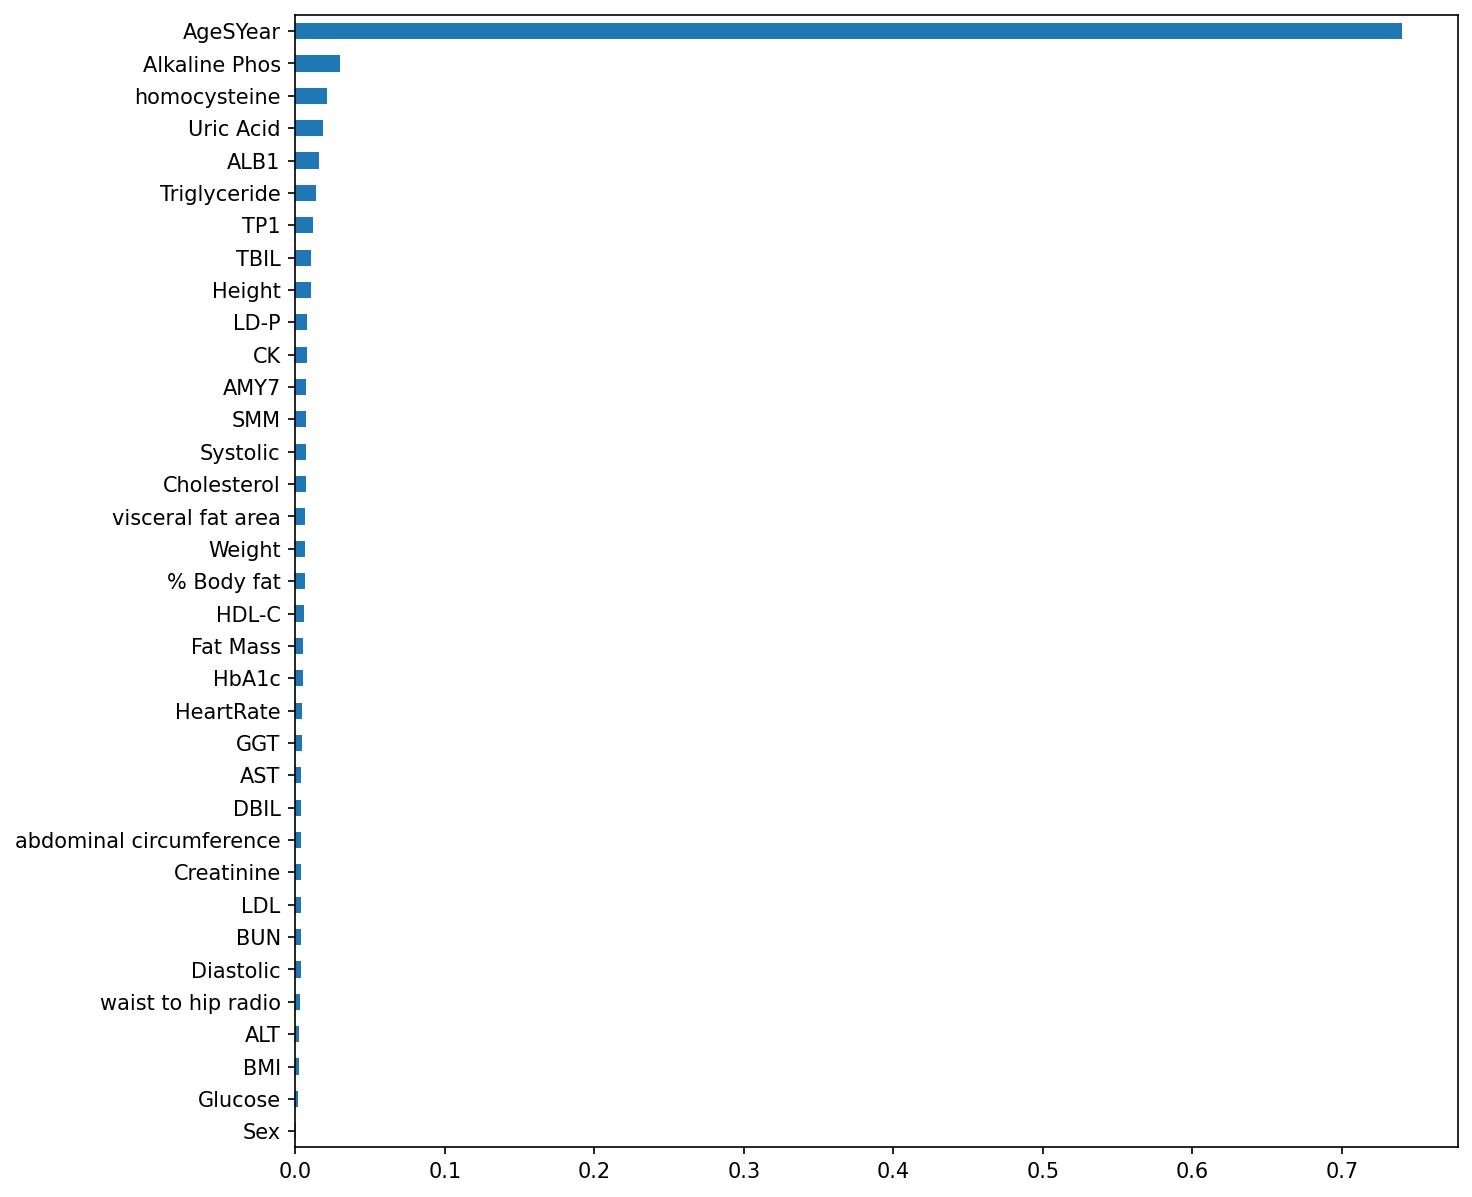

In [275]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A28

In [276]:
X=A28[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A28['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [277]:
Forest.feature_importances_

array([0.00419389, 0.72580832, 0.00536903, 0.00769205, 0.00546265,
       0.01476247, 0.0026465 , 0.00447319, 0.00197137, 0.00177092,
       0.02125791, 0.00401056, 0.01520397, 0.00333118, 0.00267518,
       0.01377145, 0.00640025, 0.00356501, 0.01794106, 0.0081205 ,
       0.02001298, 0.00670934, 0.00393957, 0.01093997, 0.00347052,
       0.00550341, 0.00351163, 0.00255554, 0.0062553 , 0.01177478,
       0.00716661, 0.00440204, 0.00708482, 0.03110774, 0.00513829])

In [278]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

waist to hip radio         0.001771
abdominal circumference    0.001971
Glucose                    0.002556
Fat Mass                   0.002646
Cholesterol                0.002675
visceral fat area          0.003331
ALT                        0.003471
GGT                        0.003512
LDL                        0.003565
DBIL                       0.003940
Diastolic                  0.004011
Sex                        0.004194
Creatinine                 0.004402
% Body fat                 0.004473
CK                         0.005138
Weight                     0.005369
BMI                        0.005463
AST                        0.005503
HbA1c                      0.006255
HDL-C                      0.006400
TBIL                       0.006709
LD-P                       0.007085
BUN                        0.007167
Height                     0.007692
TP1                        0.008121
Alkaline Phos              0.010940
AMY7                       0.011775
Triglyceride               0

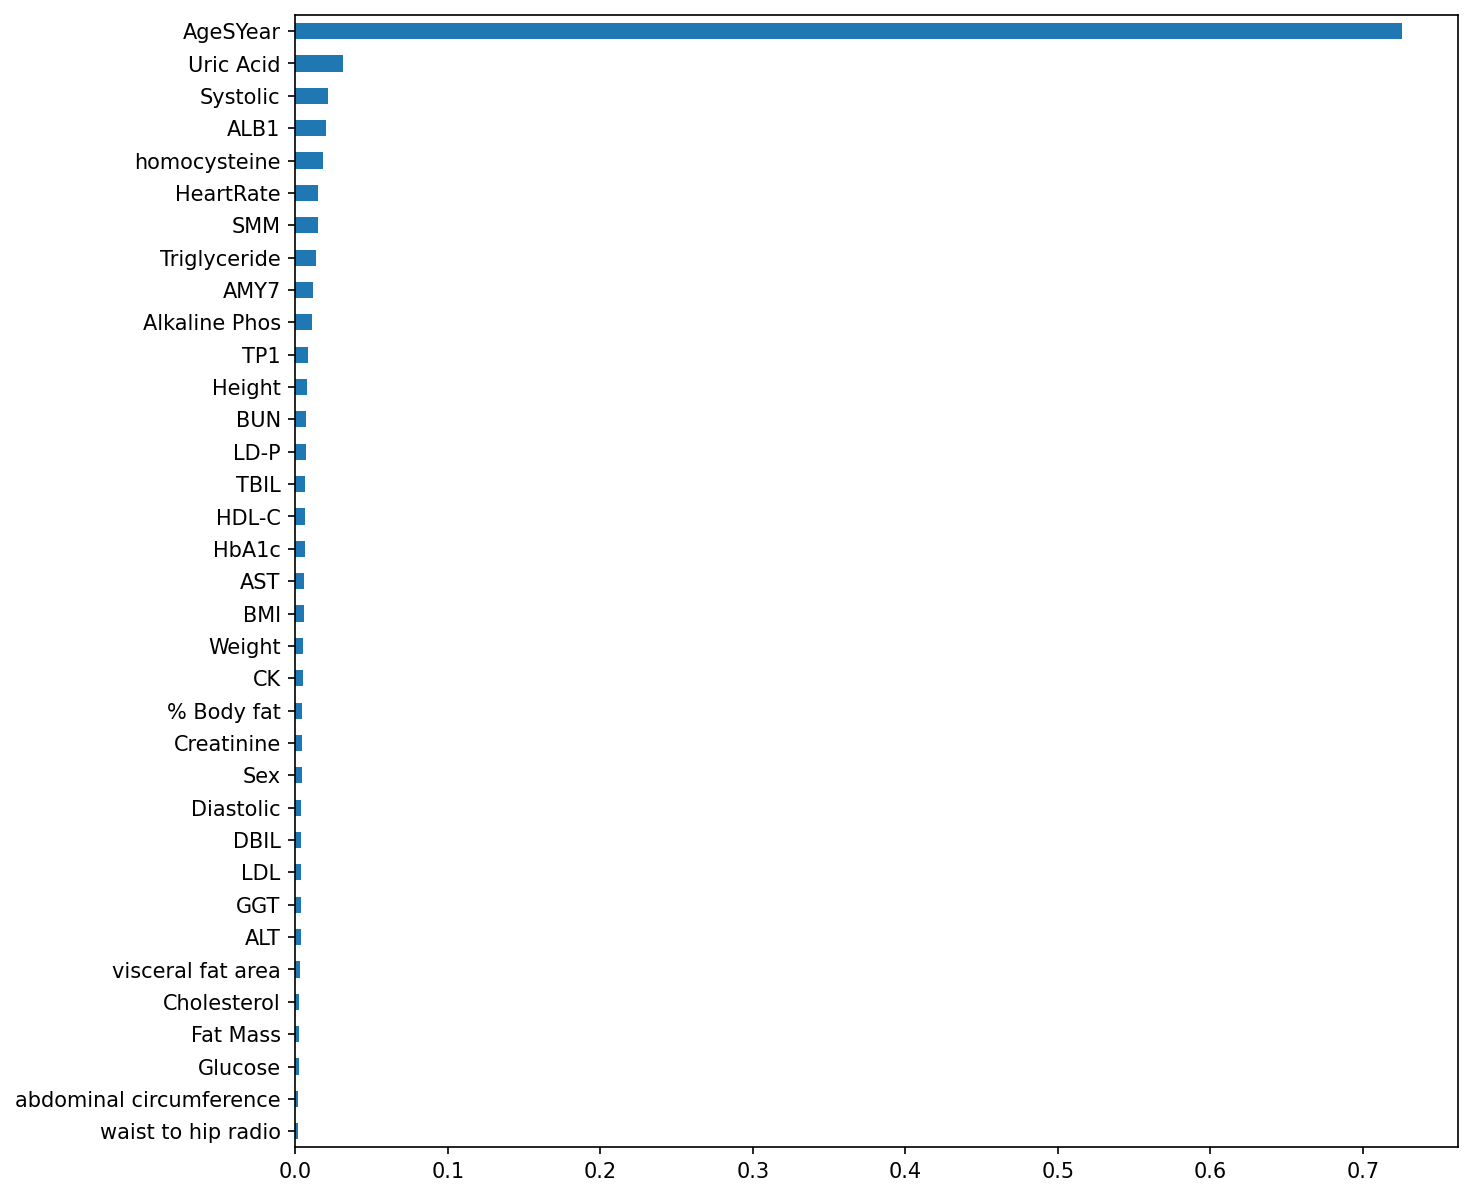

In [279]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A29

In [280]:
X=A29[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A29['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [281]:
Forest.feature_importances_

array([0.00104981, 0.75844688, 0.00355694, 0.00789961, 0.00267664,
       0.00820504, 0.00179705, 0.00252332, 0.00610158, 0.00246009,
       0.00900322, 0.00375575, 0.00618818, 0.00534462, 0.00329308,
       0.0186222 , 0.00574961, 0.0023107 , 0.01487107, 0.00895752,
       0.02644845, 0.00412494, 0.00647597, 0.00923058, 0.00514214,
       0.00817526, 0.00436052, 0.00326777, 0.00504304, 0.00619955,
       0.00551145, 0.00336731, 0.0158838 , 0.01712398, 0.00683234])

In [282]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.001050
Fat Mass                   0.001797
LDL                        0.002311
waist to hip radio         0.002460
% Body fat                 0.002523
BMI                        0.002677
Glucose                    0.003268
Cholesterol                0.003293
Creatinine                 0.003367
Weight                     0.003557
Diastolic                  0.003756
TBIL                       0.004125
GGT                        0.004361
HbA1c                      0.005043
ALT                        0.005142
visceral fat area          0.005345
BUN                        0.005511
HDL-C                      0.005750
abdominal circumference    0.006102
HeartRate                  0.006188
AMY7                       0.006200
DBIL                       0.006476
CK                         0.006832
Height                     0.007900
AST                        0.008175
SMM                        0.008205
TP1                        0.008958
Systolic                   0

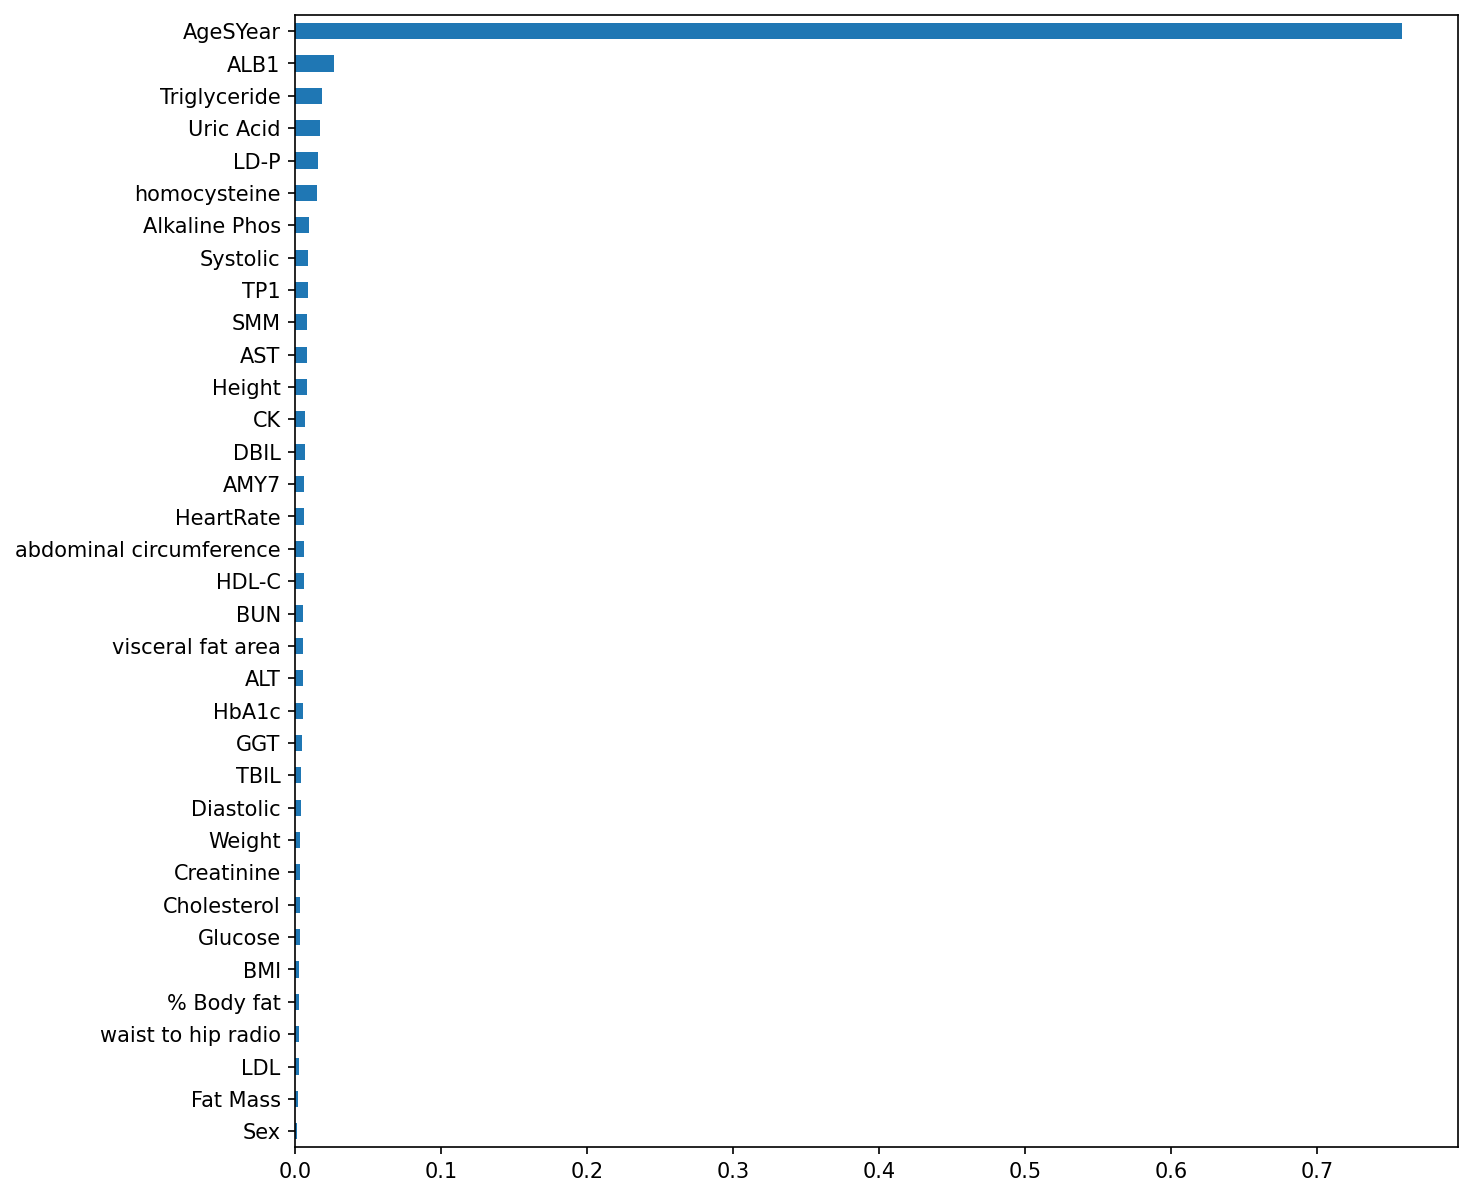

In [283]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

##A30

In [284]:
X=A30[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A30['telomere length (kb)']
Forest = RandomForestRegressor()
Forest = Forest.fit(X,y)

In [285]:
Forest.feature_importances_

array([0.00148551, 0.73077259, 0.00353053, 0.01226085, 0.00199737,
       0.01024441, 0.00483279, 0.00638975, 0.00309282, 0.00398843,
       0.01205972, 0.00571879, 0.00666805, 0.00799873, 0.00525971,
       0.02340431, 0.00454078, 0.00363266, 0.02609578, 0.01036138,
       0.02733787, 0.00459709, 0.00445864, 0.01751804, 0.00297985,
       0.00533683, 0.00395568, 0.00201989, 0.00726267, 0.00935894,
       0.00509732, 0.00227115, 0.00655317, 0.00911396, 0.00780393])

In [286]:
Forest_im=pd.Series(Forest.feature_importances_,index=X.columns).sort_values(ascending=True)
Forest_im

Sex                        0.001486
BMI                        0.001997
Glucose                    0.002020
Creatinine                 0.002271
ALT                        0.002980
abdominal circumference    0.003093
Weight                     0.003531
LDL                        0.003633
GGT                        0.003956
waist to hip radio         0.003988
DBIL                       0.004459
HDL-C                      0.004541
TBIL                       0.004597
Fat Mass                   0.004833
BUN                        0.005097
Cholesterol                0.005260
AST                        0.005337
Diastolic                  0.005719
% Body fat                 0.006390
LD-P                       0.006553
HeartRate                  0.006668
HbA1c                      0.007263
CK                         0.007804
visceral fat area          0.007999
Uric Acid                  0.009114
AMY7                       0.009359
SMM                        0.010244
TP1                        0

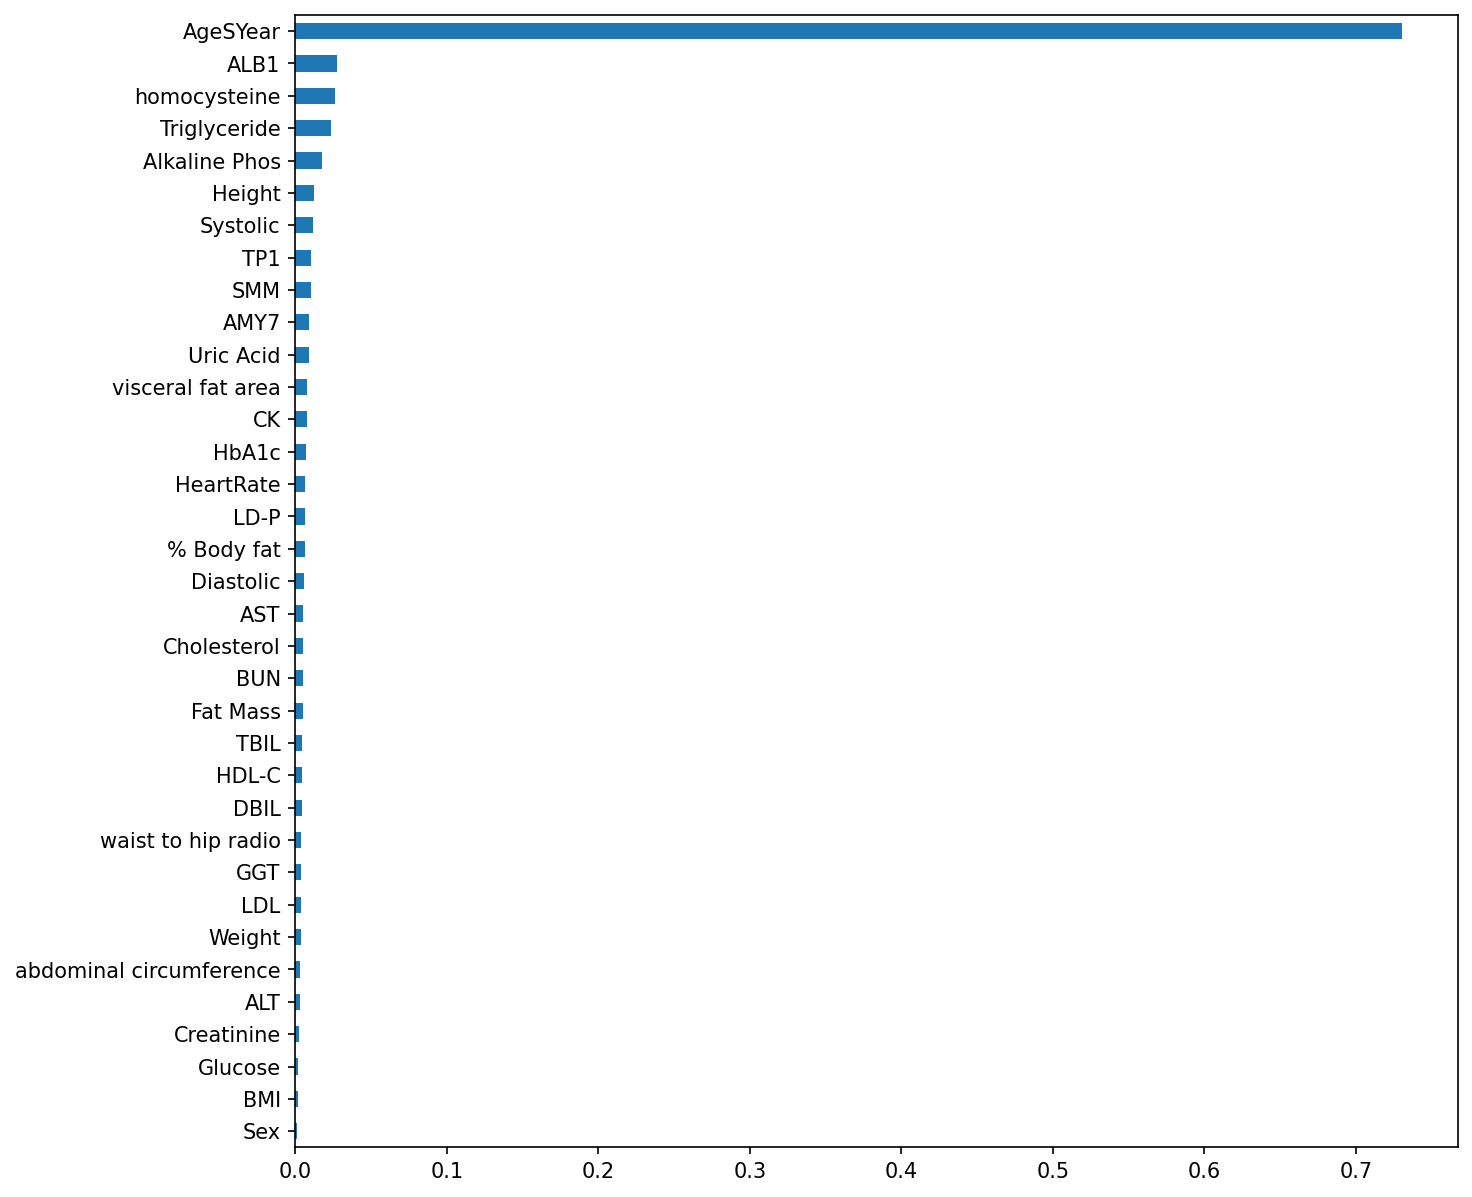

In [287]:
figure(figsize=(10, 10), dpi=150)
Forest_im.plot(kind='barh')

#GradientBoostingRegressor

##data

In [288]:
X=data[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=data['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [289]:
Gradient.feature_importances_

array([1.19942430e-05, 7.24373137e-01, 8.46019301e-03, 1.02760865e-02,
       1.10778511e-03, 2.27104824e-02, 7.37961206e-04, 6.32360451e-03,
       4.10696263e-03, 8.29759889e-04, 7.56008804e-03, 1.74496026e-03,
       1.13691935e-03, 1.53757712e-02, 1.76516185e-02, 1.17830601e-02,
       9.09190537e-03, 6.80902552e-05, 1.95544995e-02, 8.37984316e-03,
       3.16321677e-02, 8.81821682e-03, 2.70654855e-03, 2.06445773e-02,
       3.82379583e-04, 3.18423889e-04, 4.93525608e-03, 1.36932493e-03,
       3.93329529e-03, 1.69974024e-02, 6.79097551e-04, 2.63831992e-03,
       1.00959841e-02, 1.56392443e-02, 7.92503913e-03])

In [290]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000012
LDL                        0.000068
AST                        0.000318
ALT                        0.000382
BUN                        0.000679
Fat Mass                   0.000738
waist to hip radio         0.000830
BMI                        0.001108
HeartRate                  0.001137
Glucose                    0.001369
Diastolic                  0.001745
Creatinine                 0.002638
DBIL                       0.002707
HbA1c                      0.003933
abdominal circumference    0.004107
GGT                        0.004935
% Body fat                 0.006324
Systolic                   0.007560
CK                         0.007925
TP1                        0.008380
Weight                     0.008460
TBIL                       0.008818
HDL-C                      0.009092
LD-P                       0.010096
Height                     0.010276
Triglyceride               0.011783
visceral fat area          0.015376
Uric Acid                  0

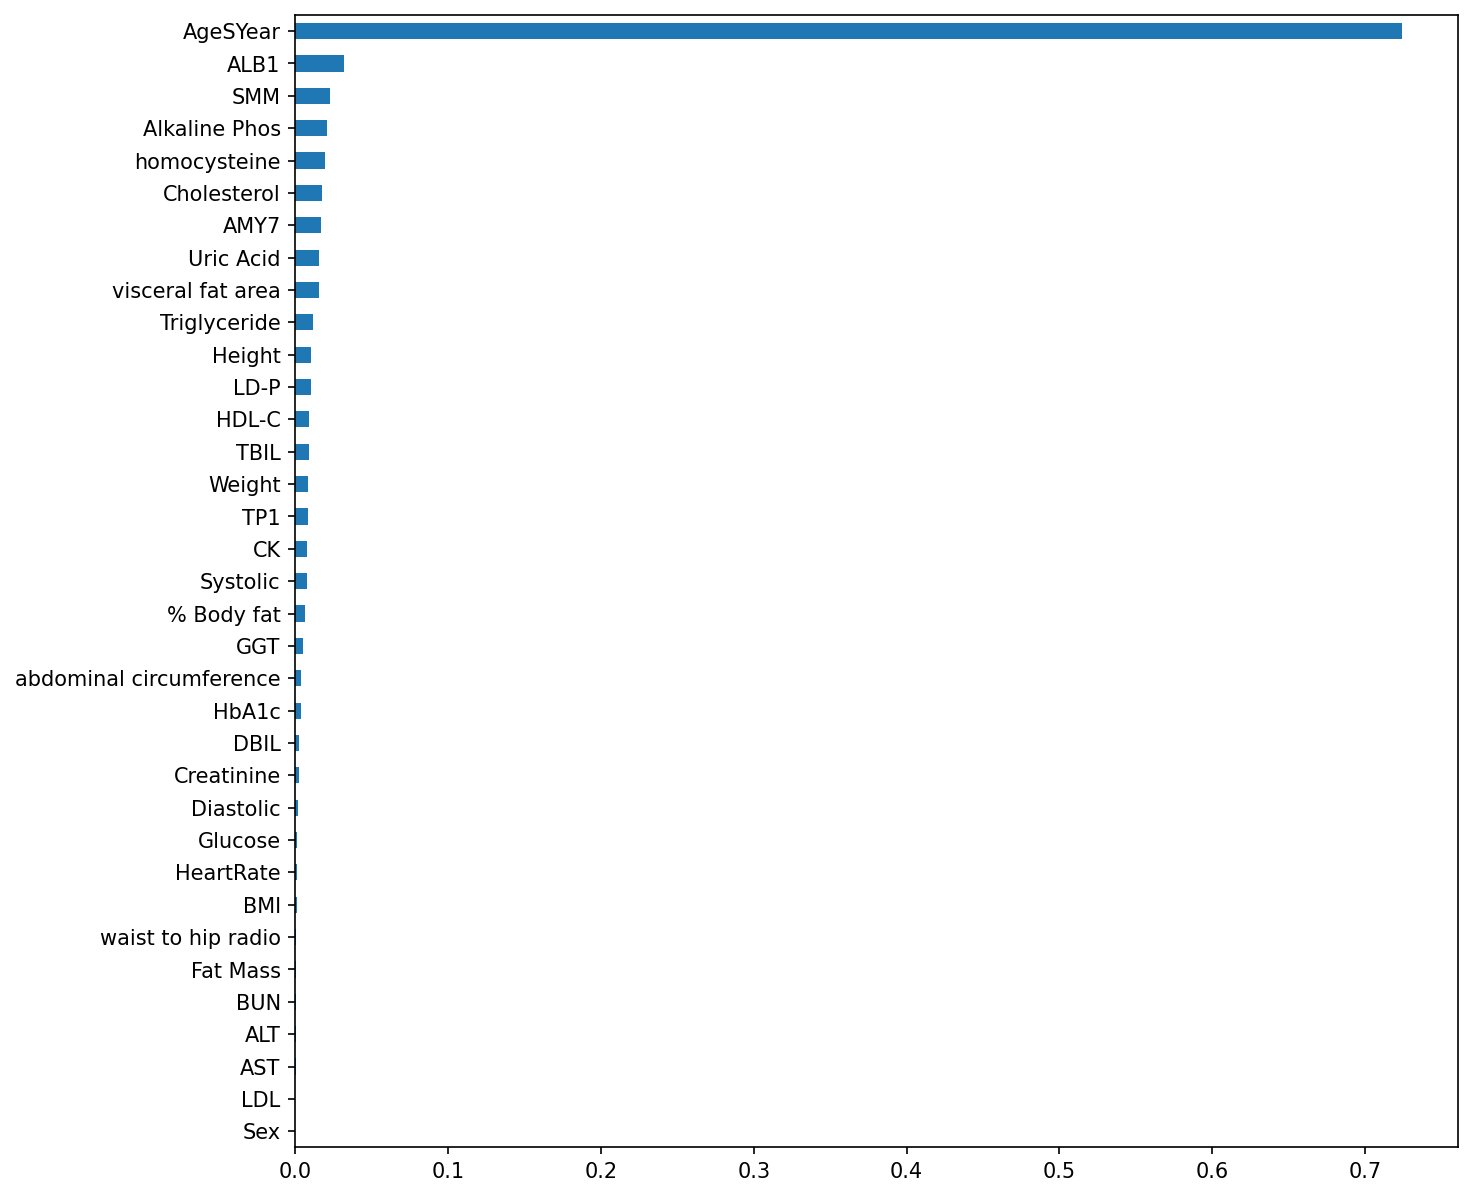

In [291]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A1

In [292]:
X=A1[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A2['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [293]:
Gradient.feature_importances_

array([0.        , 0.30569966, 0.0452956 , 0.00071304, 0.00500851,
       0.00060641, 0.00881248, 0.01408065, 0.01121866, 0.0259588 ,
       0.02653301, 0.00171688, 0.01463564, 0.05781881, 0.10487367,
       0.00652907, 0.01721685, 0.00911518, 0.02312145, 0.031817  ,
       0.00535441, 0.00717934, 0.01635019, 0.00908043, 0.01583075,
       0.00907925, 0.01058817, 0.02406046, 0.0064304 , 0.0608443 ,
       0.00678716, 0.02212118, 0.01943714, 0.00609955, 0.06998591])

In [294]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
SMM                        0.000606
Height                     0.000713
Diastolic                  0.001717
BMI                        0.005009
ALB1                       0.005354
Uric Acid                  0.006100
HbA1c                      0.006430
Triglyceride               0.006529
BUN                        0.006787
TBIL                       0.007179
Fat Mass                   0.008812
AST                        0.009079
Alkaline Phos              0.009080
LDL                        0.009115
GGT                        0.010588
abdominal circumference    0.011219
% Body fat                 0.014081
HeartRate                  0.014636
ALT                        0.015831
DBIL                       0.016350
HDL-C                      0.017217
LD-P                       0.019437
Creatinine                 0.022121
homocysteine               0.023121
Glucose                    0.024060
waist to hip radio         0.025959
Systolic                   0

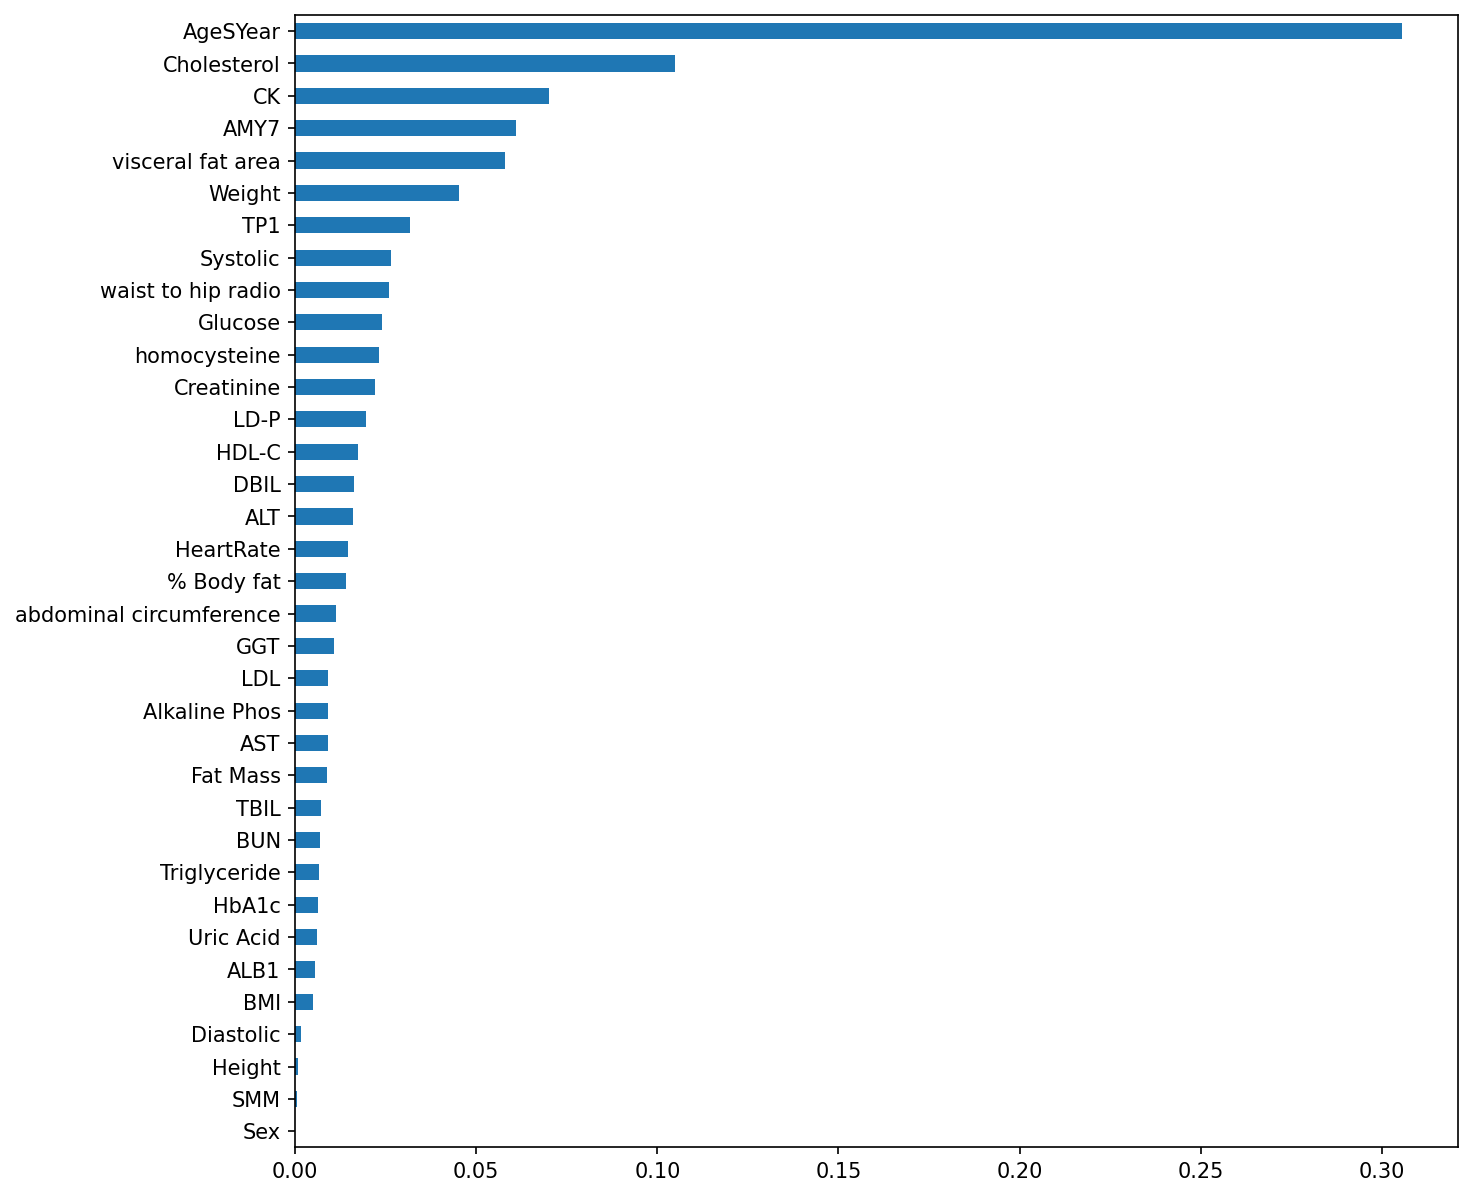

In [295]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A3

In [296]:
X=A3[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A3['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [297]:
Gradient.feature_importances_

array([0.00000000e+00, 7.29944716e-01, 4.05898753e-03, 2.49412866e-02,
       7.89810134e-04, 2.19119858e-02, 1.93561641e-03, 6.16633998e-04,
       9.30039587e-03, 5.97790835e-03, 9.28341500e-03, 1.53606446e-03,
       1.18622294e-03, 1.80910246e-02, 1.02666487e-02, 1.87004568e-02,
       1.15035426e-02, 2.91775937e-03, 1.46761065e-02, 7.22664635e-03,
       2.02816419e-02, 4.83450772e-03, 8.86312376e-03, 2.38447995e-02,
       8.91832134e-04, 4.58915576e-04, 2.03646533e-03, 3.89733083e-04,
       3.08357803e-03, 5.65455142e-03, 2.09334303e-03, 1.72188948e-04,
       6.33828302e-03, 2.28904443e-02, 3.30136407e-03])

In [298]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
Creatinine                 0.000172
Glucose                    0.000390
AST                        0.000459
% Body fat                 0.000617
BMI                        0.000790
ALT                        0.000892
HeartRate                  0.001186
Diastolic                  0.001536
Fat Mass                   0.001936
GGT                        0.002036
BUN                        0.002093
LDL                        0.002918
HbA1c                      0.003084
CK                         0.003301
Weight                     0.004059
TBIL                       0.004835
AMY7                       0.005655
waist to hip radio         0.005978
LD-P                       0.006338
TP1                        0.007227
DBIL                       0.008863
Systolic                   0.009283
abdominal circumference    0.009300
Cholesterol                0.010267
HDL-C                      0.011504
homocysteine               0.014676
visceral fat area          0

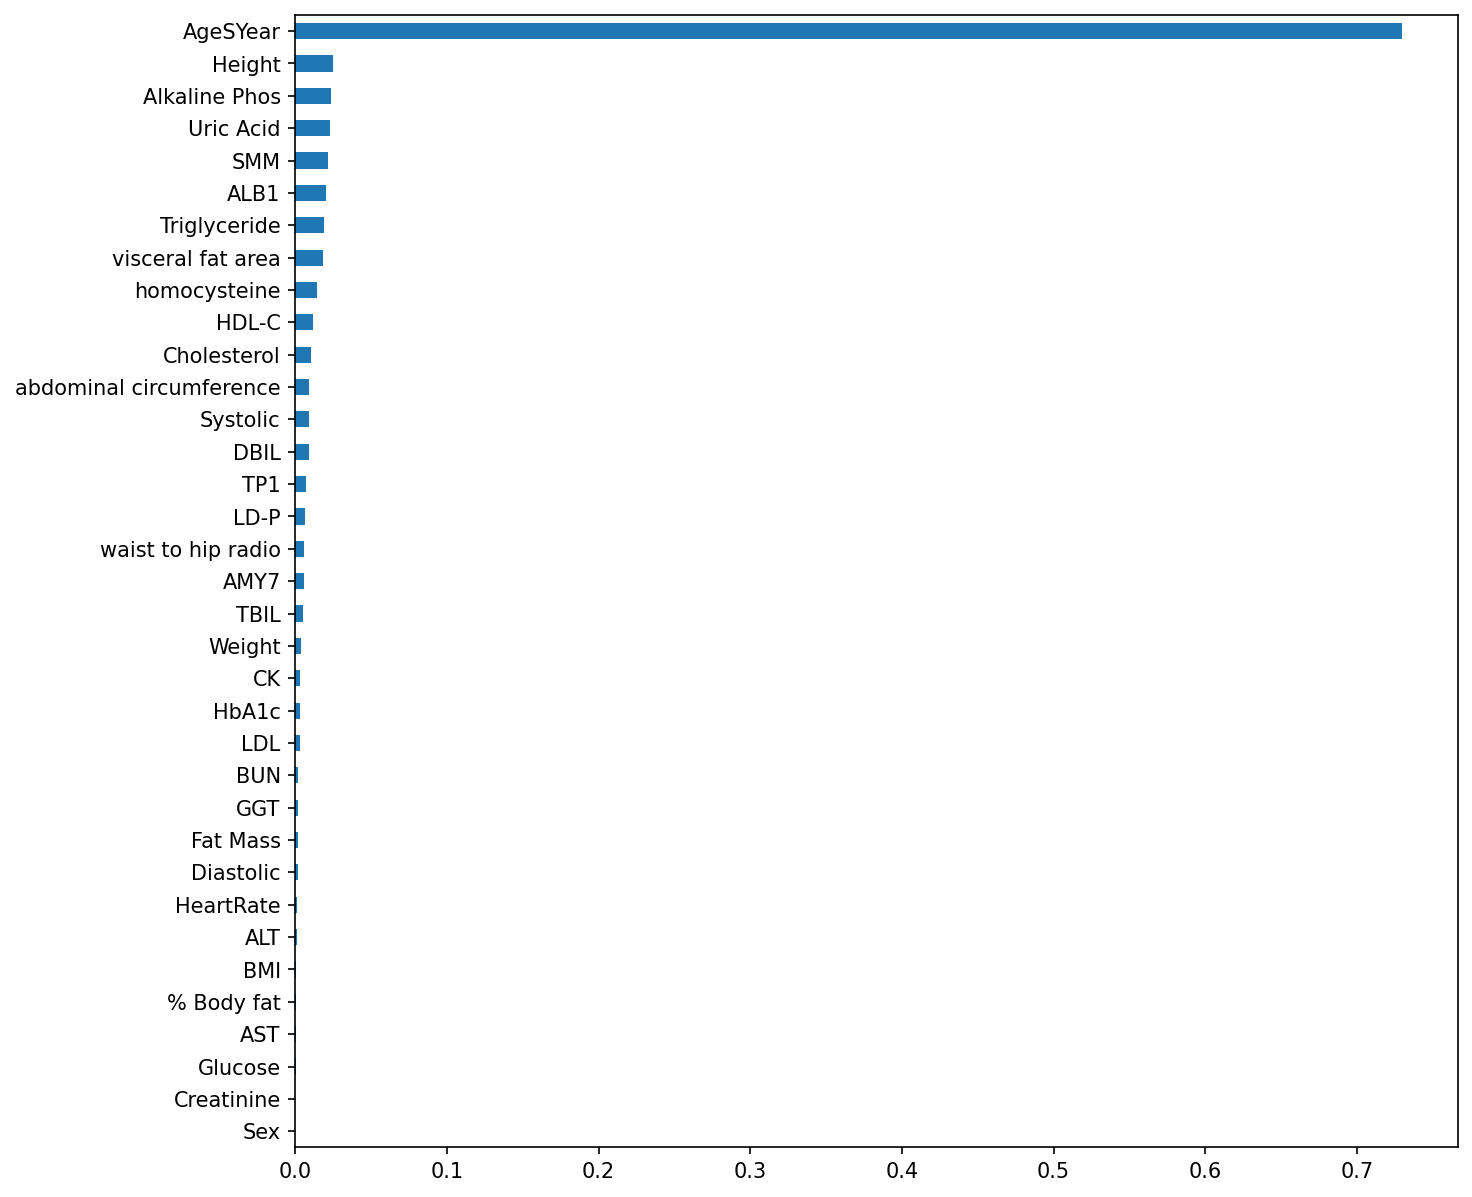

In [299]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A4

In [300]:
X=A4[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A4['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [301]:
Gradient.feature_importances_

array([0.00000000e+00, 7.33996827e-01, 6.77171720e-03, 2.19123425e-03,
       9.78421369e-04, 2.21437539e-02, 5.50970290e-03, 4.02191162e-03,
       9.93160984e-03, 3.20204840e-04, 1.19299214e-02, 1.41424767e-03,
       5.37317631e-04, 5.83095670e-03, 9.93911402e-03, 9.64616758e-03,
       5.94549816e-03, 1.91998674e-04, 2.23586174e-02, 3.02014331e-03,
       2.51282081e-02, 7.38531440e-03, 6.29460958e-03, 2.66673844e-02,
       3.69107580e-03, 1.16734059e-03, 3.79331485e-03, 5.93782712e-04,
       1.13782815e-02, 2.24658571e-02, 5.38339412e-04, 4.80025086e-04,
       8.51667989e-03, 2.04119480e-02, 4.80847263e-03])

In [302]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
LDL                        0.000192
waist to hip radio         0.000320
Creatinine                 0.000480
HeartRate                  0.000537
BUN                        0.000538
Glucose                    0.000594
BMI                        0.000978
AST                        0.001167
Diastolic                  0.001414
Height                     0.002191
TP1                        0.003020
ALT                        0.003691
GGT                        0.003793
% Body fat                 0.004022
CK                         0.004808
Fat Mass                   0.005510
visceral fat area          0.005831
HDL-C                      0.005945
DBIL                       0.006295
Weight                     0.006772
TBIL                       0.007385
LD-P                       0.008517
Triglyceride               0.009646
abdominal circumference    0.009932
Cholesterol                0.009939
HbA1c                      0.011378
Systolic                   0

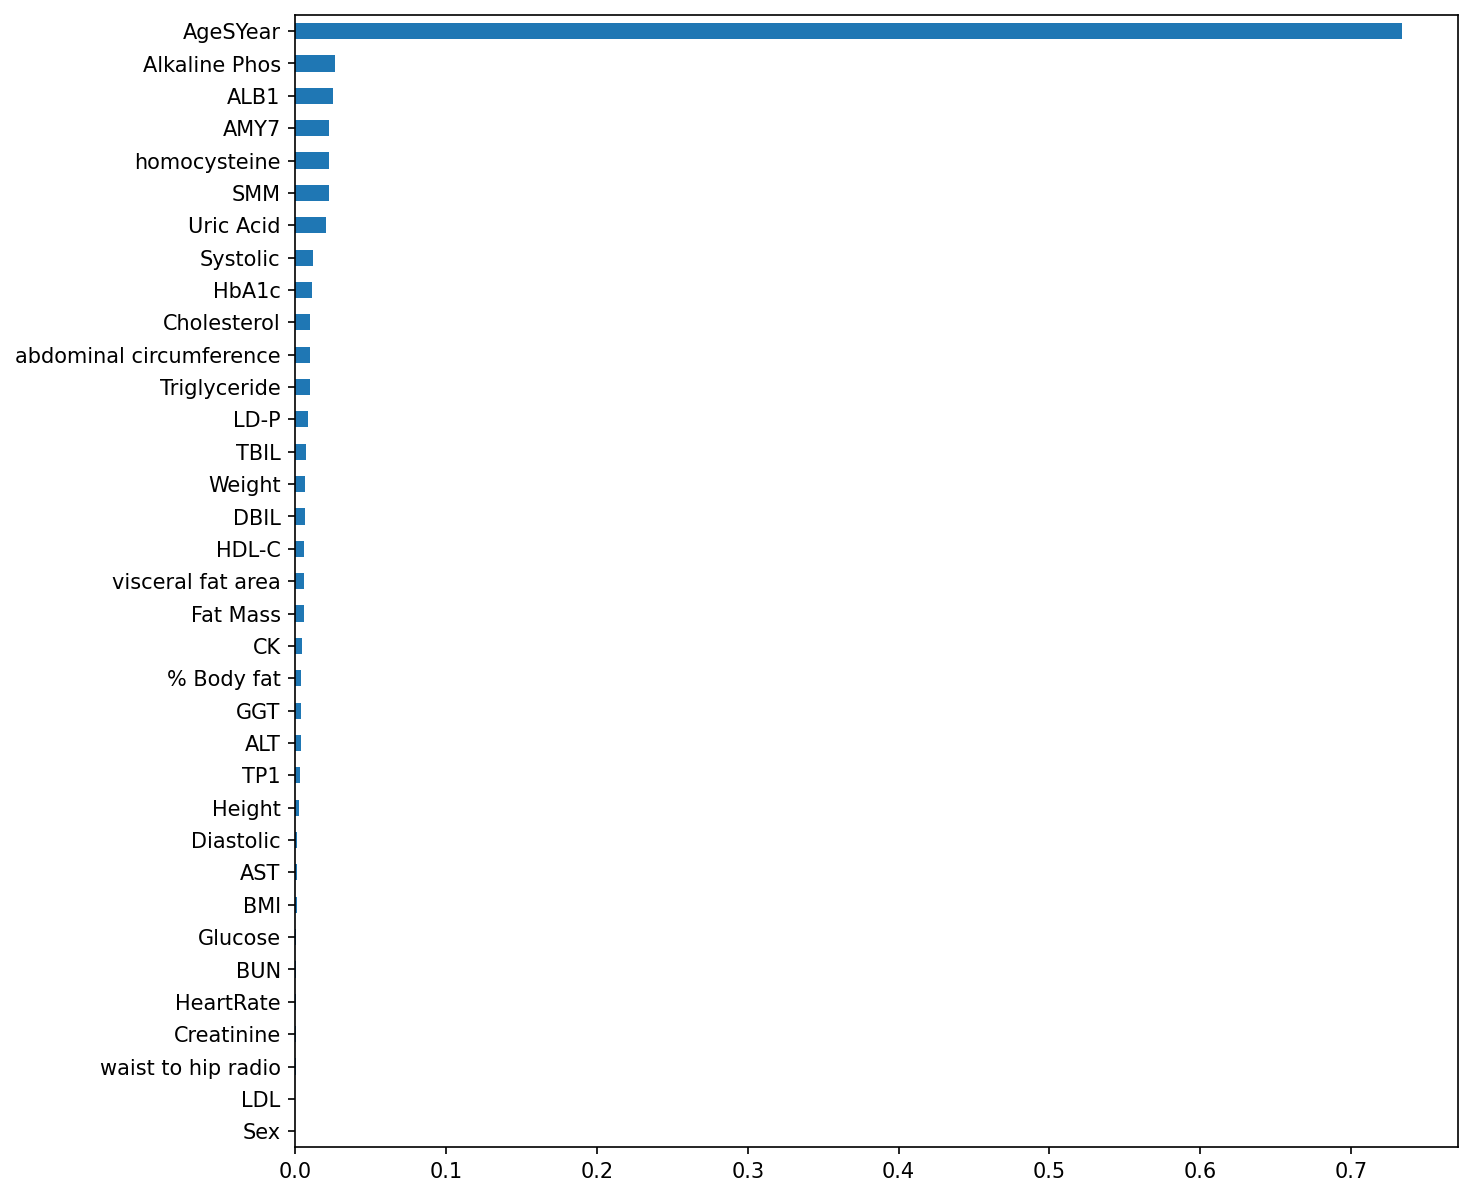

In [303]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A5

In [304]:
X=A5[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A5['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [305]:
Gradient.feature_importances_

array([1.03169825e-06, 7.31606726e-01, 2.28171751e-03, 2.62619679e-02,
       2.04800440e-03, 1.42139029e-02, 2.75748168e-03, 2.10686256e-03,
       2.01588276e-03, 1.29297242e-04, 8.49287390e-03, 2.02215466e-03,
       1.91570158e-03, 1.31081624e-02, 2.65552097e-02, 1.12420395e-02,
       1.11636504e-02, 1.21483970e-03, 2.21980010e-02, 4.81307382e-03,
       2.19919437e-02, 7.20762115e-03, 1.32254669e-02, 2.77975744e-02,
       1.27053374e-03, 1.44302775e-03, 1.99625911e-03, 4.04005307e-04,
       7.03990984e-03, 9.55837040e-03, 4.14833001e-04, 6.18526446e-04,
       5.97524298e-03, 8.80418227e-03, 6.10392209e-03])

In [306]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000001
waist to hip radio         0.000129
Glucose                    0.000404
BUN                        0.000415
Creatinine                 0.000619
LDL                        0.001215
ALT                        0.001271
AST                        0.001443
HeartRate                  0.001916
GGT                        0.001996
abdominal circumference    0.002016
Diastolic                  0.002022
BMI                        0.002048
% Body fat                 0.002107
Weight                     0.002282
Fat Mass                   0.002757
TP1                        0.004813
LD-P                       0.005975
CK                         0.006104
HbA1c                      0.007040
TBIL                       0.007208
Systolic                   0.008493
Uric Acid                  0.008804
AMY7                       0.009558
HDL-C                      0.011164
Triglyceride               0.011242
visceral fat area          0.013108
DBIL                       0

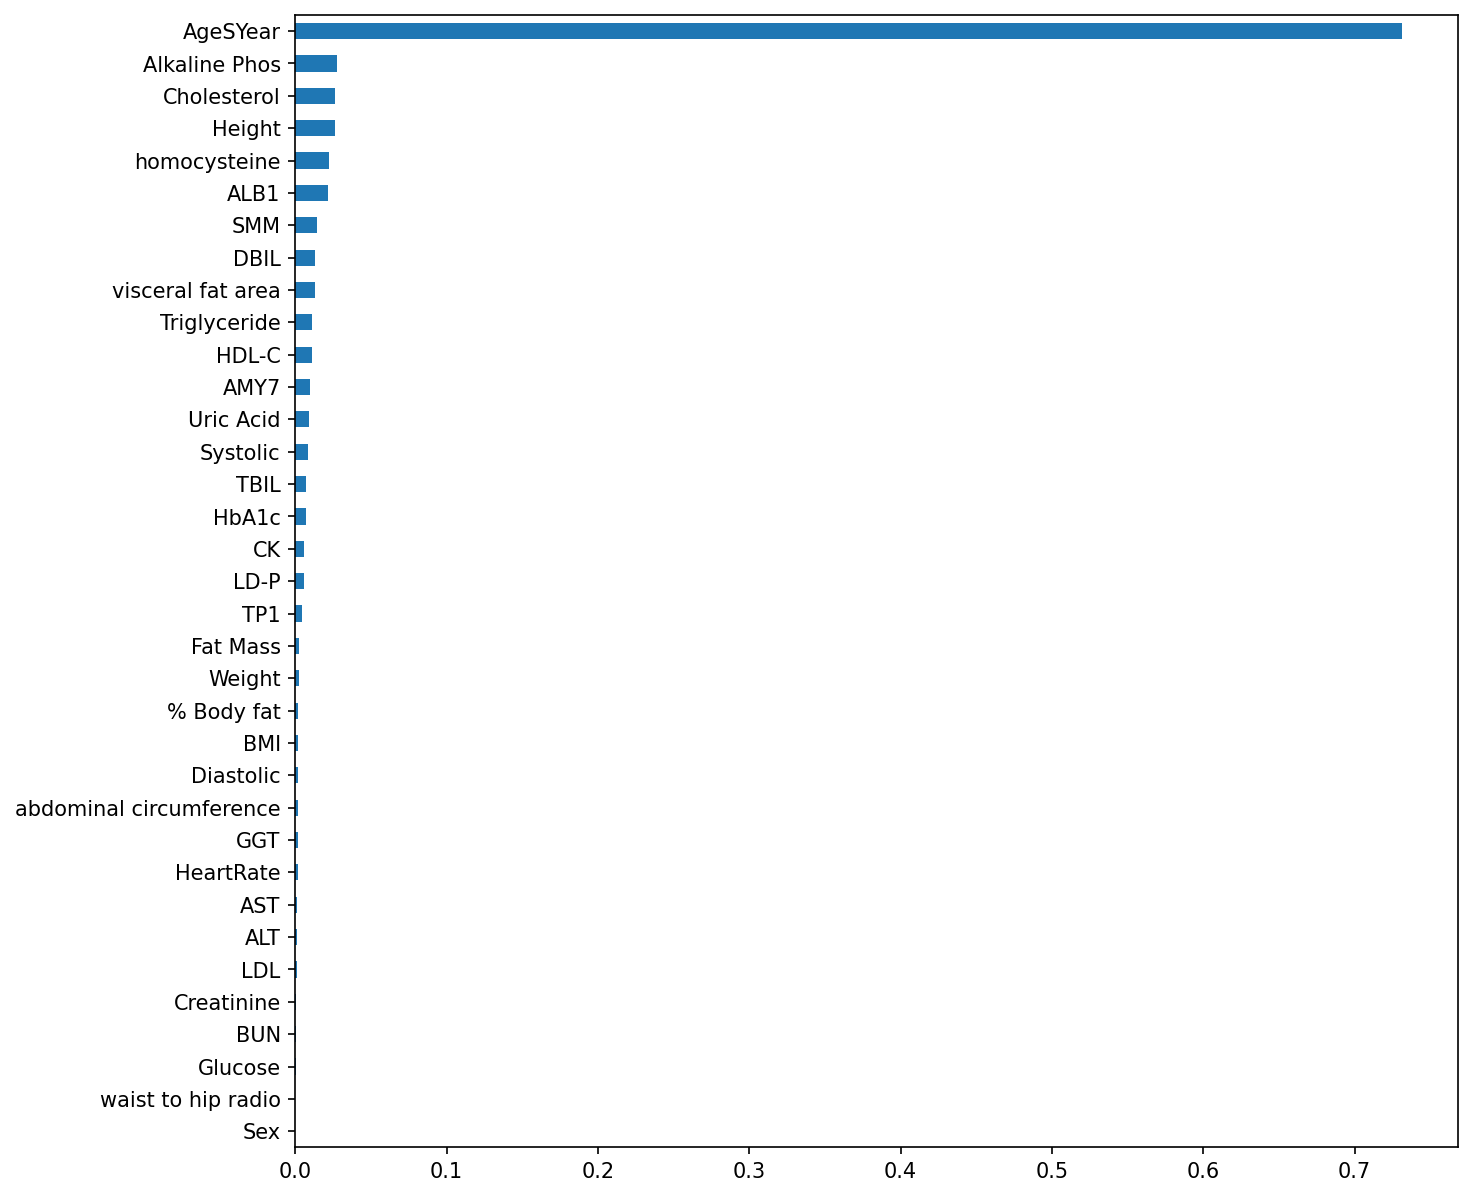

In [307]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A6

In [308]:
X=A6[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A6['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [309]:
Gradient.feature_importances_

array([5.94782669e-06, 7.33136423e-01, 1.17206489e-02, 4.43467705e-03,
       1.29359521e-03, 3.89825083e-02, 5.09934741e-04, 2.44162609e-03,
       3.23097536e-03, 6.50981110e-04, 1.52128107e-02, 6.17410011e-03,
       1.12365182e-04, 1.09128539e-02, 1.81444247e-02, 4.49477193e-03,
       6.09759555e-03, 1.26974198e-03, 1.52040874e-02, 7.93376131e-03,
       2.33794845e-02, 8.80807748e-03, 3.39699063e-03, 1.29103774e-02,
       1.35485450e-03, 1.09610635e-03, 9.62077153e-03, 5.54684032e-05,
       8.19488109e-03, 1.87663791e-02, 1.26498094e-03, 2.59546836e-05,
       5.90549096e-03, 1.50760677e-02, 8.18028384e-03])

In [310]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000006
Creatinine                 0.000026
Glucose                    0.000055
HeartRate                  0.000112
Fat Mass                   0.000510
waist to hip radio         0.000651
AST                        0.001096
BUN                        0.001265
LDL                        0.001270
BMI                        0.001294
ALT                        0.001355
% Body fat                 0.002442
abdominal circumference    0.003231
DBIL                       0.003397
Height                     0.004435
Triglyceride               0.004495
LD-P                       0.005905
HDL-C                      0.006098
Diastolic                  0.006174
TP1                        0.007934
CK                         0.008180
HbA1c                      0.008195
TBIL                       0.008808
GGT                        0.009621
visceral fat area          0.010913
Weight                     0.011721
Alkaline Phos              0.012910
Uric Acid                  0

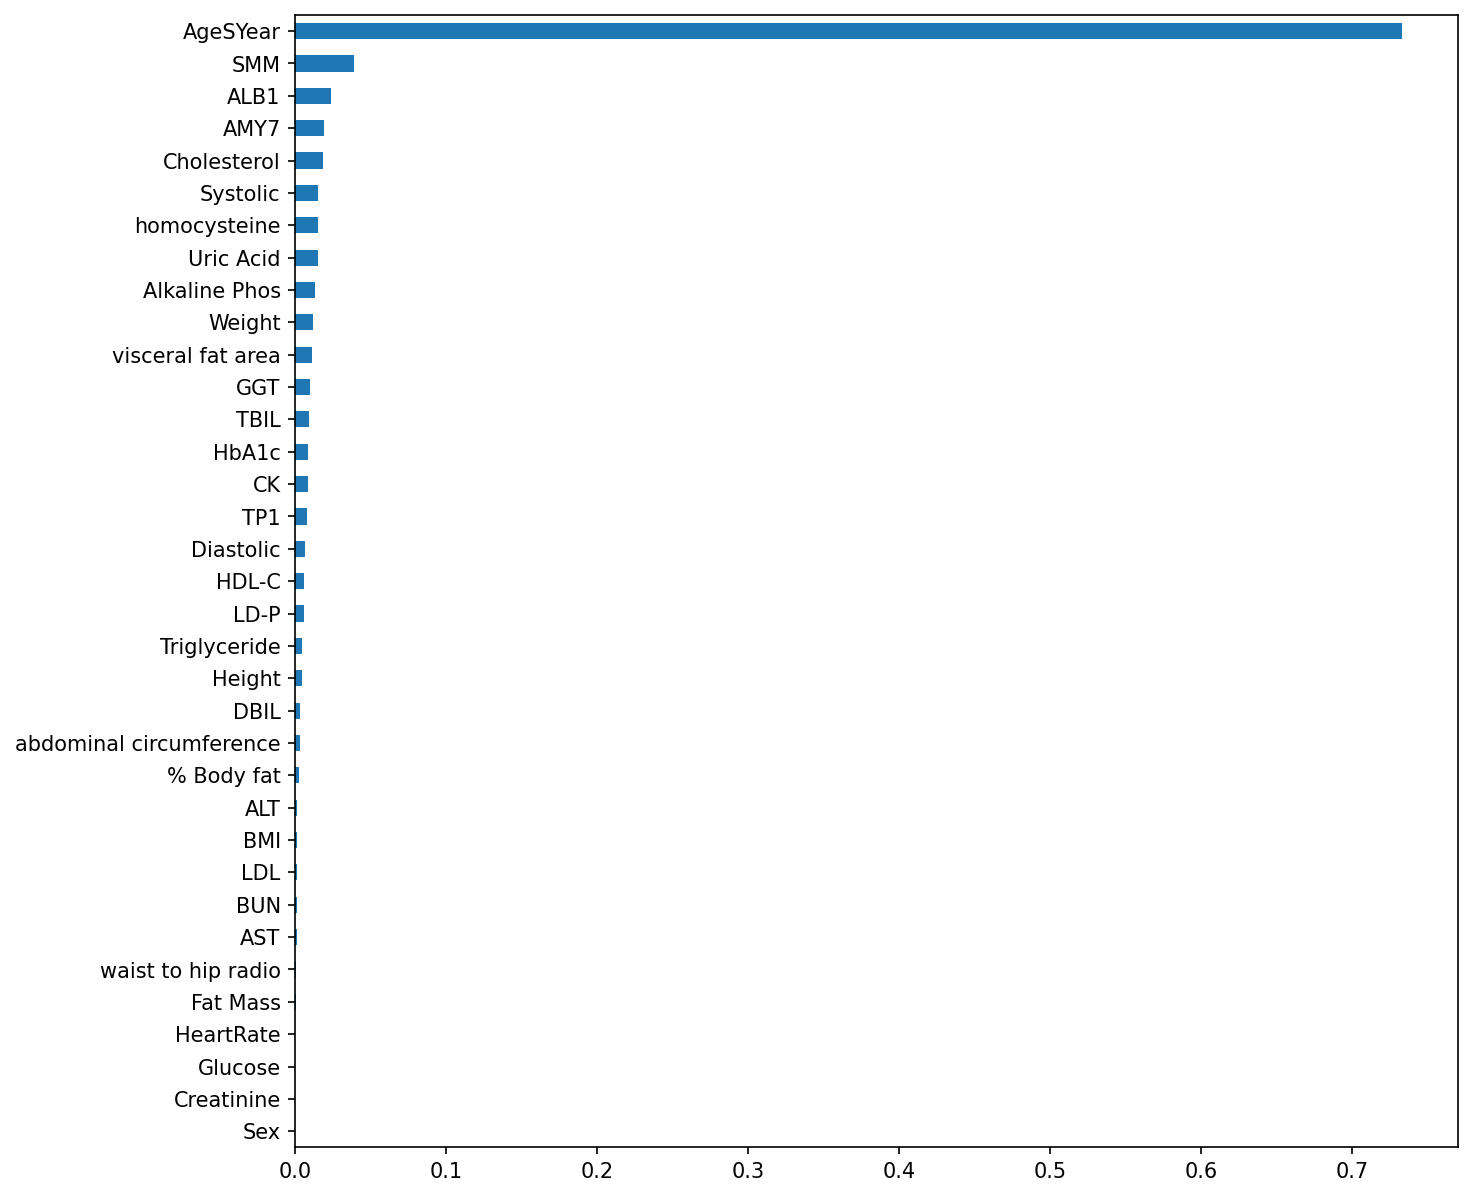

In [311]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A7

In [312]:
X=A7[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A7['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [313]:
Gradient.feature_importances_

array([0.00000000e+00, 7.36656593e-01, 2.58079654e-03, 6.65977944e-03,
       1.67104050e-03, 2.15466744e-02, 1.86175557e-03, 4.08217942e-03,
       1.26515418e-03, 4.36713103e-03, 9.27678443e-03, 3.05512357e-03,
       2.37372642e-04, 1.72129144e-02, 1.14251482e-02, 1.23224056e-02,
       6.66981726e-03, 1.36169504e-04, 1.22339735e-02, 7.47774704e-03,
       3.78331764e-02, 8.62612714e-03, 4.31181142e-03, 2.95229814e-02,
       1.16624443e-03, 1.21203348e-03, 4.25254397e-04, 7.21042908e-04,
       4.66760587e-03, 8.72169868e-03, 2.20605769e-03, 1.18740701e-03,
       1.41285659e-02, 1.91876815e-02, 5.34375188e-03])

In [314]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
LDL                        0.000136
HeartRate                  0.000237
GGT                        0.000425
Glucose                    0.000721
ALT                        0.001166
Creatinine                 0.001187
AST                        0.001212
abdominal circumference    0.001265
BMI                        0.001671
Fat Mass                   0.001862
BUN                        0.002206
Weight                     0.002581
Diastolic                  0.003055
% Body fat                 0.004082
DBIL                       0.004312
waist to hip radio         0.004367
HbA1c                      0.004668
CK                         0.005344
Height                     0.006660
HDL-C                      0.006670
TP1                        0.007478
TBIL                       0.008626
AMY7                       0.008722
Systolic                   0.009277
Cholesterol                0.011425
homocysteine               0.012234
Triglyceride               0

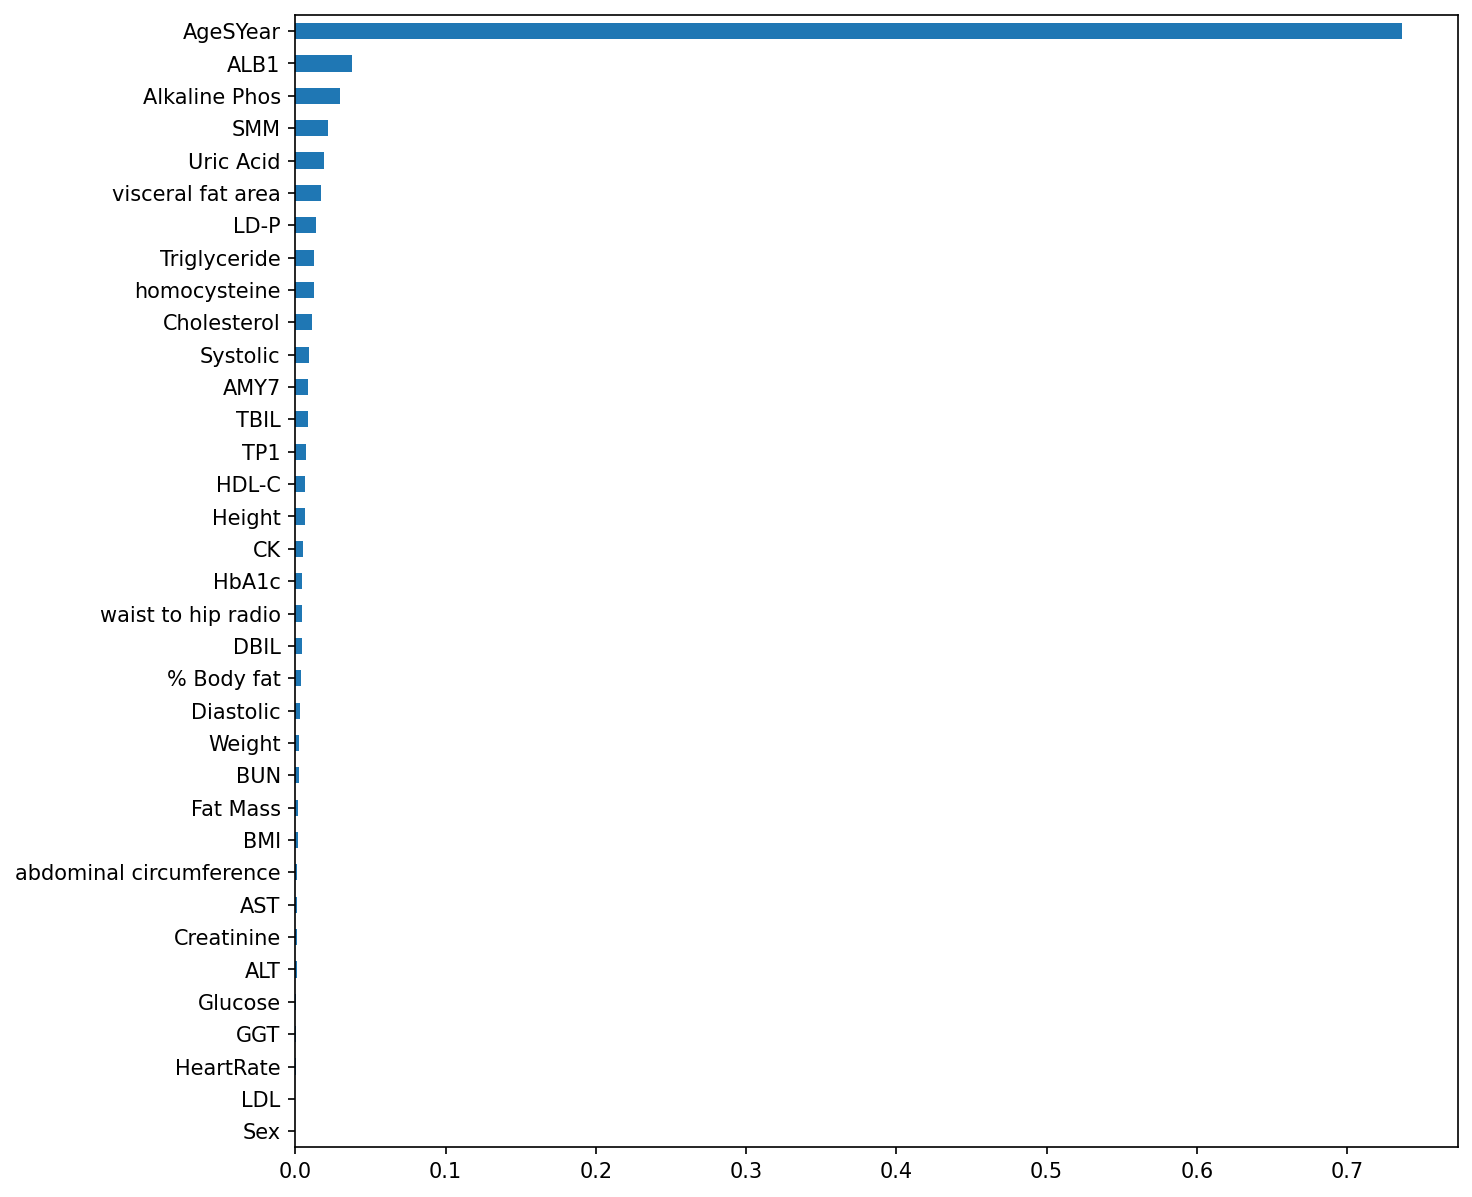

In [315]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A8

In [316]:
X=A8[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A8['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [317]:
Gradient.feature_importances_

array([1.30398425e-05, 7.19310137e-01, 5.71966828e-03, 2.42933750e-02,
       7.78730480e-04, 1.80706260e-02, 9.75387412e-04, 9.47125041e-04,
       1.36530240e-03, 1.26795708e-03, 7.33786292e-03, 2.39997957e-03,
       1.13524559e-04, 3.62713790e-03, 1.46647858e-02, 1.06915281e-02,
       6.36718181e-03, 1.49516799e-03, 5.01851924e-02, 2.15423206e-03,
       2.51616732e-02, 7.30528656e-03, 1.02499911e-02, 2.48597135e-02,
       1.71752564e-03, 1.16256911e-03, 3.17542826e-03, 8.61402434e-04,
       4.33375264e-03, 1.69667222e-02, 3.66698421e-03, 1.29739252e-04,
       4.52425613e-03, 1.66704172e-02, 7.43659743e-03])

In [318]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000013
HeartRate                  0.000114
Creatinine                 0.000130
BMI                        0.000779
Glucose                    0.000861
% Body fat                 0.000947
Fat Mass                   0.000975
AST                        0.001163
waist to hip radio         0.001268
abdominal circumference    0.001365
LDL                        0.001495
ALT                        0.001718
TP1                        0.002154
Diastolic                  0.002400
GGT                        0.003175
visceral fat area          0.003627
BUN                        0.003667
HbA1c                      0.004334
LD-P                       0.004524
Weight                     0.005720
HDL-C                      0.006367
TBIL                       0.007305
Systolic                   0.007338
CK                         0.007437
DBIL                       0.010250
Triglyceride               0.010692
Cholesterol                0.014665
Uric Acid                  0

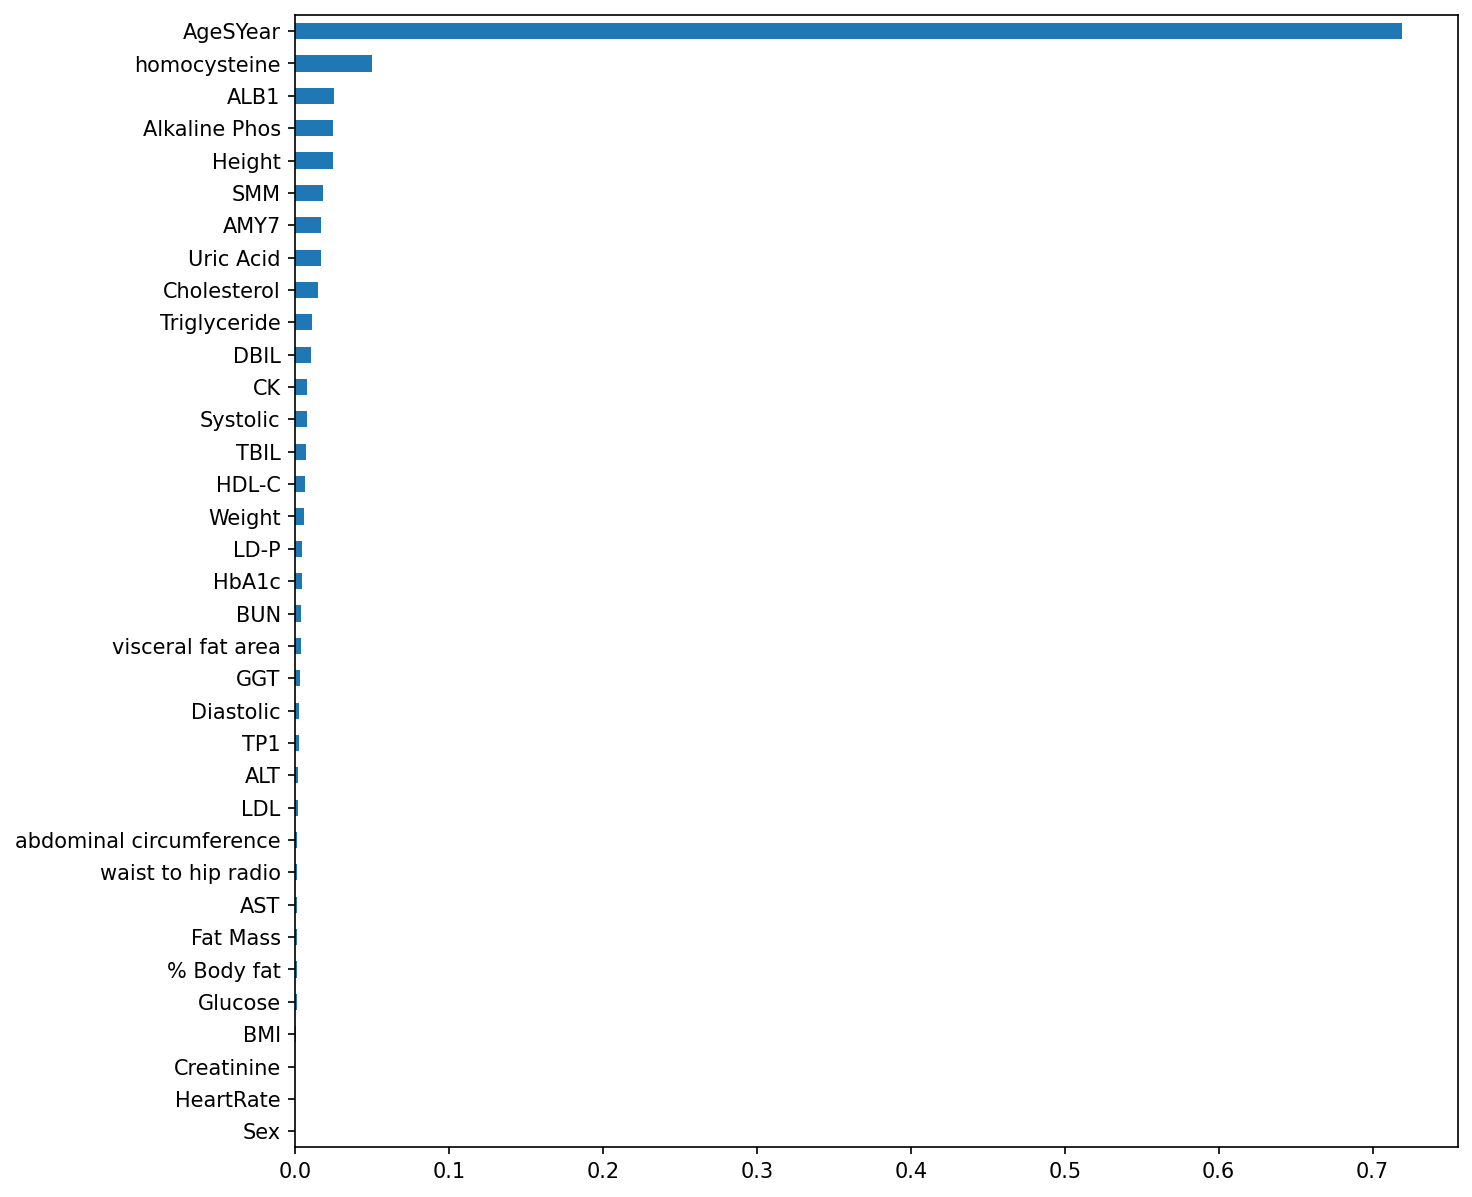

In [319]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A9

In [320]:
X=A9[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A9['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [321]:
Gradient.feature_importances_

array([2.56219951e-06, 7.13602534e-01, 1.16117785e-02, 6.56926930e-03,
       1.24243134e-03, 1.36272627e-02, 2.41563051e-03, 5.48505092e-03,
       2.20929050e-03, 5.76384363e-04, 1.25559682e-02, 4.42992243e-03,
       3.19928241e-04, 1.43325970e-02, 1.65054898e-02, 8.63375529e-03,
       8.48544951e-03, 1.40419375e-03, 2.07544728e-02, 3.73715694e-03,
       2.59885307e-02, 2.78339407e-03, 4.97308055e-03, 3.30488795e-02,
       1.28830964e-03, 2.08905605e-03, 2.56605107e-03, 1.15371974e-03,
       2.83058920e-03, 1.88550244e-02, 1.61416334e-03, 1.82856967e-03,
       7.48373730e-03, 3.94805549e-02, 5.51521177e-03])

In [322]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000003
HeartRate                  0.000320
waist to hip radio         0.000576
Glucose                    0.001154
BMI                        0.001242
ALT                        0.001288
LDL                        0.001404
BUN                        0.001614
Creatinine                 0.001829
AST                        0.002089
abdominal circumference    0.002209
Fat Mass                   0.002416
GGT                        0.002566
TBIL                       0.002783
HbA1c                      0.002831
TP1                        0.003737
Diastolic                  0.004430
DBIL                       0.004973
% Body fat                 0.005485
CK                         0.005515
Height                     0.006569
LD-P                       0.007484
HDL-C                      0.008485
Triglyceride               0.008634
Weight                     0.011612
Systolic                   0.012556
SMM                        0.013627
visceral fat area          0

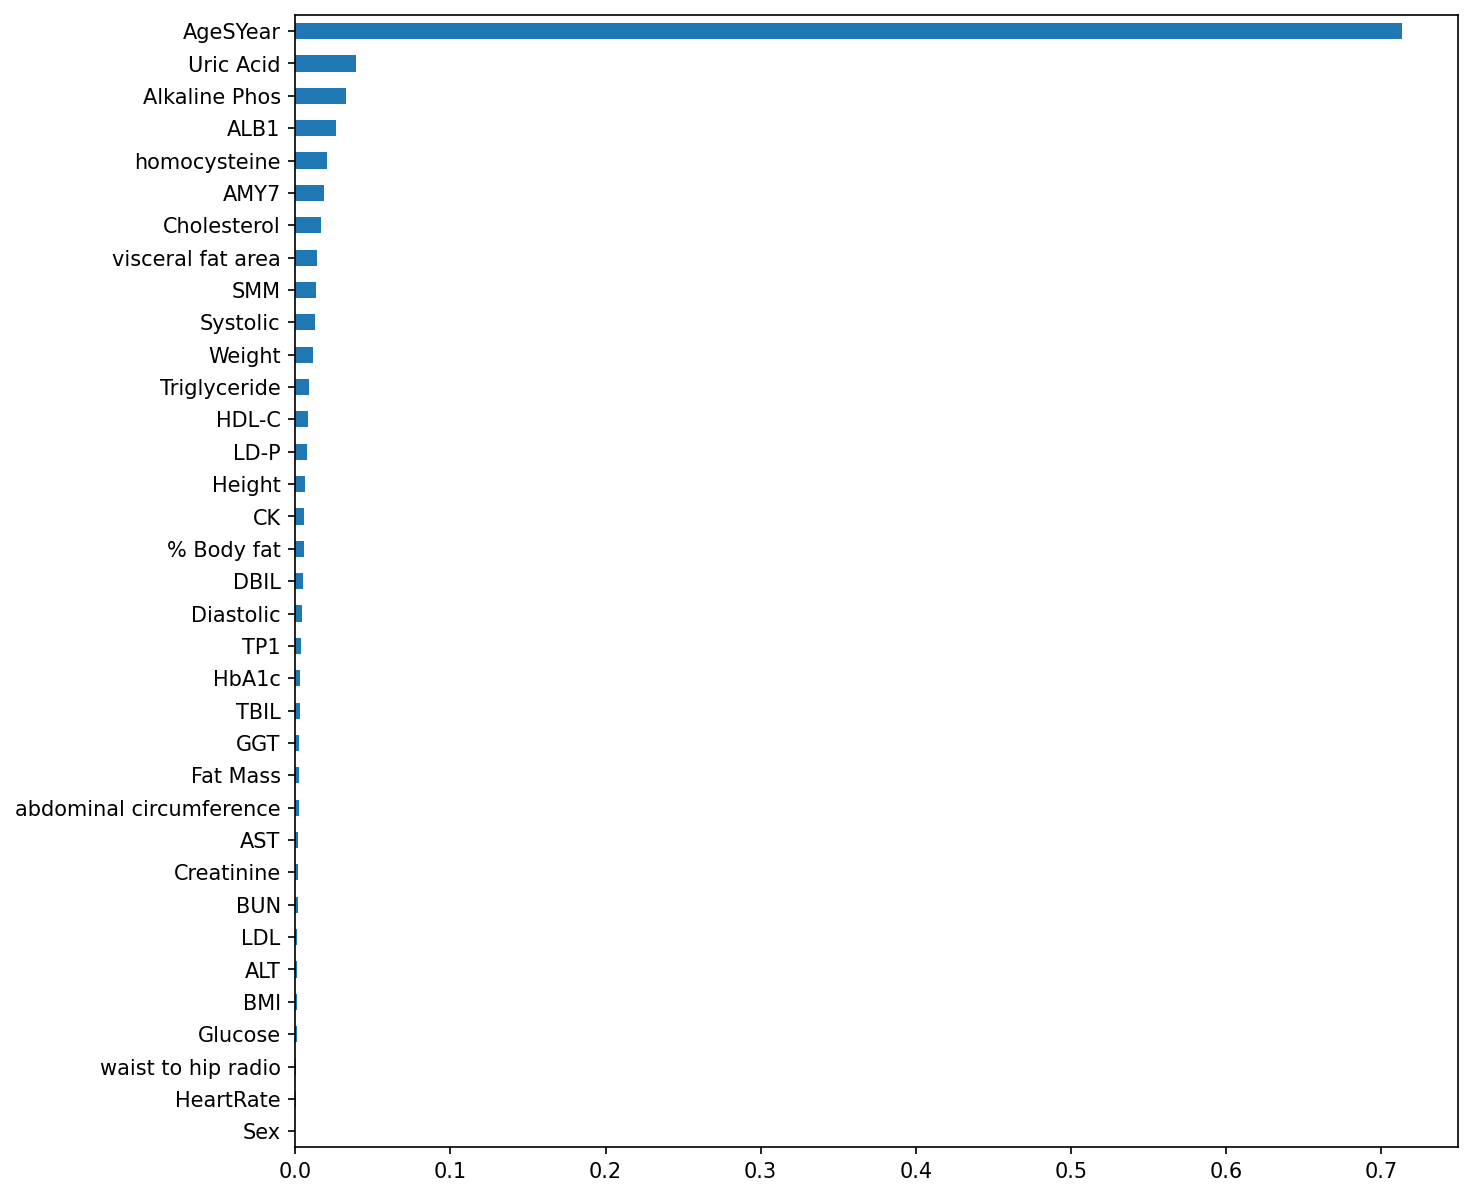

In [323]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A10

In [324]:
X=A10[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A10['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [325]:
Gradient.feature_importances_

array([3.03516225e-03, 7.24179682e-01, 2.70644952e-03, 8.89452262e-03,
       1.29387120e-03, 2.15814306e-02, 2.17297250e-03, 1.67773259e-03,
       1.01909912e-02, 7.80796567e-04, 4.81492950e-03, 1.15826735e-03,
       3.67914444e-04, 1.58440962e-02, 1.65992352e-02, 2.49638810e-03,
       9.34302675e-03, 2.20450299e-04, 2.17156628e-02, 1.02411976e-02,
       2.65611499e-02, 5.91041696e-03, 2.68352361e-03, 2.80220386e-02,
       2.09293004e-03, 1.11419830e-03, 3.01050595e-03, 1.13762204e-03,
       2.89828390e-03, 1.82999960e-02, 1.61993513e-03, 5.20499990e-03,
       1.71197582e-02, 2.37958608e-02, 1.21400075e-03])

In [326]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

LDL                        0.000220
HeartRate                  0.000368
waist to hip radio         0.000781
AST                        0.001114
Glucose                    0.001138
Diastolic                  0.001158
CK                         0.001214
BMI                        0.001294
BUN                        0.001620
% Body fat                 0.001678
ALT                        0.002093
Fat Mass                   0.002173
Triglyceride               0.002496
DBIL                       0.002684
Weight                     0.002706
HbA1c                      0.002898
GGT                        0.003011
Sex                        0.003035
Systolic                   0.004815
Creatinine                 0.005205
TBIL                       0.005910
Height                     0.008895
HDL-C                      0.009343
abdominal circumference    0.010191
TP1                        0.010241
visceral fat area          0.015844
Cholesterol                0.016599
LD-P                       0

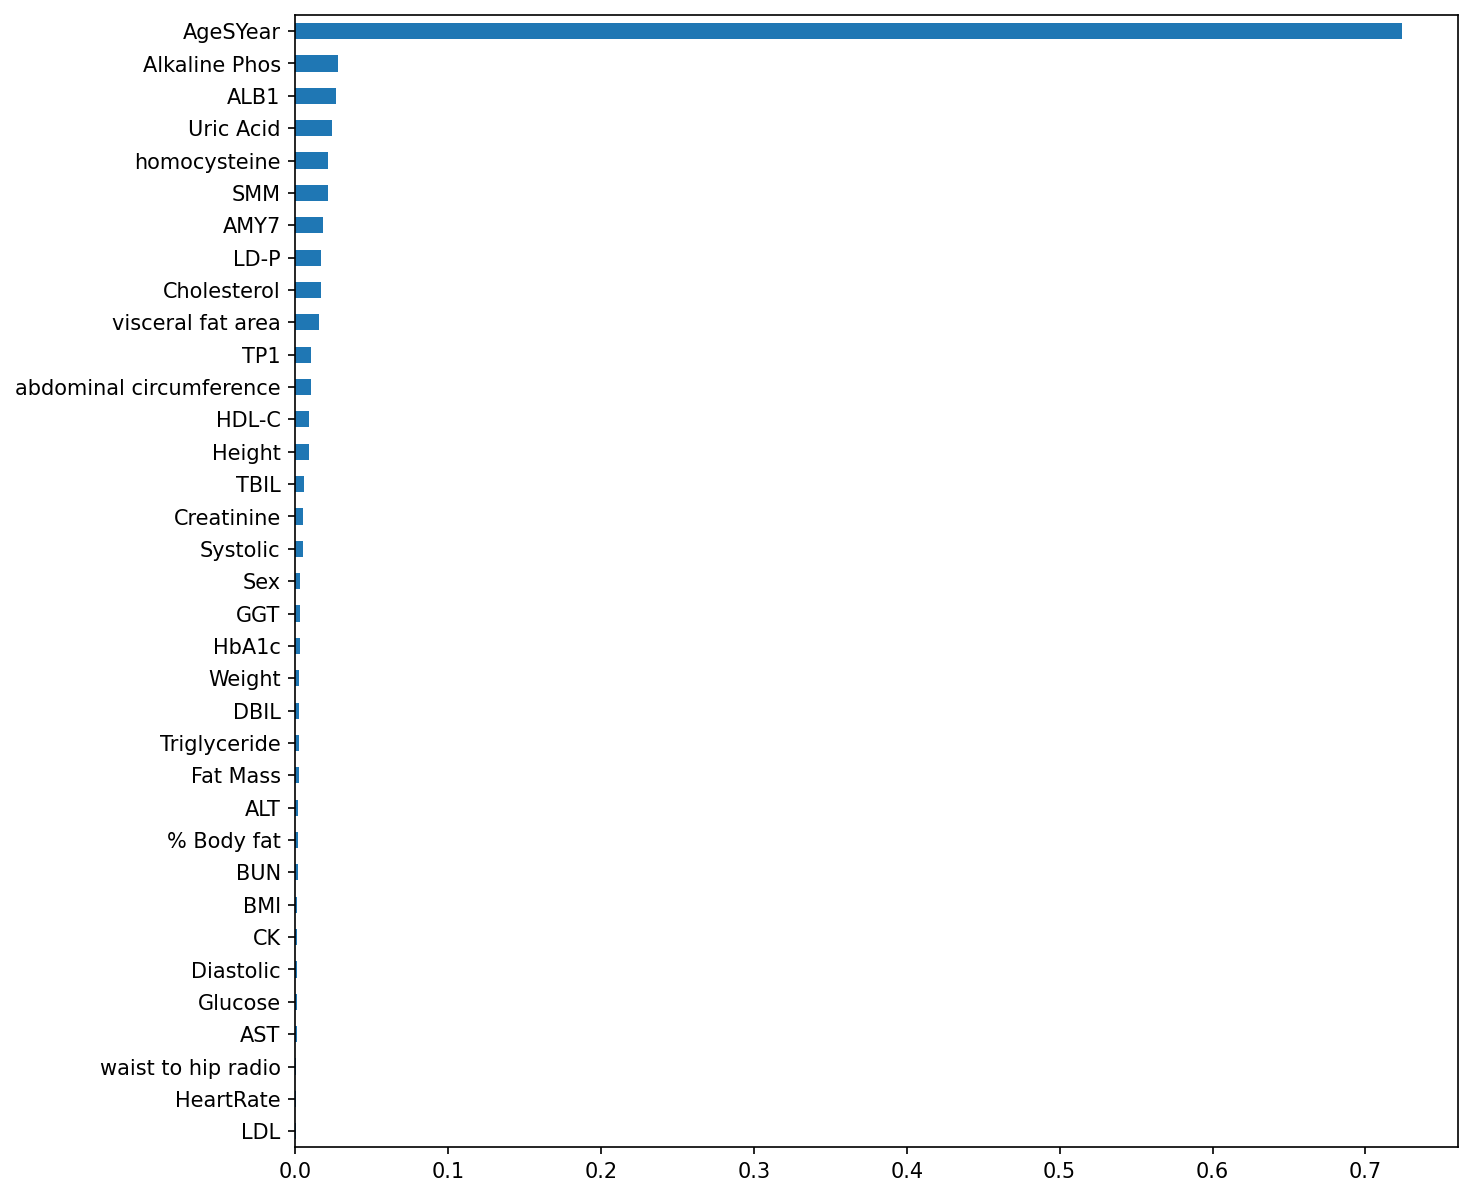

In [327]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A11

In [328]:
X=A11[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A11['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [329]:
Gradient.feature_importances_

array([0.00000000e+00, 7.44832957e-01, 7.01265480e-03, 4.45954088e-03,
       1.77099613e-04, 2.87935507e-02, 2.23132991e-03, 5.26967558e-03,
       2.14660779e-03, 2.48301870e-03, 4.73142049e-03, 3.18437056e-03,
       1.94722370e-03, 9.43844675e-03, 1.66166074e-02, 1.11816954e-02,
       4.61938061e-03, 1.49869317e-03, 2.50875371e-02, 1.05067010e-02,
       2.10039430e-02, 1.01415178e-02, 6.55573230e-03, 1.77830767e-02,
       7.48817831e-04, 1.07101418e-03, 3.27799545e-03, 9.49377722e-04,
       5.42132510e-03, 8.01385122e-03, 1.15195526e-03, 1.66782065e-03,
       1.00171032e-02, 1.77860954e-02, 8.19186318e-03])

In [330]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
BMI                        0.000177
ALT                        0.000749
Glucose                    0.000949
AST                        0.001071
BUN                        0.001152
LDL                        0.001499
Creatinine                 0.001668
HeartRate                  0.001947
abdominal circumference    0.002147
Fat Mass                   0.002231
waist to hip radio         0.002483
Diastolic                  0.003184
GGT                        0.003278
Height                     0.004460
HDL-C                      0.004619
Systolic                   0.004731
% Body fat                 0.005270
HbA1c                      0.005421
DBIL                       0.006556
Weight                     0.007013
AMY7                       0.008014
CK                         0.008192
visceral fat area          0.009438
LD-P                       0.010017
TBIL                       0.010142
TP1                        0.010507
Triglyceride               0

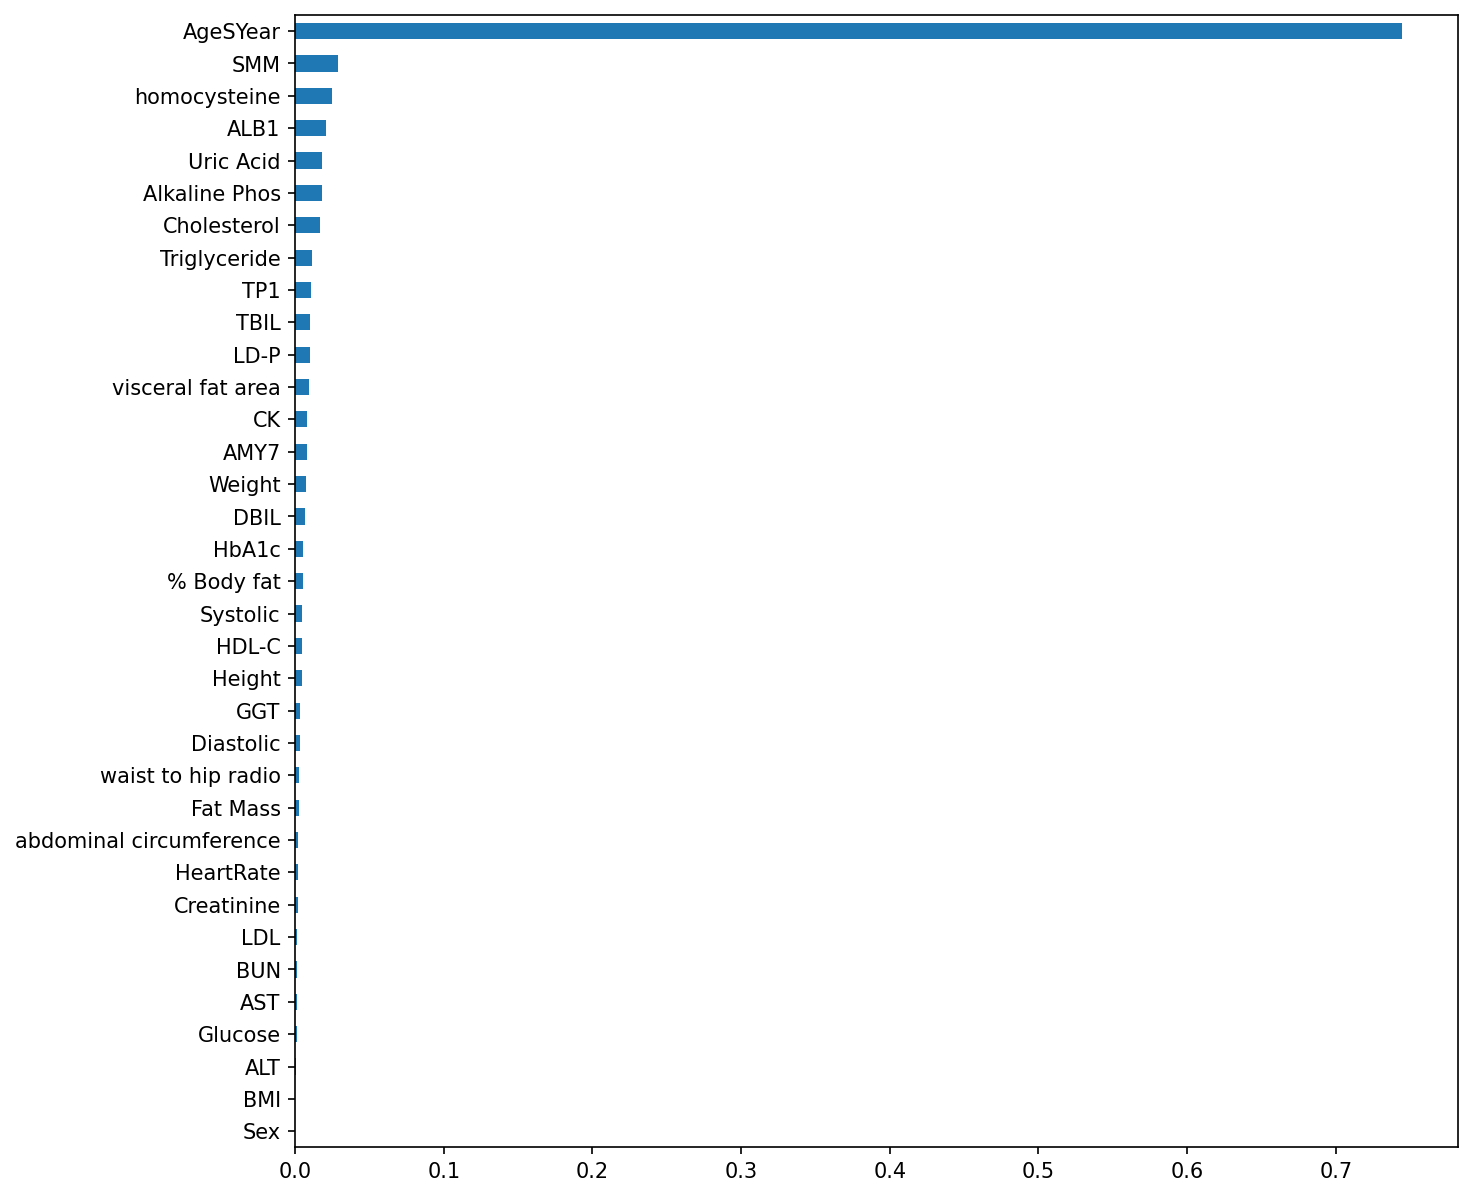

In [331]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A12

In [332]:
X=A12[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A12['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [333]:
Gradient.feature_importances_

array([0.00000000e+00, 7.27025442e-01, 1.21240173e-02, 3.88860324e-03,
       3.33092589e-04, 1.60924547e-02, 3.42856052e-03, 7.04007320e-03,
       4.48952011e-03, 1.02760691e-03, 3.86677267e-03, 1.07096111e-03,
       8.54315487e-04, 1.19378192e-02, 1.66659978e-02, 3.08627700e-03,
       9.54391220e-03, 1.30804935e-03, 3.42515513e-02, 9.20227463e-03,
       2.74063576e-02, 8.85446258e-03, 3.34418902e-03, 2.88532772e-02,
       1.40897626e-03, 5.08871784e-04, 5.43255364e-03, 1.23496592e-03,
       2.42941094e-03, 1.40808254e-02, 7.84244400e-04, 6.70005373e-03,
       9.13345362e-03, 1.69477586e-02, 5.64329765e-03])

In [334]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
BMI                        0.000333
AST                        0.000509
BUN                        0.000784
HeartRate                  0.000854
waist to hip radio         0.001028
Diastolic                  0.001071
Glucose                    0.001235
LDL                        0.001308
ALT                        0.001409
HbA1c                      0.002429
Triglyceride               0.003086
DBIL                       0.003344
Fat Mass                   0.003429
Systolic                   0.003867
Height                     0.003889
abdominal circumference    0.004490
GGT                        0.005433
CK                         0.005643
Creatinine                 0.006700
% Body fat                 0.007040
TBIL                       0.008854
LD-P                       0.009133
TP1                        0.009202
HDL-C                      0.009544
visceral fat area          0.011938
Weight                     0.012124
AMY7                       0

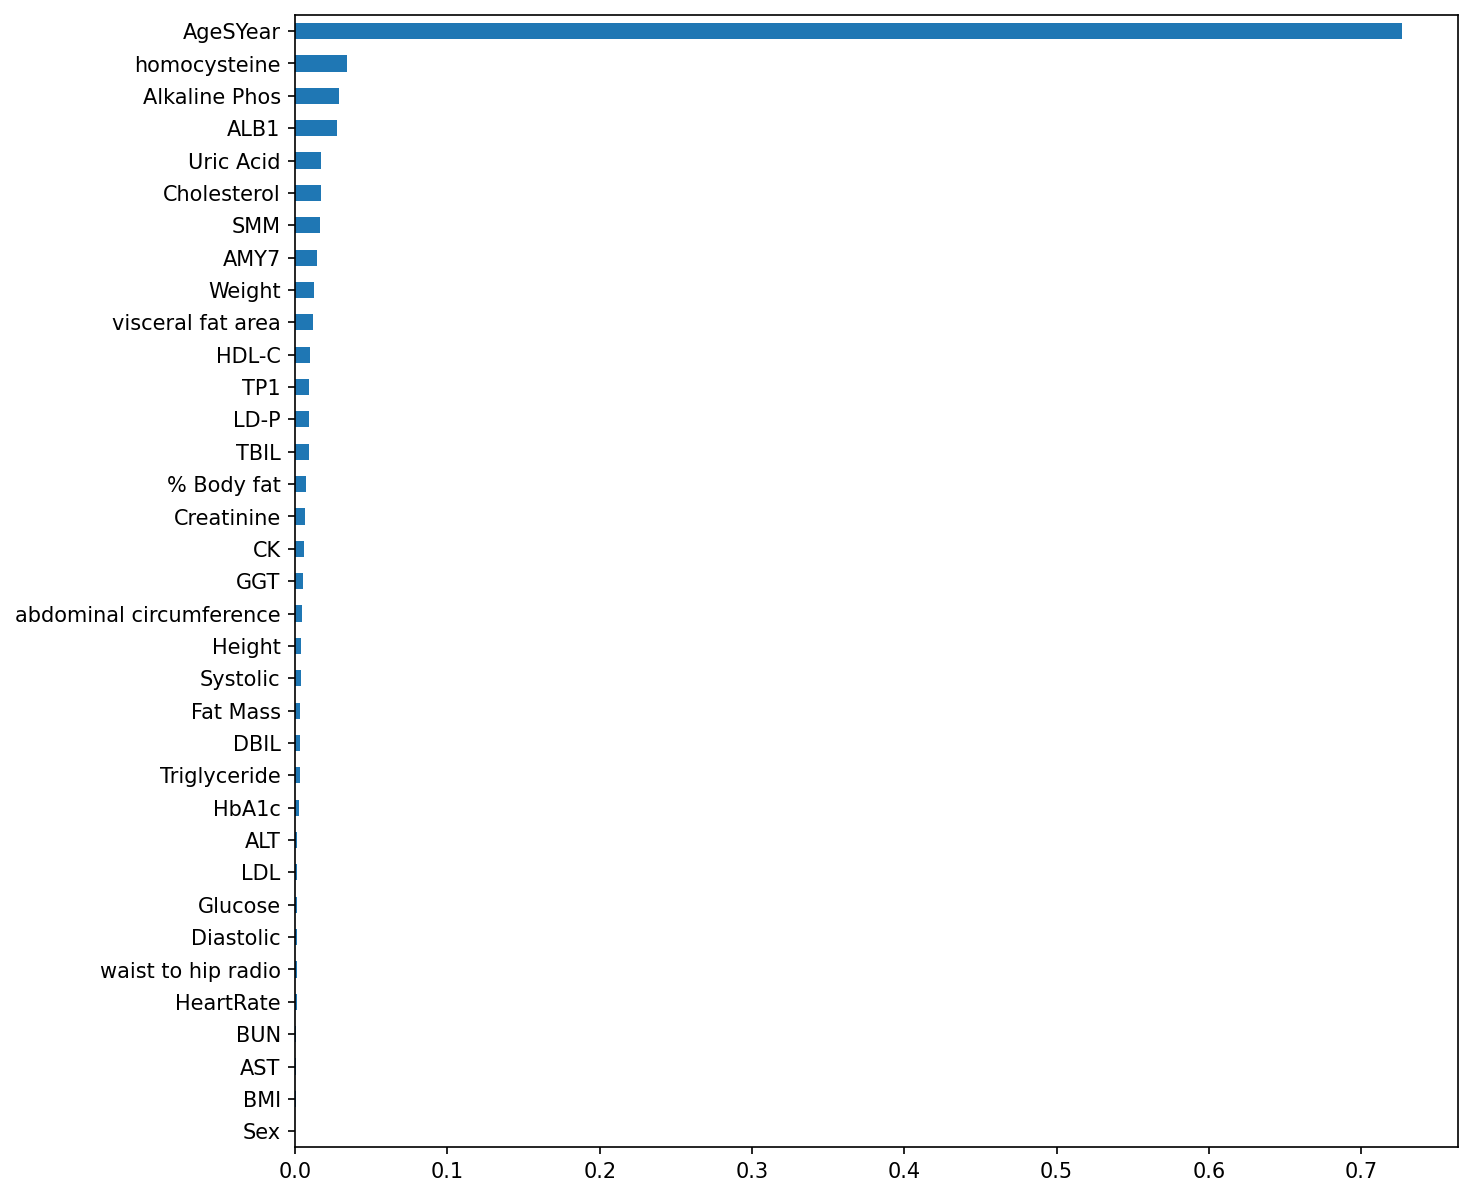

In [335]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A13

In [336]:
X=A13[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A13['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [337]:
Gradient.feature_importances_

array([0.00000000e+00, 7.19716750e-01, 1.05136779e-02, 1.32361399e-02,
       1.69323646e-03, 5.49264561e-03, 2.28638269e-03, 7.04123596e-03,
       3.28948153e-03, 4.62782866e-04, 9.43596062e-03, 2.30941508e-03,
       3.69124439e-04, 1.15292814e-02, 1.84630757e-02, 1.13153296e-02,
       8.67356636e-03, 6.78138671e-05, 2.91795886e-02, 6.79008261e-03,
       2.48791645e-02, 6.08807053e-03, 8.23987002e-03, 3.63095462e-02,
       1.96958282e-03, 3.05749880e-03, 2.82663897e-03, 1.16886393e-04,
       9.13585518e-04, 1.63836771e-02, 1.53435329e-03, 1.91928781e-03,
       6.83793794e-03, 2.34887896e-02, 3.56953934e-03])

In [338]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
LDL                        0.000068
Glucose                    0.000117
HeartRate                  0.000369
waist to hip radio         0.000463
HbA1c                      0.000914
BUN                        0.001534
BMI                        0.001693
Creatinine                 0.001919
ALT                        0.001970
Fat Mass                   0.002286
Diastolic                  0.002309
GGT                        0.002827
AST                        0.003057
abdominal circumference    0.003289
CK                         0.003570
SMM                        0.005493
TBIL                       0.006088
TP1                        0.006790
LD-P                       0.006838
% Body fat                 0.007041
DBIL                       0.008240
HDL-C                      0.008674
Systolic                   0.009436
Weight                     0.010514
Triglyceride               0.011315
visceral fat area          0.011529
Height                     0

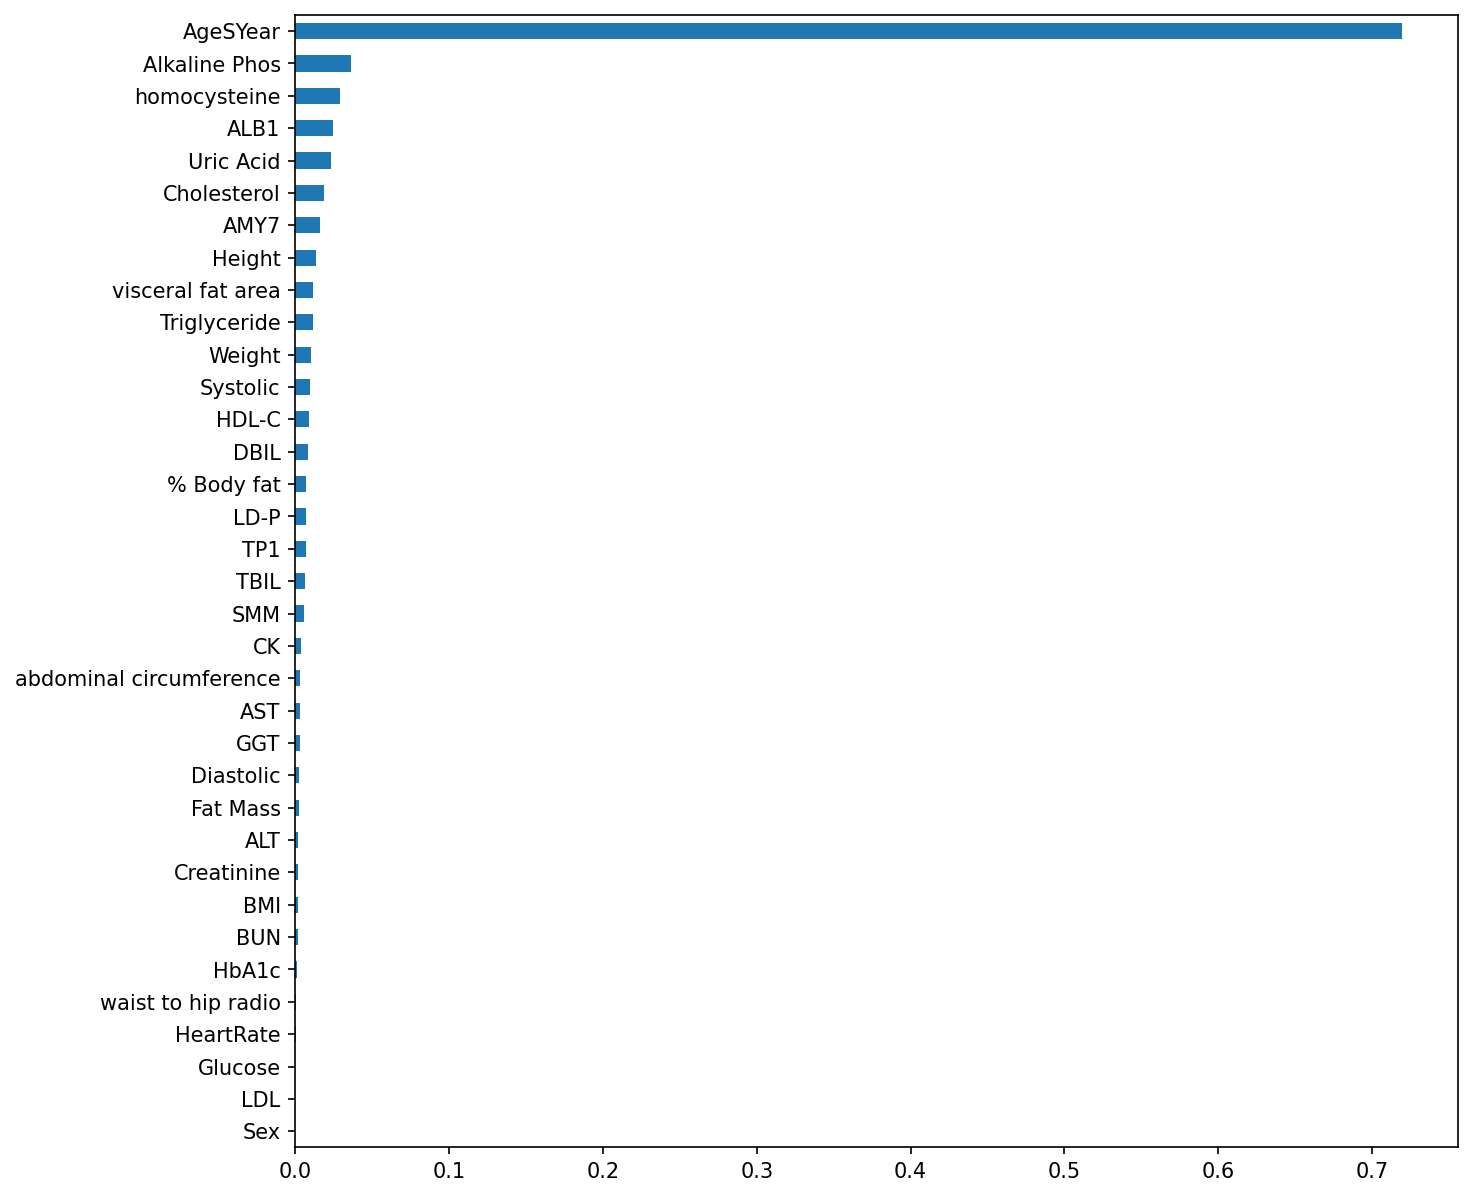

In [339]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A14

In [340]:
X=A14[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A14['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [341]:
Gradient.feature_importances_

array([6.44889955e-03, 7.26147169e-01, 1.54198746e-03, 8.30381073e-03,
       1.09746012e-03, 1.98831889e-02, 1.01100873e-02, 3.31975363e-03,
       1.52507560e-03, 7.47458892e-04, 1.35372572e-02, 2.09799932e-03,
       5.26779159e-04, 6.42709608e-03, 1.83631636e-02, 8.13195439e-03,
       4.83937329e-03, 8.15189366e-04, 3.86039661e-02, 2.53272325e-03,
       1.57054208e-02, 6.97035972e-03, 7.01096592e-03, 1.98801182e-02,
       1.67685111e-03, 1.72993861e-03, 4.45235454e-03, 5.13758591e-04,
       1.30429681e-02, 9.22026594e-03, 1.14042457e-03, 6.17871083e-04,
       1.48105293e-02, 2.67489204e-02, 1.47885995e-03])

In [342]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Glucose                    0.000514
HeartRate                  0.000527
Creatinine                 0.000618
waist to hip radio         0.000747
LDL                        0.000815
BMI                        0.001097
BUN                        0.001140
CK                         0.001479
abdominal circumference    0.001525
Weight                     0.001542
ALT                        0.001677
AST                        0.001730
Diastolic                  0.002098
TP1                        0.002533
% Body fat                 0.003320
GGT                        0.004452
HDL-C                      0.004839
visceral fat area          0.006427
Sex                        0.006449
TBIL                       0.006970
DBIL                       0.007011
Triglyceride               0.008132
Height                     0.008304
AMY7                       0.009220
Fat Mass                   0.010110
HbA1c                      0.013043
Systolic                   0.013537
LD-P                       0

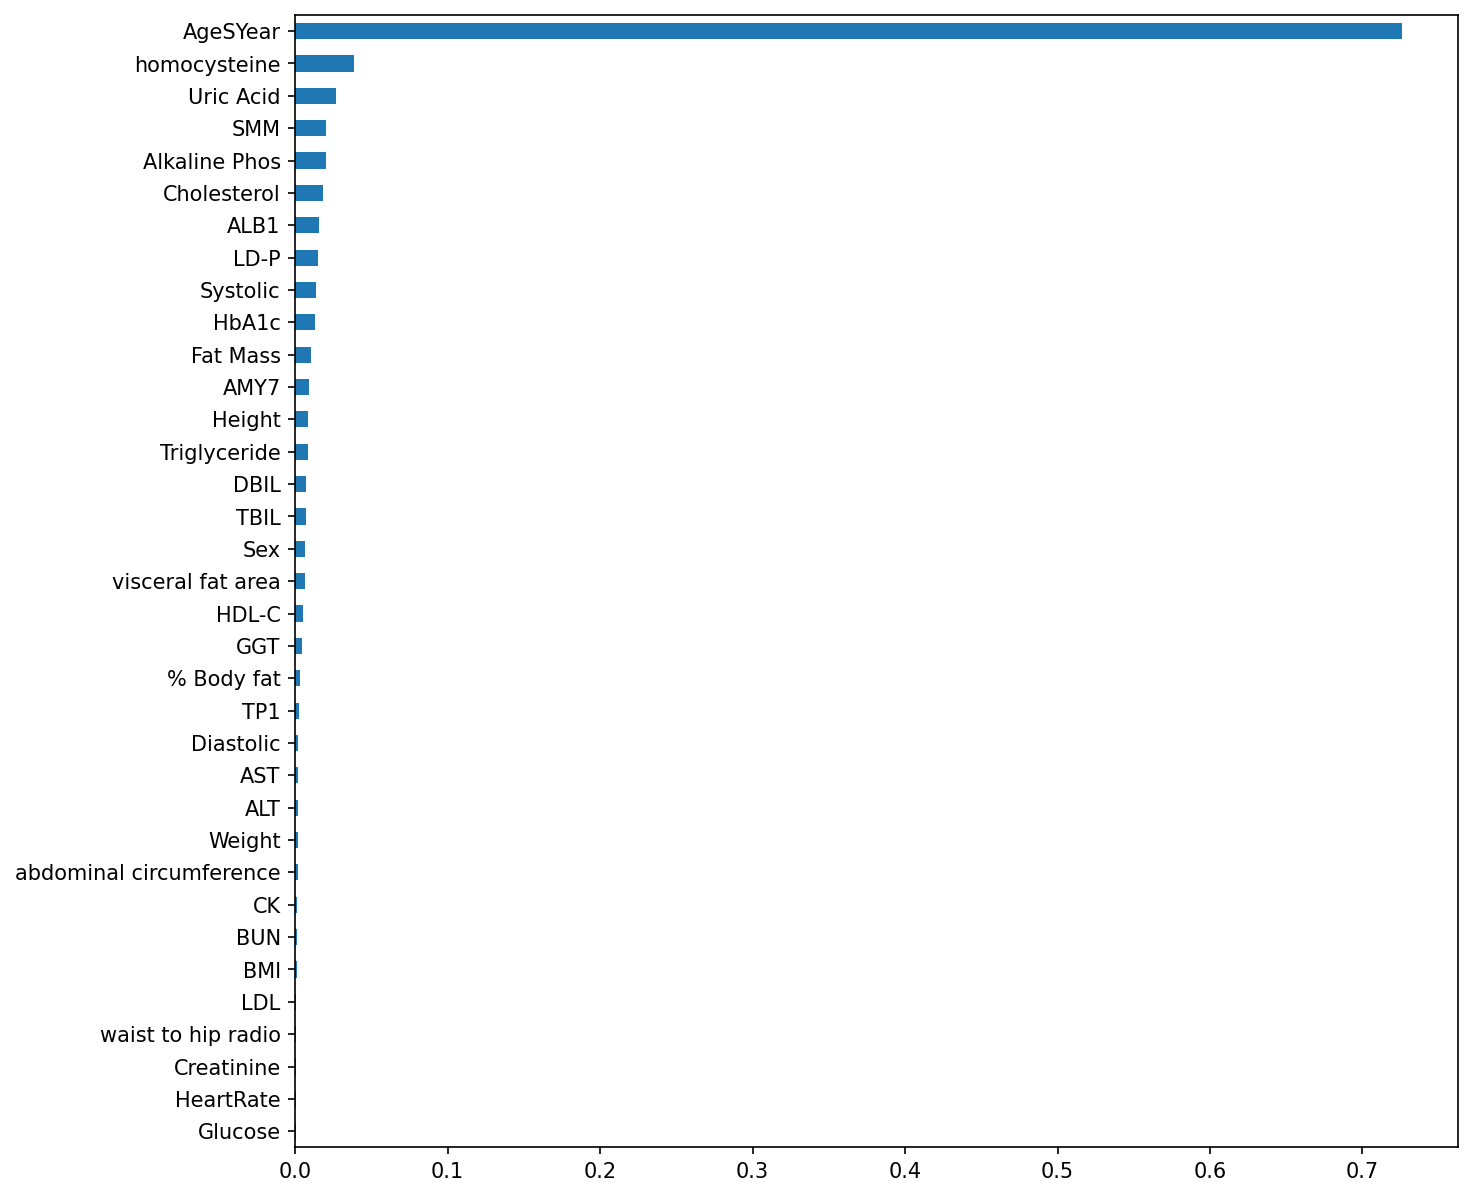

In [343]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A15

In [344]:
X=A15[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A15['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [345]:
Gradient.feature_importances_

array([4.56990774e-03, 7.17391905e-01, 3.69799073e-03, 5.43295893e-03,
       1.36389915e-03, 1.50253966e-02, 3.86113075e-03, 5.47533690e-03,
       1.01306841e-02, 5.60549309e-03, 1.79521750e-02, 2.70688361e-03,
       2.12299077e-03, 1.08662727e-02, 1.78287248e-02, 5.79469490e-03,
       2.15156751e-02, 8.39894491e-04, 1.60421586e-02, 1.33848920e-02,
       9.93293588e-03, 1.43218578e-02, 3.81360667e-03, 1.71557438e-02,
       1.92213951e-03, 1.13203427e-03, 3.81572435e-03, 1.26918833e-03,
       1.06005445e-02, 1.68057039e-02, 2.94134464e-04, 6.05968391e-03,
       7.21774782e-03, 1.68811047e-02, 7.16878507e-03])

In [346]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

BUN                        0.000294
LDL                        0.000840
AST                        0.001132
Glucose                    0.001269
BMI                        0.001364
ALT                        0.001922
HeartRate                  0.002123
Diastolic                  0.002707
Weight                     0.003698
DBIL                       0.003814
GGT                        0.003816
Fat Mass                   0.003861
Sex                        0.004570
Height                     0.005433
% Body fat                 0.005475
waist to hip radio         0.005605
Triglyceride               0.005795
Creatinine                 0.006060
CK                         0.007169
LD-P                       0.007218
ALB1                       0.009933
abdominal circumference    0.010131
HbA1c                      0.010601
visceral fat area          0.010866
TP1                        0.013385
TBIL                       0.014322
SMM                        0.015025
homocysteine               0

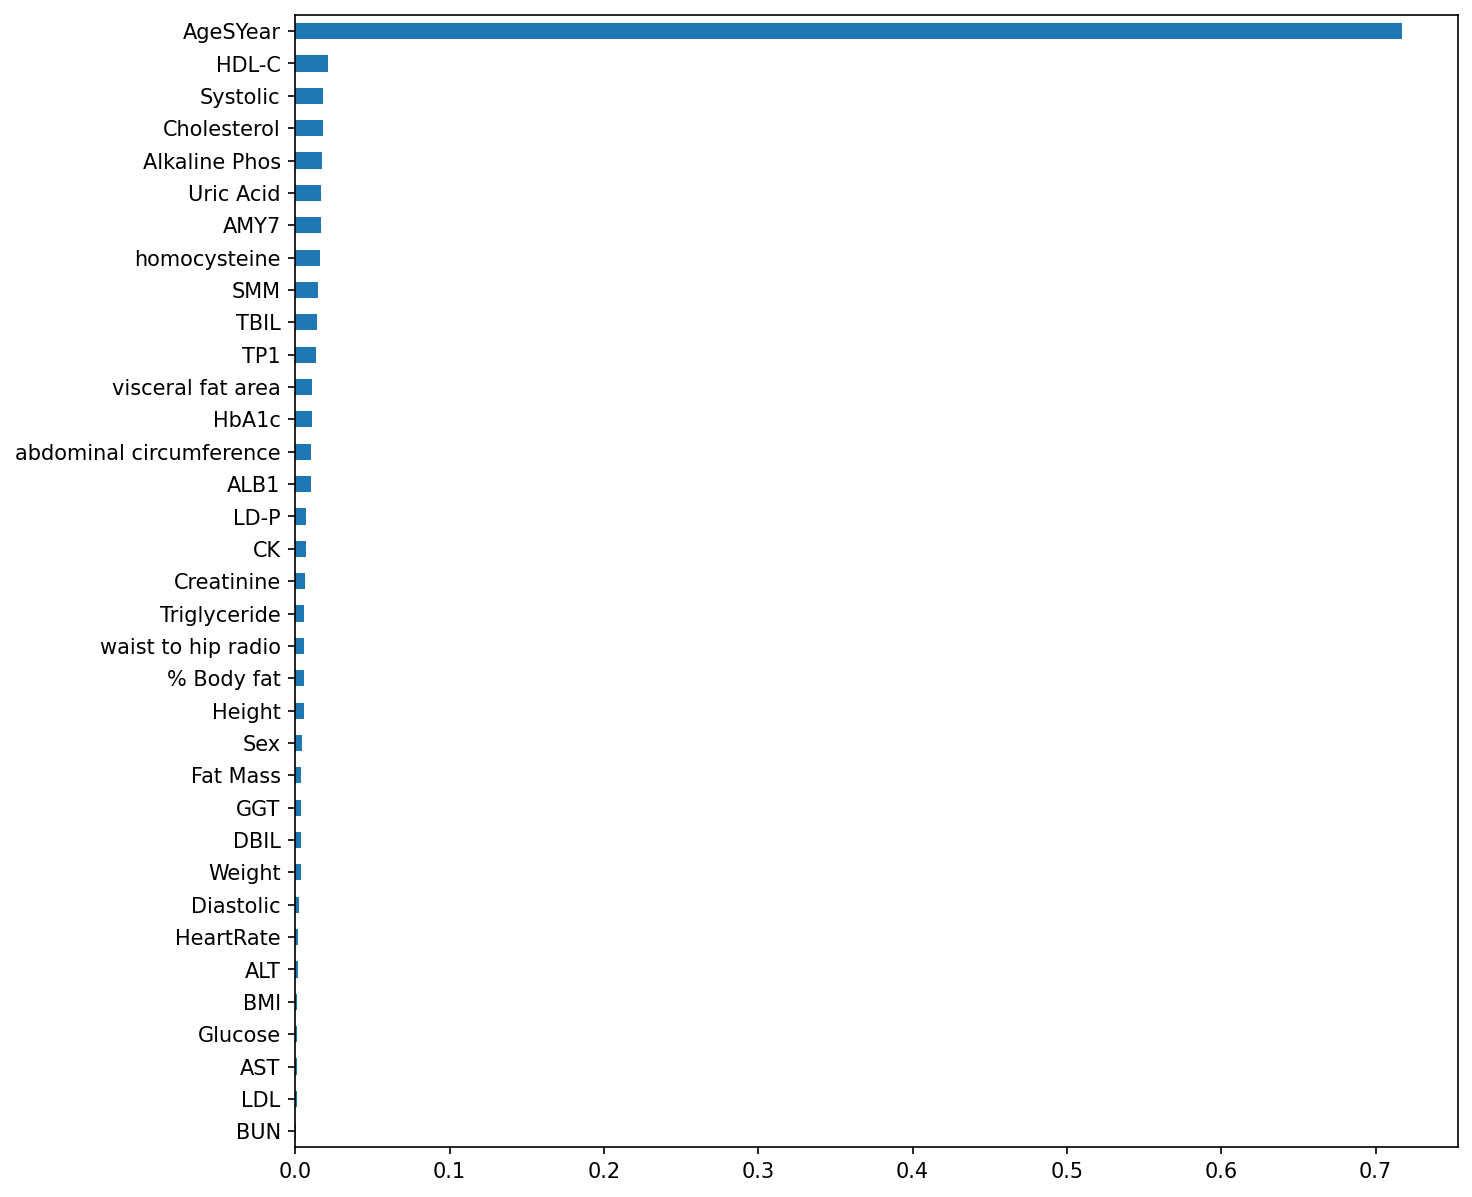

In [347]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A16

In [348]:
X=A16[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A16['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [349]:
Gradient.feature_importances_

array([0.00000000e+00, 7.49948184e-01, 1.37415680e-02, 6.04376928e-03,
       2.12715888e-03, 2.83940956e-02, 2.40348178e-04, 1.38577504e-03,
       5.53143099e-04, 2.55832952e-04, 7.15862865e-03, 1.26242587e-03,
       8.23976611e-04, 1.78844560e-02, 2.26606459e-02, 8.47923220e-03,
       6.32969970e-03, 2.11637056e-04, 1.27256513e-02, 5.18906710e-04,
       1.87006228e-02, 7.31619004e-03, 4.01555384e-03, 3.38359430e-02,
       4.16902070e-04, 2.22807765e-03, 2.64692479e-03, 3.68069643e-04,
       2.79640189e-03, 1.90278258e-02, 1.05368877e-03, 9.83389596e-05,
       5.30250076e-03, 1.43284095e-02, 7.11941571e-03])

In [350]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
Creatinine                 0.000098
LDL                        0.000212
Fat Mass                   0.000240
waist to hip radio         0.000256
Glucose                    0.000368
ALT                        0.000417
TP1                        0.000519
abdominal circumference    0.000553
HeartRate                  0.000824
BUN                        0.001054
Diastolic                  0.001262
% Body fat                 0.001386
BMI                        0.002127
AST                        0.002228
GGT                        0.002647
HbA1c                      0.002796
DBIL                       0.004016
LD-P                       0.005303
Height                     0.006044
HDL-C                      0.006330
CK                         0.007119
Systolic                   0.007159
TBIL                       0.007316
Triglyceride               0.008479
homocysteine               0.012726
Weight                     0.013742
Uric Acid                  0

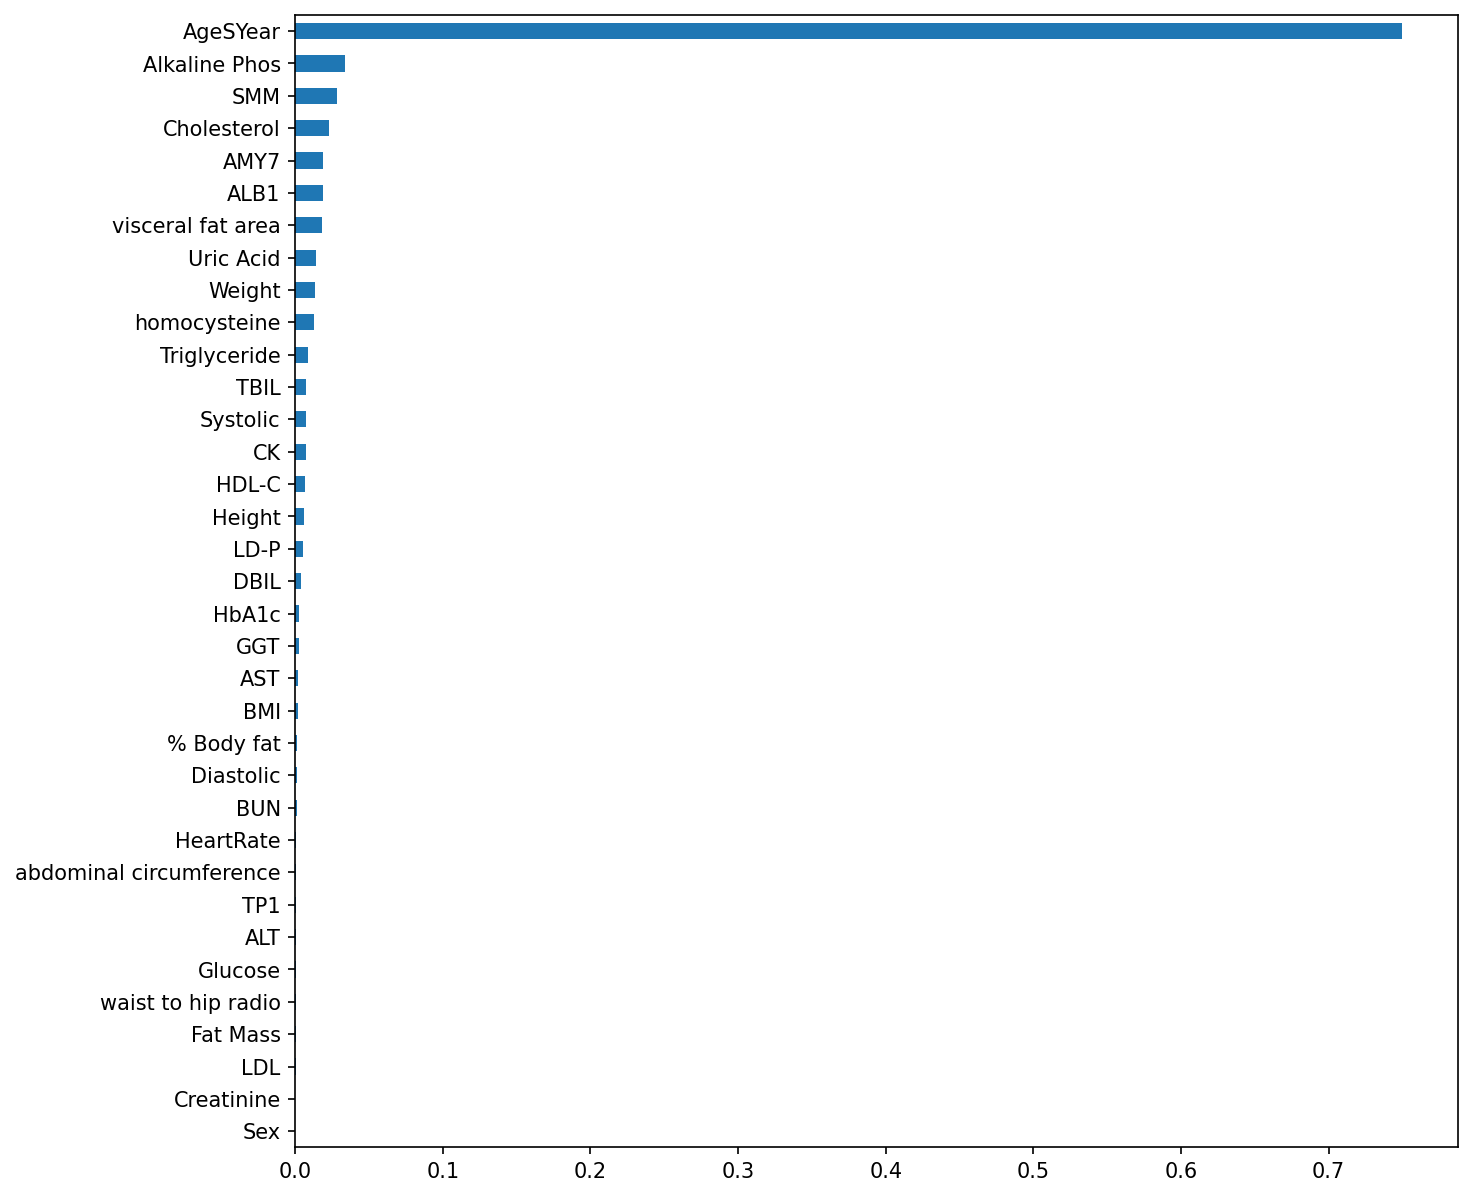

In [351]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A17

In [352]:
X=A17[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A17['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [353]:
Gradient.feature_importances_

array([0.00000000e+00, 7.01312048e-01, 1.49848867e-02, 4.42841838e-03,
       3.56219614e-04, 3.81027761e-02, 2.43749238e-03, 8.70249380e-03,
       3.10688328e-03, 6.77486765e-04, 1.27416463e-02, 4.63438548e-03,
       1.76388521e-04, 1.00457737e-02, 2.38735681e-02, 1.55870504e-02,
       5.97843081e-03, 1.16420624e-04, 2.54881126e-02, 9.14429100e-03,
       2.32794274e-02, 1.64962678e-02, 4.26750300e-03, 1.97481128e-02,
       3.63263337e-04, 1.45211105e-03, 1.62396642e-03, 1.40164611e-03,
       3.83724435e-03, 1.98452822e-02, 2.26665764e-03, 3.40756167e-04,
       4.49591872e-03, 1.72337838e-02, 1.45328638e-03])

In [354]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
LDL                        0.000116
HeartRate                  0.000176
Creatinine                 0.000341
BMI                        0.000356
ALT                        0.000363
waist to hip radio         0.000677
Glucose                    0.001402
AST                        0.001452
CK                         0.001453
GGT                        0.001624
BUN                        0.002267
Fat Mass                   0.002437
abdominal circumference    0.003107
HbA1c                      0.003837
DBIL                       0.004268
Height                     0.004428
LD-P                       0.004496
Diastolic                  0.004634
HDL-C                      0.005978
% Body fat                 0.008702
TP1                        0.009144
visceral fat area          0.010046
Systolic                   0.012742
Weight                     0.014985
Triglyceride               0.015587
TBIL                       0.016496
Uric Acid                  0

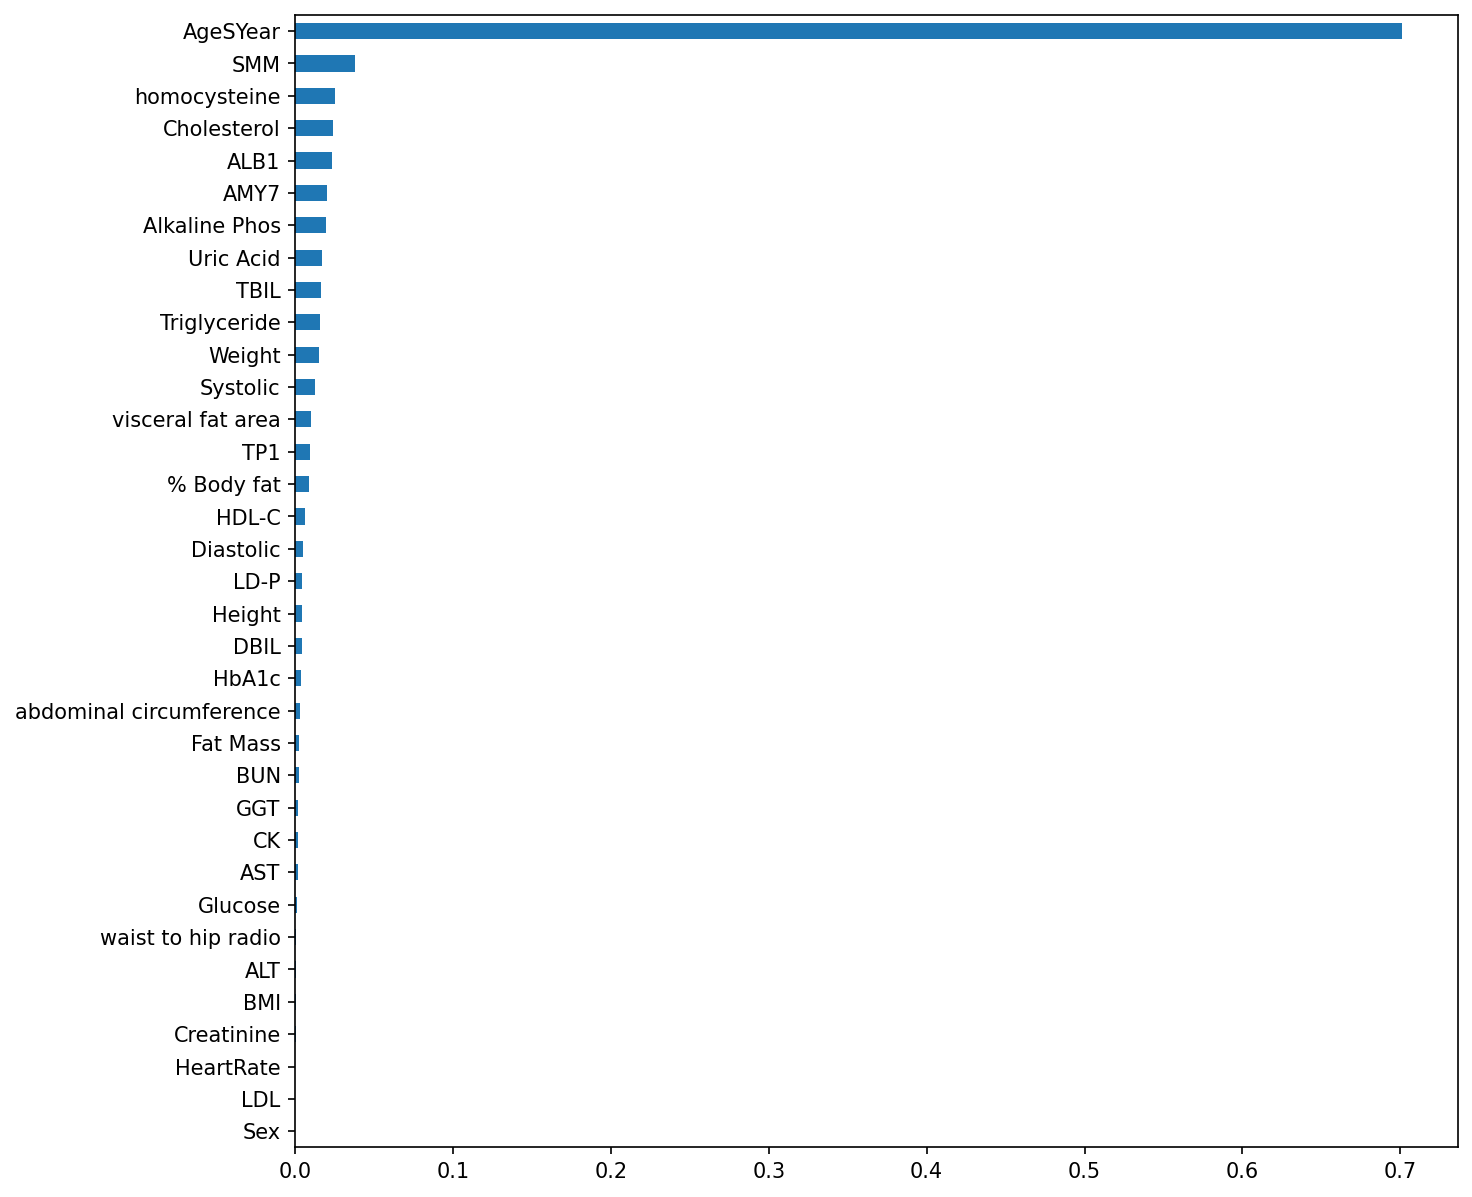

In [355]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A18

In [356]:
X=A18[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A18['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [357]:
Gradient.feature_importances_

array([6.10402263e-03, 7.19620685e-01, 1.73255589e-03, 6.73759159e-03,
       4.21678357e-04, 2.31662145e-02, 3.38296902e-03, 6.84918698e-03,
       9.13592168e-04, 2.87518176e-04, 1.21658653e-02, 1.57602262e-03,
       1.84749725e-03, 1.72495187e-02, 1.52223794e-02, 9.79203818e-03,
       3.47771224e-03, 3.67450168e-04, 3.04743845e-02, 5.70582109e-03,
       3.50170648e-02, 1.12144458e-02, 5.54812595e-03, 8.41977800e-03,
       3.18554021e-04, 6.81453059e-04, 4.15934958e-03, 9.58266737e-04,
       9.52132097e-03, 1.68899412e-02, 1.33755190e-03, 2.17858300e-03,
       8.16189087e-03, 2.67475036e-02, 1.75146714e-03])

In [358]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

waist to hip radio         0.000288
ALT                        0.000319
LDL                        0.000367
BMI                        0.000422
AST                        0.000681
abdominal circumference    0.000914
Glucose                    0.000958
BUN                        0.001338
Diastolic                  0.001576
Weight                     0.001733
CK                         0.001751
HeartRate                  0.001847
Creatinine                 0.002179
Fat Mass                   0.003383
HDL-C                      0.003478
GGT                        0.004159
DBIL                       0.005548
TP1                        0.005706
Sex                        0.006104
Height                     0.006738
% Body fat                 0.006849
LD-P                       0.008162
Alkaline Phos              0.008420
HbA1c                      0.009521
Triglyceride               0.009792
TBIL                       0.011214
Systolic                   0.012166
Cholesterol                0

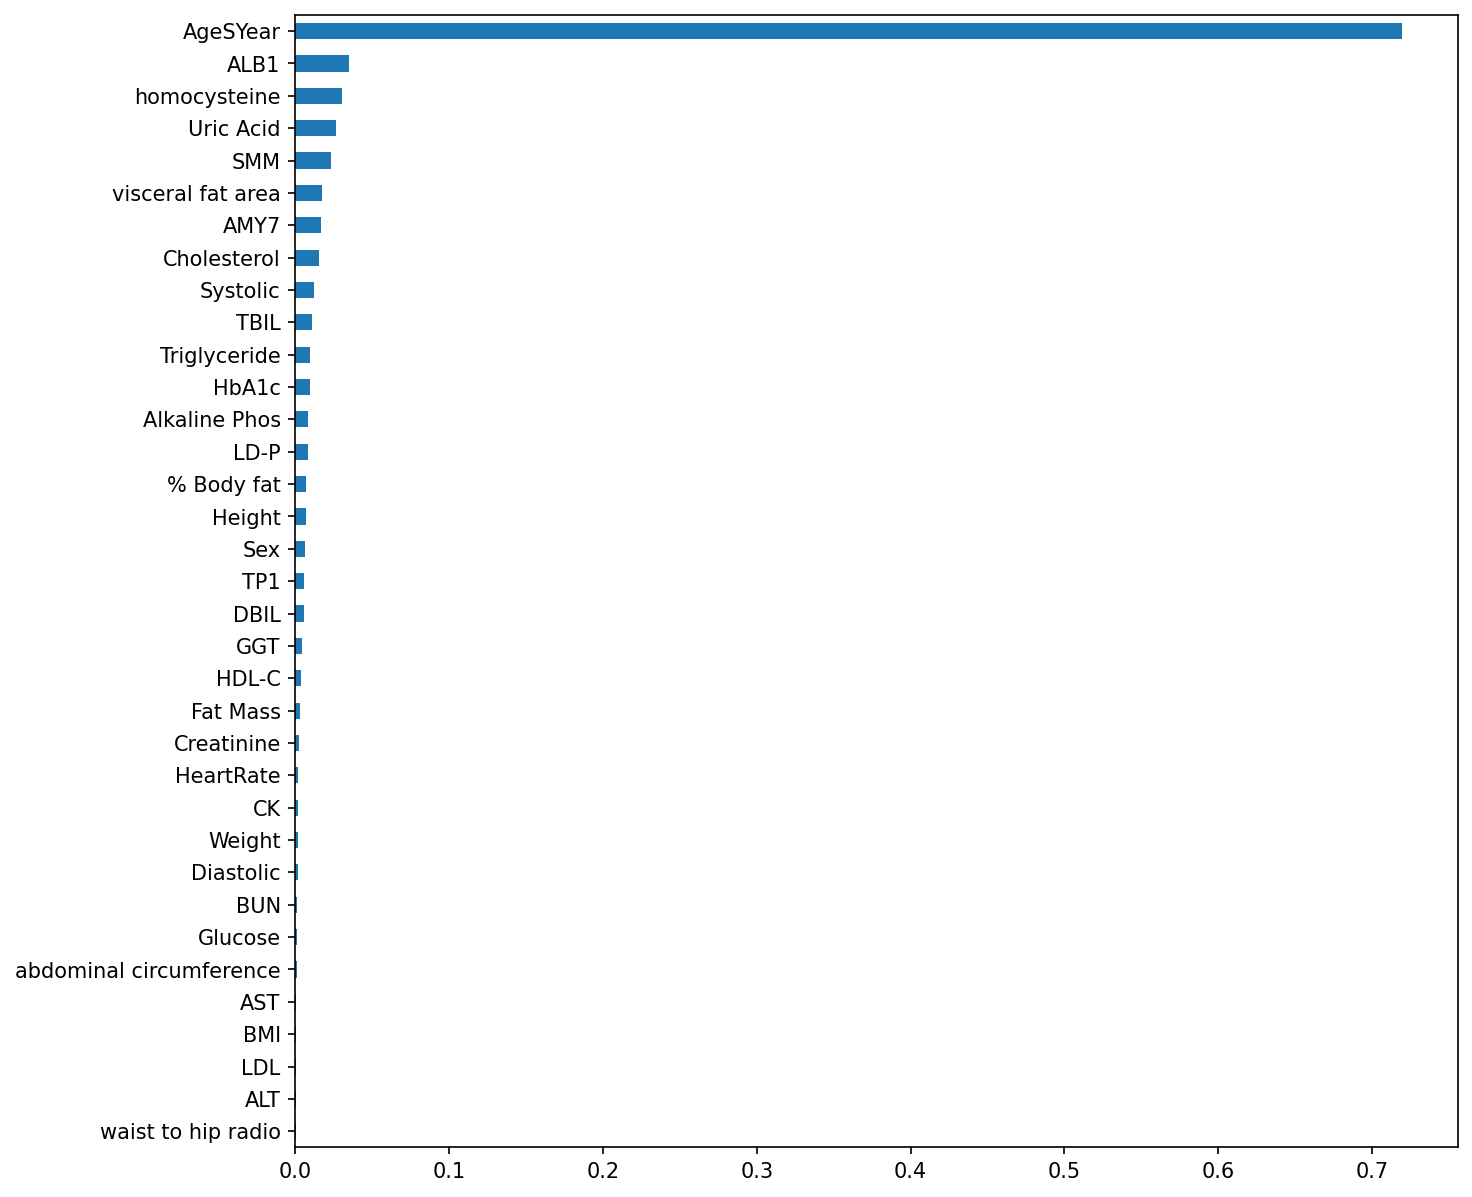

In [359]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A19

In [360]:
X=A19[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A19['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [361]:
Gradient.feature_importances_

array([0.00000000e+00, 7.25001882e-01, 1.32972040e-02, 3.51382490e-03,
       4.54745672e-04, 2.17992443e-02, 1.06646354e-03, 5.10813596e-03,
       1.33153302e-03, 2.77768363e-04, 1.01978313e-02, 1.68806296e-03,
       8.11378484e-04, 7.57304896e-03, 1.46033007e-02, 1.53666288e-02,
       8.33130467e-03, 8.11649710e-04, 3.45084986e-02, 7.14299592e-04,
       2.85667301e-02, 6.09582671e-03, 1.05807692e-02, 1.35229889e-02,
       2.07534916e-03, 1.41348515e-03, 4.27784115e-03, 1.97743123e-04,
       1.31682013e-02, 1.68293390e-02, 4.07923087e-03, 5.79910779e-05,
       3.41079488e-03, 2.26054013e-02, 6.66150262e-03])

In [362]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
Creatinine                 0.000058
Glucose                    0.000198
waist to hip radio         0.000278
BMI                        0.000455
TP1                        0.000714
HeartRate                  0.000811
LDL                        0.000812
Fat Mass                   0.001066
abdominal circumference    0.001332
AST                        0.001413
Diastolic                  0.001688
ALT                        0.002075
LD-P                       0.003411
Height                     0.003514
BUN                        0.004079
GGT                        0.004278
% Body fat                 0.005108
TBIL                       0.006096
CK                         0.006662
visceral fat area          0.007573
HDL-C                      0.008331
Systolic                   0.010198
DBIL                       0.010581
HbA1c                      0.013168
Weight                     0.013297
Alkaline Phos              0.013523
Cholesterol                0

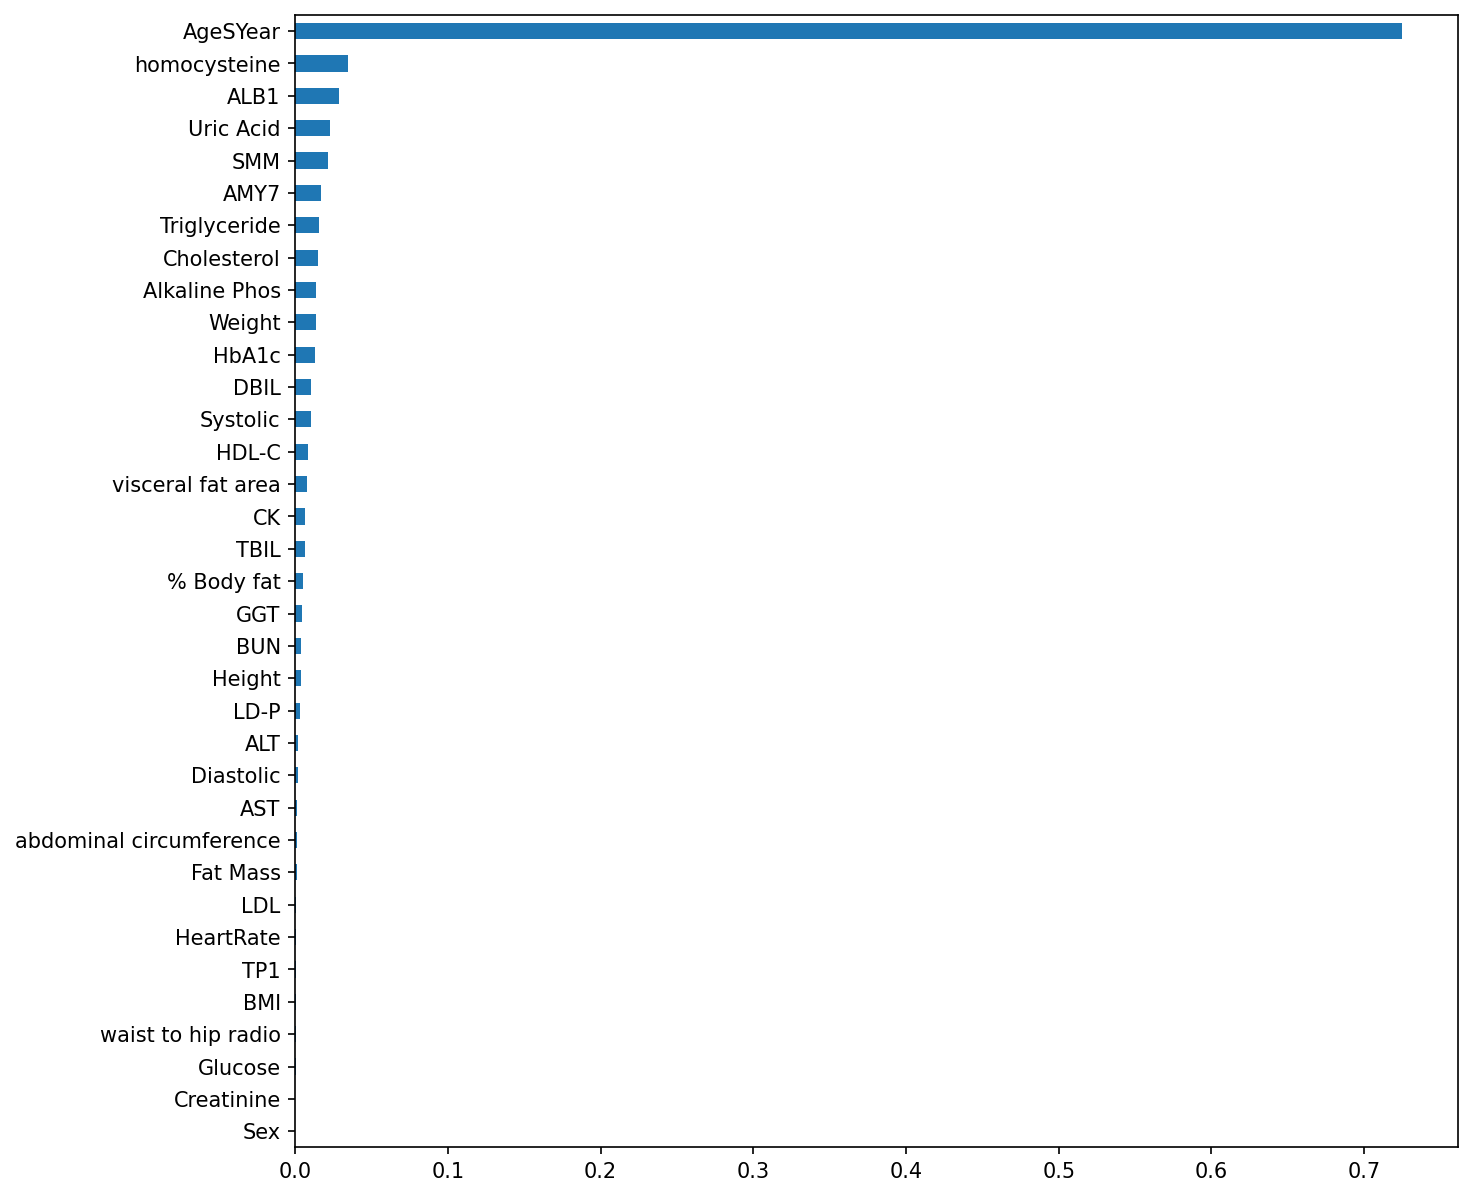

In [363]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A20

In [364]:
X=A20[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A20['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [365]:
Gradient.feature_importances_

array([9.99148740e-06, 7.41532404e-01, 9.48016512e-03, 4.92205738e-03,
       1.41362989e-04, 2.25254670e-02, 2.19085322e-03, 1.24601649e-03,
       1.83551027e-03, 8.85315409e-05, 1.02008042e-02, 4.01773636e-03,
       2.70059936e-04, 3.24635297e-03, 3.38219147e-02, 1.86329221e-02,
       4.81792027e-03, 2.43108106e-03, 2.42349627e-02, 1.69399682e-03,
       2.24146687e-02, 1.04793253e-02, 2.29688324e-03, 1.12590853e-02,
       3.13843360e-04, 1.09027756e-03, 4.53072318e-03, 2.00804194e-03,
       5.22160718e-03, 1.41995300e-02, 1.16267359e-03, 1.68618490e-03,
       9.95981202e-03, 1.57807481e-02, 1.02564845e-02])

In [366]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000010
waist to hip radio         0.000089
BMI                        0.000141
HeartRate                  0.000270
ALT                        0.000314
AST                        0.001090
BUN                        0.001163
% Body fat                 0.001246
Creatinine                 0.001686
TP1                        0.001694
abdominal circumference    0.001836
Glucose                    0.002008
Fat Mass                   0.002191
DBIL                       0.002297
LDL                        0.002431
visceral fat area          0.003246
Diastolic                  0.004018
GGT                        0.004531
HDL-C                      0.004818
Height                     0.004922
HbA1c                      0.005222
Weight                     0.009480
LD-P                       0.009960
Systolic                   0.010201
CK                         0.010256
TBIL                       0.010479
Alkaline Phos              0.011259
AMY7                       0

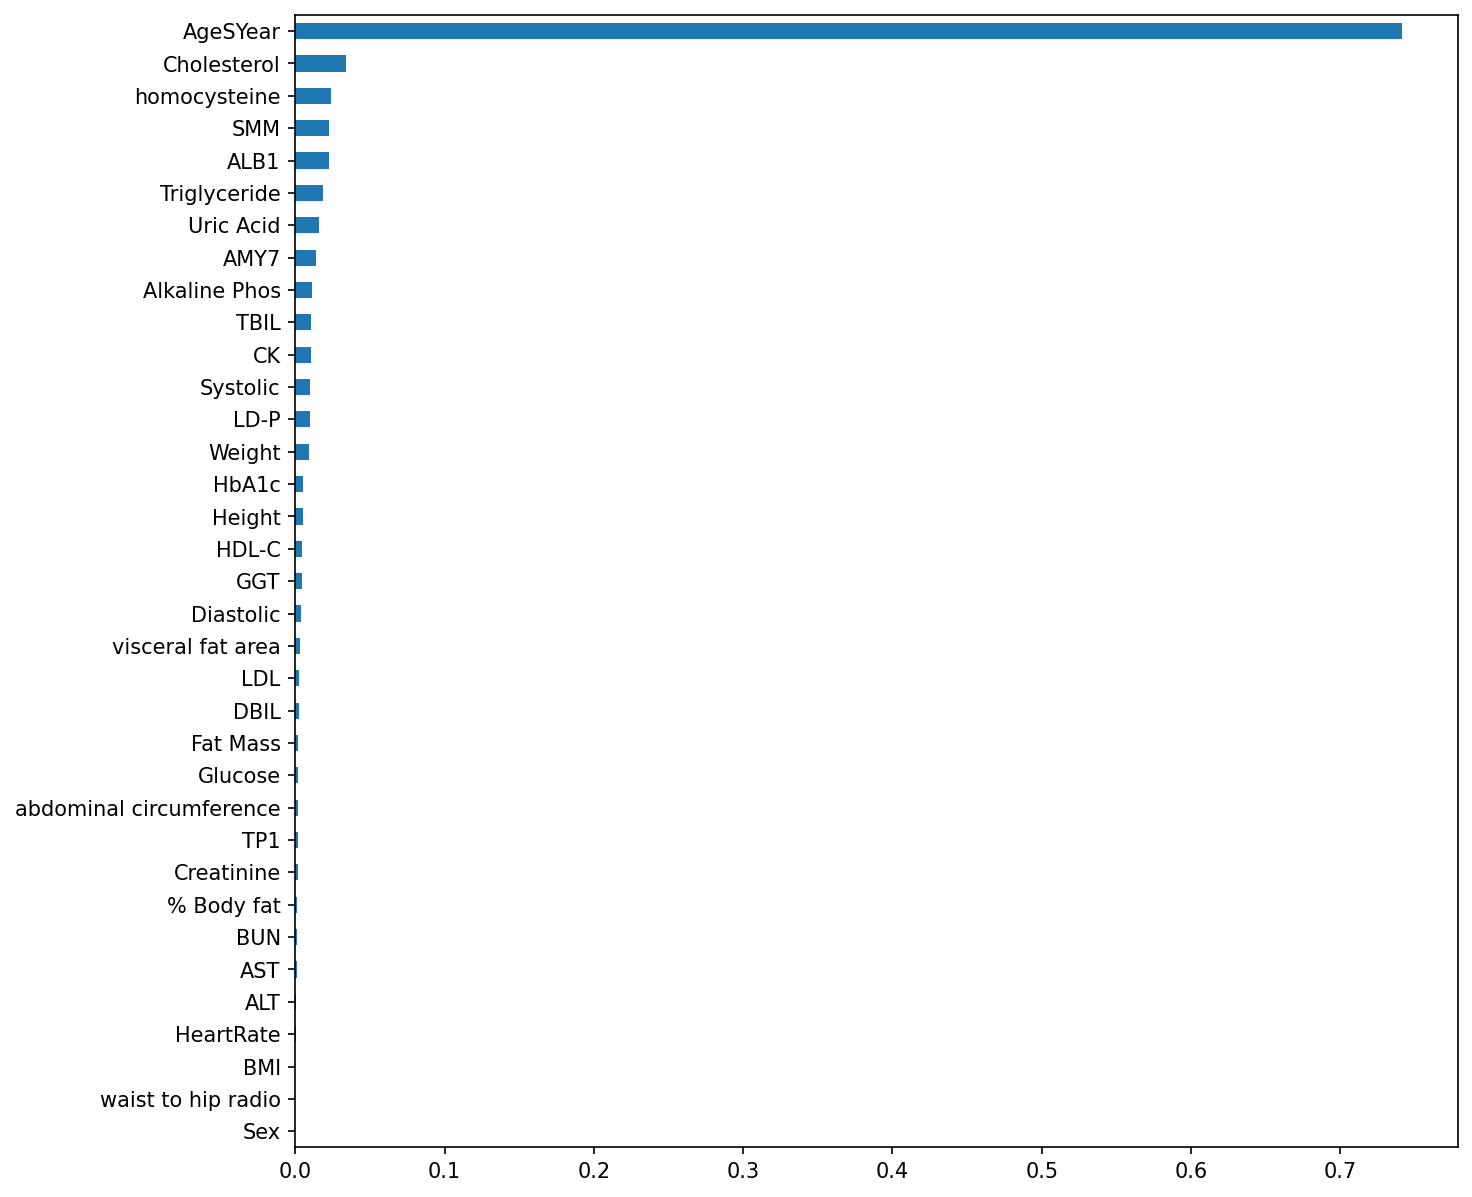

In [367]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A21

In [368]:
X=A21[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A21['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [369]:
Gradient.feature_importances_

array([0.00000000e+00, 6.75553713e-01, 9.65651826e-03, 6.40460135e-03,
       3.32273737e-03, 2.57467807e-02, 1.55932430e-03, 4.62160396e-03,
       5.01168659e-03, 1.29153324e-03, 1.44623141e-02, 1.89136838e-03,
       4.66859661e-03, 3.35074367e-02, 2.41491438e-02, 1.16332221e-03,
       8.94534200e-03, 3.03526385e-03, 3.13095724e-02, 8.80156453e-03,
       3.06562562e-02, 1.94247367e-02, 3.13511568e-03, 8.19306325e-03,
       1.52953582e-03, 1.04032619e-03, 4.65430820e-03, 1.01617363e-03,
       6.87673893e-03, 2.28824647e-02, 1.74926924e-04, 5.93458754e-03,
       7.61519120e-03, 1.86392758e-02, 3.12487547e-03])

In [370]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
BUN                        0.000175
Glucose                    0.001016
AST                        0.001040
Triglyceride               0.001163
waist to hip radio         0.001292
ALT                        0.001530
Fat Mass                   0.001559
Diastolic                  0.001891
LDL                        0.003035
CK                         0.003125
DBIL                       0.003135
BMI                        0.003323
% Body fat                 0.004622
GGT                        0.004654
HeartRate                  0.004669
abdominal circumference    0.005012
Creatinine                 0.005935
Height                     0.006405
HbA1c                      0.006877
LD-P                       0.007615
Alkaline Phos              0.008193
TP1                        0.008802
HDL-C                      0.008945
Weight                     0.009657
Systolic                   0.014462
Uric Acid                  0.018639
TBIL                       0

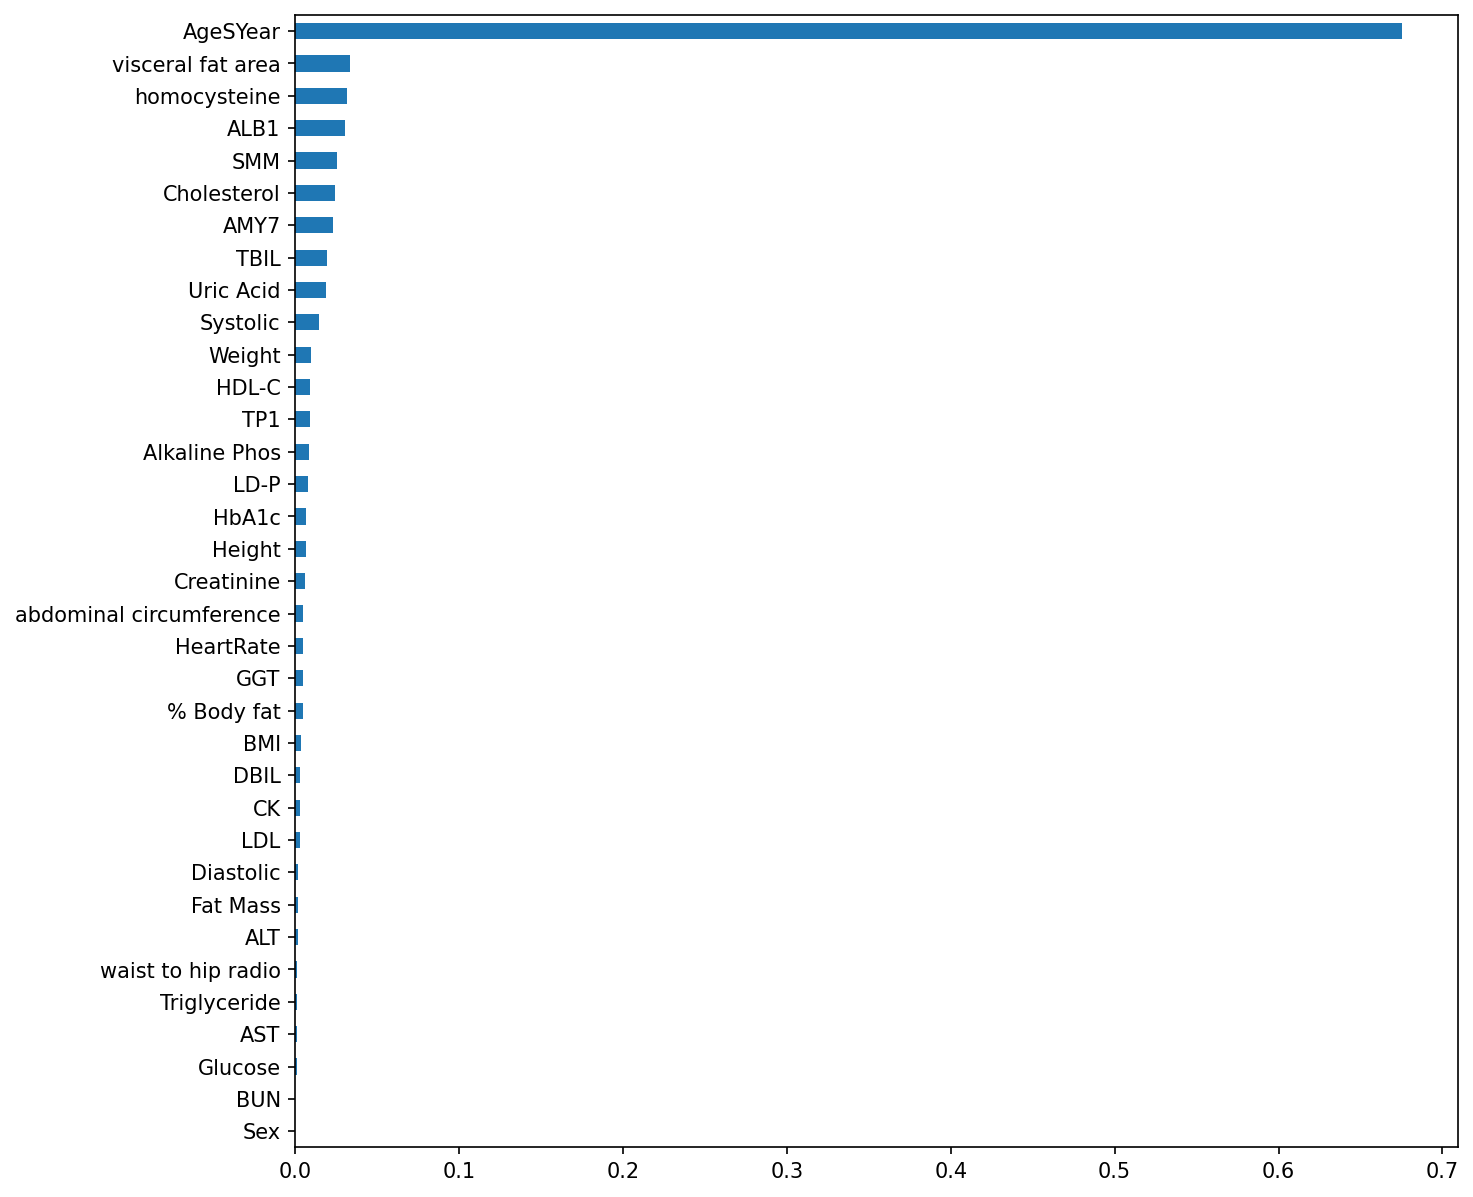

In [371]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A22

In [372]:
X=A22[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A22['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [373]:
Gradient.feature_importances_

array([0.00000000e+00, 7.12872690e-01, 4.64942565e-03, 6.27496891e-03,
       6.05598755e-04, 2.52737775e-02, 1.41421727e-03, 4.68560530e-04,
       6.19819275e-03, 1.18482785e-03, 1.17298481e-02, 3.30356967e-04,
       2.06604006e-03, 3.96385941e-03, 2.47205333e-02, 1.52435057e-02,
       8.58401764e-03, 5.09591127e-04, 1.96993605e-02, 6.69603706e-03,
       2.69536575e-02, 9.29498328e-03, 5.47004387e-03, 4.12589495e-02,
       1.61138738e-03, 2.08244017e-03, 3.30165356e-03, 7.19633513e-04,
       2.50688346e-03, 1.90539808e-02, 3.86216526e-04, 1.18727142e-03,
       1.29863272e-02, 1.28186875e-02, 7.88247548e-03])

In [374]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
Diastolic                  0.000330
BUN                        0.000386
% Body fat                 0.000469
LDL                        0.000510
BMI                        0.000606
Glucose                    0.000720
waist to hip radio         0.001185
Creatinine                 0.001187
Fat Mass                   0.001414
ALT                        0.001611
HeartRate                  0.002066
AST                        0.002082
HbA1c                      0.002507
GGT                        0.003302
visceral fat area          0.003964
Weight                     0.004649
DBIL                       0.005470
abdominal circumference    0.006198
Height                     0.006275
TP1                        0.006696
CK                         0.007882
HDL-C                      0.008584
TBIL                       0.009295
Systolic                   0.011730
Uric Acid                  0.012819
LD-P                       0.012986
Triglyceride               0

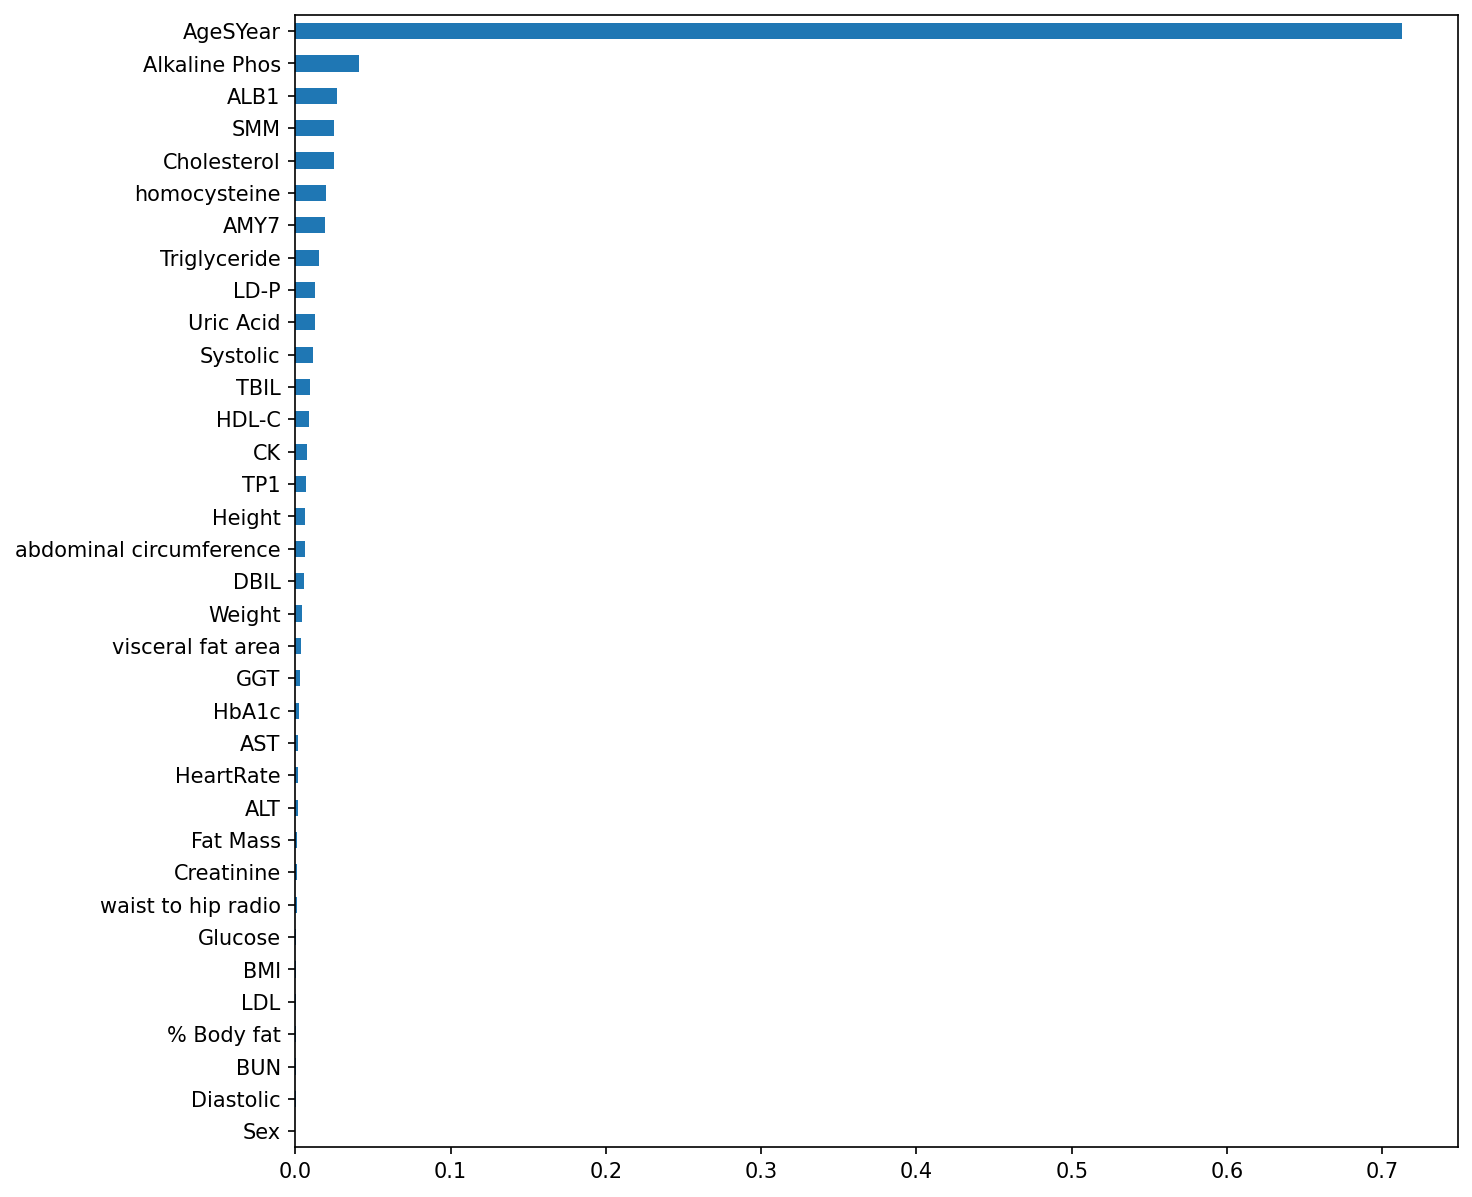

In [375]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A23

In [376]:
X=A23[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A23['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [377]:
Gradient.feature_importances_

array([3.98552930e-03, 7.25542275e-01, 1.05627081e-02, 1.68831037e-02,
       1.13334779e-03, 1.89230080e-02, 3.42291758e-04, 6.86306752e-04,
       1.84615384e-03, 1.54773330e-03, 4.74051516e-03, 2.97475296e-03,
       7.72019003e-04, 9.06185833e-03, 1.78747330e-02, 1.50758405e-02,
       1.07064967e-02, 5.37626944e-05, 1.98208854e-02, 9.95075064e-03,
       1.79499725e-02, 1.05094635e-02, 8.40329377e-03, 2.58346016e-02,
       1.48708844e-03, 2.08942948e-03, 5.76431810e-03, 4.63802720e-04,
       1.02012177e-02, 8.83993004e-03, 1.15142890e-03, 3.55253559e-03,
       1.95760086e-03, 2.02333345e-02, 9.07790993e-03])

In [378]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

LDL                        0.000054
Fat Mass                   0.000342
Glucose                    0.000464
% Body fat                 0.000686
HeartRate                  0.000772
BMI                        0.001133
BUN                        0.001151
ALT                        0.001487
waist to hip radio         0.001548
abdominal circumference    0.001846
LD-P                       0.001958
AST                        0.002089
Diastolic                  0.002975
Creatinine                 0.003553
Sex                        0.003986
Systolic                   0.004741
GGT                        0.005764
DBIL                       0.008403
AMY7                       0.008840
visceral fat area          0.009062
CK                         0.009078
TP1                        0.009951
HbA1c                      0.010201
TBIL                       0.010509
Weight                     0.010563
HDL-C                      0.010706
Triglyceride               0.015076
Height                     0

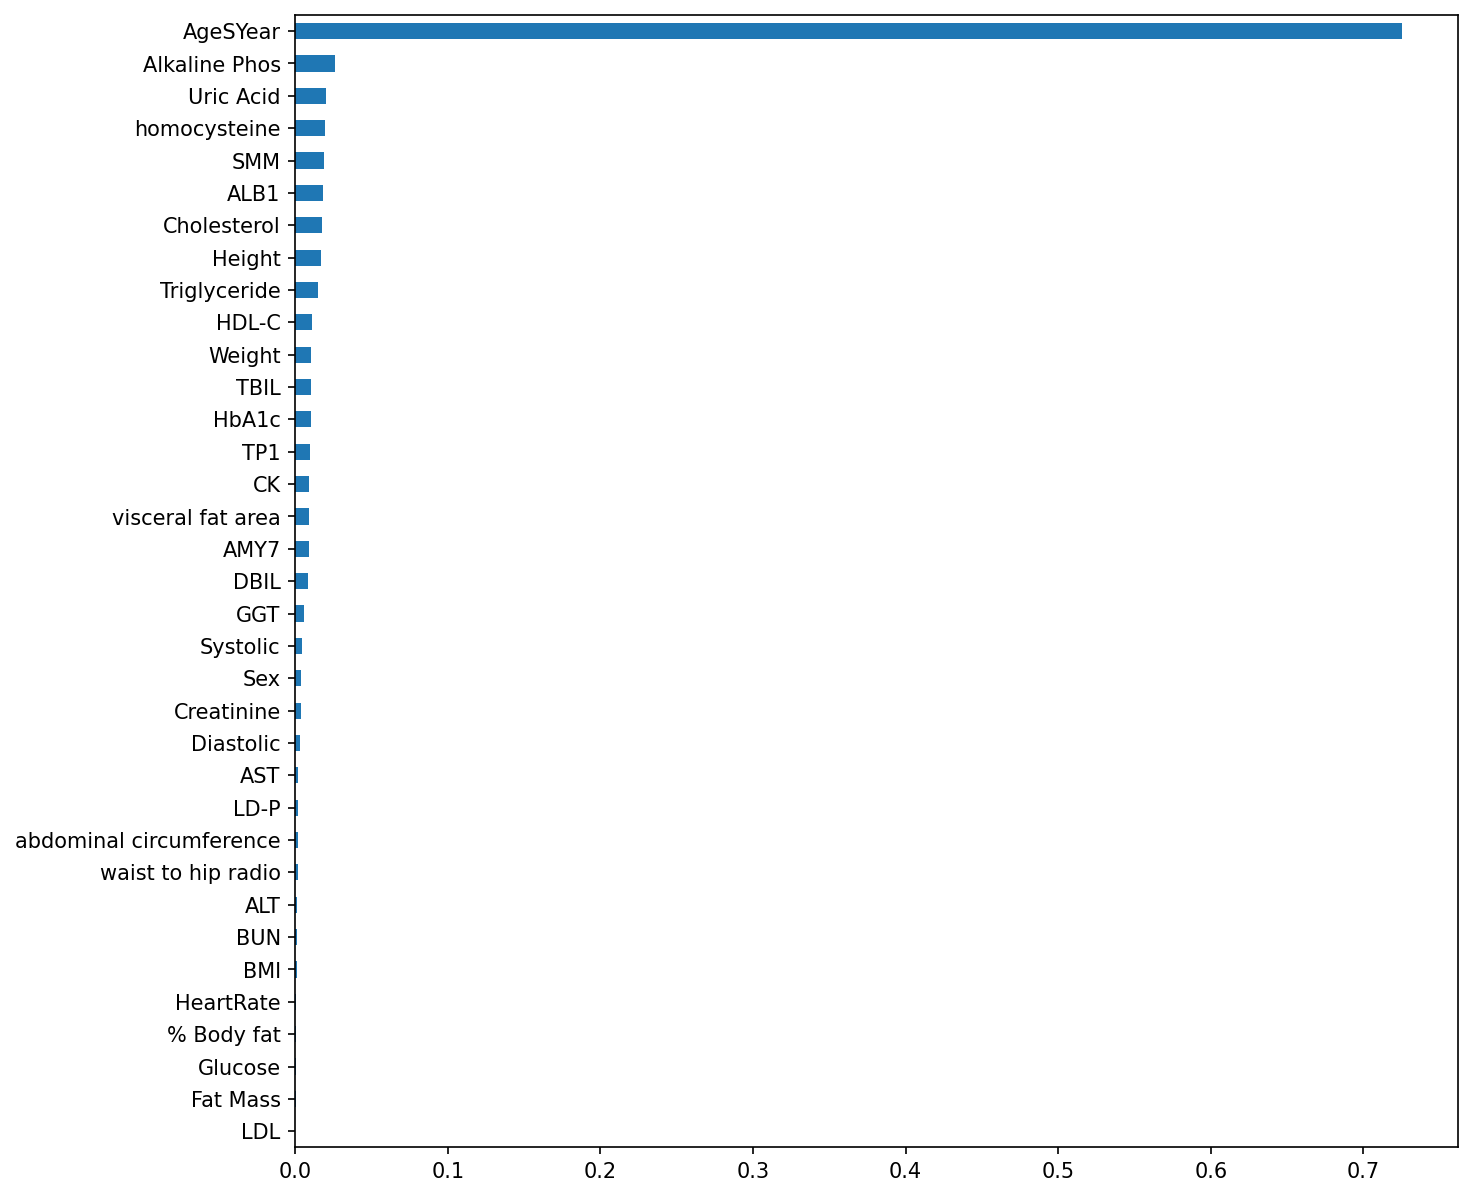

In [379]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A24

In [380]:
X=A24[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A24['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [381]:
Gradient.feature_importances_

array([5.43472639e-07, 7.29823291e-01, 1.07041995e-02, 8.75677356e-03,
       2.35105529e-04, 1.95983019e-02, 1.41119745e-03, 6.00278216e-03,
       8.23802741e-03, 5.87356212e-04, 9.47535429e-03, 5.25084209e-03,
       4.50056766e-04, 1.48407619e-02, 1.55902368e-02, 1.11829994e-02,
       1.01857786e-02, 1.57563635e-03, 1.07382112e-02, 1.38246989e-02,
       3.24864765e-02, 1.04104593e-02, 1.50942730e-03, 1.33916113e-02,
       1.11541914e-04, 3.62710578e-03, 3.08833022e-03, 1.05243327e-03,
       4.82061072e-03, 1.62184921e-02, 1.41115235e-03, 8.64661314e-03,
       1.12184754e-02, 1.14771209e-02, 2.05799500e-03])

In [382]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        5.434726e-07
ALT                        1.115419e-04
BMI                        2.351055e-04
HeartRate                  4.500568e-04
waist to hip radio         5.873562e-04
Glucose                    1.052433e-03
BUN                        1.411152e-03
Fat Mass                   1.411197e-03
DBIL                       1.509427e-03
LDL                        1.575636e-03
CK                         2.057995e-03
GGT                        3.088330e-03
AST                        3.627106e-03
HbA1c                      4.820611e-03
Diastolic                  5.250842e-03
% Body fat                 6.002782e-03
abdominal circumference    8.238027e-03
Creatinine                 8.646613e-03
Height                     8.756774e-03
Systolic                   9.475354e-03
HDL-C                      1.018578e-02
TBIL                       1.041046e-02
Weight                     1.070420e-02
homocysteine               1.073821e-02
Triglyceride               1.118300e-02


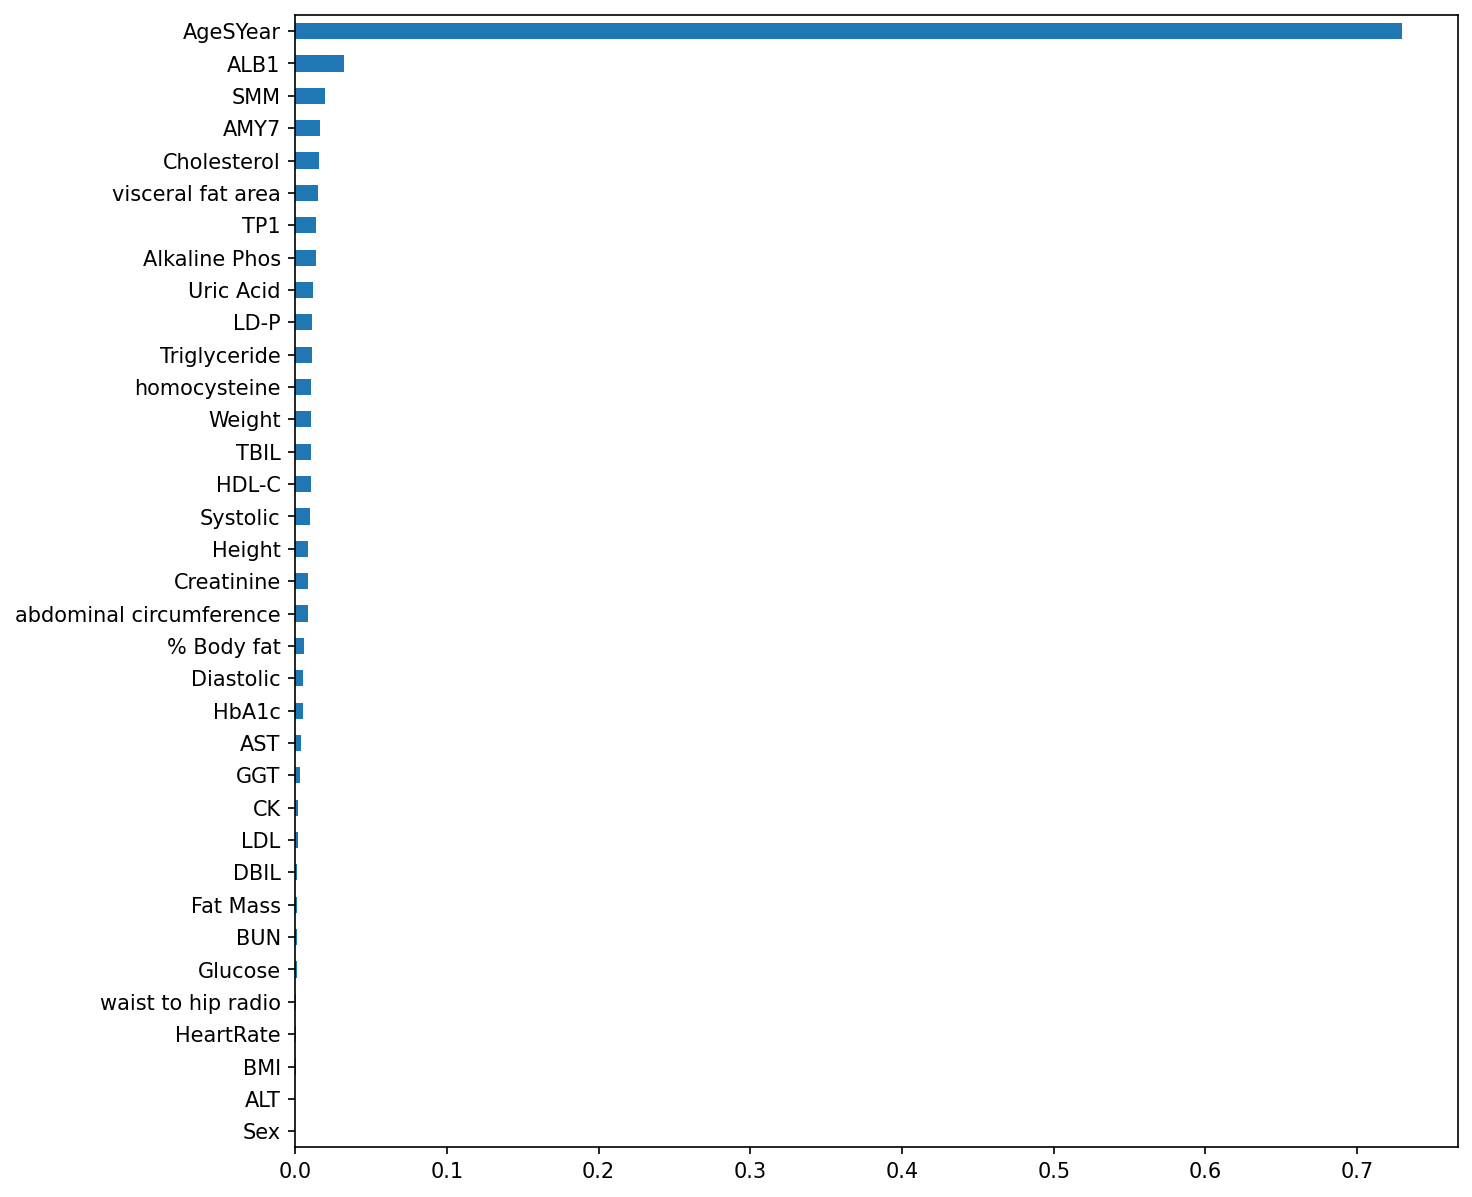

In [383]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A25

In [384]:
X=A25[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A25['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [385]:
Gradient.feature_importances_

array([3.96725881e-03, 7.21703316e-01, 5.21416513e-03, 3.35187454e-03,
       1.24751568e-03, 2.91780817e-02, 3.28543902e-03, 7.83029451e-04,
       3.77338607e-03, 2.20729119e-04, 8.26758335e-03, 2.18262714e-03,
       5.07719774e-04, 2.36300472e-02, 1.84787770e-02, 2.74023778e-03,
       4.95863369e-03, 4.15525478e-04, 2.62235048e-02, 1.35557125e-02,
       3.47528503e-02, 3.86353138e-03, 3.61876988e-03, 5.34026968e-03,
       6.53782835e-04, 6.93150255e-04, 2.27587601e-03, 6.98970611e-04,
       9.36635804e-03, 1.13714513e-02, 2.47787698e-03, 1.58568475e-03,
       1.68580833e-02, 1.74514527e-02, 1.53067280e-02])

In [386]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

waist to hip radio         0.000221
LDL                        0.000416
HeartRate                  0.000508
ALT                        0.000654
AST                        0.000693
Glucose                    0.000699
% Body fat                 0.000783
BMI                        0.001248
Creatinine                 0.001586
Diastolic                  0.002183
GGT                        0.002276
BUN                        0.002478
Triglyceride               0.002740
Fat Mass                   0.003285
Height                     0.003352
DBIL                       0.003619
abdominal circumference    0.003773
TBIL                       0.003864
Sex                        0.003967
HDL-C                      0.004959
Weight                     0.005214
Alkaline Phos              0.005340
Systolic                   0.008268
HbA1c                      0.009366
AMY7                       0.011371
TP1                        0.013556
CK                         0.015307
LD-P                       0

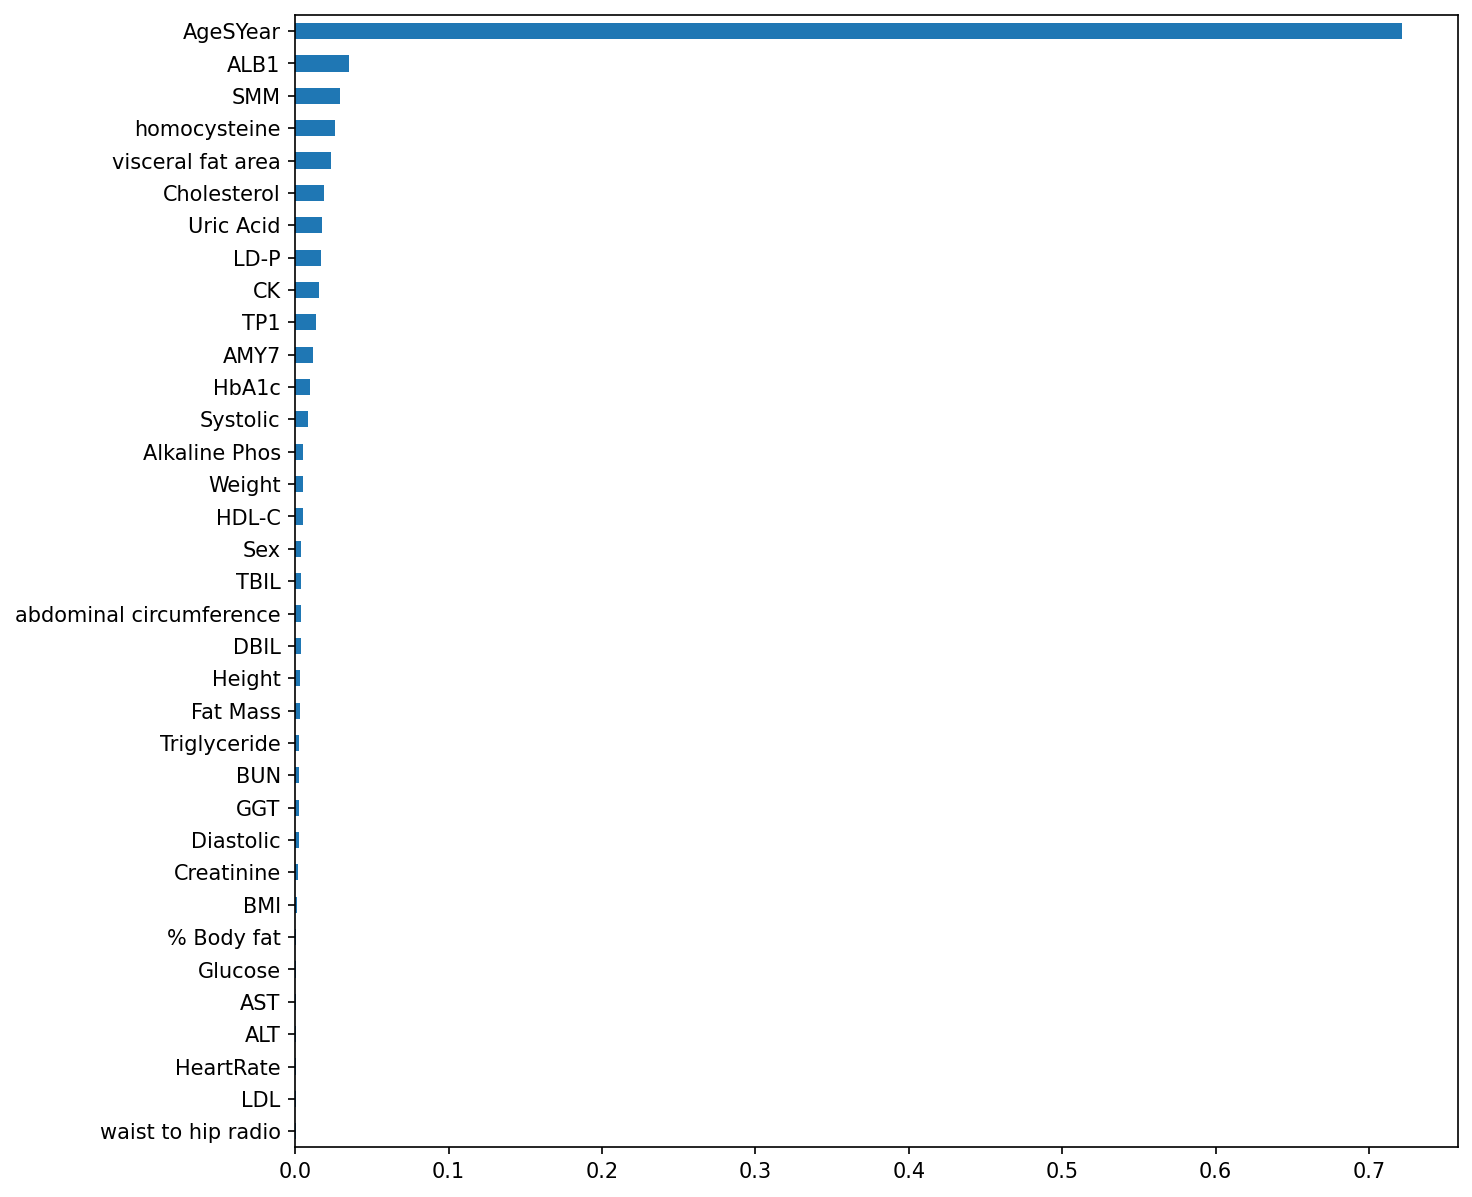

In [387]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A26

In [388]:
X=A26[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A26['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [389]:
Gradient.feature_importances_

array([0.00000000e+00, 7.12880601e-01, 2.44637689e-03, 6.86802878e-03,
       1.31242985e-03, 1.47394027e-02, 2.88961869e-03, 4.76784247e-03,
       7.47956225e-04, 3.50231923e-04, 8.77590283e-03, 1.16260990e-03,
       4.54545836e-04, 1.56629341e-02, 3.01956384e-02, 2.45213935e-03,
       7.58371037e-03, 3.98063294e-04, 2.42223547e-02, 3.05879332e-02,
       3.08631970e-02, 9.87171001e-03, 3.70956824e-03, 1.32187307e-02,
       1.72904369e-03, 2.34596290e-03, 3.56731171e-03, 5.28397789e-04,
       4.26712355e-03, 2.95008880e-02, 8.27207088e-04, 3.70168009e-04,
       4.29333046e-03, 2.00997826e-02, 6.30925837e-03])

In [390]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
waist to hip radio         0.000350
Creatinine                 0.000370
LDL                        0.000398
HeartRate                  0.000455
Glucose                    0.000528
abdominal circumference    0.000748
BUN                        0.000827
Diastolic                  0.001163
BMI                        0.001312
ALT                        0.001729
AST                        0.002346
Weight                     0.002446
Triglyceride               0.002452
Fat Mass                   0.002890
GGT                        0.003567
DBIL                       0.003710
HbA1c                      0.004267
LD-P                       0.004293
% Body fat                 0.004768
CK                         0.006309
Height                     0.006868
HDL-C                      0.007584
Systolic                   0.008776
TBIL                       0.009872
Alkaline Phos              0.013219
SMM                        0.014739
visceral fat area          0

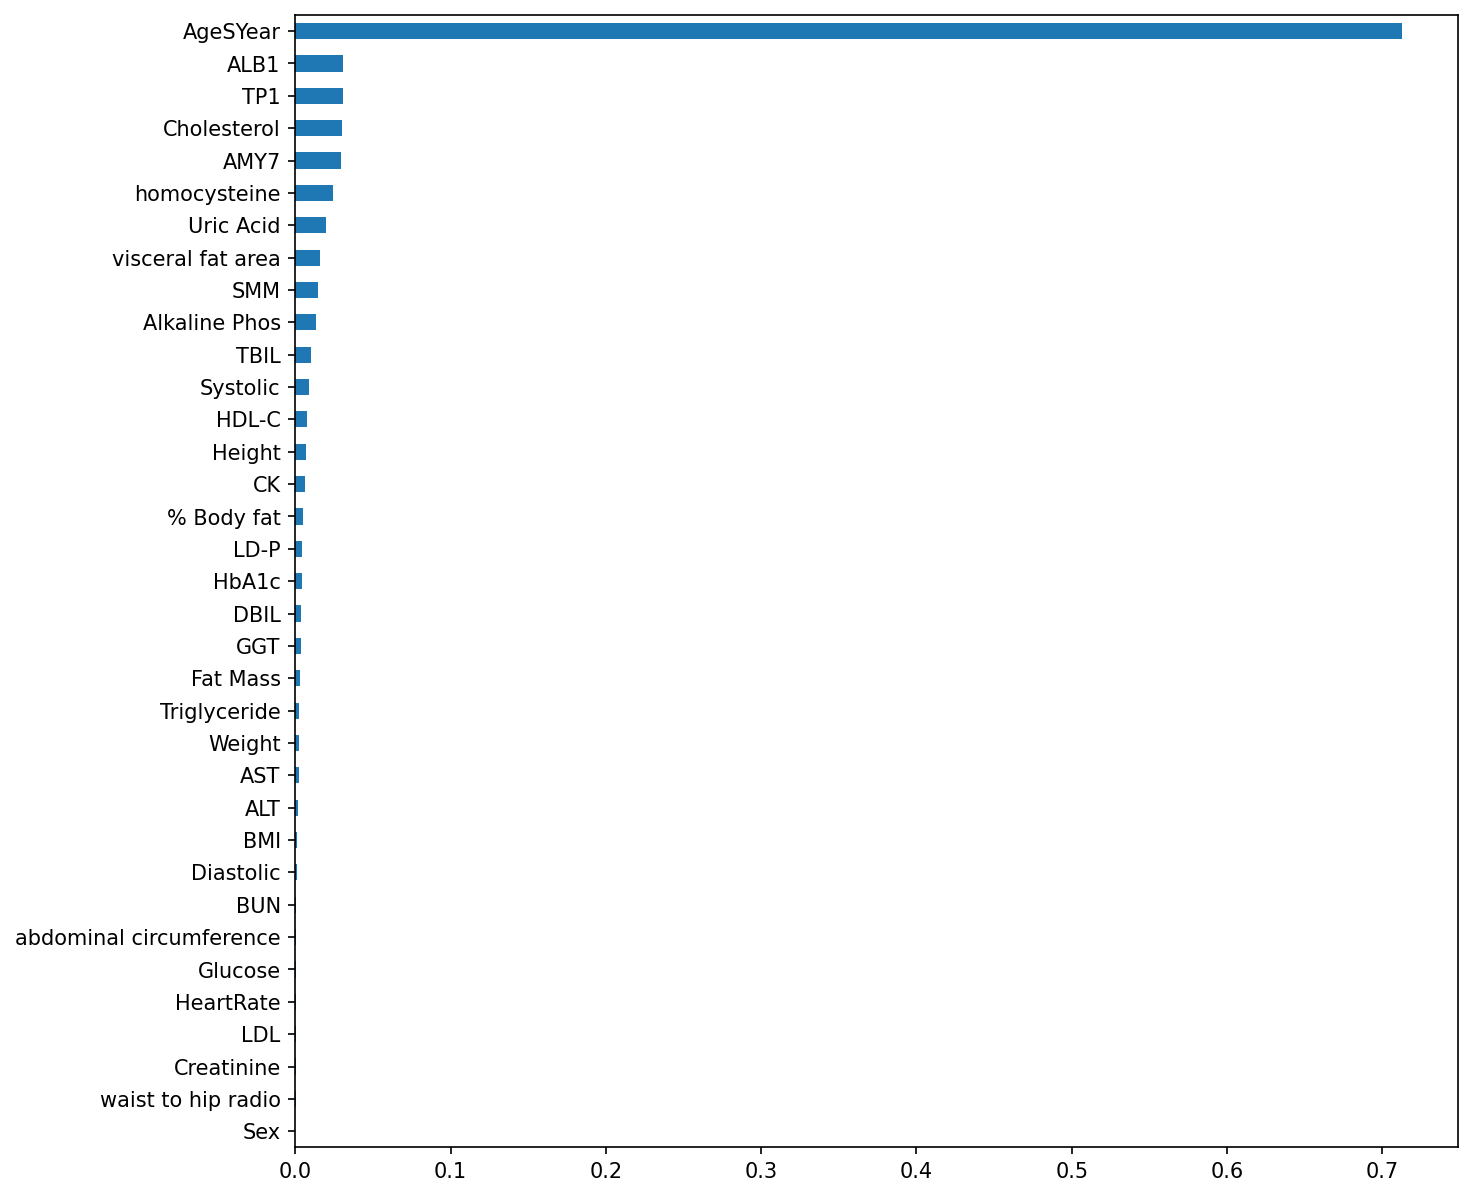

In [391]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A27

In [392]:
X=A27[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A27['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [393]:
Gradient.feature_importances_

array([0.00000000e+00, 7.25931172e-01, 7.63977913e-03, 6.19338161e-03,
       3.53778845e-04, 1.80843750e-02, 3.64580780e-03, 8.91832313e-03,
       8.60072801e-03, 5.83762197e-04, 4.23883442e-03, 7.47480829e-03,
       4.41973520e-04, 1.26508491e-02, 2.67731739e-02, 2.43205366e-03,
       9.14040729e-03, 2.81441280e-04, 2.06555961e-02, 1.43921649e-02,
       1.52288069e-02, 1.05510215e-02, 1.20549359e-03, 3.32813573e-02,
       1.97116451e-04, 1.66452470e-03, 3.35333527e-03, 3.84016556e-04,
       6.09339933e-03, 1.44525666e-02, 1.15907786e-03, 2.13073802e-03,
       4.92753283e-03, 2.53155295e-02, 1.62307362e-03])

In [394]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
ALT                        0.000197
LDL                        0.000281
BMI                        0.000354
Glucose                    0.000384
HeartRate                  0.000442
waist to hip radio         0.000584
BUN                        0.001159
DBIL                       0.001205
CK                         0.001623
AST                        0.001665
Creatinine                 0.002131
Triglyceride               0.002432
GGT                        0.003353
Fat Mass                   0.003646
Systolic                   0.004239
LD-P                       0.004928
HbA1c                      0.006093
Height                     0.006193
Diastolic                  0.007475
Weight                     0.007640
abdominal circumference    0.008601
% Body fat                 0.008918
HDL-C                      0.009140
TBIL                       0.010551
visceral fat area          0.012651
TP1                        0.014392
AMY7                       0

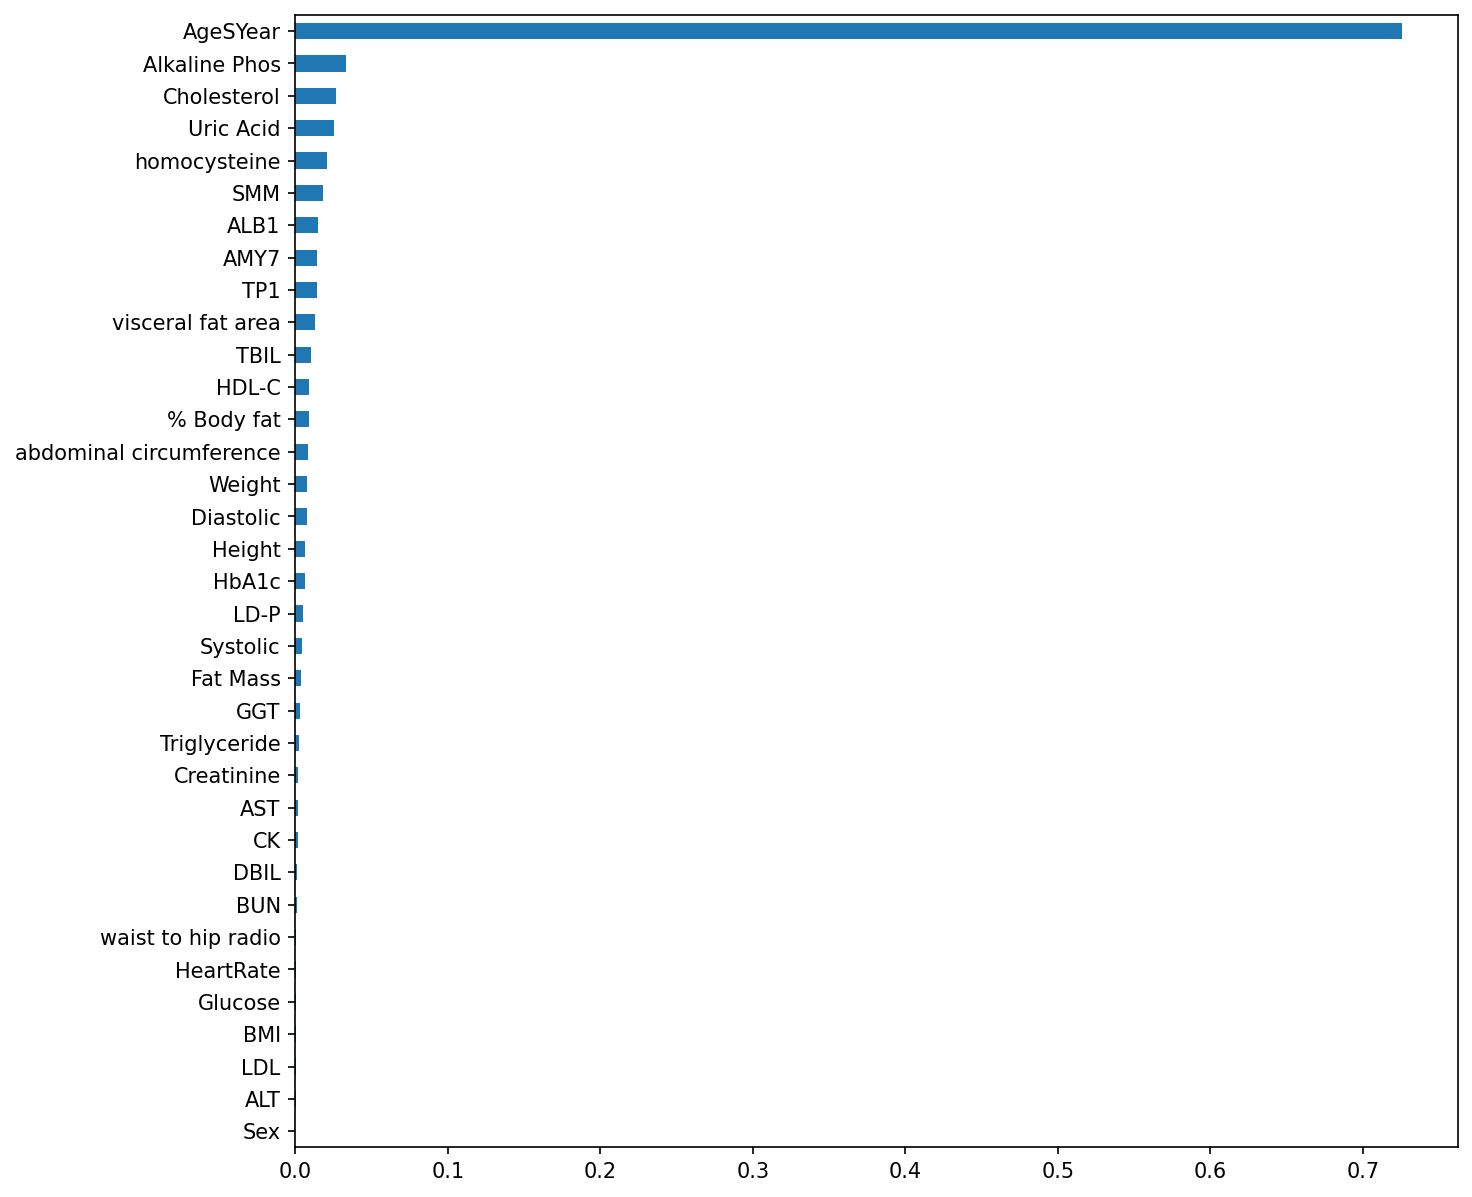

In [395]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A28

In [396]:
X=A28[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A28['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [397]:
Gradient.feature_importances_

array([0.00000000e+00, 7.24438203e-01, 5.71356064e-03, 6.03213537e-03,
       1.81556047e-03, 2.88313615e-02, 1.31369639e-03, 8.95667350e-03,
       5.20545554e-04, 5.47858135e-04, 2.88598912e-02, 1.53504181e-03,
       3.54634911e-03, 1.02524391e-02, 9.99776677e-03, 7.46624323e-03,
       1.17235852e-02, 6.61491832e-05, 1.91915494e-02, 5.82796924e-03,
       2.58961228e-02, 1.10556461e-02, 4.61609487e-03, 8.97865348e-03,
       1.84882508e-03, 2.24706723e-03, 3.56698008e-03, 1.55925129e-03,
       6.81900148e-03, 1.41436756e-02, 4.53019585e-04, 3.02711720e-03,
       6.74050484e-03, 2.99645298e-02, 2.44693224e-03])

In [398]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
LDL                        0.000066
BUN                        0.000453
abdominal circumference    0.000521
waist to hip radio         0.000548
Fat Mass                   0.001314
Diastolic                  0.001535
Glucose                    0.001559
BMI                        0.001816
ALT                        0.001849
AST                        0.002247
CK                         0.002447
Creatinine                 0.003027
HeartRate                  0.003546
GGT                        0.003567
DBIL                       0.004616
Weight                     0.005714
TP1                        0.005828
Height                     0.006032
LD-P                       0.006741
HbA1c                      0.006819
Triglyceride               0.007466
% Body fat                 0.008957
Alkaline Phos              0.008979
Cholesterol                0.009998
visceral fat area          0.010252
TBIL                       0.011056
HDL-C                      0

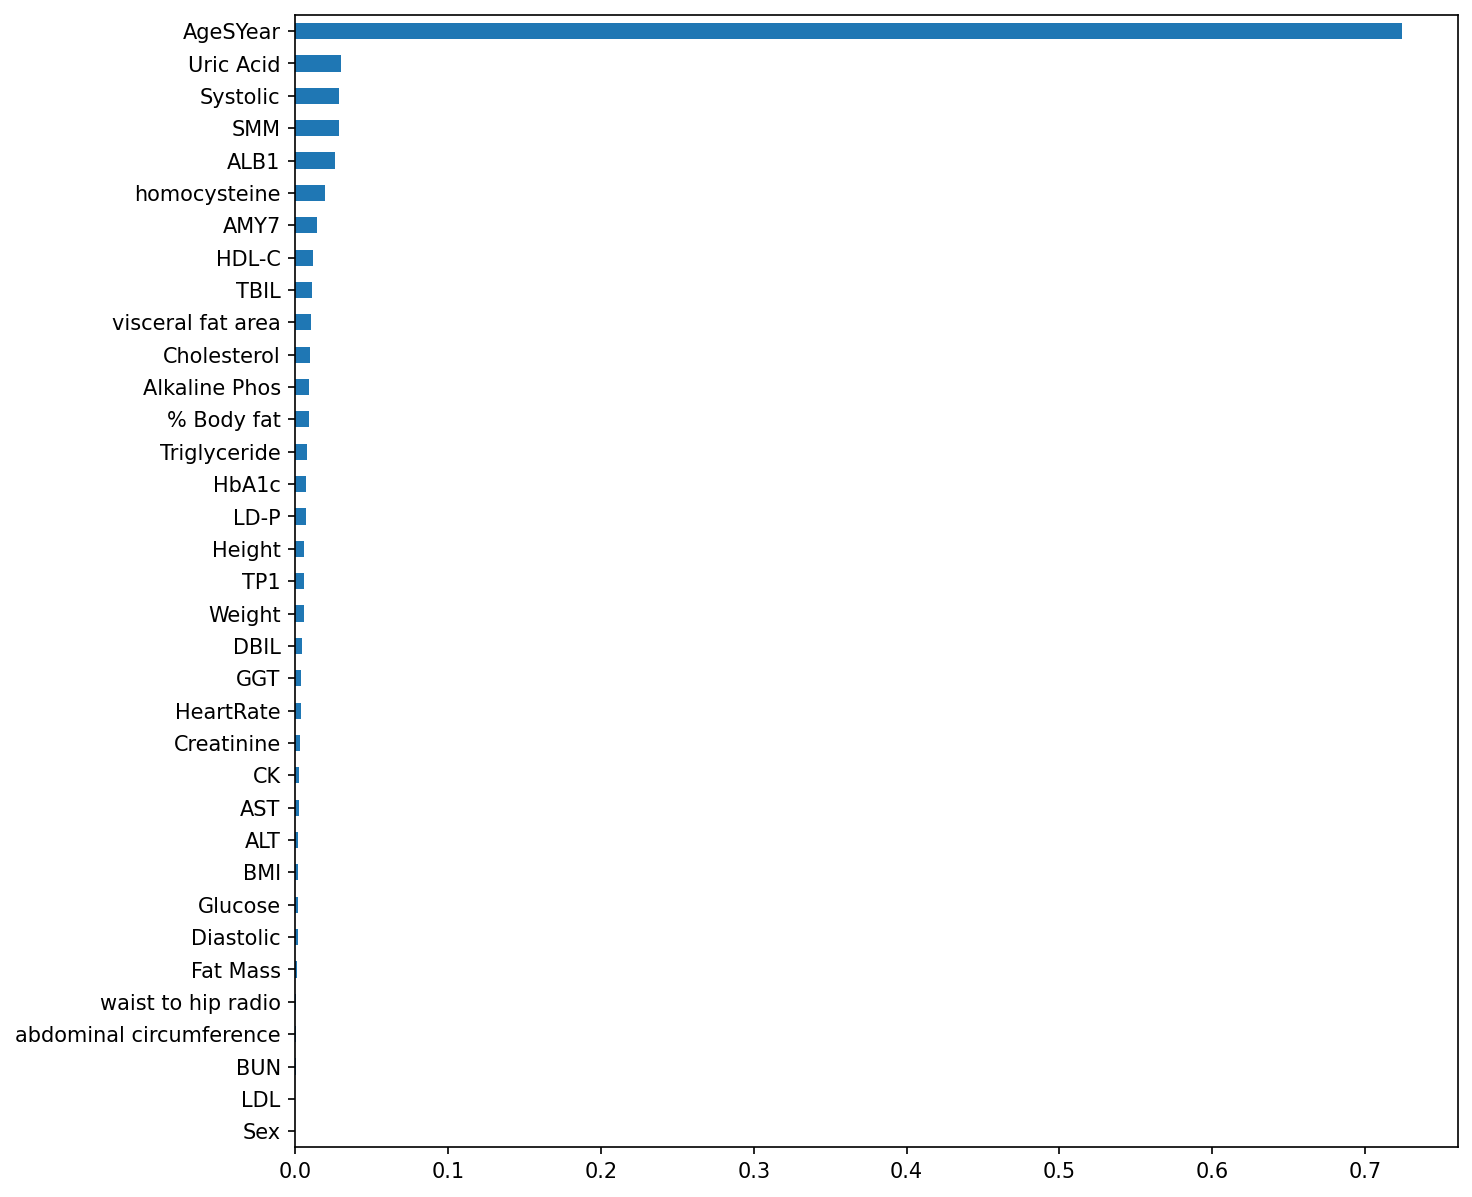

In [399]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A29

In [400]:
X=A29[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A29['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [401]:
Gradient.feature_importances_

array([8.54453361e-07, 7.57435379e-01, 9.32246795e-03, 7.10651076e-03,
       2.64552701e-04, 1.92215077e-02, 3.06575203e-04, 3.17954470e-03,
       1.11291015e-02, 1.06468094e-03, 3.30547721e-03, 2.81255200e-03,
       1.90168690e-03, 7.08885802e-03, 1.23604877e-02, 8.99043234e-03,
       7.85465310e-03, 6.58363566e-06, 2.02620657e-02, 7.03425357e-03,
       2.95172651e-02, 5.97256279e-03, 4.54435437e-03, 1.17831047e-02,
       9.05488181e-04, 3.32799185e-03, 5.51970262e-03, 1.55944765e-03,
       3.53665907e-03, 1.23868560e-02, 6.29141979e-04, 1.23737601e-04,
       1.34963515e-02, 1.88353565e-02, 7.21375512e-03])

In [402]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        8.544534e-07
LDL                        6.583636e-06
Creatinine                 1.237376e-04
BMI                        2.645527e-04
Fat Mass                   3.065752e-04
BUN                        6.291420e-04
ALT                        9.054882e-04
waist to hip radio         1.064681e-03
Glucose                    1.559448e-03
HeartRate                  1.901687e-03
Diastolic                  2.812552e-03
% Body fat                 3.179545e-03
Systolic                   3.305477e-03
AST                        3.327992e-03
HbA1c                      3.536659e-03
DBIL                       4.544354e-03
GGT                        5.519703e-03
TBIL                       5.972563e-03
TP1                        7.034254e-03
visceral fat area          7.088858e-03
Height                     7.106511e-03
CK                         7.213755e-03
HDL-C                      7.854653e-03
Triglyceride               8.990432e-03
Weight                     9.322468e-03


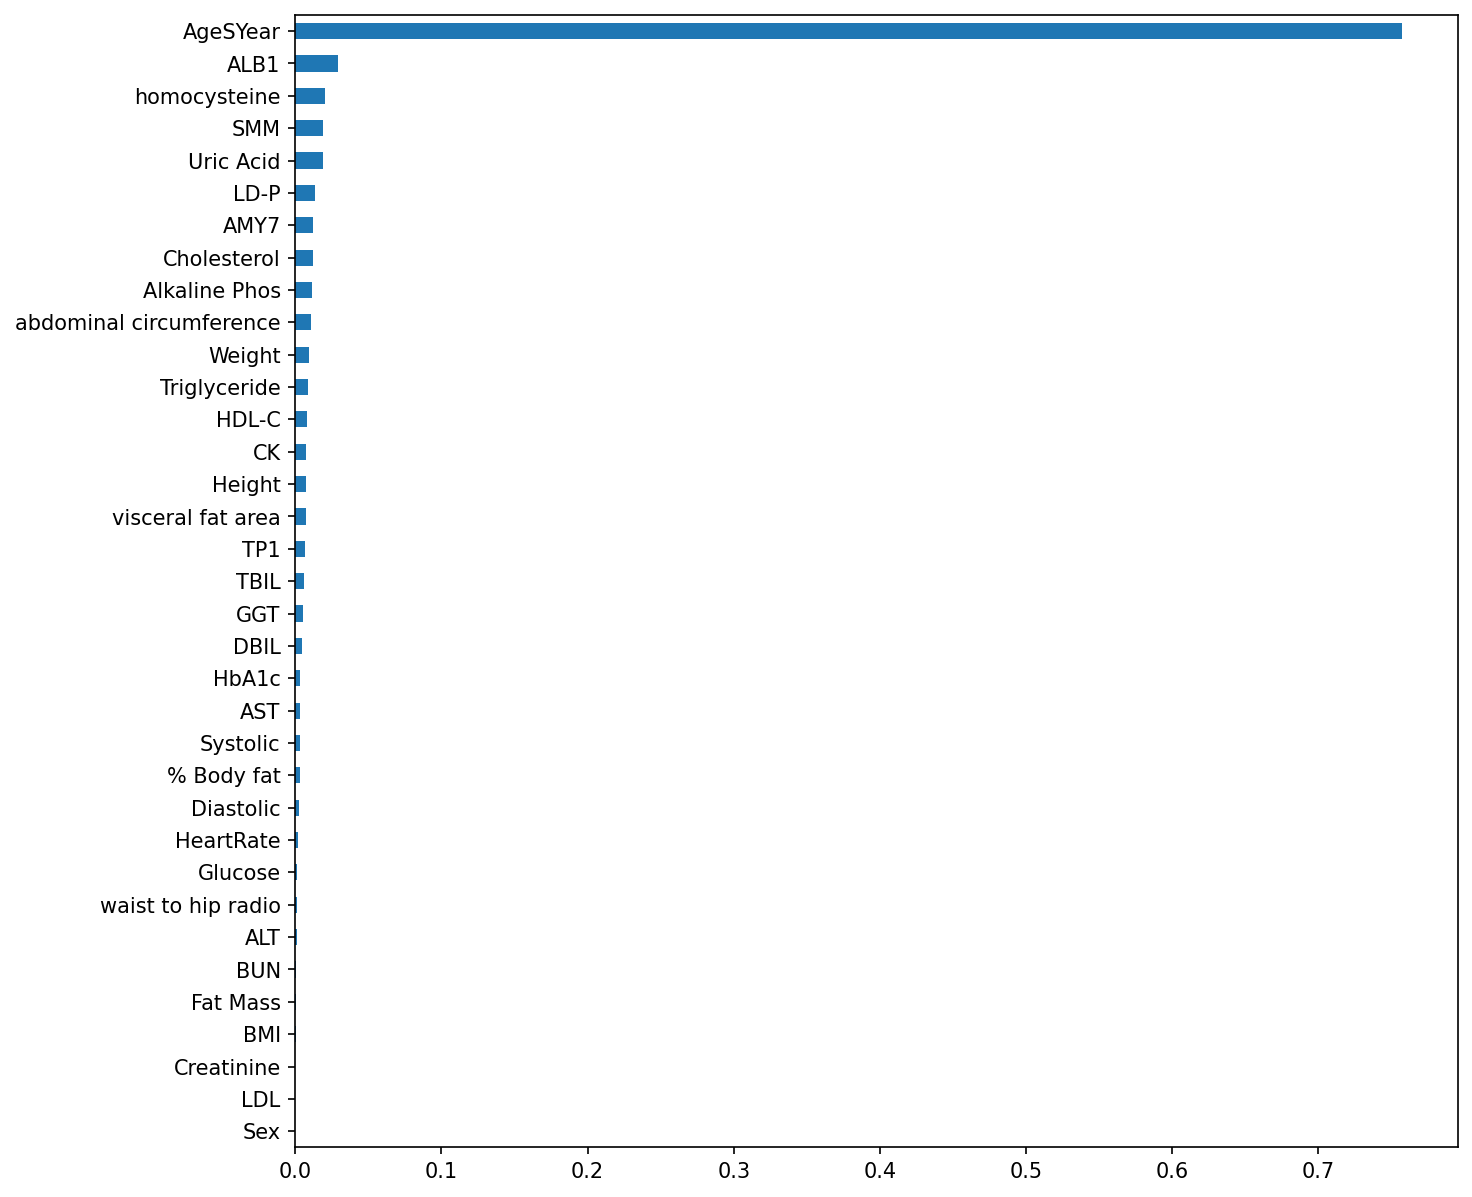

In [403]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')

##A30

In [404]:
X=A30[['Sex','AgeSYear','Weight','Height','BMI','SMM','Fat Mass','% Body fat','abdominal circumference','waist to hip radio','Systolic','Diastolic','HeartRate'
              ,'visceral fat area','Cholesterol','Triglyceride','HDL-C','LDL','homocysteine','TP1','ALB1','TBIL','DBIL','Alkaline Phos','ALT','AST','GGT','Glucose','HbA1c'
              ,'AMY7','BUN','Creatinine','LD-P','Uric Acid','CK']]
y=A30['telomere length (kb)']
Gradient = GradientBoostingRegressor()
Gradient = Gradient.fit(X,y)

In [405]:
Gradient.feature_importances_

array([0.00000000e+00, 7.19639451e-01, 8.49289135e-03, 9.55206921e-03,
       1.11302635e-03, 2.25397760e-02, 4.29985732e-03, 4.88571367e-03,
       5.13847214e-04, 8.76112485e-04, 8.55747058e-03, 2.93233159e-03,
       2.84018951e-04, 2.51132434e-02, 1.63548372e-02, 1.46771681e-02,
       7.01283213e-03, 3.38172695e-04, 2.51712123e-02, 5.54086861e-03,
       4.33396332e-02, 5.18345619e-03, 3.63519910e-03, 1.69041494e-02,
       7.73183855e-04, 8.83185851e-04, 3.89031386e-03, 1.24247699e-04,
       7.84087387e-03, 9.54026701e-03, 1.27311397e-03, 3.67542465e-04,
       8.59687937e-03, 1.28968938e-02, 6.85616020e-03])

In [406]:
Gradient_im=pd.Series(Gradient.feature_importances_,index=X.columns).sort_values(ascending=True)
Gradient_im

Sex                        0.000000
Glucose                    0.000124
HeartRate                  0.000284
LDL                        0.000338
Creatinine                 0.000368
abdominal circumference    0.000514
ALT                        0.000773
waist to hip radio         0.000876
AST                        0.000883
BMI                        0.001113
BUN                        0.001273
Diastolic                  0.002932
DBIL                       0.003635
GGT                        0.003890
Fat Mass                   0.004300
% Body fat                 0.004886
TBIL                       0.005183
TP1                        0.005541
CK                         0.006856
HDL-C                      0.007013
HbA1c                      0.007841
Weight                     0.008493
Systolic                   0.008557
LD-P                       0.008597
AMY7                       0.009540
Height                     0.009552
Uric Acid                  0.012897
Triglyceride               0

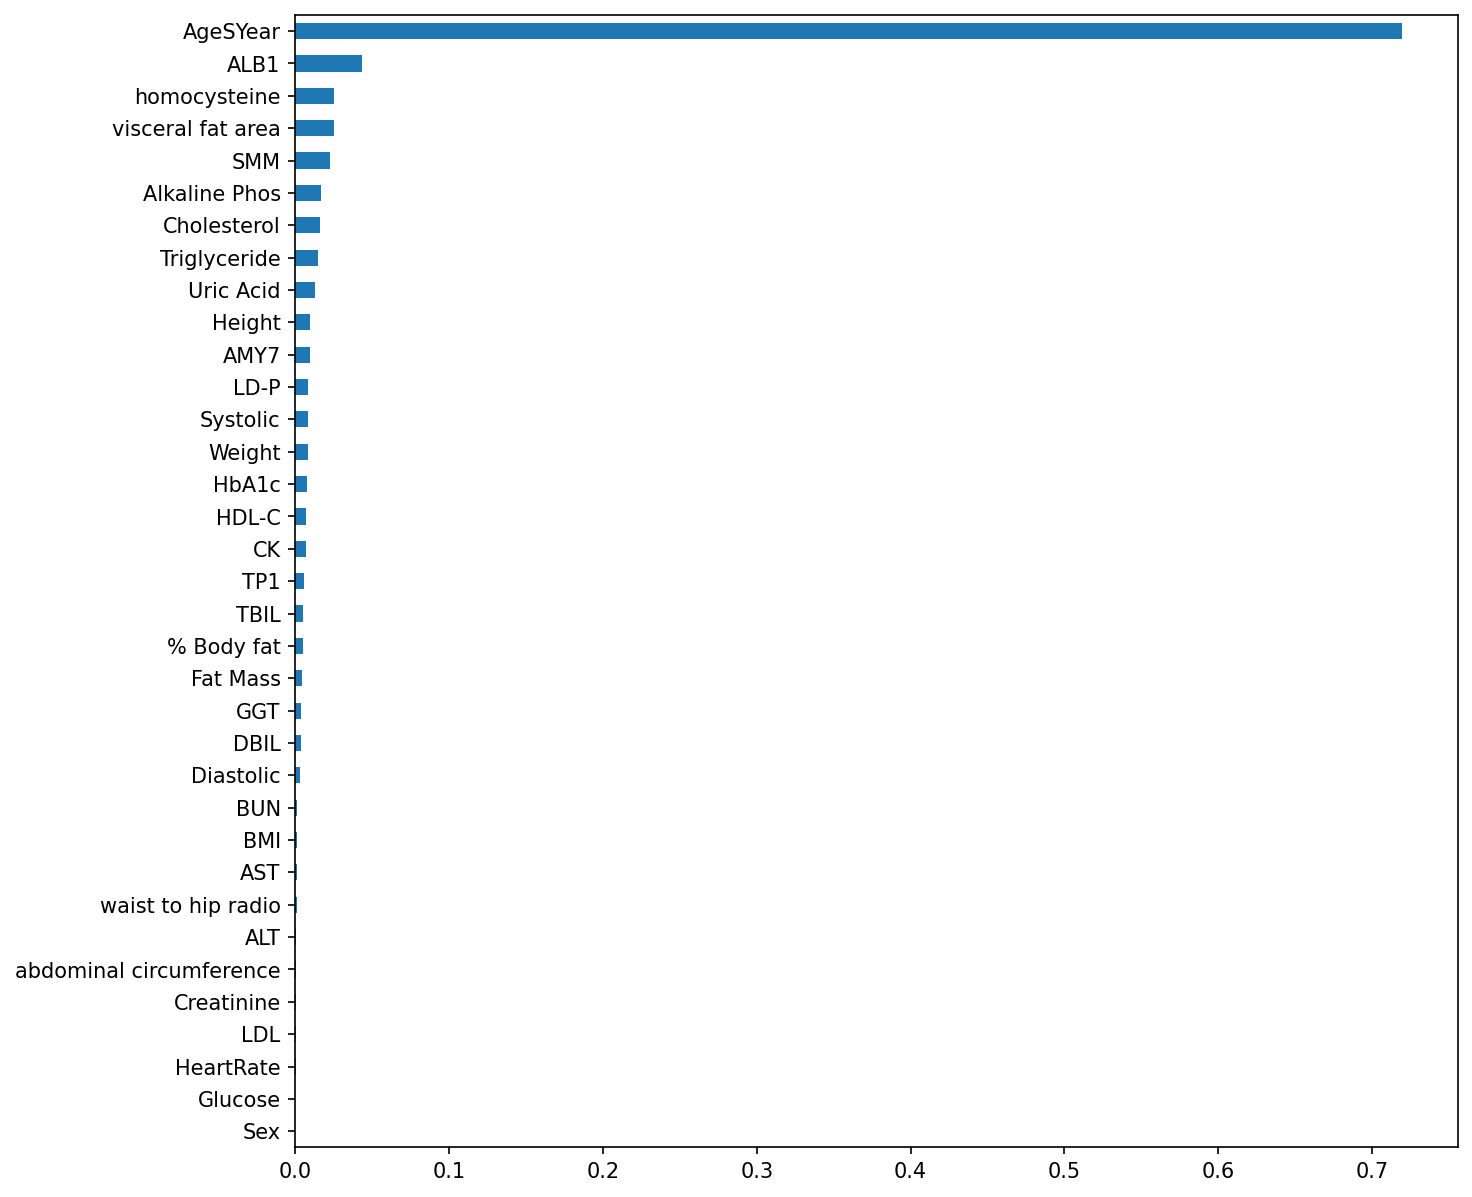

In [407]:
figure(figsize=(10, 10), dpi=150)
Gradient_im.plot(kind='barh')